In [39]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from tqdm import tqdm
import warnings
# warnings.simplefilter('ignore')
import torch
from torch.utils.data import DataLoader, Dataset, Subset
import torchvision
from torchvision import transforms
from matplotlib import pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import torch
from sklearn.metrics import classification_report
import seaborn as sns

print(torch.__version__)

2.5.1+cpu


In [41]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
iris = fetch_ucirepo(id=53) 
  
# data (as pandas dataframes) 
X = iris.data.features 
y = iris.data.targets 
  
# metadata 
print(iris.metadata) 
  
# variable information 
print(iris.variables) 


{'uci_id': 53, 'name': 'Iris', 'repository_url': 'https://archive.ics.uci.edu/dataset/53/iris', 'data_url': 'https://archive.ics.uci.edu/static/public/53/data.csv', 'abstract': 'A small classic dataset from Fisher, 1936. One of the earliest known datasets used for evaluating classification methods.\n', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 150, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1936, 'last_updated': 'Tue Sep 12 2023', 'dataset_doi': '10.24432/C56C76', 'creators': ['R. A. Fisher'], 'intro_paper': {'ID': 191, 'type': 'NATIVE', 'title': 'The Iris data set: In search of the source of virginica', 'authors': 'A. Unwin, K. Kleinman', 'venue': 'Significance, 2021', 'year': 2021, 'journal': 'Significance, 2021', 'DOI': '1740-9713.01589', 'URL': 'https://www.semanticscholar.org

In [42]:
X1 = X#.get(['petal length','petal width'])
y['class'] = y['class'].replace({'Iris-setosa': 0, 'Iris-virginica': 1, 'Iris-versicolor': 2})
y1 = (y == 1).astype(int)
print(X1)
X_train, X_test, y_train, y_test = train_test_split(X1.values, y1.values, test_size=0.5, random_state=42)

     sepal length  sepal width  petal length  petal width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]


C:\Users\fedbe\AppData\Local\Temp\ipykernel_2668\2611774473.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y['class'] = y['class'].replace({'Iris-setosa': 0, 'Iris-virginica': 1, 'Iris-versicolor': 2})
C:\Users\fedbe\AppData\Local\Temp\ipykernel_2668\2611774473.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['class'] = y['class'].replace({'Iris-setosa': 0, 'Iris-virginica': 1, 'Iris-versicolor': 2})


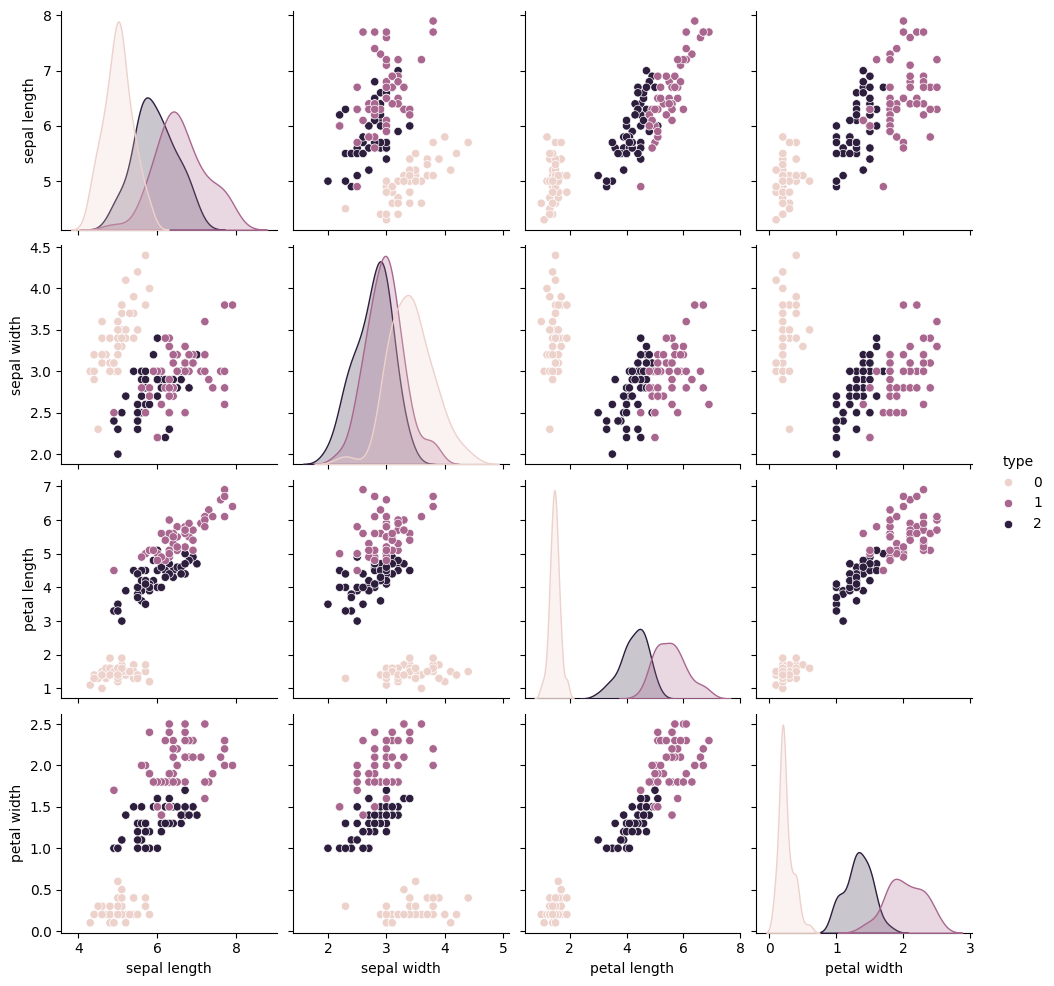

In [43]:
sns.pairplot(data=X.assign(type = y['class']), hue = 'type')

# 1 задание

In [169]:
import numpy as np

class Perceptron:
    
    def __init__(self, learning_rate, epochs):
        self.weights = None
        self.learning_rate = learning_rate
        self.epochs = epochs
    def activation(self, z):
         return np.where(z > 0, 1, 0)
    def fit(self, X, y):
        n_features = X.shape[1] + 1
        e = np.ones((X.shape[0],1))
        X = np.hstack((X,e))

        self.weights = np.zeros((n_features))
        
        for epoch in range(self.epochs):
            for i in range(len(X)):
                z = X @ self.weights
                y_pred = self.activation(z)
                
                self.weights = self.weights + self.learning_rate * (y[i] - y_pred[i]) * X[i]
                
        return self.weights
    def predict(self, X):
        e = np.ones((X.shape[0],1))
        X = np.hstack((X,e))
        z = X @ self.weights
        return self.activation(z)


In [195]:
perceptron1 = Perceptron(0.01, 100)

perceptron1.fit(X_train, y_train)

pred = perceptron1.predict(X_test)

(array([48.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 27.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

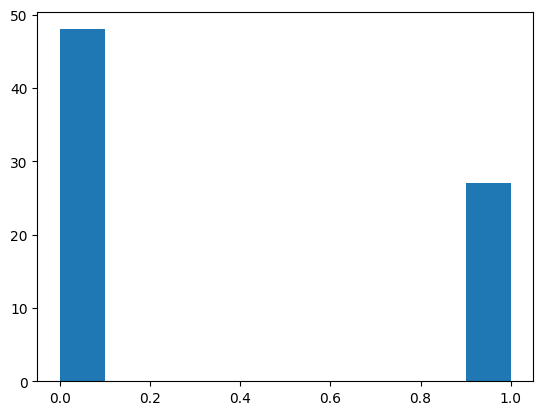

In [196]:
plt.hist(y_train)

In [197]:
report = classification_report(pred, y_test, digits=2)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        23

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75



# 2 задание

In [247]:
class MultiLayerPerceptron_2(): 
    def __init__(self,max_epochs,learning_rate,hidden_1_size,hidden_2_size):
        self.hidden_1_size = hidden_1_size
        self.hidden_2_size = hidden_2_size
        self.max_epochs = max_epochs
        self.learning_rate = learning_rate
        
        
        self.bias_hidden_1_val = -1
        self.bias_hidden_2_val = -1
        self.bias_output_val = -1

  
    
    def starting_weights(self, x, y):
        return [[2  * random.random() - 1 for i in range(x)] for j in range(y)]

    def activation(self, x):
        return 1 / (1 + np.exp(-x))
    
    def deriv(self, x):
        return x * (1 - x)   
 
    def Backpropagation_Algorithm(self, x):
        delta_output = []
        error_output = self.output_true - self.output_act

        'Stage 1 - Error: OutputLayer'
        delta_output = self.output_true - self.output_act
        delta_output = ((-1)*(error_output) * self.deriv(self.output_act))
        
        'Stage 2 - Update weights OutputLayer and HiddenLayer'
        for i in range(self.hidden_2_size):
            for j in range(self.output_size):
                self.weight_output[i][j] -= (self.learning_rate * (delta_output[j] * self.hidden_2_act[i]))
                self.bias_output[j] -= (self.learning_rate * delta_output[j])
      
        'Stage 3 - Error: HiddenLayer'
        delta_hidden_2 = np.matmul(self.weight_output, delta_output)* self.deriv(self.hidden_2_act)



        'Stage 2_2 - Update weights OutputLayer and HiddenLayer'
        for i in range(self.hidden_1_size):
            for j in range(self.hidden_2_size):
                self.weight_hidden_2[i][j] -= (self.learning_rate * (delta_hidden_2[j] * self.hidden_1_act[i]))
                self.bias_hidden_2[j] -= (self.learning_rate * delta_hidden_2[j])
      
        'Stage 3_2 - Error: HiddenLayer'
        delta_hidden_1 = np.matmul(self.weight_hidden_2, delta_hidden_2)* self.deriv(self.hidden_1_act)

        
        
        'Stage 4 - Update weights HiddenLayer and InputLayer(x)'
        for i in range(self.input_size):
            for j in range(self.hidden_1_size):
                self.weight_hidden_1[i][j] -= (self.learning_rate * (delta_hidden_1[j] * x[i]))
                self.bias_hidden_1[j] -= (self.learning_rate * delta_hidden_1[j])
                

    def predict(self, X):
        'Returns the predictions for every element of X'
        my_predictions = []
        'Forward Propagation'
        forward = np.matmul(X,self.weight_hidden_1) + self.bias_hidden_1
        forward = np.matmul(forward, self.weight_hidden_2) + self.bias_hidden_2
        forward = np.matmul(forward, self.weight_output) + self.bias_output
                                 
        for i in forward:
            my_predictions.append(max(enumerate(i), key=lambda x:x[1])[0])
        return my_predictions   



    def fit(self, X, y):  
        count_epoch = 0
        n = len(X); 
        self.input_size = X.shape[1]
        self.output_size = len(np.unique(y))
        'Starting Bias and Weights'
        self.weight_hidden_1 = self.starting_weights(self.hidden_1_size, self.input_size)
        self.weight_hidden_2 = self.starting_weights(self.hidden_2_size, self.hidden_1_size)

        self.weight_output = self.starting_weights(self.output_size, self.hidden_2_size)
        self.bias_hidden_1 = np.array([self.bias_hidden_1_val for i in range(self.hidden_1_size)])
        self.bias_hidden_2 = np.array([self.bias_hidden_2_val for i in range(self.hidden_2_size)])

        self.bias_output = np.array([self.bias_output_val for i in range(self.output_size)])
        
        while(count_epoch <= self.max_epochs):
            for idx,inputs in enumerate(X): 
                'Stage 1 - (Forward Propagation)'
                self.hidden_1_act = self.activation((np.dot(inputs, self.weight_hidden_1) + self.bias_hidden_1.T))
                self.hidden_2_act = self.activation((np.dot(self.hidden_1_act, self.weight_hidden_2) + self.bias_hidden_2.T))
                self.output_act = self.activation((np.dot(self.hidden_2_act, self.weight_output) + self.bias_output.T))

                'Stage 2 - One-Hot-Encoding'
                self.output_true = np.zeros(self.output_size)
                self.output_true[y[idx]] = 1
                      
                'Backpropagation : Update Weights'
                self.Backpropagation_Algorithm(inputs)
            count_epoch += 1
            if (count_epoch % 50 == 0):
                print('epoch',count_epoch)




In [248]:
perc2 = MultiLayerPerceptron_2(max_epochs = 500,learning_rate = 0.01,hidden_1_size = 2,hidden_2_size = 1)

In [249]:
import random

In [253]:
perc2.fit(X_train, y_train)



epoch 50
epoch 100
epoch 150
epoch 200
epoch 250
epoch 300
epoch 350
epoch 400
epoch 450
epoch 500


In [254]:
pred = perc2.predict(X_test)

In [255]:
report = classification_report(pred, y_test, digits=2)
print(report)

              precision    recall  f1-score   support

           0       0.56      1.00      0.72        29
           1       1.00      0.50      0.67        46

    accuracy                           0.69        75
   macro avg       0.78      0.75      0.69        75
weighted avg       0.83      0.69      0.69        75



# 3 задание

In [2]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
X_mn, y_mn = mnist["data"], mnist["target"]

In [3]:
from skimage.feature import hog


In [4]:
X_mn_hog = []
for el in X_mn.values:
    img = (np.array(el).reshape(28,28)).astype('uint8')
    fd,hog_img = hog(img, orientations=5, pixels_per_cell=(4, 4),
                    cells_per_block=(2, 2), visualize=True, channel_axis=None)
    X_mn_hog.append(fd)
y_mn_hog = y_mn

In [243]:
X_mn_train, X_mn_test, y_mn_train, y_mn_test = train_test_split(X_mn_hog[:300], y_mn_hog.values.astype('uint8')[:300], test_size=0.2, random_state=42)

In [256]:
perc3 = MultiLayerPerceptron_2(max_epochs = 500,learning_rate = 0.06,hidden_1_size = 10,hidden_2_size = 9)

Перцептрон изначально был написан через циклы for, поэтому работает очень долго. Целью было понять именно принцип работы перцептрона.
В интернете есть много реализаций, работающих сильно быстрее, включая реализации с SGD по мини-батчам. Я с ними разбирался, но здесь 
приводить их смысла нет, так как ниже представлена реализация через torch, которая справляется с задачей лучше

In [261]:
pred = perc3.predict(np.array(X_mn_test))

In [263]:
report = classification_report(pred, y_mn_test, digits=2)
print(report)

              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       0.88      0.88      0.88         8
           2       0.83      0.71      0.77         7
           3       0.86      0.67      0.75         9
           4       0.86      1.00      0.92         6
           5       0.40      1.00      0.57         2
           6       1.00      0.89      0.94         9
           7       0.67      1.00      0.80         2
           8       0.80      0.80      0.80         5
           9       0.75      0.50      0.60         6

    accuracy                           0.82        60
   macro avg       0.79      0.84      0.80        60
weighted avg       0.84      0.82      0.82        60



In [258]:
perc3.fit(np.array(X_mn_train), np.array(y_mn_train))


epoch 50
epoch 100
epoch 150
epoch 200
epoch 250
epoch 300
epoch 350
epoch 400
epoch 450
epoch 500


# 4 задание

Здесь рассмотрим две модели с разными функциями активации: sigmoid и ReLU

In [9]:
class Model(torch.nn.Module):
    def __init__(self,input_size,hidden_1_size,hidden_2_size,output_size):
        super(Model, self).__init__()

        self.fc1 = torch.nn.Linear(input_size, hidden_1_size)
        self.act1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(hidden_1_size, hidden_2_size)
        self.act2 = torch.nn.Sigmoid()
        self.fc3 = torch.nn.Linear(hidden_2_size, output_size)
        self.act3 = torch.nn.Softmax(dim=1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.act2(x)
        x = self.fc3(x)
        x = self.act3(x)
        return x
    def batch_train(self,model, loss_fn, learning_rate, x, y):
        y_pred = model(x)
        loss = loss_fn(y_pred,y)
        loss.backward()
        with torch.no_grad():
            for par in model.parameters():
                par -= learning_rate * par.grad
        model.zero_grad()
        return(loss.item())
    def train(self,model, n_epochs, batch_size, learning_rate,  X, y, X_test, y_test):
        acc_train_all = []
        loss_train_all = []
        acc_test_all = []
        loss_test_all = []

        for epoch in range(n_epochs):

            permutation = torch.randperm(X.size()[0])

            for i in tqdm(range(0,X.float().size()[0], batch_size)):
                indices = permutation[i:i+batch_size]
                batch_x, batch_y = X[indices], y[indices]
                self.batch_train(model, loss_fn, learning_rate, batch_x, batch_y)

            y_test_pred = model(X_test)
            y_train_pred = model(X)


            acc_train = accuracy_score(y, y_train_pred.argmax(dim=1))
            loss_train = loss_fn(y_train_pred, y).detach()
            acc_test = accuracy_score(y_test, y_test_pred.argmax(dim=1))
            loss_test = loss_fn(y_test_pred, y_test).detach()

            acc_train_all = np.append(acc_train_all, acc_train)
            loss_train_all = np.append(loss_train_all, loss_train)
            acc_test_all = np.append(acc_test_all, acc_test)
            loss_test_all = np.append(loss_test_all, loss_test)


            print(f'Epoch {epoch}: \n Accuracy - train: {acc_train} | test: {acc_test} \n Loss - train: {loss_train} | test: {loss_test}')

        return(acc_train_all, loss_train_all, acc_test_all, loss_test_all)

In [10]:
class Model_n(torch.nn.Module):
    def __init__(self,input_size,hidden_1_size,hidden_2_size,output_size):
        super(Model_n, self).__init__()
        self.act1 = torch.nn.Sigmoid()
        self.fc1 = torch.nn.Linear(D_in, 128)
        self.bn1 = torch.nn.BatchNorm1d(128)
        self.fc2 = torch.nn.Linear(128, 10)
        self.bn2 = torch.nn.BatchNorm1d(10)
        self.fc3 = torch.nn.Linear(10, D_out)
        self.act2 = torch.nn.Softmax(dim=1)
    def forward(self, x):
        x = self.fc1(x)
        x = self.bn1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.bn2(x)
        x = self.act1(x)
        x = self.fc3(x)
        x = self.act2(x)
        return x
    def batch_train(self,model, loss_fn, learning_rate, x, y):
        y_pred = model(x)
        loss = loss_fn(y_pred,y)
        loss.backward()
        with torch.no_grad():
            for par in model.parameters():
                par -= learning_rate * par.grad
        model.zero_grad()
        return(loss.item())
    def train(self,model, n_epochs, batch_size, learning_rate,  X, y, X_test, y_test):
        acc_train_all = []
        loss_train_all = []
        acc_test_all = []
        loss_test_all = []

        for epoch in range(n_epochs):

            permutation = torch.randperm(X.size()[0])

            for i in tqdm(range(0,X.float().size()[0], batch_size)):
                indices = permutation[i:i+batch_size]
                batch_x, batch_y = X[indices], y[indices]
                self.batch_train(model, loss_fn, learning_rate, batch_x, batch_y)

            y_test_pred = model(X_test)
            y_train_pred = model(X)


            acc_train = accuracy_score(y, y_train_pred.argmax(dim=1))
            loss_train = loss_fn(y_train_pred, y).detach()
            acc_test = accuracy_score(y_test, y_test_pred.argmax(dim=1))
            loss_test = loss_fn(y_test_pred, y_test).detach()

            acc_train_all = np.append(acc_train_all, acc_train)
            loss_train_all = np.append(loss_train_all, loss_train)
            acc_test_all = np.append(acc_test_all, acc_test)
            loss_test_all = np.append(loss_test_all, loss_test)


            print(f'Epoch {epoch}: \n Accuracy - train: {acc_train} | test: {acc_test} \n Loss - train: {loss_train} | test: {loss_test}')

        return(acc_train_all, loss_train_all, acc_test_all, loss_test_all)

In [14]:
class Model_ReLu_n(torch.nn.Module):
    def __init__(self,input_size,hidden_1_size,hidden_2_size,output_size):
        super(Model_ReLu_n, self).__init__()
        self.act1 = torch.nn.ReLU()
        self.fc1 = torch.nn.Linear(input_size, hidden_1_size)
        self.bn1 = torch.nn.BatchNorm1d(hidden_1_size)
        self.fc2 = torch.nn.Linear(hidden_1_size, hidden_2_size)
        self.bn2 = torch.nn.BatchNorm1d(hidden_2_size)
        self.fc3 = torch.nn.Linear(hidden_2_size, output_size)
        self.act2 = torch.nn.Softmax(dim=1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.bn1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.bn2(x)
        x = self.act1(x)
        x = self.fc3(x)
        x = self.act2(x)
        return x
    def batch_train(self,model, loss_fn, learning_rate, x, y):
        y_pred = model(x)
        loss = loss_fn(y_pred,y)
        loss.backward()
        with torch.no_grad():
            for par in model.parameters():
                par -= learning_rate * par.grad
        model.zero_grad()
        return(loss.item())
    def train(self,model, n_epochs, batch_size, learning_rate,  X, y, X_test, y_test):
        acc_train_all = []
        loss_train_all = []
        acc_test_all = []
        loss_test_all = []

        for epoch in range(n_epochs):

            permutation = torch.randperm(X.size()[0])

            for i in tqdm(range(0,X.float().size()[0], batch_size)):
                indices = permutation[i:i+batch_size]
                batch_x, batch_y = X[indices], y[indices]
                self.batch_train(model, loss_fn, learning_rate, batch_x, batch_y)

            y_test_pred = model(X_test)
            y_train_pred = model(X)


            acc_train = accuracy_score(y, y_train_pred.argmax(dim=1))
            loss_train = loss_fn(y_train_pred, y).detach()
            acc_test = accuracy_score(y_test, y_test_pred.argmax(dim=1))
            loss_test = loss_fn(y_test_pred, y_test).detach()

            acc_train_all = np.append(acc_train_all, acc_train)
            loss_train_all = np.append(loss_train_all, loss_train)
            acc_test_all = np.append(acc_test_all, acc_test)
            loss_test_all = np.append(loss_test_all, loss_test)


            print(f'Epoch {epoch}: \n Accuracy - train: {acc_train} | test: {acc_test} \n Loss - train: {loss_train} | test: {loss_test}')

        return(acc_train_all, loss_train_all, acc_test_all, loss_test_all)

In [15]:
class Model_ReLu(torch.nn.Module):
    def __init__(self,input_size,hidden_1_size,hidden_2_size,output_size):
        super(Model_ReLu, self).__init__()
        self.act1 = torch.nn.ReLU()
        self.fc1 = torch.nn.Linear(input_size, hidden_1_size)
        self.fc2 = torch.nn.Linear(hidden_1_size, hidden_2_size)
        self.fc3 = torch.nn.Linear(hidden_2_size, output_size)
        self.act2 = torch.nn.Softmax(dim=1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.act1(x)
        x = self.fc3(x)
        x = self.act2(x)
        return x
    def batch_train(self,model, loss_fn, learning_rate, x, y):
        y_pred = model(x)
        loss = loss_fn(y_pred,y)
        loss.backward()
        with torch.no_grad():
            for par in model.parameters():
                par -= learning_rate * par.grad
        model.zero_grad()
        return(loss.item())
    def train(self,model, n_epochs, batch_size, learning_rate,  X, y, X_test, y_test):
        acc_train_all = []
        loss_train_all = []
        acc_test_all = []
        loss_test_all = []

        for epoch in range(n_epochs):

            permutation = torch.randperm(X.size()[0])

            for i in tqdm(range(0,X.float().size()[0], batch_size)):
                indices = permutation[i:i+batch_size]
                batch_x, batch_y = X[indices], y[indices]
                self.batch_train(model, loss_fn, learning_rate, batch_x, batch_y)

            y_test_pred = model(X_test)
            y_train_pred = model(X)


            acc_train = accuracy_score(y, y_train_pred.argmax(dim=1))
            loss_train = loss_fn(y_train_pred, y).detach()
            acc_test = accuracy_score(y_test, y_test_pred.argmax(dim=1))
            loss_test = loss_fn(y_test_pred, y_test).detach()

            acc_train_all = np.append(acc_train_all, acc_train)
            loss_train_all = np.append(loss_train_all, loss_train)
            acc_test_all = np.append(acc_test_all, acc_test)
            loss_test_all = np.append(loss_test_all, loss_test)


            print(f'Epoch {epoch}: \n Accuracy - train: {acc_train} | test: {acc_test} \n Loss - train: {loss_train} | test: {loss_test}')

        return(acc_train_all, loss_train_all, acc_test_all, loss_test_all)

In [19]:
def vis_history(acc_train_all, loss_train_all, acc_test_all, loss_test_all):
    fig = plt.figure(figsize=(16, 4))

    plt.subplot(1, 2, 1)

    plt.plot(loss_train_all, label='loss')
    plt.plot(loss_test_all, label='val_loss')

    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(acc_train_all, label='acc')
    plt.plot(acc_test_all, label='val_acc')

    plt.legend()
    plt.show()

In [283]:
n_epochs = 200
batch_size = 100
learning_rate = 0.05

X_mn_train = torch.from_numpy(np.array(X_mn_train))
X_mn_test = torch.from_numpy(np.array(X_mn_test))
X_mn_train = X_mn_train.flatten(start_dim=1).float()
X_mn_test = X_mn_test.flatten(start_dim=1).float()
y_mn_train = torch.from_numpy(np.array(y_mn_train))
y_mn_test = torch.from_numpy(np.array(y_mn_test))
print(X_mn_train.size())
D_in = np.array(X_mn_train).shape[1]
print(D_in)
D_out = 10
loss_fn = torch.nn.CrossEntropyLoss()
modelRLnn = Model_ReLu(D_in,200,20,D_out)
acc_train_all_r3000nn, loss_train_all_r3000nn, acc_test_all_r3000nn, loss_test_all_r3000nn = modelRLnn.train(modelRLnn,n_epochs, batch_size, learning_rate, X_mn_train, y_mn_train, X_mn_test, y_mn_test)

torch.Size([2400, 720])
720


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 750.20it/s]


Epoch 0: 
 Accuracy - train: 0.10375 | test: 0.08333333333333333 
 Loss - train: 2.3027095794677734 | test: 2.303069829940796


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1200.03it/s]


Epoch 1: 
 Accuracy - train: 0.10375 | test: 0.08333333333333333 
 Loss - train: 2.302590847015381 | test: 2.302957057952881


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 912.55it/s]


Epoch 2: 
 Accuracy - train: 0.10375 | test: 0.08333333333333333 
 Loss - train: 2.3024709224700928 | test: 2.302842855453491


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 827.63it/s]


Epoch 3: 
 Accuracy - train: 0.10375 | test: 0.08333333333333333 
 Loss - train: 2.3023483753204346 | test: 2.302727222442627


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1026.43it/s]


Epoch 4: 
 Accuracy - train: 0.10375 | test: 0.08333333333333333 
 Loss - train: 2.302222967147827 | test: 2.302609443664551


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1020.68it/s]


Epoch 5: 
 Accuracy - train: 0.10375 | test: 0.08333333333333333 
 Loss - train: 2.3020942211151123 | test: 2.3024895191192627


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 857.26it/s]


Epoch 6: 
 Accuracy - train: 0.10375 | test: 0.08333333333333333 
 Loss - train: 2.3019611835479736 | test: 2.302366018295288


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 827.84it/s]


Epoch 7: 
 Accuracy - train: 0.10375 | test: 0.08333333333333333 
 Loss - train: 2.301823854446411 | test: 2.3022403717041016


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 851.04it/s]


Epoch 8: 
 Accuracy - train: 0.10375 | test: 0.08333333333333333 
 Loss - train: 2.3016836643218994 | test: 2.3021128177642822


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1043.81it/s]


Epoch 9: 
 Accuracy - train: 0.10375 | test: 0.08333333333333333 
 Loss - train: 2.301539421081543 | test: 2.301983118057251


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1090.89it/s]


Epoch 10: 
 Accuracy - train: 0.10375 | test: 0.08333333333333333 
 Loss - train: 2.3013899326324463 | test: 2.3018484115600586


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 960.27it/s]


Epoch 11: 
 Accuracy - train: 0.10375 | test: 0.08333333333333333 
 Loss - train: 2.3012356758117676 | test: 2.3017096519470215


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 959.99it/s]


Epoch 12: 
 Accuracy - train: 0.10416666666666667 | test: 0.08333333333333333 
 Loss - train: 2.301074981689453 | test: 2.3015639781951904


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1043.50it/s]


Epoch 13: 
 Accuracy - train: 0.10666666666666667 | test: 0.08666666666666667 
 Loss - train: 2.300908088684082 | test: 2.30141282081604


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1043.76it/s]


Epoch 14: 
 Accuracy - train: 0.10833333333333334 | test: 0.08833333333333333 
 Loss - train: 2.300734043121338 | test: 2.3012516498565674


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1040.11it/s]


Epoch 15: 
 Accuracy - train: 0.11166666666666666 | test: 0.09666666666666666 
 Loss - train: 2.3005528450012207 | test: 2.3010854721069336


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 956.78it/s]


Epoch 16: 
 Accuracy - train: 0.11458333333333333 | test: 0.10166666666666667 
 Loss - train: 2.3003616333007812 | test: 2.3009095191955566


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1043.53it/s]


Epoch 17: 
 Accuracy - train: 0.12166666666666667 | test: 0.10833333333333334 
 Loss - train: 2.3001627922058105 | test: 2.3007264137268066


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1135.19it/s]


Epoch 18: 
 Accuracy - train: 0.12666666666666668 | test: 0.11833333333333333 
 Loss - train: 2.2999560832977295 | test: 2.3005378246307373


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 837.21it/s]


Epoch 19: 
 Accuracy - train: 0.13333333333333333 | test: 0.12666666666666668 
 Loss - train: 2.29974102973938 | test: 2.300342082977295


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 889.19it/s]


Epoch 20: 
 Accuracy - train: 0.13958333333333334 | test: 0.13333333333333333 
 Loss - train: 2.29951810836792 | test: 2.300138235092163


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 991.88it/s]


Epoch 21: 
 Accuracy - train: 0.14666666666666667 | test: 0.14166666666666666 
 Loss - train: 2.2992868423461914 | test: 2.2999274730682373


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 679.61it/s]


Epoch 22: 
 Accuracy - train: 0.15625 | test: 0.14666666666666667 
 Loss - train: 2.299046277999878 | test: 2.299710512161255


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 861.40it/s]


Epoch 23: 
 Accuracy - train: 0.16208333333333333 | test: 0.14833333333333334 
 Loss - train: 2.2987968921661377 | test: 2.299485921859741


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 924.81it/s]


Epoch 24: 
 Accuracy - train: 0.16708333333333333 | test: 0.15166666666666667 
 Loss - train: 2.298536777496338 | test: 2.299250841140747


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 891.56it/s]


Epoch 25: 
 Accuracy - train: 0.17083333333333334 | test: 0.16166666666666665 
 Loss - train: 2.2982654571533203 | test: 2.2990047931671143


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 883.67it/s]


Epoch 26: 
 Accuracy - train: 0.17541666666666667 | test: 0.16166666666666665 
 Loss - train: 2.297980785369873 | test: 2.298748254776001


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 901.38it/s]


Epoch 27: 
 Accuracy - train: 0.17916666666666667 | test: 0.16333333333333333 
 Loss - train: 2.2976837158203125 | test: 2.2984800338745117


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 707.42it/s]


Epoch 28: 
 Accuracy - train: 0.18166666666666667 | test: 0.16833333333333333 
 Loss - train: 2.2973718643188477 | test: 2.298198699951172


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 954.13it/s]


Epoch 29: 
 Accuracy - train: 0.18625 | test: 0.17333333333333334 
 Loss - train: 2.2970457077026367 | test: 2.2979049682617188


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1040.46it/s]


Epoch 30: 
 Accuracy - train: 0.18958333333333333 | test: 0.17666666666666667 
 Loss - train: 2.2967023849487305 | test: 2.2975950241088867


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1017.05it/s]


Epoch 31: 
 Accuracy - train: 0.19333333333333333 | test: 0.18 
 Loss - train: 2.296340227127075 | test: 2.297268867492676


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1006.57it/s]


Epoch 32: 
 Accuracy - train: 0.19625 | test: 0.18833333333333332 
 Loss - train: 2.295957088470459 | test: 2.296924352645874


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1019.82it/s]


Epoch 33: 
 Accuracy - train: 0.20208333333333334 | test: 0.19166666666666668 
 Loss - train: 2.2955520153045654 | test: 2.2965595722198486


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1008.20it/s]

Epoch 34: 
 Accuracy - train: 0.20666666666666667 | test: 0.205 
 Loss - train: 2.2951223850250244 | test: 2.296173572540283

100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 978.31it/s]


Epoch 35: 
 Accuracy - train: 0.215 | test: 0.22166666666666668 
 Loss - train: 2.2946643829345703 | test: 2.2957606315612793


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1032.18it/s]

Epoch 36: 
 Accuracy - train: 0.22375 | test: 0.235 
 Loss - train: 2.294175148010254 | test: 2.295318841934204

100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1036.64it/s]


Epoch 37: 
 Accuracy - train: 0.23041666666666666 | test: 0.24 
 Loss - train: 2.293651580810547 | test: 2.29484486579895


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1054.00it/s]


Epoch 38: 
 Accuracy - train: 0.23833333333333334 | test: 0.25 
 Loss - train: 2.2930872440338135 | test: 2.294334650039673


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1020.38it/s]


Epoch 39: 
 Accuracy - train: 0.24208333333333334 | test: 0.25333333333333335 
 Loss - train: 2.292479991912842 | test: 2.293787717819214


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 945.91it/s]


Epoch 40: 
 Accuracy - train: 0.24916666666666668 | test: 0.25666666666666665 
 Loss - train: 2.291825294494629 | test: 2.2931971549987793


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1007.89it/s]


Epoch 41: 
 Accuracy - train: 0.2529166666666667 | test: 0.25833333333333336 
 Loss - train: 2.291114330291748 | test: 2.292559862136841


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 693.92it/s]

Epoch 42: 
 Accuracy - train: 0.2579166666666667 | test: 0.26166666666666666 
 Loss - train: 2.2903459072113037 | test: 2.2918667793273926

100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 705.09it/s]


Epoch 43: 
 Accuracy - train: 0.26375 | test: 0.2683333333333333 
 Loss - train: 2.2895140647888184 | test: 2.2911179065704346


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 714.98it/s]


Epoch 44: 
 Accuracy - train: 0.26416666666666666 | test: 0.2683333333333333 
 Loss - train: 2.2886106967926025 | test: 2.290306568145752


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 704.75it/s]


Epoch 45: 
 Accuracy - train: 0.2683333333333333 | test: 0.27 
 Loss - train: 2.287626028060913 | test: 2.2894227504730225


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 704.11it/s]


Epoch 46: 
 Accuracy - train: 0.27375 | test: 0.2733333333333333 
 Loss - train: 2.2865495681762695 | test: 2.2884585857391357


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 812.08it/s]


Epoch 47: 
 Accuracy - train: 0.2775 | test: 0.2783333333333333 
 Loss - train: 2.285367250442505 | test: 2.2874011993408203


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 984.18it/s]


Epoch 48: 
 Accuracy - train: 0.28041666666666665 | test: 0.2783333333333333 
 Loss - train: 2.284062147140503 | test: 2.286233901977539


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 958.17it/s]


Epoch 49: 
 Accuracy - train: 0.28375 | test: 0.2816666666666667 
 Loss - train: 2.2826128005981445 | test: 2.2849416732788086


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1114.68it/s]


Epoch 50: 
 Accuracy - train: 0.28583333333333333 | test: 0.2816666666666667 
 Loss - train: 2.2809951305389404 | test: 2.283503532409668


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 978.40it/s]


Epoch 51: 
 Accuracy - train: 0.28708333333333336 | test: 0.2816666666666667 
 Loss - train: 2.2791762351989746 | test: 2.2818868160247803


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1018.91it/s]


Epoch 52: 
 Accuracy - train: 0.2875 | test: 0.2816666666666667 
 Loss - train: 2.2771122455596924 | test: 2.280057668685913


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1036.80it/s]


Epoch 53: 
 Accuracy - train: 0.28791666666666665 | test: 0.28 
 Loss - train: 2.274749994277954 | test: 2.2779691219329834


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 918.13it/s]


Epoch 54: 
 Accuracy - train: 0.28583333333333333 | test: 0.27666666666666667 
 Loss - train: 2.2720181941986084 | test: 2.275556802749634


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 921.93it/s]


Epoch 55: 
 Accuracy - train: 0.28458333333333335 | test: 0.2733333333333333 
 Loss - train: 2.2688241004943848 | test: 2.272733688354492


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 723.65it/s]


Epoch 56: 
 Accuracy - train: 0.28125 | test: 0.2733333333333333 
 Loss - train: 2.265040874481201 | test: 2.2693915367126465


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 775.77it/s]


Epoch 57: 
 Accuracy - train: 0.2791666666666667 | test: 0.2683333333333333 
 Loss - train: 2.260500907897949 | test: 2.265383243560791


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1007.75it/s]


Epoch 58: 
 Accuracy - train: 0.2675 | test: 0.25333333333333335 
 Loss - train: 2.254987955093384 | test: 2.2605020999908447


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1067.19it/s]


Epoch 59: 
 Accuracy - train: 0.25875 | test: 0.23666666666666666 
 Loss - train: 2.2482333183288574 | test: 2.2544689178466797


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1058.84it/s]


Epoch 60: 
 Accuracy - train: 0.24625 | test: 0.22666666666666666 
 Loss - train: 2.239949941635132 | test: 2.247042655944824


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 946.64it/s]


Epoch 61: 
 Accuracy - train: 0.24041666666666667 | test: 0.21666666666666667 
 Loss - train: 2.2300353050231934 | test: 2.2381162643432617


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1167.61it/s]


Epoch 62: 
 Accuracy - train: 0.23708333333333334 | test: 0.215 
 Loss - train: 2.2188284397125244 | test: 2.22795033454895


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1066.10it/s]


Epoch 63: 
 Accuracy - train: 0.23958333333333334 | test: 0.21833333333333332 
 Loss - train: 2.207111120223999 | test: 2.2173354625701904


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1127.00it/s]


Epoch 64: 
 Accuracy - train: 0.24625 | test: 0.22833333333333333 
 Loss - train: 2.1956710815429688 | test: 2.2068257331848145


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1068.91it/s]


Epoch 65: 
 Accuracy - train: 0.26208333333333333 | test: 0.245 
 Loss - train: 2.184896469116211 | test: 2.1968319416046143


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1061.47it/s]


Epoch 66: 
 Accuracy - train: 0.285 | test: 0.2833333333333333 
 Loss - train: 2.1747355461120605 | test: 2.1871395111083984


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1081.52it/s]


Epoch 67: 
 Accuracy - train: 0.3070833333333333 | test: 0.305 
 Loss - train: 2.1647591590881348 | test: 2.177417039871216


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1136.49it/s]


Epoch 68: 
 Accuracy - train: 0.3225 | test: 0.31333333333333335 
 Loss - train: 2.154460906982422 | test: 2.1671719551086426


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1037.24it/s]


Epoch 69: 
 Accuracy - train: 0.33708333333333335 | test: 0.33166666666666667 
 Loss - train: 2.143244743347168 | test: 2.1558358669281006


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1064.49it/s]


Epoch 70: 
 Accuracy - train: 0.3545833333333333 | test: 0.355 
 Loss - train: 2.130568265914917 | test: 2.1427812576293945


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 933.09it/s]


Epoch 71: 
 Accuracy - train: 0.3779166666666667 | test: 0.375 
 Loss - train: 2.116300106048584 | test: 2.1280884742736816


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 950.16it/s]


Epoch 72: 
 Accuracy - train: 0.40958333333333335 | test: 0.405 
 Loss - train: 2.100712776184082 | test: 2.1120359897613525


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 908.14it/s]


Epoch 73: 
 Accuracy - train: 0.4504166666666667 | test: 0.44333333333333336 
 Loss - train: 2.084324836730957 | test: 2.0954651832580566


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 885.64it/s]


Epoch 74: 
 Accuracy - train: 0.48583333333333334 | test: 0.4716666666666667 
 Loss - train: 2.0675415992736816 | test: 2.078740358352661


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 949.96it/s]


Epoch 75: 
 Accuracy - train: 0.5058333333333334 | test: 0.48333333333333334 
 Loss - train: 2.0507349967956543 | test: 2.0622758865356445


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 978.14it/s]


Epoch 76: 
 Accuracy - train: 0.52625 | test: 0.5083333333333333 
 Loss - train: 2.033860921859741 | test: 2.0459227561950684


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 993.68it/s]


Epoch 77: 
 Accuracy - train: 0.54875 | test: 0.52 
 Loss - train: 2.0165257453918457 | test: 2.029141664505005


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 988.21it/s]


Epoch 78: 
 Accuracy - train: 0.5579166666666666 | test: 0.5366666666666666 
 Loss - train: 1.9988348484039307 | test: 2.011922836303711


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1018.57it/s]


Epoch 79: 
 Accuracy - train: 0.5654166666666667 | test: 0.5433333333333333 
 Loss - train: 1.9813166856765747 | test: 1.9954195022583008


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1054.46it/s]


Epoch 80: 
 Accuracy - train: 0.57875 | test: 0.55 
 Loss - train: 1.964756727218628 | test: 1.9795446395874023


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1007.53it/s]


Epoch 81: 
 Accuracy - train: 0.58125 | test: 0.5533333333333333 
 Loss - train: 1.949419379234314 | test: 1.9648066759109497


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 938.50it/s]


Epoch 82: 
 Accuracy - train: 0.5845833333333333 | test: 0.5583333333333333 
 Loss - train: 1.935221791267395 | test: 1.9512786865234375


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 747.21it/s]


Epoch 83: 
 Accuracy - train: 0.5879166666666666 | test: 0.5616666666666666 
 Loss - train: 1.9217702150344849 | test: 1.9379767179489136


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 889.09it/s]


Epoch 84: 
 Accuracy - train: 0.59 | test: 0.5616666666666666 
 Loss - train: 1.9083956480026245 | test: 1.9253159761428833


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 925.78it/s]


Epoch 85: 
 Accuracy - train: 0.59875 | test: 0.5666666666666667 
 Loss - train: 1.894456386566162 | test: 1.9118678569793701


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 960.02it/s]


Epoch 86: 
 Accuracy - train: 0.6520833333333333 | test: 0.59 
 Loss - train: 1.8784995079040527 | test: 1.8966776132583618


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1043.52it/s]


Epoch 87: 
 Accuracy - train: 0.67875 | test: 0.6416666666666667 
 Loss - train: 1.8614689111709595 | test: 1.8813022375106812


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 998.86it/s]


Epoch 88: 
 Accuracy - train: 0.6904166666666667 | test: 0.655 
 Loss - train: 1.845167875289917 | test: 1.866606593132019


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 996.03it/s]


Epoch 89: 
 Accuracy - train: 0.6916666666666667 | test: 0.6583333333333333 
 Loss - train: 1.8309836387634277 | test: 1.854502558708191


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1072.78it/s]


Epoch 90: 
 Accuracy - train: 0.6945833333333333 | test: 0.6583333333333333 
 Loss - train: 1.8189231157302856 | test: 1.8434839248657227


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1102.63it/s]


Epoch 91: 
 Accuracy - train: 0.6958333333333333 | test: 0.66 
 Loss - train: 1.8083409070968628 | test: 1.833313226699829


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1044.00it/s]


Epoch 92: 
 Accuracy - train: 0.6983333333333334 | test: 0.665 
 Loss - train: 1.798973560333252 | test: 1.823876976966858


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1142.88it/s]


Epoch 93: 
 Accuracy - train: 0.7066666666666667 | test: 0.6666666666666666 
 Loss - train: 1.7901055812835693 | test: 1.8146618604660034


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1090.93it/s]


Epoch 94: 
 Accuracy - train: 0.7270833333333333 | test: 0.695 
 Loss - train: 1.7815525531768799 | test: 1.8054449558258057


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1089.74it/s]


Epoch 95: 
 Accuracy - train: 0.75125 | test: 0.735 
 Loss - train: 1.773314356803894 | test: 1.7956165075302124


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1199.97it/s]


Epoch 96: 
 Accuracy - train: 0.7583333333333333 | test: 0.75 
 Loss - train: 1.7656168937683105 | test: 1.787339687347412


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1142.84it/s]


Epoch 97: 
 Accuracy - train: 0.77125 | test: 0.7483333333333333 
 Loss - train: 1.758450984954834 | test: 1.7787729501724243


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1143.23it/s]


Epoch 98: 
 Accuracy - train: 0.7716666666666666 | test: 0.7516666666666667 
 Loss - train: 1.7518293857574463 | test: 1.7722151279449463


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1013.81it/s]


Epoch 99: 
 Accuracy - train: 0.7733333333333333 | test: 0.755 
 Loss - train: 1.7458804845809937 | test: 1.7662022113800049


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1090.99it/s]


Epoch 100: 
 Accuracy - train: 0.775 | test: 0.75 
 Loss - train: 1.7404158115386963 | test: 1.7606134414672852


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1068.54it/s]


Epoch 101: 
 Accuracy - train: 0.77625 | test: 0.755 
 Loss - train: 1.7353250980377197 | test: 1.7548738718032837


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1124.18it/s]


Epoch 102: 
 Accuracy - train: 0.7779166666666667 | test: 0.7566666666666667 
 Loss - train: 1.7309513092041016 | test: 1.7503621578216553


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1071.58it/s]


Epoch 103: 
 Accuracy - train: 0.7783333333333333 | test: 0.755 
 Loss - train: 1.7268458604812622 | test: 1.7463511228561401


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1000.07it/s]


Epoch 104: 
 Accuracy - train: 0.7804166666666666 | test: 0.755 
 Loss - train: 1.723286747932434 | test: 1.7432676553726196


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1142.89it/s]


Epoch 105: 
 Accuracy - train: 0.7808333333333334 | test: 0.7583333333333333 
 Loss - train: 1.7198022603988647 | test: 1.739548921585083


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1066.21it/s]


Epoch 106: 
 Accuracy - train: 0.7825 | test: 0.755 
 Loss - train: 1.7167435884475708 | test: 1.7370082139968872


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1091.40it/s]


Epoch 107: 
 Accuracy - train: 0.7841666666666667 | test: 0.7516666666666667 
 Loss - train: 1.7139798402786255 | test: 1.7343697547912598


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1200.03it/s]


Epoch 108: 
 Accuracy - train: 0.7833333333333333 | test: 0.7583333333333333 
 Loss - train: 1.7115012407302856 | test: 1.731418251991272


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1142.78it/s]


Epoch 109: 
 Accuracy - train: 0.785 | test: 0.7566666666666667 
 Loss - train: 1.7090901136398315 | test: 1.7292653322219849


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1199.83it/s]


Epoch 110: 
 Accuracy - train: 0.7845833333333333 | test: 0.755 
 Loss - train: 1.7069278955459595 | test: 1.7274192571640015


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1200.69it/s]


Epoch 111: 
 Accuracy - train: 0.7845833333333333 | test: 0.755 
 Loss - train: 1.7050813436508179 | test: 1.7262001037597656


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1200.54it/s]


Epoch 112: 
 Accuracy - train: 0.7858333333333334 | test: 0.7566666666666667 
 Loss - train: 1.7031463384628296 | test: 1.723934292793274


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1142.75it/s]


Epoch 113: 
 Accuracy - train: 0.7854166666666667 | test: 0.7566666666666667 
 Loss - train: 1.7016061544418335 | test: 1.7232354879379272


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1142.59it/s]


Epoch 114: 
 Accuracy - train: 0.7870833333333334 | test: 0.7566666666666667 
 Loss - train: 1.6998764276504517 | test: 1.7214105129241943


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1090.92it/s]


Epoch 115: 
 Accuracy - train: 0.7883333333333333 | test: 0.755 
 Loss - train: 1.6983903646469116 | test: 1.720056414604187


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1143.39it/s]


Epoch 116: 
 Accuracy - train: 0.7879166666666667 | test: 0.755 
 Loss - train: 1.6969852447509766 | test: 1.71843421459198


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1142.16it/s]


Epoch 117: 
 Accuracy - train: 0.7875 | test: 0.7566666666666667 
 Loss - train: 1.6957275867462158 | test: 1.717315435409546


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1090.91it/s]


Epoch 118: 
 Accuracy - train: 0.7879166666666667 | test: 0.7566666666666667 
 Loss - train: 1.6944892406463623 | test: 1.7161372900009155


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1091.33it/s]


Epoch 119: 
 Accuracy - train: 0.7879166666666667 | test: 0.7583333333333333 
 Loss - train: 1.6933389902114868 | test: 1.7150360345840454


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1091.38it/s]


Epoch 120: 
 Accuracy - train: 0.7891666666666667 | test: 0.7566666666666667 
 Loss - train: 1.6922153234481812 | test: 1.7144588232040405


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1042.70it/s]


Epoch 121: 
 Accuracy - train: 0.7895833333333333 | test: 0.76 
 Loss - train: 1.6912275552749634 | test: 1.7137058973312378


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 918.58it/s]


Epoch 122: 
 Accuracy - train: 0.78875 | test: 0.76 
 Loss - train: 1.6902806758880615 | test: 1.7125046253204346


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 946.68it/s]


Epoch 123: 
 Accuracy - train: 0.79 | test: 0.7566666666666667 
 Loss - train: 1.689340353012085 | test: 1.7121751308441162


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 940.73it/s]


Epoch 124: 
 Accuracy - train: 0.7895833333333333 | test: 0.7616666666666667 
 Loss - train: 1.6884227991104126 | test: 1.7110652923583984


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 923.40it/s]


Epoch 125: 
 Accuracy - train: 0.7895833333333333 | test: 0.7566666666666667 
 Loss - train: 1.6877238750457764 | test: 1.7109299898147583


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 913.10it/s]


Epoch 126: 
 Accuracy - train: 0.7904166666666667 | test: 0.7566666666666667 
 Loss - train: 1.6868364810943604 | test: 1.7102422714233398


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 971.96it/s]


Epoch 127: 
 Accuracy - train: 0.7904166666666667 | test: 0.7583333333333333 
 Loss - train: 1.68609619140625 | test: 1.7096272706985474


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1056.56it/s]


Epoch 128: 
 Accuracy - train: 0.79 | test: 0.7633333333333333 
 Loss - train: 1.6852866411209106 | test: 1.7086763381958008


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1000.17it/s]


Epoch 129: 
 Accuracy - train: 0.79125 | test: 0.7616666666666667 
 Loss - train: 1.6846131086349487 | test: 1.7081284523010254


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1014.18it/s]

Epoch 130: 
 Accuracy - train: 0.7904166666666667 | test: 0.7633333333333333 
 Loss - train: 1.6839309930801392 | test: 1.7073707580566406

100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1066.09it/s]


Epoch 131: 
 Accuracy - train: 0.7908333333333334 | test: 0.7616666666666667 
 Loss - train: 1.6833159923553467 | test: 1.7070226669311523


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1066.90it/s]


Epoch 132: 
 Accuracy - train: 0.7929166666666667 | test: 0.7616666666666667 
 Loss - train: 1.6826411485671997 | test: 1.706598162651062


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1015.86it/s]


Epoch 133: 
 Accuracy - train: 0.7933333333333333 | test: 0.7633333333333333 
 Loss - train: 1.682097315788269 | test: 1.7064179182052612


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1083.99it/s]


Epoch 134: 
 Accuracy - train: 0.7925 | test: 0.765 
 Loss - train: 1.6815307140350342 | test: 1.705594778060913


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1054.57it/s]


Epoch 135: 
 Accuracy - train: 0.7933333333333333 | test: 0.765 
 Loss - train: 1.680910587310791 | test: 1.7053205966949463


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1058.93it/s]


Epoch 136: 
 Accuracy - train: 0.7933333333333333 | test: 0.765 
 Loss - train: 1.68040931224823 | test: 1.7046551704406738


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1131.26it/s]


Epoch 137: 
 Accuracy - train: 0.7945833333333333 | test: 0.765 
 Loss - train: 1.6798512935638428 | test: 1.7044978141784668


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1113.62it/s]


Epoch 138: 
 Accuracy - train: 0.7941666666666667 | test: 0.765 
 Loss - train: 1.6793739795684814 | test: 1.7038171291351318


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1038.88it/s]


Epoch 139: 
 Accuracy - train: 0.7954166666666667 | test: 0.7633333333333333 
 Loss - train: 1.6788872480392456 | test: 1.703730583190918


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 960.35it/s]


Epoch 140: 
 Accuracy - train: 0.7958333333333333 | test: 0.7633333333333333 
 Loss - train: 1.6784456968307495 | test: 1.7034355401992798


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 940.24it/s]


Epoch 141: 
 Accuracy - train: 0.7966666666666666 | test: 0.7633333333333333 
 Loss - train: 1.6779146194458008 | test: 1.7029415369033813


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1000.48it/s]


Epoch 142: 
 Accuracy - train: 0.7958333333333333 | test: 0.7633333333333333 
 Loss - train: 1.6776889562606812 | test: 1.702494740486145


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1000.41it/s]


Epoch 143: 
 Accuracy - train: 0.7966666666666666 | test: 0.7633333333333333 
 Loss - train: 1.677068829536438 | test: 1.7020426988601685


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 999.94it/s]


Epoch 144: 
 Accuracy - train: 0.7975 | test: 0.7633333333333333 
 Loss - train: 1.6766117811203003 | test: 1.7020245790481567


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 922.78it/s]


Epoch 145: 
 Accuracy - train: 0.7970833333333334 | test: 0.7633333333333333 
 Loss - train: 1.676217794418335 | test: 1.7016805410385132


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 960.01it/s]


Epoch 146: 
 Accuracy - train: 0.7975 | test: 0.765 
 Loss - train: 1.6758273839950562 | test: 1.701576828956604


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 948.35it/s]


Epoch 147: 
 Accuracy - train: 0.7975 | test: 0.765 
 Loss - train: 1.6754355430603027 | test: 1.7011728286743164


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 889.21it/s]


Epoch 148: 
 Accuracy - train: 0.7970833333333334 | test: 0.7666666666666667 
 Loss - train: 1.6750537157058716 | test: 1.700998306274414


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 959.97it/s]


Epoch 149: 
 Accuracy - train: 0.7979166666666667 | test: 0.7666666666666667 
 Loss - train: 1.6747114658355713 | test: 1.700628638267517


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1090.91it/s]


Epoch 150: 
 Accuracy - train: 0.7983333333333333 | test: 0.7666666666666667 
 Loss - train: 1.6743067502975464 | test: 1.7004551887512207


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1058.78it/s]


Epoch 151: 
 Accuracy - train: 0.7979166666666667 | test: 0.7683333333333333 
 Loss - train: 1.6740574836730957 | test: 1.6999517679214478


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1090.92it/s]

Epoch 152: 
 Accuracy - train: 0.79875 | test: 0.7666666666666667 
 Loss - train: 1.6736384630203247 | test: 1.7000740766525269

100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1090.88it/s]


Epoch 153: 
 Accuracy - train: 0.79875 | test: 0.7683333333333333 
 Loss - train: 1.67324960231781 | test: 1.6997555494308472


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1090.81it/s]


Epoch 154: 
 Accuracy - train: 0.79875 | test: 0.765 
 Loss - train: 1.6730155944824219 | test: 1.6995495557785034


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1090.62it/s]


Epoch 155: 
 Accuracy - train: 0.79875 | test: 0.7666666666666667 
 Loss - train: 1.6726080179214478 | test: 1.6991788148880005


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1139.52it/s]


Epoch 156: 
 Accuracy - train: 0.79875 | test: 0.7683333333333333 
 Loss - train: 1.6722921133041382 | test: 1.6991373300552368


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1037.37it/s]


Epoch 157: 
 Accuracy - train: 0.79875 | test: 0.7666666666666667 
 Loss - train: 1.671966552734375 | test: 1.6988046169281006


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1065.74it/s]


Epoch 158: 
 Accuracy - train: 0.7991666666666667 | test: 0.7683333333333333 
 Loss - train: 1.6716747283935547 | test: 1.6984505653381348


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1200.04it/s]


Epoch 159: 
 Accuracy - train: 0.7991666666666667 | test: 0.7683333333333333 
 Loss - train: 1.6713721752166748 | test: 1.698386788368225


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1143.33it/s]


Epoch 160: 
 Accuracy - train: 0.7995833333333333 | test: 0.7683333333333333 
 Loss - train: 1.6710965633392334 | test: 1.698093056678772


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1039.04it/s]


Epoch 161: 
 Accuracy - train: 0.7991666666666667 | test: 0.7683333333333333 
 Loss - train: 1.670900821685791 | test: 1.697921872138977


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 978.82it/s]


Epoch 162: 
 Accuracy - train: 0.7995833333333333 | test: 0.7683333333333333 
 Loss - train: 1.6705609560012817 | test: 1.6976523399353027


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 983.19it/s]


Epoch 163: 
 Accuracy - train: 0.7995833333333333 | test: 0.77 
 Loss - train: 1.6702797412872314 | test: 1.6977880001068115


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1043.88it/s]


Epoch 164: 
 Accuracy - train: 0.7995833333333333 | test: 0.77 
 Loss - train: 1.6699819564819336 | test: 1.6974296569824219


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1020.88it/s]


Epoch 165: 
 Accuracy - train: 0.7991666666666667 | test: 0.77 
 Loss - train: 1.6697945594787598 | test: 1.6973378658294678


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1000.42it/s]


Epoch 166: 
 Accuracy - train: 0.8 | test: 0.7716666666666666 
 Loss - train: 1.6694704294204712 | test: 1.697044849395752


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1043.48it/s]


Epoch 167: 
 Accuracy - train: 0.8 | test: 0.77 
 Loss - train: 1.6692174673080444 | test: 1.6968557834625244


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1043.37it/s]


Epoch 168: 
 Accuracy - train: 0.8 | test: 0.77 
 Loss - train: 1.6690037250518799 | test: 1.6969456672668457


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 996.58it/s]


Epoch 169: 
 Accuracy - train: 0.8004166666666667 | test: 0.77 
 Loss - train: 1.6687297821044922 | test: 1.6966298818588257


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 795.46it/s]


Epoch 170: 
 Accuracy - train: 0.8004166666666667 | test: 0.7683333333333333 
 Loss - train: 1.6685189008712769 | test: 1.696529746055603


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 959.94it/s]


Epoch 171: 
 Accuracy - train: 0.8004166666666667 | test: 0.77 
 Loss - train: 1.668303370475769 | test: 1.6963828802108765


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1001.06it/s]


Epoch 172: 
 Accuracy - train: 0.8004166666666667 | test: 0.7716666666666666 
 Loss - train: 1.6680516004562378 | test: 1.6962220668792725


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 923.09it/s]


Epoch 173: 
 Accuracy - train: 0.8008333333333333 | test: 0.7716666666666666 
 Loss - train: 1.6678217649459839 | test: 1.6960086822509766


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 923.18it/s]


Epoch 174: 
 Accuracy - train: 0.8008333333333333 | test: 0.7716666666666666 
 Loss - train: 1.6675896644592285 | test: 1.6957508325576782


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 959.69it/s]


Epoch 175: 
 Accuracy - train: 0.80125 | test: 0.77 
 Loss - train: 1.6673823595046997 | test: 1.6954537630081177


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 923.09it/s]


Epoch 176: 
 Accuracy - train: 0.80125 | test: 0.7716666666666666 
 Loss - train: 1.6671569347381592 | test: 1.6955450773239136


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 960.01it/s]


Epoch 177: 
 Accuracy - train: 0.80125 | test: 0.77 
 Loss - train: 1.6669405698776245 | test: 1.6952069997787476


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 999.27it/s]


Epoch 178: 
 Accuracy - train: 0.8016666666666666 | test: 0.77 
 Loss - train: 1.6667438745498657 | test: 1.6950539350509644


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 959.99it/s]


Epoch 179: 
 Accuracy - train: 0.80125 | test: 0.77 
 Loss - train: 1.6665376424789429 | test: 1.6949779987335205


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 923.09it/s]


Epoch 180: 
 Accuracy - train: 0.80125 | test: 0.77 
 Loss - train: 1.6663544178009033 | test: 1.6947540044784546


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 959.47it/s]


Epoch 181: 
 Accuracy - train: 0.8016666666666666 | test: 0.7716666666666666 
 Loss - train: 1.6661369800567627 | test: 1.694817304611206


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1143.00it/s]


Epoch 182: 
 Accuracy - train: 0.8016666666666666 | test: 0.77 
 Loss - train: 1.6659965515136719 | test: 1.6944953203201294


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1142.86it/s]


Epoch 183: 
 Accuracy - train: 0.8016666666666666 | test: 0.77 
 Loss - train: 1.665743350982666 | test: 1.6944880485534668


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1199.82it/s]

Epoch 184: 
 Accuracy - train: 0.8016666666666666 | test: 0.7733333333333333 
 Loss - train: 1.665575623512268 | test: 1.6944586038589478

100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1119.55it/s]


Epoch 185: 
 Accuracy - train: 0.8016666666666666 | test: 0.7716666666666666 
 Loss - train: 1.6653796434402466 | test: 1.6942267417907715


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1142.85it/s]


Epoch 186: 
 Accuracy - train: 0.8016666666666666 | test: 0.7716666666666666 
 Loss - train: 1.665184736251831 | test: 1.694082498550415


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1142.85it/s]


Epoch 187: 
 Accuracy - train: 0.8020833333333334 | test: 0.7716666666666666 
 Loss - train: 1.6650410890579224 | test: 1.694071888923645


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1141.55it/s]


Epoch 188: 
 Accuracy - train: 0.8025 | test: 0.7716666666666666 
 Loss - train: 1.6648368835449219 | test: 1.693832278251648


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1200.07it/s]


Epoch 189: 
 Accuracy - train: 0.8020833333333334 | test: 0.7716666666666666 
 Loss - train: 1.6646649837493896 | test: 1.6936912536621094


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1091.77it/s]


Epoch 190: 
 Accuracy - train: 0.8016666666666666 | test: 0.7766666666666666 
 Loss - train: 1.6645026206970215 | test: 1.6937994956970215


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1036.73it/s]


Epoch 191: 
 Accuracy - train: 0.8016666666666666 | test: 0.775 
 Loss - train: 1.6643152236938477 | test: 1.6936321258544922


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1003.12it/s]


Epoch 192: 
 Accuracy - train: 0.8025 | test: 0.7733333333333333 
 Loss - train: 1.6641380786895752 | test: 1.6934149265289307


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1090.89it/s]


Epoch 193: 
 Accuracy - train: 0.8025 | test: 0.7733333333333333 
 Loss - train: 1.6639750003814697 | test: 1.6933530569076538


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 923.07it/s]


Epoch 194: 
 Accuracy - train: 0.8025 | test: 0.7733333333333333 
 Loss - train: 1.6638143062591553 | test: 1.6933168172836304


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 862.80it/s]


Epoch 195: 
 Accuracy - train: 0.8033333333333333 | test: 0.775 
 Loss - train: 1.6636654138565063 | test: 1.693192481994629


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 827.90it/s]


Epoch 196: 
 Accuracy - train: 0.8033333333333333 | test: 0.7716666666666666 
 Loss - train: 1.6634882688522339 | test: 1.6929539442062378


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 908.75it/s]


Epoch 197: 
 Accuracy - train: 0.8029166666666666 | test: 0.7716666666666666 
 Loss - train: 1.6633304357528687 | test: 1.6927980184555054


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 856.18it/s]


Epoch 198: 
 Accuracy - train: 0.8033333333333333 | test: 0.7766666666666666 
 Loss - train: 1.6631805896759033 | test: 1.6928364038467407


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 923.75it/s]

Epoch 199: 
 Accuracy - train: 0.8033333333333333 | test: 0.775 
 Loss - train: 1.6630325317382812 | test: 1.6927580833435059


In [279]:
n_epochs = 100
batch_size = 100
learning_rate = 0.05

X_mn_train = torch.from_numpy(np.array(X_mn_train))
X_mn_test = torch.from_numpy(np.array(X_mn_test))
X_mn_train = X_mn_train.flatten(start_dim=1).float()
X_mn_test = X_mn_test.flatten(start_dim=1).float()
y_mn_train = torch.from_numpy(np.array(y_mn_train))
y_mn_test = torch.from_numpy(np.array(y_mn_test))
print(X_mn_train.size())
D_in = np.array(X_mn_train).shape[1]
print(D_in)
D_out = 10
loss_fn = torch.nn.CrossEntropyLoss()
modelRLnn = Model_ReLu(D_in,200,20,D_out)
acc_train_all_r30000nn, loss_train_all_r30000nn, acc_test_all_r30000nn, loss_test_all_r30000nn = modelRLnn.train(modelRLnn,n_epochs, batch_size, learning_rate, X_mn_train, y_mn_train, X_mn_test, y_mn_test)

torch.Size([24000, 720])
720


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 867.09it/s]


Epoch 0: 
 Accuracy - train: 0.099125 | test: 0.097 
 Loss - train: 2.3008010387420654 | test: 2.300861120223999


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 964.59it/s]


Epoch 1: 
 Accuracy - train: 0.09941666666666667 | test: 0.09733333333333333 
 Loss - train: 2.2979679107666016 | test: 2.2980713844299316


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 983.41it/s]


Epoch 2: 
 Accuracy - train: 0.21895833333333334 | test: 0.21666666666666667 
 Loss - train: 2.293029546737671 | test: 2.293219804763794


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 938.13it/s]


Epoch 3: 
 Accuracy - train: 0.22525 | test: 0.21716666666666667 
 Loss - train: 2.279341220855713 | test: 2.2798357009887695


100%|██████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1034.13it/s]


Epoch 4: 
 Accuracy - train: 0.22766666666666666 | test: 0.22083333333333333 
 Loss - train: 2.2051639556884766 | test: 2.207484483718872


100%|██████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1024.66it/s]


Epoch 5: 
 Accuracy - train: 0.31083333333333335 | test: 0.30633333333333335 
 Loss - train: 2.1246700286865234 | test: 2.127655506134033


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 937.03it/s]


Epoch 6: 
 Accuracy - train: 0.43283333333333335 | test: 0.42883333333333334 
 Loss - train: 2.0394978523254395 | test: 2.0428943634033203


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 941.98it/s]


Epoch 7: 
 Accuracy - train: 0.5054583333333333 | test: 0.5013333333333333 
 Loss - train: 1.950311303138733 | test: 1.9540908336639404


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 923.51it/s]


Epoch 8: 
 Accuracy - train: 0.764125 | test: 0.7626666666666667 
 Loss - train: 1.8125765323638916 | test: 1.8147178888320923


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 999.86it/s]


Epoch 9: 
 Accuracy - train: 0.81825 | test: 0.8151666666666667 
 Loss - train: 1.7030640840530396 | test: 1.705141544342041


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 961.89it/s]


Epoch 10: 
 Accuracy - train: 0.8345416666666666 | test: 0.8293333333333334 
 Loss - train: 1.6620184183120728 | test: 1.6641349792480469


100%|██████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1014.56it/s]


Epoch 11: 
 Accuracy - train: 0.8425416666666666 | test: 0.839 
 Loss - train: 1.6431950330734253 | test: 1.6458238363265991


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 892.87it/s]


Epoch 12: 
 Accuracy - train: 0.8485 | test: 0.8451666666666666 
 Loss - train: 1.6319231986999512 | test: 1.6352050304412842


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 896.03it/s]


Epoch 13: 
 Accuracy - train: 0.8524166666666667 | test: 0.849 
 Loss - train: 1.624435544013977 | test: 1.6282267570495605


100%|██████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1114.58it/s]


Epoch 14: 
 Accuracy - train: 0.8563333333333333 | test: 0.851 
 Loss - train: 1.6186732053756714 | test: 1.6227835416793823


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 983.39it/s]


Epoch 15: 
 Accuracy - train: 0.8592916666666667 | test: 0.8533333333333334 
 Loss - train: 1.614434838294983 | test: 1.619199514389038


100%|██████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1019.61it/s]


Epoch 16: 
 Accuracy - train: 0.8612083333333334 | test: 0.8558333333333333 
 Loss - train: 1.6106675863265991 | test: 1.6152384281158447


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 877.74it/s]


Epoch 17: 
 Accuracy - train: 0.863625 | test: 0.8581666666666666 
 Loss - train: 1.6075841188430786 | test: 1.6126502752304077


100%|██████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1030.00it/s]


Epoch 18: 
 Accuracy - train: 0.8652916666666667 | test: 0.8585 
 Loss - train: 1.6049164533615112 | test: 1.610020399093628


100%|██████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1068.93it/s]


Epoch 19: 
 Accuracy - train: 0.8668333333333333 | test: 0.8611666666666666 
 Loss - train: 1.6027703285217285 | test: 1.6077752113342285


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 921.41it/s]


Epoch 20: 
 Accuracy - train: 0.8685 | test: 0.8608333333333333 
 Loss - train: 1.600947618484497 | test: 1.606632947921753


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 874.77it/s]


Epoch 21: 
 Accuracy - train: 0.869375 | test: 0.8631666666666666 
 Loss - train: 1.5989758968353271 | test: 1.6047205924987793


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 913.05it/s]


Epoch 22: 
 Accuracy - train: 0.8703333333333333 | test: 0.8641666666666666 
 Loss - train: 1.5972864627838135 | test: 1.603193998336792


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 970.50it/s]


Epoch 23: 
 Accuracy - train: 0.87225 | test: 0.8645 
 Loss - train: 1.5954211950302124 | test: 1.601331353187561


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 888.41it/s]


Epoch 24: 
 Accuracy - train: 0.9280833333333334 | test: 0.9195 
 Loss - train: 1.5542216300964355 | test: 1.5615766048431396


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 969.77it/s]


Epoch 25: 
 Accuracy - train: 0.940875 | test: 0.9306666666666666 
 Loss - train: 1.5370733737945557 | test: 1.5456715822219849


100%|██████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1038.02it/s]


Epoch 26: 
 Accuracy - train: 0.9482916666666666 | test: 0.9365 
 Loss - train: 1.5288786888122559 | test: 1.5382676124572754


100%|██████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1111.76it/s]


Epoch 27: 
 Accuracy - train: 0.952 | test: 0.9408333333333333 
 Loss - train: 1.523285984992981 | test: 1.5328097343444824


100%|██████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1073.74it/s]


Epoch 28: 
 Accuracy - train: 0.9550833333333333 | test: 0.9451666666666667 
 Loss - train: 1.5188499689102173 | test: 1.5281283855438232


100%|██████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1158.65it/s]


Epoch 29: 
 Accuracy - train: 0.9574166666666667 | test: 0.9471666666666667 
 Loss - train: 1.5155872106552124 | test: 1.525073766708374


100%|██████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1007.67it/s]


Epoch 30: 
 Accuracy - train: 0.9584583333333333 | test: 0.9476666666666667 
 Loss - train: 1.513288140296936 | test: 1.5225188732147217


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 992.03it/s]


Epoch 31: 
 Accuracy - train: 0.9605 | test: 0.9493333333333334 
 Loss - train: 1.5109657049179077 | test: 1.520664095878601


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 838.94it/s]


Epoch 32: 
 Accuracy - train: 0.9615833333333333 | test: 0.9515 
 Loss - train: 1.5092428922653198 | test: 1.5189778804779053


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 662.81it/s]


Epoch 33: 
 Accuracy - train: 0.9633333333333334 | test: 0.9513333333333334 
 Loss - train: 1.5075838565826416 | test: 1.5176936388015747


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 897.83it/s]


Epoch 34: 
 Accuracy - train: 0.9639583333333334 | test: 0.9533333333333334 
 Loss - train: 1.5063862800598145 | test: 1.5160402059555054


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 854.46it/s]


Epoch 35: 
 Accuracy - train: 0.96525 | test: 0.9531666666666667 
 Loss - train: 1.5048691034317017 | test: 1.5146616697311401


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 844.37it/s]


Epoch 36: 
 Accuracy - train: 0.96625 | test: 0.9545 
 Loss - train: 1.503852367401123 | test: 1.514147162437439


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 753.87it/s]


Epoch 37: 
 Accuracy - train: 0.96725 | test: 0.9555 
 Loss - train: 1.5025898218154907 | test: 1.5130146741867065


100%|██████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1066.99it/s]


Epoch 38: 
 Accuracy - train: 0.967875 | test: 0.9558333333333333 
 Loss - train: 1.5020004510879517 | test: 1.5125434398651123


100%|██████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1023.69it/s]


Epoch 39: 
 Accuracy - train: 0.9684166666666667 | test: 0.9568333333333333 
 Loss - train: 1.5008665323257446 | test: 1.5114545822143555


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 997.78it/s]


Epoch 40: 
 Accuracy - train: 0.96875 | test: 0.9553333333333334 
 Loss - train: 1.5001616477966309 | test: 1.5112649202346802


100%|██████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1017.05it/s]


Epoch 41: 
 Accuracy - train: 0.970125 | test: 0.9571666666666667 
 Loss - train: 1.4992525577545166 | test: 1.5102744102478027


100%|██████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1006.24it/s]


Epoch 42: 
 Accuracy - train: 0.969625 | test: 0.9561666666666667 
 Loss - train: 1.4992706775665283 | test: 1.5102170705795288


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 907.16it/s]


Epoch 43: 
 Accuracy - train: 0.9707916666666667 | test: 0.9586666666666667 
 Loss - train: 1.497892141342163 | test: 1.5089592933654785


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 965.05it/s]


Epoch 44: 
 Accuracy - train: 0.9710833333333333 | test: 0.9586666666666667 
 Loss - train: 1.497437834739685 | test: 1.508872389793396


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 972.34it/s]


Epoch 45: 
 Accuracy - train: 0.9709583333333334 | test: 0.9581666666666667 
 Loss - train: 1.4969452619552612 | test: 1.5082944631576538


100%|██████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1072.24it/s]


Epoch 46: 
 Accuracy - train: 0.9718333333333333 | test: 0.961 
 Loss - train: 1.496310830116272 | test: 1.5075823068618774


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 836.18it/s]


Epoch 47: 
 Accuracy - train: 0.971625 | test: 0.9595 
 Loss - train: 1.4959105253219604 | test: 1.5073442459106445


100%|██████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1004.81it/s]


Epoch 48: 
 Accuracy - train: 0.9729583333333334 | test: 0.96 
 Loss - train: 1.4949344396591187 | test: 1.5068180561065674


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 940.62it/s]


Epoch 49: 
 Accuracy - train: 0.9727083333333333 | test: 0.961 
 Loss - train: 1.4945597648620605 | test: 1.5066134929656982


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 856.39it/s]


Epoch 50: 
 Accuracy - train: 0.973 | test: 0.9596666666666667 
 Loss - train: 1.4943287372589111 | test: 1.5066733360290527


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 736.28it/s]


Epoch 51: 
 Accuracy - train: 0.9734166666666667 | test: 0.9605 
 Loss - train: 1.4935624599456787 | test: 1.5057501792907715


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 836.34it/s]


Epoch 52: 
 Accuracy - train: 0.9742083333333333 | test: 0.9608333333333333 
 Loss - train: 1.4932425022125244 | test: 1.5058202743530273


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 898.39it/s]


Epoch 53: 
 Accuracy - train: 0.974 | test: 0.9593333333333334 
 Loss - train: 1.4930486679077148 | test: 1.5056592226028442


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 819.25it/s]


Epoch 54: 
 Accuracy - train: 0.9745416666666666 | test: 0.9598333333333333 
 Loss - train: 1.4926217794418335 | test: 1.5054055452346802


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 786.86it/s]


Epoch 55: 
 Accuracy - train: 0.9750416666666667 | test: 0.9613333333333334 
 Loss - train: 1.4918577671051025 | test: 1.5043672323226929


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 772.97it/s]


Epoch 56: 
 Accuracy - train: 0.9754583333333333 | test: 0.9615 
 Loss - train: 1.4914073944091797 | test: 1.504215955734253


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 854.63it/s]


Epoch 57: 
 Accuracy - train: 0.9757083333333333 | test: 0.9616666666666667 
 Loss - train: 1.4911664724349976 | test: 1.5039371252059937


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 921.74it/s]


Epoch 58: 
 Accuracy - train: 0.9759166666666667 | test: 0.9631666666666666 
 Loss - train: 1.4911431074142456 | test: 1.5037027597427368


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 983.35it/s]


Epoch 59: 
 Accuracy - train: 0.9764583333333333 | test: 0.9616666666666667 
 Loss - train: 1.4904487133026123 | test: 1.5036817789077759


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 896.46it/s]


Epoch 60: 
 Accuracy - train: 0.9760833333333333 | test: 0.9616666666666667 
 Loss - train: 1.4906169176101685 | test: 1.5039873123168945


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 925.16it/s]


Epoch 61: 
 Accuracy - train: 0.9765416666666666 | test: 0.9623333333333334 
 Loss - train: 1.4898513555526733 | test: 1.5031647682189941


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 991.99it/s]


Epoch 62: 
 Accuracy - train: 0.9769166666666667 | test: 0.9616666666666667 
 Loss - train: 1.4894996881484985 | test: 1.5032457113265991


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 989.79it/s]


Epoch 63: 
 Accuracy - train: 0.9775833333333334 | test: 0.9628333333333333 
 Loss - train: 1.489153265953064 | test: 1.502579927444458


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 963.76it/s]


Epoch 64: 
 Accuracy - train: 0.9773333333333334 | test: 0.964 
 Loss - train: 1.488870620727539 | test: 1.502600073814392


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 966.33it/s]


Epoch 65: 
 Accuracy - train: 0.9778333333333333 | test: 0.9636666666666667 
 Loss - train: 1.4885133504867554 | test: 1.5024982690811157


100%|██████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1049.64it/s]


Epoch 66: 
 Accuracy - train: 0.978375 | test: 0.9635 
 Loss - train: 1.4883149862289429 | test: 1.5021114349365234


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 895.09it/s]


Epoch 67: 
 Accuracy - train: 0.978125 | test: 0.9618333333333333 
 Loss - train: 1.48820960521698 | test: 1.50242280960083


100%|██████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1015.85it/s]


Epoch 68: 
 Accuracy - train: 0.9786666666666667 | test: 0.9628333333333333 
 Loss - train: 1.4881185293197632 | test: 1.5022212266921997


100%|██████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1014.90it/s]


Epoch 69: 
 Accuracy - train: 0.97875 | test: 0.9631666666666666 
 Loss - train: 1.487672209739685 | test: 1.5019153356552124


100%|██████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1121.06it/s]


Epoch 70: 
 Accuracy - train: 0.9784583333333333 | test: 0.962 
 Loss - train: 1.4873907566070557 | test: 1.5017129182815552


100%|██████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1103.94it/s]


Epoch 71: 
 Accuracy - train: 0.979 | test: 0.9631666666666666 
 Loss - train: 1.4870526790618896 | test: 1.5016510486602783


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 975.65it/s]


Epoch 72: 
 Accuracy - train: 0.97925 | test: 0.9635 
 Loss - train: 1.4868429899215698 | test: 1.5016872882843018


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 990.97it/s]


Epoch 73: 
 Accuracy - train: 0.9795416666666666 | test: 0.9633333333333334 
 Loss - train: 1.486606478691101 | test: 1.5015888214111328


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 931.22it/s]


Epoch 74: 
 Accuracy - train: 0.9800416666666667 | test: 0.9625 
 Loss - train: 1.4863282442092896 | test: 1.5011030435562134


100%|██████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1129.88it/s]


Epoch 75: 
 Accuracy - train: 0.9795 | test: 0.9635 
 Loss - train: 1.486173391342163 | test: 1.5013142824172974


100%|██████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1052.35it/s]


Epoch 76: 
 Accuracy - train: 0.980125 | test: 0.9628333333333333 
 Loss - train: 1.4863826036453247 | test: 1.5017812252044678


100%|██████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1097.19it/s]


Epoch 77: 
 Accuracy - train: 0.98 | test: 0.964 
 Loss - train: 1.4858087301254272 | test: 1.501163363456726


100%|██████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1048.18it/s]


Epoch 78: 
 Accuracy - train: 0.9808333333333333 | test: 0.9645 
 Loss - train: 1.4854469299316406 | test: 1.5006848573684692


100%|██████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1030.57it/s]


Epoch 79: 
 Accuracy - train: 0.9805833333333334 | test: 0.9638333333333333 
 Loss - train: 1.485379934310913 | test: 1.5005638599395752


100%|██████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1076.33it/s]


Epoch 80: 
 Accuracy - train: 0.9808333333333333 | test: 0.9628333333333333 
 Loss - train: 1.4852558374404907 | test: 1.5009938478469849


100%|██████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1117.07it/s]


Epoch 81: 
 Accuracy - train: 0.9814166666666667 | test: 0.9638333333333333 
 Loss - train: 1.4847702980041504 | test: 1.5005367994308472


100%|██████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1116.87it/s]


Epoch 82: 
 Accuracy - train: 0.98175 | test: 0.9638333333333333 
 Loss - train: 1.4847002029418945 | test: 1.5004745721817017


100%|██████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1088.71it/s]


Epoch 83: 
 Accuracy - train: 0.9817916666666666 | test: 0.9638333333333333 
 Loss - train: 1.484532356262207 | test: 1.500360369682312


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 939.63it/s]


Epoch 84: 
 Accuracy - train: 0.981625 | test: 0.9638333333333333 
 Loss - train: 1.4844012260437012 | test: 1.5000927448272705


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 907.09it/s]


Epoch 85: 
 Accuracy - train: 0.981875 | test: 0.965 
 Loss - train: 1.4839204549789429 | test: 1.4998828172683716


100%|██████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1047.91it/s]


Epoch 86: 
 Accuracy - train: 0.9814166666666667 | test: 0.965 
 Loss - train: 1.4840025901794434 | test: 1.5000081062316895


100%|██████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1136.08it/s]


Epoch 87: 
 Accuracy - train: 0.9823333333333333 | test: 0.9648333333333333 
 Loss - train: 1.483544945716858 | test: 1.4996751546859741


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 999.50it/s]


Epoch 88: 
 Accuracy - train: 0.9825833333333334 | test: 0.9648333333333333 
 Loss - train: 1.4834625720977783 | test: 1.4995195865631104


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 868.30it/s]


Epoch 89: 
 Accuracy - train: 0.9826666666666667 | test: 0.9646666666666667 
 Loss - train: 1.483217716217041 | test: 1.4995076656341553


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 954.34it/s]


Epoch 90: 
 Accuracy - train: 0.9825 | test: 0.9648333333333333 
 Loss - train: 1.4832698106765747 | test: 1.499674677848816


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 902.25it/s]


Epoch 91: 
 Accuracy - train: 0.98275 | test: 0.964 
 Loss - train: 1.4831780195236206 | test: 1.4997223615646362


100%|██████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1027.08it/s]


Epoch 92: 
 Accuracy - train: 0.983125 | test: 0.9655 
 Loss - train: 1.4827845096588135 | test: 1.4993414878845215


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 937.02it/s]


Epoch 93: 
 Accuracy - train: 0.9831666666666666 | test: 0.9645 
 Loss - train: 1.4826997518539429 | test: 1.4993236064910889


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 995.47it/s]


Epoch 94: 
 Accuracy - train: 0.9831666666666666 | test: 0.9646666666666667 
 Loss - train: 1.4823676347732544 | test: 1.4991110563278198


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 896.20it/s]


Epoch 95: 
 Accuracy - train: 0.983375 | test: 0.9653333333333334 
 Loss - train: 1.4821857213974 | test: 1.498960018157959


100%|██████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1059.71it/s]


Epoch 96: 
 Accuracy - train: 0.9831666666666666 | test: 0.9648333333333333 
 Loss - train: 1.482325792312622 | test: 1.49946129322052


100%|██████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1052.16it/s]


Epoch 97: 
 Accuracy - train: 0.9833333333333333 | test: 0.9641666666666666 
 Loss - train: 1.4821194410324097 | test: 1.4991741180419922


100%|██████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1013.98it/s]


Epoch 98: 
 Accuracy - train: 0.9837083333333333 | test: 0.9646666666666667 
 Loss - train: 1.4818873405456543 | test: 1.4990273714065552


100%|██████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 1070.45it/s]

Epoch 99: 
 Accuracy - train: 0.9834166666666667 | test: 0.9651666666666666 
 Loss - train: 1.481911301612854 | test: 1.4989054203033447


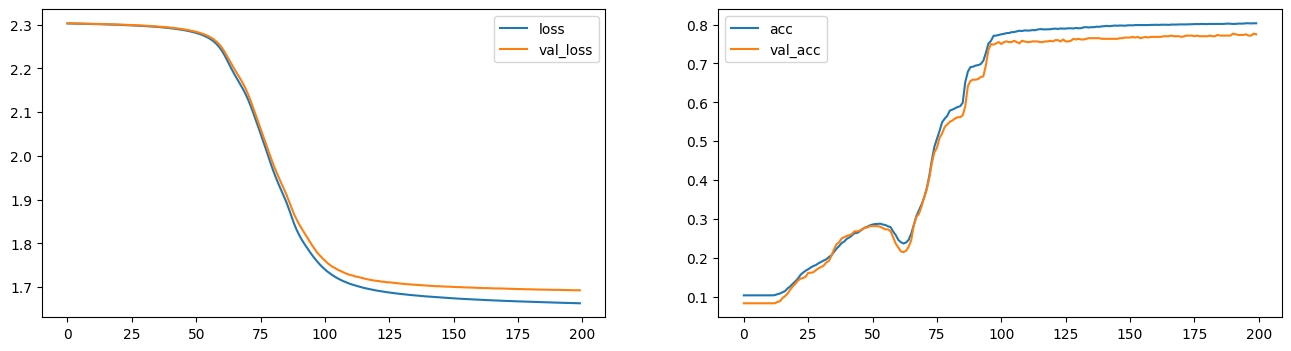

In [284]:
vis_history(acc_train_all_r3000nn, loss_train_all_r3000nn, acc_test_all_r3000nn, loss_test_all_r3000nn)

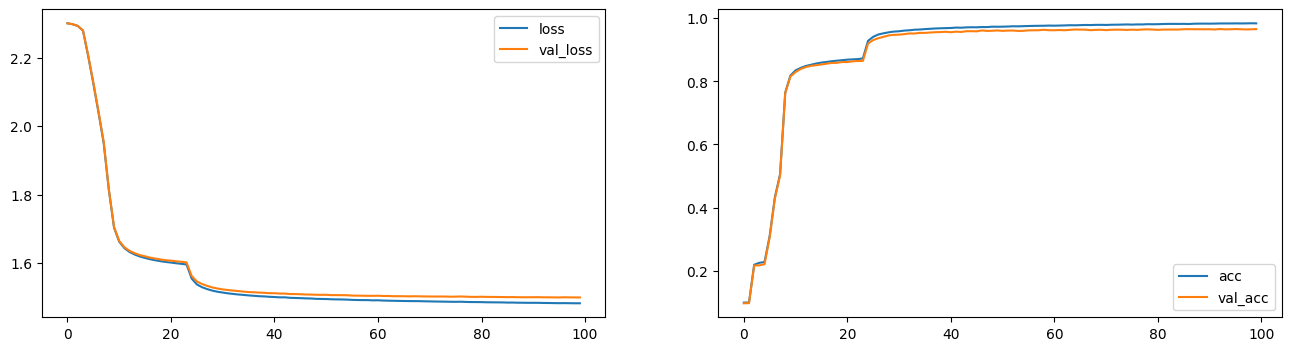

In [281]:
vis_history(acc_train_all_r30000nn, loss_train_all_r30000nn, acc_test_all_r30000nn, loss_test_all_r30000nn)

In [269]:
n_epochs = 200
batch_size = 100
learning_rate = 0.05

X_mn_train = torch.from_numpy(np.array(X_mn_train))
X_mn_test = torch.from_numpy(np.array(X_mn_test))
X_mn_train = X_mn_train.flatten(start_dim=1).float()
X_mn_test = X_mn_test.flatten(start_dim=1).float()
y_mn_train = torch.from_numpy(np.array(y_mn_train))
y_mn_test = torch.from_numpy(np.array(y_mn_test))
print(X_mn_train.size())
print(X_mn_train.size())
D_in = np.array(X_mn_train).shape[1]
print(D_in)
D_out = 10
loss_fn = torch.nn.CrossEntropyLoss()
model_sn = Model_n(D_in,200,20,D_out)
acc_train_all_s30000n, loss_train_all_s30000n, acc_test_all_s30000n, loss_test_all_s30000n = model_sn.train(model_sn,n_epochs, batch_size, learning_rate, X_mn_train, y_mn_train, X_mn_test, y_mn_test)

torch.Size([24000, 720])
torch.Size([24000, 720])
720


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 606.77it/s]


Epoch 0: 
 Accuracy - train: 0.18758333333333332 | test: 0.18883333333333333 
 Loss - train: 2.2640342712402344 | test: 2.263730049133301


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 698.17it/s]


Epoch 1: 
 Accuracy - train: 0.19325 | test: 0.1955 
 Loss - train: 2.2450432777404785 | test: 2.244622230529785


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 666.66it/s]


Epoch 2: 
 Accuracy - train: 0.21725 | test: 0.22083333333333333 
 Loss - train: 2.2257750034332275 | test: 2.2253174781799316


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 677.85it/s]


Epoch 3: 
 Accuracy - train: 0.27325 | test: 0.2738333333333333 
 Loss - train: 2.206202268600464 | test: 2.205744743347168


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 747.07it/s]


Epoch 4: 
 Accuracy - train: 0.3330416666666667 | test: 0.3348333333333333 
 Loss - train: 2.18485164642334 | test: 2.184314727783203


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 673.61it/s]


Epoch 5: 
 Accuracy - train: 0.3665833333333333 | test: 0.37266666666666665 
 Loss - train: 2.159935712814331 | test: 2.1591427326202393


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 671.44it/s]


Epoch 6: 
 Accuracy - train: 0.38625 | test: 0.391 
 Loss - train: 2.1320505142211914 | test: 2.1309657096862793


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 698.99it/s]


Epoch 7: 
 Accuracy - train: 0.4182916666666667 | test: 0.42083333333333334 
 Loss - train: 2.104262113571167 | test: 2.102778911590576


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 690.25it/s]


Epoch 8: 
 Accuracy - train: 0.455125 | test: 0.45816666666666667 
 Loss - train: 2.07847261428833 | test: 2.076968193054199


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 704.55it/s]


Epoch 9: 
 Accuracy - train: 0.47470833333333334 | test: 0.47783333333333333 
 Loss - train: 2.0523173809051514 | test: 2.0508830547332764


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 675.81it/s]


Epoch 10: 
 Accuracy - train: 0.47825 | test: 0.4826666666666667 
 Loss - train: 2.0286448001861572 | test: 2.0274035930633545


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 664.45it/s]


Epoch 11: 
 Accuracy - train: 0.4801666666666667 | test: 0.4831666666666667 
 Loss - train: 2.010550022125244 | test: 2.0093395709991455


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 733.12it/s]


Epoch 12: 
 Accuracy - train: 0.48075 | test: 0.484 
 Loss - train: 1.9971238374710083 | test: 1.9960081577301025


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 612.22it/s]


Epoch 13: 
 Accuracy - train: 0.481375 | test: 0.4845 
 Loss - train: 1.9865257740020752 | test: 1.9855022430419922


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 647.13it/s]


Epoch 14: 
 Accuracy - train: 0.48170833333333335 | test: 0.4846666666666667 
 Loss - train: 1.977622389793396 | test: 1.9766827821731567


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 642.66it/s]


Epoch 15: 
 Accuracy - train: 0.4822916666666667 | test: 0.486 
 Loss - train: 1.9699569940567017 | test: 1.9694548845291138


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 672.34it/s]


Epoch 16: 
 Accuracy - train: 0.48254166666666665 | test: 0.4851666666666667 
 Loss - train: 1.962436318397522 | test: 1.9622501134872437


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 703.86it/s]


Epoch 17: 
 Accuracy - train: 0.48275 | test: 0.4865 
 Loss - train: 1.9544298648834229 | test: 1.954403281211853


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 607.63it/s]


Epoch 18: 
 Accuracy - train: 0.486125 | test: 0.48983333333333334 
 Loss - train: 1.944998860359192 | test: 1.9452000856399536


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 561.95it/s]


Epoch 19: 
 Accuracy - train: 0.5707916666666667 | test: 0.5755 
 Loss - train: 1.9329073429107666 | test: 1.9335780143737793


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 563.73it/s]


Epoch 20: 
 Accuracy - train: 0.665875 | test: 0.6678333333333333 
 Loss - train: 1.9099406003952026 | test: 1.9113988876342773


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 556.33it/s]


Epoch 21: 
 Accuracy - train: 0.6874583333333333 | test: 0.684 
 Loss - train: 1.8763927221298218 | test: 1.8783124685287476


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 498.06it/s]


Epoch 22: 
 Accuracy - train: 0.6907083333333334 | test: 0.6886666666666666 
 Loss - train: 1.8484208583831787 | test: 1.8512135744094849


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 581.49it/s]


Epoch 23: 
 Accuracy - train: 0.69925 | test: 0.698 
 Loss - train: 1.8231384754180908 | test: 1.8270636796951294


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 623.82it/s]


Epoch 24: 
 Accuracy - train: 0.7385 | test: 0.7356666666666667 
 Loss - train: 1.803241491317749 | test: 1.807755708694458


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 622.42it/s]


Epoch 25: 
 Accuracy - train: 0.785 | test: 0.7798333333333334 
 Loss - train: 1.7821168899536133 | test: 1.7878499031066895


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 665.87it/s]


Epoch 26: 
 Accuracy - train: 0.79025 | test: 0.7846666666666666 
 Loss - train: 1.7587717771530151 | test: 1.7647581100463867


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 600.70it/s]


Epoch 27: 
 Accuracy - train: 0.7915 | test: 0.7858333333333334 
 Loss - train: 1.7382750511169434 | test: 1.745179533958435


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 673.76it/s]


Epoch 28: 
 Accuracy - train: 0.7915 | test: 0.7868333333333334 
 Loss - train: 1.7268493175506592 | test: 1.734079122543335


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 628.53it/s]


Epoch 29: 
 Accuracy - train: 0.79275 | test: 0.7878333333333334 
 Loss - train: 1.714381217956543 | test: 1.7221072912216187


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 628.39it/s]


Epoch 30: 
 Accuracy - train: 0.794 | test: 0.7881666666666667 
 Loss - train: 1.7061699628829956 | test: 1.7143009901046753


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 644.54it/s]


Epoch 31: 
 Accuracy - train: 0.7937916666666667 | test: 0.7881666666666667 
 Loss - train: 1.700352430343628 | test: 1.7089239358901978


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 596.81it/s]


Epoch 32: 
 Accuracy - train: 0.794375 | test: 0.7883333333333333 
 Loss - train: 1.6943827867507935 | test: 1.7033851146697998


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 695.07it/s]


Epoch 33: 
 Accuracy - train: 0.7946666666666666 | test: 0.7878333333333334 
 Loss - train: 1.6904679536819458 | test: 1.7003272771835327


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 683.15it/s]


Epoch 34: 
 Accuracy - train: 0.7947916666666667 | test: 0.788 
 Loss - train: 1.6850464344024658 | test: 1.6944786310195923


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 633.75it/s]


Epoch 35: 
 Accuracy - train: 0.7955 | test: 0.7885 
 Loss - train: 1.6807572841644287 | test: 1.690858244895935


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 686.31it/s]


Epoch 36: 
 Accuracy - train: 0.7960833333333334 | test: 0.7888333333333334 
 Loss - train: 1.6765947341918945 | test: 1.6867296695709229


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 609.62it/s]


Epoch 37: 
 Accuracy - train: 0.7960416666666666 | test: 0.7888333333333334 
 Loss - train: 1.6730639934539795 | test: 1.6836048364639282


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 697.80it/s]


Epoch 38: 
 Accuracy - train: 0.8165833333333333 | test: 0.8085 
 Loss - train: 1.6663261651992798 | test: 1.676820158958435


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 685.61it/s]


Epoch 39: 
 Accuracy - train: 0.87075 | test: 0.86 
 Loss - train: 1.651640772819519 | test: 1.6635760068893433


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 518.09it/s]


Epoch 40: 
 Accuracy - train: 0.8912083333333334 | test: 0.8815 
 Loss - train: 1.6289770603179932 | test: 1.6411274671554565


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 626.77it/s]


Epoch 41: 
 Accuracy - train: 0.9060416666666666 | test: 0.8936666666666667 
 Loss - train: 1.608494520187378 | test: 1.621738314628601


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 607.63it/s]


Epoch 42: 
 Accuracy - train: 0.9414583333333333 | test: 0.9253333333333333 
 Loss - train: 1.5973371267318726 | test: 1.6111165285110474


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 619.33it/s]


Epoch 43: 
 Accuracy - train: 0.9723333333333334 | test: 0.9545 
 Loss - train: 1.5804812908172607 | test: 1.595279574394226


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 617.29it/s]


Epoch 44: 
 Accuracy - train: 0.984375 | test: 0.9675 
 Loss - train: 1.5621951818466187 | test: 1.5785008668899536


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 670.63it/s]


Epoch 45: 
 Accuracy - train: 0.987875 | test: 0.9723333333333334 
 Loss - train: 1.5472620725631714 | test: 1.5641134977340698


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 680.85it/s]


Epoch 46: 
 Accuracy - train: 0.989 | test: 0.9755 
 Loss - train: 1.538771629333496 | test: 1.5557020902633667


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 631.20it/s]


Epoch 47: 
 Accuracy - train: 0.989375 | test: 0.9733333333333334 
 Loss - train: 1.5334876775741577 | test: 1.5511586666107178


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 660.47it/s]


Epoch 48: 
 Accuracy - train: 0.990875 | test: 0.9763333333333334 
 Loss - train: 1.5250316858291626 | test: 1.5427722930908203


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 660.98it/s]


Epoch 49: 
 Accuracy - train: 0.9911666666666666 | test: 0.9755 
 Loss - train: 1.5200698375701904 | test: 1.5382381677627563


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 699.38it/s]


Epoch 50: 
 Accuracy - train: 0.9923333333333333 | test: 0.9765 
 Loss - train: 1.516220211982727 | test: 1.534122109413147


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 585.37it/s]


Epoch 51: 
 Accuracy - train: 0.9925 | test: 0.9778333333333333 
 Loss - train: 1.511364459991455 | test: 1.530293583869934


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 570.24it/s]


Epoch 52: 
 Accuracy - train: 0.993 | test: 0.977 
 Loss - train: 1.5072355270385742 | test: 1.5273075103759766


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 671.04it/s]


Epoch 53: 
 Accuracy - train: 0.9932083333333334 | test: 0.9768333333333333 
 Loss - train: 1.5068413019180298 | test: 1.5268911123275757


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 614.28it/s]


Epoch 54: 
 Accuracy - train: 0.9938333333333333 | test: 0.9758333333333333 
 Loss - train: 1.502263069152832 | test: 1.522618293762207


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 698.54it/s]


Epoch 55: 
 Accuracy - train: 0.994125 | test: 0.9795 
 Loss - train: 1.4987329244613647 | test: 1.5184539556503296


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 701.45it/s]


Epoch 56: 
 Accuracy - train: 0.9944166666666666 | test: 0.9785 
 Loss - train: 1.4971474409103394 | test: 1.5174230337142944


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 673.48it/s]


Epoch 57: 
 Accuracy - train: 0.9946666666666667 | test: 0.9795 
 Loss - train: 1.495103359222412 | test: 1.5153406858444214


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 688.08it/s]


Epoch 58: 
 Accuracy - train: 0.9951666666666666 | test: 0.9788333333333333 
 Loss - train: 1.4931485652923584 | test: 1.5126575231552124


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 678.53it/s]


Epoch 59: 
 Accuracy - train: 0.9952083333333334 | test: 0.9798333333333333 
 Loss - train: 1.4918071031570435 | test: 1.5116857290267944


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 659.98it/s]


Epoch 60: 
 Accuracy - train: 0.995375 | test: 0.98 
 Loss - train: 1.4896676540374756 | test: 1.5101865530014038


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 702.58it/s]


Epoch 61: 
 Accuracy - train: 0.9955833333333334 | test: 0.9808333333333333 
 Loss - train: 1.4882100820541382 | test: 1.5086911916732788


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 674.98it/s]


Epoch 62: 
 Accuracy - train: 0.9955 | test: 0.9801666666666666 
 Loss - train: 1.4878298044204712 | test: 1.5091357231140137


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 669.15it/s]


Epoch 63: 
 Accuracy - train: 0.9957916666666666 | test: 0.9788333333333333 
 Loss - train: 1.4865344762802124 | test: 1.5080759525299072


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 672.83it/s]


Epoch 64: 
 Accuracy - train: 0.99575 | test: 0.9815 
 Loss - train: 1.485585331916809 | test: 1.5064114332199097


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 688.69it/s]


Epoch 65: 
 Accuracy - train: 0.9959166666666667 | test: 0.9803333333333333 
 Loss - train: 1.4841936826705933 | test: 1.5054904222488403


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 675.73it/s]


Epoch 66: 
 Accuracy - train: 0.99625 | test: 0.98 
 Loss - train: 1.482904076576233 | test: 1.5039466619491577


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 590.06it/s]


Epoch 67: 
 Accuracy - train: 0.996375 | test: 0.98 
 Loss - train: 1.4825283288955688 | test: 1.504565954208374


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 670.77it/s]


Epoch 68: 
 Accuracy - train: 0.9967083333333333 | test: 0.9808333333333333 
 Loss - train: 1.4815717935562134 | test: 1.502956748008728


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 684.11it/s]


Epoch 69: 
 Accuracy - train: 0.9970416666666667 | test: 0.9816666666666667 
 Loss - train: 1.480373740196228 | test: 1.5009827613830566


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 678.44it/s]


Epoch 70: 
 Accuracy - train: 0.9966666666666667 | test: 0.9806666666666667 
 Loss - train: 1.4801818132400513 | test: 1.5020538568496704


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 664.57it/s]


Epoch 71: 
 Accuracy - train: 0.9970416666666667 | test: 0.9796666666666667 
 Loss - train: 1.4792243242263794 | test: 1.5009026527404785


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 644.64it/s]


Epoch 72: 
 Accuracy - train: 0.9971666666666666 | test: 0.9806666666666667 
 Loss - train: 1.478238821029663 | test: 1.5008305311203003


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 687.53it/s]


Epoch 73: 
 Accuracy - train: 0.997375 | test: 0.9813333333333333 
 Loss - train: 1.4780274629592896 | test: 1.5002049207687378


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 714.75it/s]


Epoch 74: 
 Accuracy - train: 0.9975 | test: 0.9803333333333333 
 Loss - train: 1.4772789478302002 | test: 1.498879075050354


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 543.18it/s]


Epoch 75: 
 Accuracy - train: 0.997375 | test: 0.9811666666666666 
 Loss - train: 1.4771264791488647 | test: 1.4991902112960815


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 656.44it/s]


Epoch 76: 
 Accuracy - train: 0.99775 | test: 0.9811666666666666 
 Loss - train: 1.4761744737625122 | test: 1.4987455606460571


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 645.59it/s]


Epoch 77: 
 Accuracy - train: 0.9979166666666667 | test: 0.9815 
 Loss - train: 1.476306438446045 | test: 1.4983502626419067


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 636.72it/s]


Epoch 78: 
 Accuracy - train: 0.997625 | test: 0.9816666666666667 
 Loss - train: 1.4758994579315186 | test: 1.4982945919036865


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 690.85it/s]


Epoch 79: 
 Accuracy - train: 0.9979166666666667 | test: 0.9816666666666667 
 Loss - train: 1.4745229482650757 | test: 1.4969370365142822


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 565.45it/s]


Epoch 80: 
 Accuracy - train: 0.9976666666666667 | test: 0.9811666666666666 
 Loss - train: 1.4756884574890137 | test: 1.499302625656128


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 522.73it/s]


Epoch 81: 
 Accuracy - train: 0.9979166666666667 | test: 0.9796666666666667 
 Loss - train: 1.474339485168457 | test: 1.4974796772003174


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 525.24it/s]


Epoch 82: 
 Accuracy - train: 0.9981666666666666 | test: 0.9808333333333333 
 Loss - train: 1.4744359254837036 | test: 1.4969267845153809


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 586.06it/s]


Epoch 83: 
 Accuracy - train: 0.9982916666666667 | test: 0.9818333333333333 
 Loss - train: 1.4728254079818726 | test: 1.49554443359375


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 578.65it/s]


Epoch 84: 
 Accuracy - train: 0.9982916666666667 | test: 0.9818333333333333 
 Loss - train: 1.4727882146835327 | test: 1.4953219890594482


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 658.67it/s]


Epoch 85: 
 Accuracy - train: 0.998375 | test: 0.9816666666666667 
 Loss - train: 1.472527027130127 | test: 1.4949251413345337


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 651.41it/s]


Epoch 86: 
 Accuracy - train: 0.9984166666666666 | test: 0.9803333333333333 
 Loss - train: 1.4729526042938232 | test: 1.4966020584106445


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 638.46it/s]


Epoch 87: 
 Accuracy - train: 0.9985416666666667 | test: 0.98 
 Loss - train: 1.4718738794326782 | test: 1.4951224327087402


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 695.19it/s]


Epoch 88: 
 Accuracy - train: 0.9984166666666666 | test: 0.9811666666666666 
 Loss - train: 1.4714640378952026 | test: 1.4938743114471436


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 641.87it/s]


Epoch 89: 
 Accuracy - train: 0.9985 | test: 0.9818333333333333 
 Loss - train: 1.471011996269226 | test: 1.4933180809020996


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 662.78it/s]


Epoch 90: 
 Accuracy - train: 0.9984583333333333 | test: 0.9805 
 Loss - train: 1.4717626571655273 | test: 1.4954017400741577


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 624.24it/s]


Epoch 91: 
 Accuracy - train: 0.9985833333333334 | test: 0.9826666666666667 
 Loss - train: 1.47063410282135 | test: 1.4928460121154785


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 639.20it/s]


Epoch 92: 
 Accuracy - train: 0.9985833333333334 | test: 0.9811666666666666 
 Loss - train: 1.4705299139022827 | test: 1.4936083555221558


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 670.65it/s]


Epoch 93: 
 Accuracy - train: 0.998625 | test: 0.9803333333333333 
 Loss - train: 1.4705851078033447 | test: 1.4935526847839355


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 643.41it/s]


Epoch 94: 
 Accuracy - train: 0.99875 | test: 0.9823333333333333 
 Loss - train: 1.470009446144104 | test: 1.4928385019302368


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 678.52it/s]


Epoch 95: 
 Accuracy - train: 0.998625 | test: 0.9826666666666667 
 Loss - train: 1.469944715499878 | test: 1.4919499158859253


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 708.50it/s]


Epoch 96: 
 Accuracy - train: 0.9987916666666666 | test: 0.9816666666666667 
 Loss - train: 1.47014319896698 | test: 1.4929475784301758


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 668.20it/s]


Epoch 97: 
 Accuracy - train: 0.9987916666666666 | test: 0.9816666666666667 
 Loss - train: 1.469560980796814 | test: 1.4922891855239868


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 675.50it/s]


Epoch 98: 
 Accuracy - train: 0.9987916666666666 | test: 0.9821666666666666 
 Loss - train: 1.4692274332046509 | test: 1.4917864799499512


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 666.47it/s]


Epoch 99: 
 Accuracy - train: 0.9987916666666666 | test: 0.9821666666666666 
 Loss - train: 1.4694145917892456 | test: 1.4920766353607178


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 672.36it/s]


Epoch 100: 
 Accuracy - train: 0.99875 | test: 0.9805 
 Loss - train: 1.4692555665969849 | test: 1.4926798343658447


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 638.69it/s]


Epoch 101: 
 Accuracy - train: 0.9988333333333334 | test: 0.9825 
 Loss - train: 1.4689573049545288 | test: 1.4914257526397705


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 634.33it/s]


Epoch 102: 
 Accuracy - train: 0.998875 | test: 0.9806666666666667 
 Loss - train: 1.4693344831466675 | test: 1.4925719499588013


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 675.01it/s]


Epoch 103: 
 Accuracy - train: 0.9988333333333334 | test: 0.9823333333333333 
 Loss - train: 1.4687588214874268 | test: 1.4917188882827759


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 632.94it/s]


Epoch 104: 
 Accuracy - train: 0.9988333333333334 | test: 0.9818333333333333 
 Loss - train: 1.4682399034500122 | test: 1.4904000759124756


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 692.34it/s]


Epoch 105: 
 Accuracy - train: 0.9989166666666667 | test: 0.9816666666666667 
 Loss - train: 1.4682159423828125 | test: 1.490657925605774


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 671.28it/s]


Epoch 106: 
 Accuracy - train: 0.9989166666666667 | test: 0.9818333333333333 
 Loss - train: 1.4681802988052368 | test: 1.4906543493270874


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 663.67it/s]


Epoch 107: 
 Accuracy - train: 0.9989166666666667 | test: 0.9828333333333333 
 Loss - train: 1.4680858850479126 | test: 1.4904268980026245


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 707.46it/s]


Epoch 108: 
 Accuracy - train: 0.999 | test: 0.9818333333333333 
 Loss - train: 1.4682226181030273 | test: 1.4915813207626343


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 653.57it/s]


Epoch 109: 
 Accuracy - train: 0.9989583333333333 | test: 0.982 
 Loss - train: 1.4676077365875244 | test: 1.4901243448257446


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 626.02it/s]


Epoch 110: 
 Accuracy - train: 0.9989583333333333 | test: 0.9813333333333333 
 Loss - train: 1.467609167098999 | test: 1.4904063940048218


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 656.75it/s]


Epoch 111: 
 Accuracy - train: 0.999 | test: 0.9818333333333333 
 Loss - train: 1.4676835536956787 | test: 1.4902980327606201


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 674.97it/s]


Epoch 112: 
 Accuracy - train: 0.999 | test: 0.9815 
 Loss - train: 1.4676687717437744 | test: 1.4902293682098389


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 703.51it/s]


Epoch 113: 
 Accuracy - train: 0.999 | test: 0.9826666666666667 
 Loss - train: 1.4671858549118042 | test: 1.488971471786499


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 641.31it/s]


Epoch 114: 
 Accuracy - train: 0.9989583333333333 | test: 0.9826666666666667 
 Loss - train: 1.4674338102340698 | test: 1.4894499778747559


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 679.61it/s]


Epoch 115: 
 Accuracy - train: 0.999 | test: 0.9823333333333333 
 Loss - train: 1.4672253131866455 | test: 1.4895758628845215


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 671.51it/s]


Epoch 116: 
 Accuracy - train: 0.9989583333333333 | test: 0.9811666666666666 
 Loss - train: 1.4671399593353271 | test: 1.4898144006729126


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 689.72it/s]


Epoch 117: 
 Accuracy - train: 0.999 | test: 0.983 
 Loss - train: 1.4668790102005005 | test: 1.4886394739151


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 674.27it/s]


Epoch 118: 
 Accuracy - train: 0.999 | test: 0.9811666666666666 
 Loss - train: 1.4670978784561157 | test: 1.4895905256271362


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 616.84it/s]


Epoch 119: 
 Accuracy - train: 0.999 | test: 0.9813333333333333 
 Loss - train: 1.4669039249420166 | test: 1.4893330335617065


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 663.57it/s]


Epoch 120: 
 Accuracy - train: 0.999 | test: 0.9818333333333333 
 Loss - train: 1.4667985439300537 | test: 1.4895002841949463


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 665.16it/s]


Epoch 121: 
 Accuracy - train: 0.999 | test: 0.9816666666666667 
 Loss - train: 1.4666328430175781 | test: 1.4887008666992188


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 598.87it/s]


Epoch 122: 
 Accuracy - train: 0.9990416666666667 | test: 0.9813333333333333 
 Loss - train: 1.4665862321853638 | test: 1.4887664318084717


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 578.40it/s]


Epoch 123: 
 Accuracy - train: 0.9990416666666667 | test: 0.9826666666666667 
 Loss - train: 1.4670509099960327 | test: 1.4892725944519043


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 512.58it/s]


Epoch 124: 
 Accuracy - train: 0.9990416666666667 | test: 0.9833333333333333 
 Loss - train: 1.4663699865341187 | test: 1.4880656003952026


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 561.29it/s]


Epoch 125: 
 Accuracy - train: 0.9990416666666667 | test: 0.9818333333333333 
 Loss - train: 1.4662328958511353 | test: 1.4879729747772217


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 535.71it/s]


Epoch 126: 
 Accuracy - train: 0.9990416666666667 | test: 0.9808333333333333 
 Loss - train: 1.4664040803909302 | test: 1.488275408744812


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 621.92it/s]


Epoch 127: 
 Accuracy - train: 0.998875 | test: 0.981 
 Loss - train: 1.4668208360671997 | test: 1.4887785911560059


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 532.14it/s]


Epoch 128: 
 Accuracy - train: 0.9990416666666667 | test: 0.9823333333333333 
 Loss - train: 1.4661672115325928 | test: 1.4883203506469727


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 636.14it/s]


Epoch 129: 
 Accuracy - train: 0.9990416666666667 | test: 0.9826666666666667 
 Loss - train: 1.46605384349823 | test: 1.4875010251998901


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 653.04it/s]


Epoch 130: 
 Accuracy - train: 0.9990416666666667 | test: 0.9836666666666667 
 Loss - train: 1.4660943746566772 | test: 1.487093448638916


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 598.88it/s]


Epoch 131: 
 Accuracy - train: 0.9990833333333333 | test: 0.9835 
 Loss - train: 1.4661383628845215 | test: 1.487468957901001


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 645.49it/s]


Epoch 132: 
 Accuracy - train: 0.9990833333333333 | test: 0.9825 
 Loss - train: 1.465901255607605 | test: 1.4873590469360352


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 600.09it/s]


Epoch 133: 
 Accuracy - train: 0.9990416666666667 | test: 0.9813333333333333 
 Loss - train: 1.4658812284469604 | test: 1.4876803159713745


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 561.75it/s]


Epoch 134: 
 Accuracy - train: 0.9990833333333333 | test: 0.9818333333333333 
 Loss - train: 1.465851068496704 | test: 1.4878299236297607


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 623.02it/s]


Epoch 135: 
 Accuracy - train: 0.9990833333333333 | test: 0.9831666666666666 
 Loss - train: 1.4657726287841797 | test: 1.487271785736084


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 595.02it/s]


Epoch 136: 
 Accuracy - train: 0.9990833333333333 | test: 0.983 
 Loss - train: 1.465699553489685 | test: 1.4872877597808838


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 611.10it/s]


Epoch 137: 
 Accuracy - train: 0.9990833333333333 | test: 0.982 
 Loss - train: 1.465614914894104 | test: 1.487230658531189


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 583.78it/s]


Epoch 138: 
 Accuracy - train: 0.999125 | test: 0.9825 
 Loss - train: 1.4656250476837158 | test: 1.487247109413147


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 525.44it/s]


Epoch 139: 
 Accuracy - train: 0.999125 | test: 0.984 
 Loss - train: 1.4656533002853394 | test: 1.4868252277374268


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 580.55it/s]


Epoch 140: 
 Accuracy - train: 0.999125 | test: 0.9825 
 Loss - train: 1.4656251668930054 | test: 1.4875863790512085


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 567.21it/s]


Epoch 141: 
 Accuracy - train: 0.999125 | test: 0.9831666666666666 
 Loss - train: 1.4653939008712769 | test: 1.4864375591278076


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 654.53it/s]


Epoch 142: 
 Accuracy - train: 0.999125 | test: 0.9836666666666667 
 Loss - train: 1.4654163122177124 | test: 1.4868007898330688


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 617.76it/s]


Epoch 143: 
 Accuracy - train: 0.999125 | test: 0.9825 
 Loss - train: 1.4654148817062378 | test: 1.4872519969940186


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 613.01it/s]


Epoch 144: 
 Accuracy - train: 0.999125 | test: 0.9828333333333333 
 Loss - train: 1.4653252363204956 | test: 1.4865856170654297


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 671.15it/s]


Epoch 145: 
 Accuracy - train: 0.999125 | test: 0.9826666666666667 
 Loss - train: 1.4653561115264893 | test: 1.4863413572311401


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 701.41it/s]


Epoch 146: 
 Accuracy - train: 0.999125 | test: 0.9833333333333333 
 Loss - train: 1.4652873277664185 | test: 1.4862977266311646


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 617.35it/s]


Epoch 147: 
 Accuracy - train: 0.999125 | test: 0.9833333333333333 
 Loss - train: 1.465223789215088 | test: 1.4866421222686768


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 637.32it/s]


Epoch 148: 
 Accuracy - train: 0.999125 | test: 0.9825 
 Loss - train: 1.4651952981948853 | test: 1.4861325025558472


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 700.09it/s]


Epoch 149: 
 Accuracy - train: 0.999125 | test: 0.9821666666666666 
 Loss - train: 1.4652047157287598 | test: 1.4867151975631714


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 647.20it/s]


Epoch 150: 
 Accuracy - train: 0.999125 | test: 0.9835 
 Loss - train: 1.4650967121124268 | test: 1.4859726428985596


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 655.64it/s]


Epoch 151: 
 Accuracy - train: 0.999125 | test: 0.9821666666666666 
 Loss - train: 1.4651480913162231 | test: 1.4864381551742554


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 696.77it/s]


Epoch 152: 
 Accuracy - train: 0.999125 | test: 0.9813333333333333 
 Loss - train: 1.4650852680206299 | test: 1.486724615097046


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 559.57it/s]


Epoch 153: 
 Accuracy - train: 0.999125 | test: 0.982 
 Loss - train: 1.4650179147720337 | test: 1.4864977598190308


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 576.93it/s]


Epoch 154: 
 Accuracy - train: 0.999125 | test: 0.9828333333333333 
 Loss - train: 1.4649837017059326 | test: 1.4863888025283813


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 615.65it/s]


Epoch 155: 
 Accuracy - train: 0.999125 | test: 0.9816666666666667 
 Loss - train: 1.4649654626846313 | test: 1.4862359762191772


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 712.00it/s]


Epoch 156: 
 Accuracy - train: 0.999125 | test: 0.9835 
 Loss - train: 1.4650508165359497 | test: 1.4862903356552124


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 567.94it/s]


Epoch 157: 
 Accuracy - train: 0.999125 | test: 0.983 
 Loss - train: 1.464880347251892 | test: 1.4859535694122314


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 575.81it/s]


Epoch 158: 
 Accuracy - train: 0.999125 | test: 0.9825 
 Loss - train: 1.4648821353912354 | test: 1.4863015413284302


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 670.63it/s]


Epoch 159: 
 Accuracy - train: 0.999125 | test: 0.9826666666666667 
 Loss - train: 1.464833378791809 | test: 1.4859241247177124


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 497.81it/s]


Epoch 160: 
 Accuracy - train: 0.999125 | test: 0.9828333333333333 
 Loss - train: 1.4648197889328003 | test: 1.486073613166809


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 524.98it/s]


Epoch 161: 
 Accuracy - train: 0.999125 | test: 0.9825 
 Loss - train: 1.4647823572158813 | test: 1.485925316810608


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 583.73it/s]


Epoch 162: 
 Accuracy - train: 0.999125 | test: 0.9831666666666666 
 Loss - train: 1.4648877382278442 | test: 1.4860634803771973


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 604.97it/s]


Epoch 163: 
 Accuracy - train: 0.999125 | test: 0.9826666666666667 
 Loss - train: 1.4647284746170044 | test: 1.485564112663269


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 622.50it/s]


Epoch 164: 
 Accuracy - train: 0.999125 | test: 0.9818333333333333 
 Loss - train: 1.4647926092147827 | test: 1.4862778186798096


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 611.75it/s]


Epoch 165: 
 Accuracy - train: 0.999125 | test: 0.9828333333333333 
 Loss - train: 1.4647563695907593 | test: 1.48606538772583


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 601.76it/s]


Epoch 166: 
 Accuracy - train: 0.999125 | test: 0.983 
 Loss - train: 1.4646598100662231 | test: 1.4854835271835327


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 623.90it/s]


Epoch 167: 
 Accuracy - train: 0.999125 | test: 0.9831666666666666 
 Loss - train: 1.4646477699279785 | test: 1.4855213165283203


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 627.08it/s]


Epoch 168: 
 Accuracy - train: 0.999125 | test: 0.982 
 Loss - train: 1.464672565460205 | test: 1.4861408472061157


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 591.56it/s]


Epoch 169: 
 Accuracy - train: 0.999125 | test: 0.9833333333333333 
 Loss - train: 1.4646801948547363 | test: 1.4857561588287354


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 660.15it/s]


Epoch 170: 
 Accuracy - train: 0.999125 | test: 0.9825 
 Loss - train: 1.4646414518356323 | test: 1.4858028888702393


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 662.61it/s]


Epoch 171: 
 Accuracy - train: 0.999125 | test: 0.9831666666666666 
 Loss - train: 1.4645576477050781 | test: 1.4852298498153687


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 668.46it/s]


Epoch 172: 
 Accuracy - train: 0.999125 | test: 0.9833333333333333 
 Loss - train: 1.4645382165908813 | test: 1.4852374792099


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 592.05it/s]


Epoch 173: 
 Accuracy - train: 0.999125 | test: 0.983 
 Loss - train: 1.4645024538040161 | test: 1.4852304458618164


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 647.14it/s]


Epoch 174: 
 Accuracy - train: 0.999125 | test: 0.9836666666666667 
 Loss - train: 1.4644607305526733 | test: 1.485059380531311


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 678.06it/s]


Epoch 175: 
 Accuracy - train: 0.999125 | test: 0.983 
 Loss - train: 1.464450716972351 | test: 1.4852187633514404


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 638.94it/s]


Epoch 176: 
 Accuracy - train: 0.999125 | test: 0.9826666666666667 
 Loss - train: 1.4644479751586914 | test: 1.4852567911148071


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 711.20it/s]


Epoch 177: 
 Accuracy - train: 0.9991666666666666 | test: 0.983 
 Loss - train: 1.464430332183838 | test: 1.4854944944381714


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 726.75it/s]


Epoch 178: 
 Accuracy - train: 0.9991666666666666 | test: 0.982 
 Loss - train: 1.4645144939422607 | test: 1.4857302904129028


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 669.83it/s]


Epoch 179: 
 Accuracy - train: 0.9991666666666666 | test: 0.982 
 Loss - train: 1.4644771814346313 | test: 1.4859079122543335


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 627.75it/s]


Epoch 180: 
 Accuracy - train: 0.9991666666666666 | test: 0.983 
 Loss - train: 1.4643977880477905 | test: 1.4855245351791382


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 635.38it/s]


Epoch 181: 
 Accuracy - train: 0.9991666666666666 | test: 0.9835 
 Loss - train: 1.4643319845199585 | test: 1.4850010871887207


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 687.43it/s]


Epoch 182: 
 Accuracy - train: 0.9991666666666666 | test: 0.984 
 Loss - train: 1.4643343687057495 | test: 1.4847848415374756


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 676.45it/s]


Epoch 183: 
 Accuracy - train: 0.9991666666666666 | test: 0.9836666666666667 
 Loss - train: 1.4642935991287231 | test: 1.4848397970199585


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 625.77it/s]


Epoch 184: 
 Accuracy - train: 0.9991666666666666 | test: 0.9836666666666667 
 Loss - train: 1.4642646312713623 | test: 1.4848836660385132


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 677.02it/s]


Epoch 185: 
 Accuracy - train: 0.9991666666666666 | test: 0.9825 
 Loss - train: 1.4642689228057861 | test: 1.4852131605148315


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 629.72it/s]


Epoch 186: 
 Accuracy - train: 0.9991666666666666 | test: 0.9828333333333333 
 Loss - train: 1.4642410278320312 | test: 1.4849885702133179


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 653.99it/s]


Epoch 187: 
 Accuracy - train: 0.9991666666666666 | test: 0.9833333333333333 
 Loss - train: 1.4642314910888672 | test: 1.4849897623062134


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 689.84it/s]


Epoch 188: 
 Accuracy - train: 0.9991666666666666 | test: 0.9835 
 Loss - train: 1.4642629623413086 | test: 1.4848384857177734


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 660.60it/s]


Epoch 189: 
 Accuracy - train: 0.9991666666666666 | test: 0.9835 
 Loss - train: 1.464190125465393 | test: 1.4845774173736572


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 663.92it/s]


Epoch 190: 
 Accuracy - train: 0.9991666666666666 | test: 0.9825 
 Loss - train: 1.464285135269165 | test: 1.4853603839874268


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 662.47it/s]


Epoch 191: 
 Accuracy - train: 0.9991666666666666 | test: 0.9831666666666666 
 Loss - train: 1.4641598463058472 | test: 1.4847946166992188


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 692.26it/s]


Epoch 192: 
 Accuracy - train: 0.9991666666666666 | test: 0.9823333333333333 
 Loss - train: 1.4641358852386475 | test: 1.4846539497375488


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 631.93it/s]


Epoch 193: 
 Accuracy - train: 0.9991666666666666 | test: 0.9826666666666667 
 Loss - train: 1.4641239643096924 | test: 1.4849495887756348


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 652.07it/s]


Epoch 194: 
 Accuracy - train: 0.9991666666666666 | test: 0.9835 
 Loss - train: 1.464138388633728 | test: 1.4846988916397095


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 676.57it/s]


Epoch 195: 
 Accuracy - train: 0.9991666666666666 | test: 0.9836666666666667 
 Loss - train: 1.4640922546386719 | test: 1.4846819639205933


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 683.80it/s]


Epoch 196: 
 Accuracy - train: 0.9991666666666666 | test: 0.9836666666666667 
 Loss - train: 1.4640837907791138 | test: 1.484614610671997


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 641.83it/s]


Epoch 197: 
 Accuracy - train: 0.9991666666666666 | test: 0.9828333333333333 
 Loss - train: 1.4640655517578125 | test: 1.4844818115234375


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 583.67it/s]


Epoch 198: 
 Accuracy - train: 0.9991666666666666 | test: 0.9826666666666667 
 Loss - train: 1.4640966653823853 | test: 1.4848275184631348


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 662.45it/s]


Epoch 199: 
 Accuracy - train: 0.9991666666666666 | test: 0.9835 
 Loss - train: 1.4640120267868042 | test: 1.4844655990600586


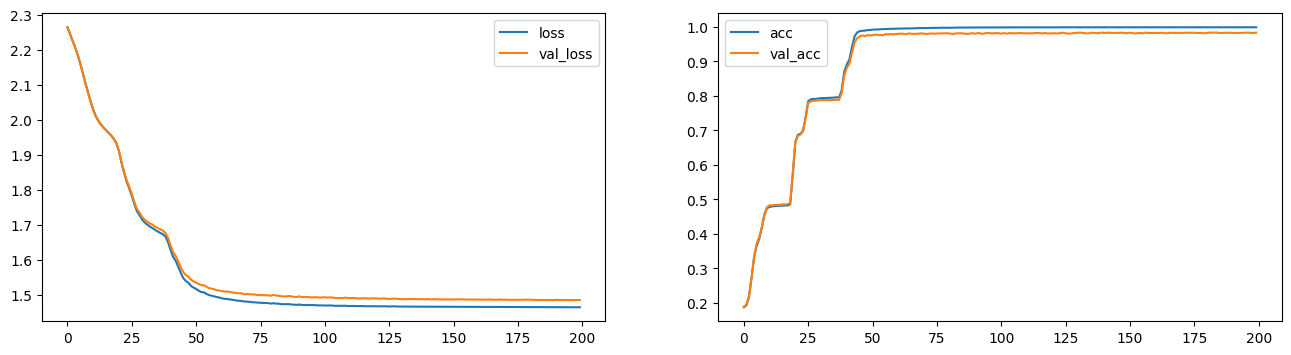

In [270]:
vis_history(acc_train_all_s30000n, loss_train_all_s30000n, acc_test_all_s30000n, loss_test_all_s30000n)

In [69]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
X_mn, y_mn = mnist["data"], mnist["target"]

In [70]:
from skimage.feature import hog


In [129]:
X_mn_hog = []
for el in X_mn.values:
    img = (np.array(el).reshape(28,28)).astype('uint8')
    fd,hog_img = hog(img, orientations=5, pixels_per_cell=(4, 4),
                    cells_per_block=(2, 2), visualize=True, channel_axis=None)
    X_mn_hog.append(fd)

In [130]:
y_mn_hog = y_mn

# Рассмотрим сначала на тренировочной выборке размера 30000

In [7]:
X_mn_train, X_mn_test, y_mn_train, y_mn_test = train_test_split(X_mn_hog[:30000], y_mn_hog.values.astype('uint8')[:30000], test_size=0.2, random_state=42)

# ReLu + нормировка

In [16]:
n_epochs = 100
batch_size = 100
learning_rate = 0.05

X_mn_train = torch.from_numpy(np.array(X_mn_train))
X_mn_test = torch.from_numpy(np.array(X_mn_test))
X_mn_train = X_mn_train.flatten(start_dim=1).float()
X_mn_test = X_mn_test.flatten(start_dim=1).float()
y_mn_train = torch.from_numpy(np.array(y_mn_train))
y_mn_test = torch.from_numpy(np.array(y_mn_test))
print(X_mn_train.size())
D_in = np.array(X_mn_train).shape[1]
print(D_in)
D_out = 10
loss_fn = torch.nn.CrossEntropyLoss()
modelRL = Model_ReLu_n(D_in,200,20,D_out)
acc_train_all_r30000, loss_train_all_r30000, acc_test_all_r30000, loss_test_all_r30000 = modelRL.train(modelRL,n_epochs, batch_size, learning_rate, X_mn_train, y_mn_train, X_mn_test, y_mn_test)

torch.Size([24000, 720])
720


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 381.46it/s]


Epoch 0: 
 Accuracy - train: 0.728375 | test: 0.7241666666666666 
 Loss - train: 1.8746497631072998 | test: 1.8779871463775635


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 399.14it/s]


Epoch 1: 
 Accuracy - train: 0.7965833333333333 | test: 0.7933333333333333 
 Loss - train: 1.7046728134155273 | test: 1.7108492851257324


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 395.55it/s]


Epoch 2: 
 Accuracy - train: 0.8814166666666666 | test: 0.875 
 Loss - train: 1.6086896657943726 | test: 1.6157890558242798


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 383.77it/s]


Epoch 3: 
 Accuracy - train: 0.9741666666666666 | test: 0.9658333333333333 
 Loss - train: 1.5588058233261108 | test: 1.5678807497024536


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 393.69it/s]


Epoch 4: 
 Accuracy - train: 0.9865 | test: 0.9763333333333334 
 Loss - train: 1.5009403228759766 | test: 1.5130398273468018


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 388.50it/s]


Epoch 5: 
 Accuracy - train: 0.9894583333333333 | test: 0.9785 
 Loss - train: 1.4897487163543701 | test: 1.5033297538757324


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 388.86it/s]


Epoch 6: 
 Accuracy - train: 0.9920833333333333 | test: 0.9798333333333333 
 Loss - train: 1.4829989671707153 | test: 1.4980698823928833


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 408.79it/s]


Epoch 7: 
 Accuracy - train: 0.9930833333333333 | test: 0.98 
 Loss - train: 1.4786418676376343 | test: 1.4950236082077026


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 434.06it/s]


Epoch 8: 
 Accuracy - train: 0.9944166666666666 | test: 0.98 
 Loss - train: 1.4756896495819092 | test: 1.493028998374939


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 388.87it/s]


Epoch 9: 
 Accuracy - train: 0.9952916666666667 | test: 0.9815 
 Loss - train: 1.4729925394058228 | test: 1.4914108514785767


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 387.88it/s]


Epoch 10: 
 Accuracy - train: 0.995875 | test: 0.9811666666666666 
 Loss - train: 1.471293568611145 | test: 1.490350604057312


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 384.38it/s]


Epoch 11: 
 Accuracy - train: 0.9965416666666667 | test: 0.9811666666666666 
 Loss - train: 1.4697402715682983 | test: 1.4891518354415894


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 384.36it/s]


Epoch 12: 
 Accuracy - train: 0.9970416666666667 | test: 0.9825 
 Loss - train: 1.468854308128357 | test: 1.4880321025848389


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 385.04it/s]


Epoch 13: 
 Accuracy - train: 0.9972916666666667 | test: 0.9805 
 Loss - train: 1.4677860736846924 | test: 1.4883408546447754


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 398.33it/s]


Epoch 14: 
 Accuracy - train: 0.9975833333333334 | test: 0.9823333333333333 
 Loss - train: 1.4668956995010376 | test: 1.486822485923767


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 391.12it/s]


Epoch 15: 
 Accuracy - train: 0.9977083333333333 | test: 0.9828333333333333 
 Loss - train: 1.4666539430618286 | test: 1.4870926141738892


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 387.42it/s]


Epoch 16: 
 Accuracy - train: 0.9979583333333333 | test: 0.9816666666666667 
 Loss - train: 1.4657758474349976 | test: 1.4859846830368042


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 384.45it/s]


Epoch 17: 
 Accuracy - train: 0.9981666666666666 | test: 0.982 
 Loss - train: 1.4653435945510864 | test: 1.4855761528015137


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 388.21it/s]


Epoch 18: 
 Accuracy - train: 0.9982916666666667 | test: 0.9826666666666667 
 Loss - train: 1.465036153793335 | test: 1.4859530925750732


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 391.21it/s]


Epoch 19: 
 Accuracy - train: 0.9984166666666666 | test: 0.9831666666666666 
 Loss - train: 1.4645638465881348 | test: 1.4847495555877686


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 394.95it/s]


Epoch 20: 
 Accuracy - train: 0.9984166666666666 | test: 0.9818333333333333 
 Loss - train: 1.4643336534500122 | test: 1.4849858283996582


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 395.53it/s]


Epoch 21: 
 Accuracy - train: 0.9985416666666667 | test: 0.9823333333333333 
 Loss - train: 1.4643237590789795 | test: 1.4849625825881958


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 387.50it/s]


Epoch 22: 
 Accuracy - train: 0.9985416666666667 | test: 0.9828333333333333 
 Loss - train: 1.4640260934829712 | test: 1.484372854232788


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 395.56it/s]


Epoch 23: 
 Accuracy - train: 0.9985416666666667 | test: 0.9833333333333333 
 Loss - train: 1.4638439416885376 | test: 1.484282374382019


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 388.47it/s]


Epoch 24: 
 Accuracy - train: 0.9985833333333334 | test: 0.9838333333333333 
 Loss - train: 1.4637118577957153 | test: 1.4834163188934326


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 361.93it/s]


Epoch 25: 
 Accuracy - train: 0.9986666666666667 | test: 0.9825 
 Loss - train: 1.4636448621749878 | test: 1.48414146900177


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 388.67it/s]


Epoch 26: 
 Accuracy - train: 0.9985833333333334 | test: 0.9831666666666666 
 Loss - train: 1.4635149240493774 | test: 1.483577847480774


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 388.99it/s]


Epoch 27: 
 Accuracy - train: 0.998625 | test: 0.9828333333333333 
 Loss - train: 1.463465929031372 | test: 1.483731746673584


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 389.83it/s]


Epoch 28: 
 Accuracy - train: 0.9986666666666667 | test: 0.9826666666666667 
 Loss - train: 1.4633147716522217 | test: 1.4835649728775024


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 394.64it/s]


Epoch 29: 
 Accuracy - train: 0.9987083333333333 | test: 0.9826666666666667 
 Loss - train: 1.4632174968719482 | test: 1.4830392599105835


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 386.32it/s]


Epoch 30: 
 Accuracy - train: 0.99875 | test: 0.9828333333333333 
 Loss - train: 1.4631141424179077 | test: 1.482915997505188


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 385.38it/s]


Epoch 31: 
 Accuracy - train: 0.9988333333333334 | test: 0.9828333333333333 
 Loss - train: 1.4630168676376343 | test: 1.4830029010772705


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 393.71it/s]


Epoch 32: 
 Accuracy - train: 0.9989166666666667 | test: 0.984 
 Loss - train: 1.4629571437835693 | test: 1.4829275608062744


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 392.91it/s]


Epoch 33: 
 Accuracy - train: 0.9989166666666667 | test: 0.9831666666666666 
 Loss - train: 1.4628896713256836 | test: 1.4829915761947632


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 392.62it/s]


Epoch 34: 
 Accuracy - train: 0.9989166666666667 | test: 0.9831666666666666 
 Loss - train: 1.4629820585250854 | test: 1.483555793762207


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 395.23it/s]


Epoch 35: 
 Accuracy - train: 0.9989583333333333 | test: 0.9828333333333333 
 Loss - train: 1.462805986404419 | test: 1.4830151796340942


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 392.99it/s]


Epoch 36: 
 Accuracy - train: 0.9989583333333333 | test: 0.9833333333333333 
 Loss - train: 1.4627524614334106 | test: 1.482657551765442


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 397.19it/s]


Epoch 37: 
 Accuracy - train: 0.9989583333333333 | test: 0.9831666666666666 
 Loss - train: 1.4627071619033813 | test: 1.4827430248260498


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 401.35it/s]


Epoch 38: 
 Accuracy - train: 0.9990416666666667 | test: 0.9828333333333333 
 Loss - train: 1.4627279043197632 | test: 1.4830007553100586


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 400.47it/s]


Epoch 39: 
 Accuracy - train: 0.9990833333333333 | test: 0.983 
 Loss - train: 1.462601900100708 | test: 1.4825727939605713


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 398.88it/s]


Epoch 40: 
 Accuracy - train: 0.999125 | test: 0.983 
 Loss - train: 1.462541937828064 | test: 1.4827234745025635


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 397.44it/s]


Epoch 41: 
 Accuracy - train: 0.999125 | test: 0.9835 
 Loss - train: 1.4625009298324585 | test: 1.4823663234710693


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 400.01it/s]


Epoch 42: 
 Accuracy - train: 0.999125 | test: 0.9828333333333333 
 Loss - train: 1.4624888896942139 | test: 1.4825369119644165


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 398.91it/s]


Epoch 43: 
 Accuracy - train: 0.999125 | test: 0.9826666666666667 
 Loss - train: 1.462461233139038 | test: 1.4824565649032593


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 402.35it/s]


Epoch 44: 
 Accuracy - train: 0.999125 | test: 0.9826666666666667 
 Loss - train: 1.4624207019805908 | test: 1.4821873903274536


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 399.64it/s]


Epoch 45: 
 Accuracy - train: 0.999125 | test: 0.9821666666666666 
 Loss - train: 1.462404727935791 | test: 1.4820936918258667


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 399.90it/s]


Epoch 46: 
 Accuracy - train: 0.999125 | test: 0.9818333333333333 
 Loss - train: 1.462408185005188 | test: 1.4820597171783447


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 399.26it/s]


Epoch 47: 
 Accuracy - train: 0.999125 | test: 0.9843333333333333 
 Loss - train: 1.4623814821243286 | test: 1.481561303138733


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 370.46it/s]


Epoch 48: 
 Accuracy - train: 0.9991666666666666 | test: 0.9836666666666667 
 Loss - train: 1.4623632431030273 | test: 1.4817698001861572


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 385.66it/s]


Epoch 49: 
 Accuracy - train: 0.9991666666666666 | test: 0.9826666666666667 
 Loss - train: 1.4623466730117798 | test: 1.4820520877838135


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 391.17it/s]


Epoch 50: 
 Accuracy - train: 0.9991666666666666 | test: 0.9831666666666666 
 Loss - train: 1.4623208045959473 | test: 1.48198401927948


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 394.48it/s]


Epoch 51: 
 Accuracy - train: 0.9991666666666666 | test: 0.983 
 Loss - train: 1.4622950553894043 | test: 1.4816147089004517


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 395.56it/s]


Epoch 52: 
 Accuracy - train: 0.9991666666666666 | test: 0.9828333333333333 
 Loss - train: 1.462289571762085 | test: 1.4820060729980469


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 383.68it/s]


Epoch 53: 
 Accuracy - train: 0.9992083333333334 | test: 0.9821666666666666 
 Loss - train: 1.4622513055801392 | test: 1.4820610284805298


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 401.54it/s]


Epoch 54: 
 Accuracy - train: 0.9992083333333334 | test: 0.9838333333333333 
 Loss - train: 1.4622628688812256 | test: 1.4817255735397339


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 399.07it/s]


Epoch 55: 
 Accuracy - train: 0.9992083333333334 | test: 0.9825 
 Loss - train: 1.4622447490692139 | test: 1.4824224710464478


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 402.85it/s]


Epoch 56: 
 Accuracy - train: 0.9992083333333334 | test: 0.983 
 Loss - train: 1.4622182846069336 | test: 1.4819265604019165


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 402.66it/s]


Epoch 57: 
 Accuracy - train: 0.9992083333333334 | test: 0.9831666666666666 
 Loss - train: 1.4622005224227905 | test: 1.4818894863128662


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 391.50it/s]


Epoch 58: 
 Accuracy - train: 0.9992083333333334 | test: 0.9831666666666666 
 Loss - train: 1.4622281789779663 | test: 1.4819331169128418


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 387.73it/s]


Epoch 59: 
 Accuracy - train: 0.99925 | test: 0.9833333333333333 
 Loss - train: 1.4621738195419312 | test: 1.4815338850021362


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 374.01it/s]


Epoch 60: 
 Accuracy - train: 0.99925 | test: 0.9825 
 Loss - train: 1.462147831916809 | test: 1.4817402362823486


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 384.14it/s]


Epoch 61: 
 Accuracy - train: 0.99925 | test: 0.9831666666666666 
 Loss - train: 1.4621152877807617 | test: 1.4817014932632446


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 390.75it/s]


Epoch 62: 
 Accuracy - train: 0.9992916666666667 | test: 0.9823333333333333 
 Loss - train: 1.4620963335037231 | test: 1.4820948839187622


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 387.75it/s]


Epoch 63: 
 Accuracy - train: 0.9992916666666667 | test: 0.9825 
 Loss - train: 1.4621026515960693 | test: 1.4819362163543701


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 381.74it/s]


Epoch 64: 
 Accuracy - train: 0.9992916666666667 | test: 0.9831666666666666 
 Loss - train: 1.4620976448059082 | test: 1.482102870941162


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 381.72it/s]


Epoch 65: 
 Accuracy - train: 0.9992916666666667 | test: 0.9828333333333333 
 Loss - train: 1.46207857131958 | test: 1.481966257095337


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 385.23it/s]


Epoch 66: 
 Accuracy - train: 0.9992916666666667 | test: 0.9833333333333333 
 Loss - train: 1.4620740413665771 | test: 1.4817060232162476


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 378.69it/s]


Epoch 67: 
 Accuracy - train: 0.9992916666666667 | test: 0.9825 
 Loss - train: 1.462062954902649 | test: 1.4816315174102783


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 378.74it/s]


Epoch 68: 
 Accuracy - train: 0.9992916666666667 | test: 0.983 
 Loss - train: 1.4620589017868042 | test: 1.4816575050354004


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 381.66it/s]


Epoch 69: 
 Accuracy - train: 0.9992916666666667 | test: 0.9836666666666667 
 Loss - train: 1.462046504020691 | test: 1.4810621738433838


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 386.92it/s]


Epoch 70: 
 Accuracy - train: 0.9992916666666667 | test: 0.9836666666666667 
 Loss - train: 1.4620356559753418 | test: 1.4810333251953125


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 385.45it/s]


Epoch 71: 
 Accuracy - train: 0.9992916666666667 | test: 0.9831666666666666 
 Loss - train: 1.4620400667190552 | test: 1.481468915939331


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 394.77it/s]


Epoch 72: 
 Accuracy - train: 0.9993333333333333 | test: 0.9838333333333333 
 Loss - train: 1.462007999420166 | test: 1.481137990951538


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 384.91it/s]


Epoch 73: 
 Accuracy - train: 0.9993333333333333 | test: 0.9828333333333333 
 Loss - train: 1.4619967937469482 | test: 1.4815621376037598


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 385.44it/s]


Epoch 74: 
 Accuracy - train: 0.9993333333333333 | test: 0.9845 
 Loss - train: 1.461984395980835 | test: 1.4810384511947632


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 387.77it/s]


Epoch 75: 
 Accuracy - train: 0.9993333333333333 | test: 0.9843333333333333 
 Loss - train: 1.4619919061660767 | test: 1.480805516242981


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 386.50it/s]


Epoch 76: 
 Accuracy - train: 0.999375 | test: 0.984 
 Loss - train: 1.4619449377059937 | test: 1.480940580368042


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 385.58it/s]


Epoch 77: 
 Accuracy - train: 0.9994166666666666 | test: 0.9846666666666667 
 Loss - train: 1.4619355201721191 | test: 1.4808669090270996


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 385.03it/s]


Epoch 78: 
 Accuracy - train: 0.9994166666666666 | test: 0.9831666666666666 
 Loss - train: 1.4618995189666748 | test: 1.480985164642334


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 381.12it/s]


Epoch 79: 
 Accuracy - train: 0.9994166666666666 | test: 0.983 
 Loss - train: 1.4619067907333374 | test: 1.481268286705017


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 393.84it/s]


Epoch 80: 
 Accuracy - train: 0.9994166666666666 | test: 0.9831666666666666 
 Loss - train: 1.4619145393371582 | test: 1.4811240434646606


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 397.92it/s]


Epoch 81: 
 Accuracy - train: 0.9994166666666666 | test: 0.9826666666666667 
 Loss - train: 1.4618916511535645 | test: 1.4812712669372559


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 390.57it/s]


Epoch 82: 
 Accuracy - train: 0.9994166666666666 | test: 0.983 
 Loss - train: 1.4618842601776123 | test: 1.4815258979797363


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 384.95it/s]


Epoch 83: 
 Accuracy - train: 0.9994166666666666 | test: 0.9836666666666667 
 Loss - train: 1.4618769884109497 | test: 1.481215476989746


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 390.11it/s]


Epoch 84: 
 Accuracy - train: 0.9994166666666666 | test: 0.9833333333333333 
 Loss - train: 1.4618885517120361 | test: 1.480898380279541


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 389.03it/s]


Epoch 85: 
 Accuracy - train: 0.9994583333333333 | test: 0.9838333333333333 
 Loss - train: 1.4618486166000366 | test: 1.4807050228118896


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 389.35it/s]


Epoch 86: 
 Accuracy - train: 0.9994583333333333 | test: 0.9838333333333333 
 Loss - train: 1.4618349075317383 | test: 1.481182336807251


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 383.95it/s]


Epoch 87: 
 Accuracy - train: 0.9994583333333333 | test: 0.9838333333333333 
 Loss - train: 1.4618282318115234 | test: 1.4810341596603394


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 380.91it/s]


Epoch 88: 
 Accuracy - train: 0.9994583333333333 | test: 0.9833333333333333 
 Loss - train: 1.4618239402770996 | test: 1.480863094329834


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 370.80it/s]


Epoch 89: 
 Accuracy - train: 0.9994583333333333 | test: 0.9835 
 Loss - train: 1.461818814277649 | test: 1.4807664155960083


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 387.25it/s]


Epoch 90: 
 Accuracy - train: 0.9994583333333333 | test: 0.9838333333333333 
 Loss - train: 1.461823582649231 | test: 1.4809730052947998


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 371.39it/s]


Epoch 91: 
 Accuracy - train: 0.9994583333333333 | test: 0.9833333333333333 
 Loss - train: 1.4618186950683594 | test: 1.4813045263290405


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 378.04it/s]


Epoch 92: 
 Accuracy - train: 0.9994583333333333 | test: 0.9836666666666667 
 Loss - train: 1.461812973022461 | test: 1.4809423685073853


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 381.82it/s]


Epoch 93: 
 Accuracy - train: 0.9994583333333333 | test: 0.984 
 Loss - train: 1.4618175029754639 | test: 1.4808186292648315


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 386.30it/s]


Epoch 94: 
 Accuracy - train: 0.9994583333333333 | test: 0.984 
 Loss - train: 1.4618093967437744 | test: 1.480950951576233


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 376.23it/s]


Epoch 95: 
 Accuracy - train: 0.9994583333333333 | test: 0.9835 
 Loss - train: 1.461809754371643 | test: 1.481059193611145


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 379.32it/s]


Epoch 96: 
 Accuracy - train: 0.9994583333333333 | test: 0.984 
 Loss - train: 1.4618046283721924 | test: 1.480609655380249


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 388.49it/s]


Epoch 97: 
 Accuracy - train: 0.9994583333333333 | test: 0.9835 
 Loss - train: 1.461803913116455 | test: 1.4808121919631958


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 383.52it/s]


Epoch 98: 
 Accuracy - train: 0.9994583333333333 | test: 0.9841666666666666 
 Loss - train: 1.4618035554885864 | test: 1.4806225299835205


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 388.67it/s]

Epoch 99: 
 Accuracy - train: 0.9994583333333333 | test: 0.9835 
 Loss - train: 1.4618196487426758 | test: 1.4809181690216064


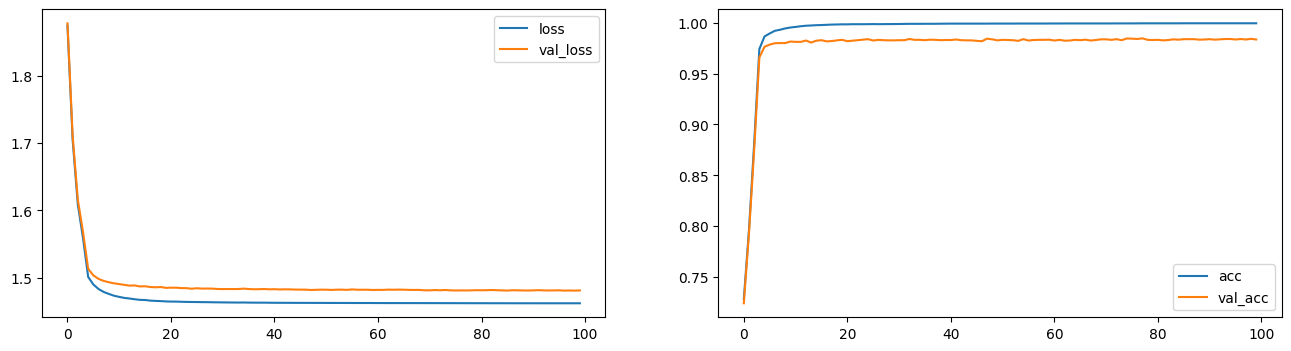

In [20]:
vis_history(acc_train_all_r30000, loss_train_all_r30000, acc_test_all_r30000, loss_test_all_r30000)

# Сигмоида + нормировка

In [22]:
n_epochs = 200
batch_size = 100
learning_rate = 0.05

X_mn_train = torch.from_numpy(np.array(X_mn_train))
X_mn_test = torch.from_numpy(np.array(X_mn_test))
X_mn_train = X_mn_train.flatten(start_dim=1).float()
X_mn_test = X_mn_test.flatten(start_dim=1).float()
y_mn_train = torch.from_numpy(np.array(y_mn_train))
y_mn_test = torch.from_numpy(np.array(y_mn_test))
print(X_mn_train.size())
print(X_mn_train.size())
D_in = np.array(X_mn_train).shape[1]
print(D_in)
D_out = 10
loss_fn = torch.nn.CrossEntropyLoss()
model_sn = Model_n(D_in,200,20,D_out)
acc_train_all_s30000n, loss_train_all_s30000n, acc_test_all_s30000n, loss_test_all_s30000n = model_sn.train(model_sn,n_epochs, batch_size, learning_rate, X_mn_train, y_mn_train, X_mn_test, y_mn_test)

torch.Size([24000, 720])
torch.Size([24000, 720])
720


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 494.56it/s]


Epoch 0: 
 Accuracy - train: 0.21291666666666667 | test: 0.21816666666666668 
 Loss - train: 2.267176628112793 | test: 2.266770124435425


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 431.39it/s]


Epoch 1: 
 Accuracy - train: 0.203 | test: 0.20633333333333334 
 Loss - train: 2.2533953189849854 | test: 2.2527835369110107


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 409.14it/s]


Epoch 2: 
 Accuracy - train: 0.21708333333333332 | test: 0.22233333333333333 
 Loss - train: 2.238551378250122 | test: 2.237788200378418


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 414.18it/s]


Epoch 3: 
 Accuracy - train: 0.28670833333333334 | test: 0.296 
 Loss - train: 2.2224764823913574 | test: 2.2217459678649902


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 414.66it/s]


Epoch 4: 
 Accuracy - train: 0.417 | test: 0.426 
 Loss - train: 2.2024056911468506 | test: 2.201890230178833


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 404.84it/s]


Epoch 5: 
 Accuracy - train: 0.4487083333333333 | test: 0.45166666666666666 
 Loss - train: 2.1738436222076416 | test: 2.1738226413726807


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 411.83it/s]


Epoch 6: 
 Accuracy - train: 0.47429166666666667 | test: 0.47383333333333333 
 Loss - train: 2.1395070552825928 | test: 2.140141487121582


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 410.31it/s]


Epoch 7: 
 Accuracy - train: 0.49233333333333335 | test: 0.49216666666666664 
 Loss - train: 2.1018970012664795 | test: 2.1030778884887695


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 407.30it/s]


Epoch 8: 
 Accuracy - train: 0.5008333333333334 | test: 0.4985 
 Loss - train: 2.062069892883301 | test: 2.063952684402466


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 417.96it/s]


Epoch 9: 
 Accuracy - train: 0.5044166666666666 | test: 0.503 
 Loss - train: 2.026862859725952 | test: 2.029038429260254


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 420.32it/s]


Epoch 10: 
 Accuracy - train: 0.5060833333333333 | test: 0.5041666666666667 
 Loss - train: 1.9992603063583374 | test: 2.001890182495117


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 447.83it/s]


Epoch 11: 
 Accuracy - train: 0.5175416666666667 | test: 0.5136666666666667 
 Loss - train: 1.9768239259719849 | test: 1.9799649715423584


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 428.45it/s]


Epoch 12: 
 Accuracy - train: 0.5745 | test: 0.5706666666666667 
 Loss - train: 1.9559119939804077 | test: 1.959348201751709


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 420.35it/s]


Epoch 13: 
 Accuracy - train: 0.60175 | test: 0.5953333333333334 
 Loss - train: 1.9322998523712158 | test: 1.936673641204834


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 407.87it/s]


Epoch 14: 
 Accuracy - train: 0.6062083333333333 | test: 0.6006666666666667 
 Loss - train: 1.9061216115951538 | test: 1.9115408658981323


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 425.20it/s]


Epoch 15: 
 Accuracy - train: 0.6095 | test: 0.6046666666666667 
 Loss - train: 1.8835468292236328 | test: 1.8894531726837158


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 406.43it/s]


Epoch 16: 
 Accuracy - train: 0.661625 | test: 0.6518333333333334 
 Loss - train: 1.8629621267318726 | test: 1.8697936534881592


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 417.46it/s]


Epoch 17: 
 Accuracy - train: 0.7389166666666667 | test: 0.7266666666666667 
 Loss - train: 1.8395122289657593 | test: 1.847225546836853


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 414.29it/s]


Epoch 18: 
 Accuracy - train: 0.7705 | test: 0.759 
 Loss - train: 1.8122354745864868 | test: 1.8205463886260986


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 403.71it/s]


Epoch 19: 
 Accuracy - train: 0.7845416666666667 | test: 0.7741666666666667 
 Loss - train: 1.7851165533065796 | test: 1.7949846982955933


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 414.90it/s]


Epoch 20: 
 Accuracy - train: 0.7899166666666667 | test: 0.779 
 Loss - train: 1.7618166208267212 | test: 1.7725690603256226


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 439.75it/s]


Epoch 21: 
 Accuracy - train: 0.8024583333333334 | test: 0.7925 
 Loss - train: 1.7427542209625244 | test: 1.7534562349319458


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 405.10it/s]


Epoch 22: 
 Accuracy - train: 0.8354166666666667 | test: 0.8241666666666667 
 Loss - train: 1.7228189706802368 | test: 1.73481023311615


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 397.36it/s]


Epoch 23: 
 Accuracy - train: 0.8994583333333334 | test: 0.8868333333333334 
 Loss - train: 1.7033164501190186 | test: 1.7154905796051025


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 402.91it/s]


Epoch 24: 
 Accuracy - train: 0.943625 | test: 0.9353333333333333 
 Loss - train: 1.6766445636749268 | test: 1.6894168853759766


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 402.04it/s]


Epoch 25: 
 Accuracy - train: 0.9620416666666667 | test: 0.9476666666666667 
 Loss - train: 1.6521427631378174 | test: 1.664785623550415


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 417.42it/s]


Epoch 26: 
 Accuracy - train: 0.9714583333333333 | test: 0.9615 
 Loss - train: 1.6310678720474243 | test: 1.6448992490768433


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 418.53it/s]


Epoch 27: 
 Accuracy - train: 0.9766666666666667 | test: 0.9688333333333333 
 Loss - train: 1.6120315790176392 | test: 1.6252329349517822


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 430.49it/s]


Epoch 28: 
 Accuracy - train: 0.9805 | test: 0.9676666666666667 
 Loss - train: 1.5966105461120605 | test: 1.6105996370315552


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 432.30it/s]


Epoch 29: 
 Accuracy - train: 0.9822916666666667 | test: 0.9716666666666667 
 Loss - train: 1.579091191291809 | test: 1.5937585830688477


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 425.91it/s]


Epoch 30: 
 Accuracy - train: 0.983 | test: 0.973 
 Loss - train: 1.568170189857483 | test: 1.5830060243606567


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 413.16it/s]


Epoch 31: 
 Accuracy - train: 0.98575 | test: 0.9726666666666667 
 Loss - train: 1.5575772523880005 | test: 1.5731853246688843


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 406.90it/s]


Epoch 32: 
 Accuracy - train: 0.9856666666666667 | test: 0.9735 
 Loss - train: 1.5494844913482666 | test: 1.565699815750122


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 402.34it/s]


Epoch 33: 
 Accuracy - train: 0.9879583333333334 | test: 0.976 
 Loss - train: 1.5408761501312256 | test: 1.556280255317688


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 420.06it/s]


Epoch 34: 
 Accuracy - train: 0.9889583333333334 | test: 0.9748333333333333 
 Loss - train: 1.5331287384033203 | test: 1.5495853424072266


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 426.55it/s]


Epoch 35: 
 Accuracy - train: 0.9891666666666666 | test: 0.9756666666666667 
 Loss - train: 1.5292836427688599 | test: 1.5474647283554077


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 423.38it/s]


Epoch 36: 
 Accuracy - train: 0.9904583333333333 | test: 0.9775 
 Loss - train: 1.5220376253128052 | test: 1.5395022630691528


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 422.94it/s]


Epoch 37: 
 Accuracy - train: 0.9909583333333334 | test: 0.9758333333333333 
 Loss - train: 1.5181427001953125 | test: 1.535876750946045


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 418.45it/s]


Epoch 38: 
 Accuracy - train: 0.992125 | test: 0.9778333333333333 
 Loss - train: 1.5147641897201538 | test: 1.5332797765731812


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 417.18it/s]


Epoch 39: 
 Accuracy - train: 0.9922916666666667 | test: 0.978 
 Loss - train: 1.511126160621643 | test: 1.5298527479171753


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 429.24it/s]


Epoch 40: 
 Accuracy - train: 0.992875 | test: 0.9776666666666667 
 Loss - train: 1.5076560974121094 | test: 1.5265387296676636


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 425.89it/s]


Epoch 41: 
 Accuracy - train: 0.992875 | test: 0.9766666666666667 
 Loss - train: 1.5065743923187256 | test: 1.525430679321289


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 426.75it/s]


Epoch 42: 
 Accuracy - train: 0.993125 | test: 0.977 
 Loss - train: 1.5034898519515991 | test: 1.5224944353103638


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 409.47it/s]


Epoch 43: 
 Accuracy - train: 0.9937083333333333 | test: 0.9758333333333333 
 Loss - train: 1.5032352209091187 | test: 1.5228163003921509


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 419.43it/s]


Epoch 44: 
 Accuracy - train: 0.9944583333333333 | test: 0.9793333333333333 
 Loss - train: 1.4980639219284058 | test: 1.5180895328521729


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 416.30it/s]


Epoch 45: 
 Accuracy - train: 0.9947083333333333 | test: 0.979 
 Loss - train: 1.4968496561050415 | test: 1.5168297290802002


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 427.00it/s]


Epoch 46: 
 Accuracy - train: 0.994375 | test: 0.9785 
 Loss - train: 1.4962810277938843 | test: 1.5167683362960815


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 407.60it/s]


Epoch 47: 
 Accuracy - train: 0.994875 | test: 0.9786666666666667 
 Loss - train: 1.4938366413116455 | test: 1.514345645904541


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 415.73it/s]


Epoch 48: 
 Accuracy - train: 0.9951666666666666 | test: 0.9786666666666667 
 Loss - train: 1.4915357828140259 | test: 1.5125423669815063


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 425.37it/s]


Epoch 49: 
 Accuracy - train: 0.9956666666666667 | test: 0.9776666666666667 
 Loss - train: 1.4905714988708496 | test: 1.5119678974151611


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 405.13it/s]


Epoch 50: 
 Accuracy - train: 0.9962083333333334 | test: 0.9798333333333333 
 Loss - train: 1.4892040491104126 | test: 1.5099058151245117


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 421.60it/s]


Epoch 51: 
 Accuracy - train: 0.9960416666666667 | test: 0.9791666666666666 
 Loss - train: 1.487982153892517 | test: 1.5089446306228638


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 422.90it/s]


Epoch 52: 
 Accuracy - train: 0.996125 | test: 0.978 
 Loss - train: 1.486639142036438 | test: 1.507743000984192


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 438.26it/s]


Epoch 53: 
 Accuracy - train: 0.996375 | test: 0.9793333333333333 
 Loss - train: 1.4852491617202759 | test: 1.5063531398773193


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 419.73it/s]


Epoch 54: 
 Accuracy - train: 0.9962083333333334 | test: 0.9786666666666667 
 Loss - train: 1.4863812923431396 | test: 1.5075042247772217


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 412.85it/s]


Epoch 55: 
 Accuracy - train: 0.9967083333333333 | test: 0.9808333333333333 
 Loss - train: 1.4842251539230347 | test: 1.5060968399047852


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 419.87it/s]


Epoch 56: 
 Accuracy - train: 0.9966666666666667 | test: 0.979 
 Loss - train: 1.4822429418563843 | test: 1.5041378736495972


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 414.17it/s]


Epoch 57: 
 Accuracy - train: 0.9969166666666667 | test: 0.9793333333333333 
 Loss - train: 1.4819296598434448 | test: 1.5036697387695312


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 419.79it/s]


Epoch 58: 
 Accuracy - train: 0.997125 | test: 0.9781666666666666 
 Loss - train: 1.4819211959838867 | test: 1.5048431158065796


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 417.43it/s]


Epoch 59: 
 Accuracy - train: 0.9972083333333334 | test: 0.9803333333333333 
 Loss - train: 1.4799714088439941 | test: 1.501615285873413


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 405.73it/s]


Epoch 60: 
 Accuracy - train: 0.9970416666666667 | test: 0.9791666666666666 
 Loss - train: 1.4807548522949219 | test: 1.5029257535934448


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 413.48it/s]


Epoch 61: 
 Accuracy - train: 0.9965 | test: 0.9806666666666667 
 Loss - train: 1.481754183769226 | test: 1.5029643774032593


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 402.89it/s]


Epoch 62: 
 Accuracy - train: 0.9975833333333334 | test: 0.9791666666666666 
 Loss - train: 1.4793407917022705 | test: 1.5017447471618652


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 416.64it/s]


Epoch 63: 
 Accuracy - train: 0.9977083333333333 | test: 0.9803333333333333 
 Loss - train: 1.4777244329452515 | test: 1.5003635883331299


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 412.43it/s]


Epoch 64: 
 Accuracy - train: 0.997875 | test: 0.9796666666666667 
 Loss - train: 1.4769549369812012 | test: 1.4993741512298584


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 417.29it/s]


Epoch 65: 
 Accuracy - train: 0.9978333333333333 | test: 0.9795 
 Loss - train: 1.4770783185958862 | test: 1.5001723766326904


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 417.53it/s]


Epoch 66: 
 Accuracy - train: 0.998 | test: 0.9798333333333333 
 Loss - train: 1.476087212562561 | test: 1.4984521865844727


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 402.76it/s]


Epoch 67: 
 Accuracy - train: 0.998 | test: 0.9806666666666667 
 Loss - train: 1.476090669631958 | test: 1.4992164373397827


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 417.39it/s]


Epoch 68: 
 Accuracy - train: 0.9982083333333334 | test: 0.981 
 Loss - train: 1.4754067659378052 | test: 1.498052716255188


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 415.24it/s]


Epoch 69: 
 Accuracy - train: 0.9981666666666666 | test: 0.9795 
 Loss - train: 1.4753248691558838 | test: 1.4988162517547607


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 399.37it/s]


Epoch 70: 
 Accuracy - train: 0.9982083333333334 | test: 0.9816666666666667 
 Loss - train: 1.474505066871643 | test: 1.4965609312057495


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 462.95it/s]


Epoch 71: 
 Accuracy - train: 0.99825 | test: 0.9798333333333333 
 Loss - train: 1.4743019342422485 | test: 1.4976654052734375


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 448.40it/s]


Epoch 72: 
 Accuracy - train: 0.9982083333333334 | test: 0.9811666666666666 
 Loss - train: 1.4737108945846558 | test: 1.4960514307022095


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 415.48it/s]


Epoch 73: 
 Accuracy - train: 0.9985 | test: 0.9806666666666667 
 Loss - train: 1.47328519821167 | test: 1.4962794780731201


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 422.97it/s]


Epoch 74: 
 Accuracy - train: 0.9984166666666666 | test: 0.9796666666666667 
 Loss - train: 1.4740304946899414 | test: 1.4978829622268677


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 422.02it/s]


Epoch 75: 
 Accuracy - train: 0.9985 | test: 0.9805 
 Loss - train: 1.4733718633651733 | test: 1.4970035552978516


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 396.49it/s]


Epoch 76: 
 Accuracy - train: 0.9983333333333333 | test: 0.9793333333333333 
 Loss - train: 1.4730600118637085 | test: 1.4968159198760986


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 410.38it/s]


Epoch 77: 
 Accuracy - train: 0.9984583333333333 | test: 0.9795 
 Loss - train: 1.473356008529663 | test: 1.4976881742477417


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 427.66it/s]


Epoch 78: 
 Accuracy - train: 0.9982916666666667 | test: 0.9806666666666667 
 Loss - train: 1.4735558032989502 | test: 1.4964563846588135


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 409.48it/s]


Epoch 79: 
 Accuracy - train: 0.9985833333333334 | test: 0.9801666666666666 
 Loss - train: 1.4722070693969727 | test: 1.4954732656478882


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 421.79it/s]


Epoch 80: 
 Accuracy - train: 0.9986666666666667 | test: 0.9811666666666666 
 Loss - train: 1.4716368913650513 | test: 1.4952890872955322


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 421.25it/s]


Epoch 81: 
 Accuracy - train: 0.9986666666666667 | test: 0.9803333333333333 
 Loss - train: 1.471686840057373 | test: 1.4952701330184937


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 426.93it/s]


Epoch 82: 
 Accuracy - train: 0.99875 | test: 0.9813333333333333 
 Loss - train: 1.4716243743896484 | test: 1.494307279586792


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 428.53it/s]


Epoch 83: 
 Accuracy - train: 0.9987083333333333 | test: 0.9813333333333333 
 Loss - train: 1.4710043668746948 | test: 1.4941110610961914


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 427.13it/s]


Epoch 84: 
 Accuracy - train: 0.9988333333333334 | test: 0.9796666666666667 
 Loss - train: 1.4707248210906982 | test: 1.4946074485778809


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 427.26it/s]


Epoch 85: 
 Accuracy - train: 0.9987916666666666 | test: 0.9808333333333333 
 Loss - train: 1.4704619646072388 | test: 1.4934813976287842


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 428.48it/s]


Epoch 86: 
 Accuracy - train: 0.998875 | test: 0.9815 
 Loss - train: 1.4702963829040527 | test: 1.4937525987625122


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 419.21it/s]


Epoch 87: 
 Accuracy - train: 0.998875 | test: 0.9806666666666667 
 Loss - train: 1.4699764251708984 | test: 1.493587613105774


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 423.22it/s]


Epoch 88: 
 Accuracy - train: 0.9989166666666667 | test: 0.982 
 Loss - train: 1.4701216220855713 | test: 1.4928556680679321


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 418.12it/s]


Epoch 89: 
 Accuracy - train: 0.9989583333333333 | test: 0.9805 
 Loss - train: 1.4695138931274414 | test: 1.4927185773849487


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 403.37it/s]


Epoch 90: 
 Accuracy - train: 0.9989166666666667 | test: 0.9803333333333333 
 Loss - train: 1.4698442220687866 | test: 1.4931052923202515


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 410.62it/s]


Epoch 91: 
 Accuracy - train: 0.998875 | test: 0.982 
 Loss - train: 1.4692254066467285 | test: 1.4922047853469849


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 441.08it/s]


Epoch 92: 
 Accuracy - train: 0.9989583333333333 | test: 0.9805 
 Loss - train: 1.4692012071609497 | test: 1.4919308423995972


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 399.19it/s]


Epoch 93: 
 Accuracy - train: 0.9989583333333333 | test: 0.9798333333333333 
 Loss - train: 1.4693366289138794 | test: 1.4932572841644287


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 406.96it/s]


Epoch 94: 
 Accuracy - train: 0.9989583333333333 | test: 0.9805 
 Loss - train: 1.4686992168426514 | test: 1.4919589757919312


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 410.92it/s]


Epoch 95: 
 Accuracy - train: 0.9989583333333333 | test: 0.9825 
 Loss - train: 1.4686048030853271 | test: 1.4912060499191284


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 405.05it/s]


Epoch 96: 
 Accuracy - train: 0.999 | test: 0.9816666666666667 
 Loss - train: 1.4685062170028687 | test: 1.491148591041565


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 412.38it/s]


Epoch 97: 
 Accuracy - train: 0.999 | test: 0.9806666666666667 
 Loss - train: 1.4684114456176758 | test: 1.491681456565857


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 395.91it/s]


Epoch 98: 
 Accuracy - train: 0.9990416666666667 | test: 0.9816666666666667 
 Loss - train: 1.4682121276855469 | test: 1.4908604621887207


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 437.58it/s]


Epoch 99: 
 Accuracy - train: 0.9990416666666667 | test: 0.9813333333333333 
 Loss - train: 1.4682652950286865 | test: 1.491197109222412


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 413.90it/s]


Epoch 100: 
 Accuracy - train: 0.9990416666666667 | test: 0.9811666666666666 
 Loss - train: 1.4679731130599976 | test: 1.4906392097473145


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 410.09it/s]


Epoch 101: 
 Accuracy - train: 0.9990833333333333 | test: 0.98 
 Loss - train: 1.467963695526123 | test: 1.4914536476135254


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 404.26it/s]


Epoch 102: 
 Accuracy - train: 0.9990833333333333 | test: 0.9815 
 Loss - train: 1.4679009914398193 | test: 1.4904006719589233


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 400.81it/s]


Epoch 103: 
 Accuracy - train: 0.999125 | test: 0.9806666666666667 
 Loss - train: 1.4677386283874512 | test: 1.4907146692276


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 412.46it/s]


Epoch 104: 
 Accuracy - train: 0.999125 | test: 0.9811666666666666 
 Loss - train: 1.4675778150558472 | test: 1.4901541471481323


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 410.04it/s]


Epoch 105: 
 Accuracy - train: 0.999125 | test: 0.9803333333333333 
 Loss - train: 1.4676612615585327 | test: 1.4907623529434204


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 419.80it/s]


Epoch 106: 
 Accuracy - train: 0.999125 | test: 0.9813333333333333 
 Loss - train: 1.4676871299743652 | test: 1.4907974004745483


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 422.80it/s]


Epoch 107: 
 Accuracy - train: 0.9991666666666666 | test: 0.982 
 Loss - train: 1.4674440622329712 | test: 1.490250825881958


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 420.25it/s]


Epoch 108: 
 Accuracy - train: 0.999125 | test: 0.9813333333333333 
 Loss - train: 1.467266321182251 | test: 1.4899808168411255


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 412.82it/s]


Epoch 109: 
 Accuracy - train: 0.999125 | test: 0.9805 
 Loss - train: 1.4672077894210815 | test: 1.4902242422103882


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 400.80it/s]


Epoch 110: 
 Accuracy - train: 0.999125 | test: 0.9816666666666667 
 Loss - train: 1.46709144115448 | test: 1.4897444248199463


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 400.07it/s]


Epoch 111: 
 Accuracy - train: 0.999125 | test: 0.9805 
 Loss - train: 1.4678966999053955 | test: 1.491268277168274


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 418.66it/s]


Epoch 112: 
 Accuracy - train: 0.9991666666666666 | test: 0.983 
 Loss - train: 1.4668828248977661 | test: 1.48903226852417


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 412.45it/s]


Epoch 113: 
 Accuracy - train: 0.9991666666666666 | test: 0.9825 
 Loss - train: 1.4671756029129028 | test: 1.4896183013916016


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 418.24it/s]


Epoch 114: 
 Accuracy - train: 0.999125 | test: 0.9821666666666666 
 Loss - train: 1.4668811559677124 | test: 1.4895402193069458


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 406.67it/s]


Epoch 115: 
 Accuracy - train: 0.9991666666666666 | test: 0.983 
 Loss - train: 1.4666082859039307 | test: 1.4889028072357178


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 396.56it/s]


Epoch 116: 
 Accuracy - train: 0.9991666666666666 | test: 0.98 
 Loss - train: 1.4667447805404663 | test: 1.489321231842041


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 407.07it/s]


Epoch 117: 
 Accuracy - train: 0.9992083333333334 | test: 0.9805 
 Loss - train: 1.4666199684143066 | test: 1.4891629219055176


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 415.39it/s]


Epoch 118: 
 Accuracy - train: 0.99925 | test: 0.9808333333333333 
 Loss - train: 1.4665720462799072 | test: 1.4893229007720947


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 416.96it/s]


Epoch 119: 
 Accuracy - train: 0.99925 | test: 0.9813333333333333 
 Loss - train: 1.4664560556411743 | test: 1.4890823364257812


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 391.91it/s]


Epoch 120: 
 Accuracy - train: 0.99925 | test: 0.9818333333333333 
 Loss - train: 1.466502070426941 | test: 1.488582730293274


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 405.19it/s]


Epoch 121: 
 Accuracy - train: 0.99925 | test: 0.9828333333333333 
 Loss - train: 1.4663225412368774 | test: 1.4884909391403198


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 395.05it/s]


Epoch 122: 
 Accuracy - train: 0.9992083333333334 | test: 0.981 
 Loss - train: 1.4662587642669678 | test: 1.4886715412139893


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 416.37it/s]


Epoch 123: 
 Accuracy - train: 0.99925 | test: 0.981 
 Loss - train: 1.4664123058319092 | test: 1.4891027212142944


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 417.19it/s]


Epoch 124: 
 Accuracy - train: 0.99925 | test: 0.9813333333333333 
 Loss - train: 1.4661338329315186 | test: 1.4885432720184326


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 434.17it/s]


Epoch 125: 
 Accuracy - train: 0.99925 | test: 0.9826666666666667 
 Loss - train: 1.4660329818725586 | test: 1.4878469705581665


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 417.65it/s]


Epoch 126: 
 Accuracy - train: 0.99925 | test: 0.9816666666666667 
 Loss - train: 1.4660003185272217 | test: 1.488485336303711


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 420.42it/s]


Epoch 127: 
 Accuracy - train: 0.99925 | test: 0.9811666666666666 
 Loss - train: 1.4659861326217651 | test: 1.4883570671081543


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 407.51it/s]


Epoch 128: 
 Accuracy - train: 0.99925 | test: 0.9816666666666667 
 Loss - train: 1.4658845663070679 | test: 1.4880928993225098


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 418.70it/s]


Epoch 129: 
 Accuracy - train: 0.99925 | test: 0.9823333333333333 
 Loss - train: 1.4658206701278687 | test: 1.4877690076828003


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 427.47it/s]


Epoch 130: 
 Accuracy - train: 0.99925 | test: 0.9818333333333333 
 Loss - train: 1.4657464027404785 | test: 1.4877742528915405


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 427.07it/s]


Epoch 131: 
 Accuracy - train: 0.99925 | test: 0.98 
 Loss - train: 1.4660216569900513 | test: 1.4888355731964111


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 429.70it/s]


Epoch 132: 
 Accuracy - train: 0.99925 | test: 0.9816666666666667 
 Loss - train: 1.4657506942749023 | test: 1.4881174564361572


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 433.35it/s]


Epoch 133: 
 Accuracy - train: 0.99925 | test: 0.9826666666666667 
 Loss - train: 1.4656288623809814 | test: 1.487300992012024


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 416.98it/s]


Epoch 134: 
 Accuracy - train: 0.9992916666666667 | test: 0.982 
 Loss - train: 1.4656484127044678 | test: 1.4876611232757568


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 405.69it/s]


Epoch 135: 
 Accuracy - train: 0.9992916666666667 | test: 0.9821666666666666 
 Loss - train: 1.465709924697876 | test: 1.4880307912826538


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 411.73it/s]


Epoch 136: 
 Accuracy - train: 0.9993333333333333 | test: 0.9811666666666666 
 Loss - train: 1.465640664100647 | test: 1.488343596458435


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 414.38it/s]


Epoch 137: 
 Accuracy - train: 0.9993333333333333 | test: 0.9813333333333333 
 Loss - train: 1.4655139446258545 | test: 1.4880329370498657


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 411.70it/s]


Epoch 138: 
 Accuracy - train: 0.9993333333333333 | test: 0.9828333333333333 
 Loss - train: 1.4654669761657715 | test: 1.487267255783081


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 421.48it/s]


Epoch 139: 
 Accuracy - train: 0.9993333333333333 | test: 0.9813333333333333 
 Loss - train: 1.4653899669647217 | test: 1.4872900247573853


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 424.05it/s]


Epoch 140: 
 Accuracy - train: 0.9993333333333333 | test: 0.9825 
 Loss - train: 1.4654265642166138 | test: 1.4874752759933472


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 416.51it/s]


Epoch 141: 
 Accuracy - train: 0.9993333333333333 | test: 0.9821666666666666 
 Loss - train: 1.4654836654663086 | test: 1.4877173900604248


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 420.64it/s]


Epoch 142: 
 Accuracy - train: 0.9993333333333333 | test: 0.9821666666666666 
 Loss - train: 1.4654178619384766 | test: 1.4877879619598389


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 419.29it/s]


Epoch 143: 
 Accuracy - train: 0.9994166666666666 | test: 0.982 
 Loss - train: 1.465232253074646 | test: 1.4875261783599854


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 416.58it/s]


Epoch 144: 
 Accuracy - train: 0.999375 | test: 0.982 
 Loss - train: 1.4651641845703125 | test: 1.4872726202011108


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 423.35it/s]


Epoch 145: 
 Accuracy - train: 0.999375 | test: 0.9811666666666666 
 Loss - train: 1.465213656425476 | test: 1.4873584508895874


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 425.20it/s]


Epoch 146: 
 Accuracy - train: 0.9994166666666666 | test: 0.9825 
 Loss - train: 1.4651039838790894 | test: 1.4869211912155151


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 417.39it/s]


Epoch 147: 
 Accuracy - train: 0.9994166666666666 | test: 0.9816666666666667 
 Loss - train: 1.4650636911392212 | test: 1.4870768785476685


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 409.58it/s]


Epoch 148: 
 Accuracy - train: 0.9994166666666666 | test: 0.9825 
 Loss - train: 1.465059518814087 | test: 1.4871406555175781


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 411.85it/s]


Epoch 149: 
 Accuracy - train: 0.9994166666666666 | test: 0.982 
 Loss - train: 1.4651182889938354 | test: 1.487346887588501


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 428.67it/s]


Epoch 150: 
 Accuracy - train: 0.9994166666666666 | test: 0.9826666666666667 
 Loss - train: 1.4649661779403687 | test: 1.486881971359253


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 423.17it/s]


Epoch 151: 
 Accuracy - train: 0.9994583333333333 | test: 0.9816666666666667 
 Loss - train: 1.4650366306304932 | test: 1.4876623153686523


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 420.32it/s]


Epoch 152: 
 Accuracy - train: 0.9994166666666666 | test: 0.9813333333333333 
 Loss - train: 1.4649149179458618 | test: 1.486761212348938


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 402.78it/s]


Epoch 153: 
 Accuracy - train: 0.9994583333333333 | test: 0.9816666666666667 
 Loss - train: 1.4648323059082031 | test: 1.486558437347412


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 420.13it/s]


Epoch 154: 
 Accuracy - train: 0.9994583333333333 | test: 0.9811666666666666 
 Loss - train: 1.4648197889328003 | test: 1.4866095781326294


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 413.35it/s]


Epoch 155: 
 Accuracy - train: 0.999375 | test: 0.9815 
 Loss - train: 1.4651362895965576 | test: 1.4878425598144531


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 409.54it/s]


Epoch 156: 
 Accuracy - train: 0.9994583333333333 | test: 0.9811666666666666 
 Loss - train: 1.464792013168335 | test: 1.4870418310165405


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 416.78it/s]


Epoch 157: 
 Accuracy - train: 0.9994583333333333 | test: 0.9818333333333333 
 Loss - train: 1.464746117591858 | test: 1.4869277477264404


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 419.20it/s]


Epoch 158: 
 Accuracy - train: 0.9994583333333333 | test: 0.9816666666666667 
 Loss - train: 1.4646673202514648 | test: 1.486621618270874


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 415.16it/s]


Epoch 159: 
 Accuracy - train: 0.9994583333333333 | test: 0.9828333333333333 
 Loss - train: 1.4646389484405518 | test: 1.4861056804656982


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 417.61it/s]


Epoch 160: 
 Accuracy - train: 0.9994583333333333 | test: 0.981 
 Loss - train: 1.4646515846252441 | test: 1.4866288900375366


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 420.17it/s]


Epoch 161: 
 Accuracy - train: 0.9994583333333333 | test: 0.9821666666666666 
 Loss - train: 1.4646246433258057 | test: 1.4865366220474243


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 423.87it/s]


Epoch 162: 
 Accuracy - train: 0.9994583333333333 | test: 0.9811666666666666 
 Loss - train: 1.4646236896514893 | test: 1.486594557762146


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 417.23it/s]


Epoch 163: 
 Accuracy - train: 0.9994583333333333 | test: 0.9818333333333333 
 Loss - train: 1.464552402496338 | test: 1.4864991903305054


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 419.13it/s]


Epoch 164: 
 Accuracy - train: 0.9994583333333333 | test: 0.9828333333333333 
 Loss - train: 1.4645304679870605 | test: 1.4861102104187012


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 406.26it/s]


Epoch 165: 
 Accuracy - train: 0.9994583333333333 | test: 0.9823333333333333 
 Loss - train: 1.4645626544952393 | test: 1.4860981702804565


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 412.21it/s]


Epoch 166: 
 Accuracy - train: 0.9994583333333333 | test: 0.9828333333333333 
 Loss - train: 1.464480996131897 | test: 1.486106276512146


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 421.58it/s]


Epoch 167: 
 Accuracy - train: 0.9994583333333333 | test: 0.9811666666666666 
 Loss - train: 1.464453935623169 | test: 1.4861422777175903


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 423.49it/s]


Epoch 168: 
 Accuracy - train: 0.9994583333333333 | test: 0.9821666666666666 
 Loss - train: 1.464448094367981 | test: 1.4860363006591797


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 417.59it/s]


Epoch 169: 
 Accuracy - train: 0.9994583333333333 | test: 0.9815 
 Loss - train: 1.4645146131515503 | test: 1.486268401145935


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 412.95it/s]


Epoch 170: 
 Accuracy - train: 0.9994583333333333 | test: 0.982 
 Loss - train: 1.4644455909729004 | test: 1.4862287044525146


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 413.06it/s]


Epoch 171: 
 Accuracy - train: 0.9994583333333333 | test: 0.9826666666666667 
 Loss - train: 1.4643514156341553 | test: 1.485471487045288


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 414.11it/s]


Epoch 172: 
 Accuracy - train: 0.9994583333333333 | test: 0.9821666666666666 
 Loss - train: 1.4643335342407227 | test: 1.4856700897216797


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 418.73it/s]


Epoch 173: 
 Accuracy - train: 0.9994583333333333 | test: 0.9826666666666667 
 Loss - train: 1.4643393754959106 | test: 1.485768437385559


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 413.25it/s]


Epoch 174: 
 Accuracy - train: 0.9995 | test: 0.9811666666666666 
 Loss - train: 1.4643220901489258 | test: 1.4862616062164307


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 401.48it/s]


Epoch 175: 
 Accuracy - train: 0.9995 | test: 0.9811666666666666 
 Loss - train: 1.4644150733947754 | test: 1.4860621690750122


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 407.35it/s]


Epoch 176: 
 Accuracy - train: 0.9995 | test: 0.9813333333333333 
 Loss - train: 1.4642690420150757 | test: 1.485697627067566


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 427.50it/s]


Epoch 177: 
 Accuracy - train: 0.9995 | test: 0.9826666666666667 
 Loss - train: 1.4642497301101685 | test: 1.4855098724365234


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 420.41it/s]


Epoch 178: 
 Accuracy - train: 0.9995 | test: 0.982 
 Loss - train: 1.4642115831375122 | test: 1.4859896898269653


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 418.03it/s]


Epoch 179: 
 Accuracy - train: 0.9995 | test: 0.9826666666666667 
 Loss - train: 1.4641996622085571 | test: 1.485331654548645


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 416.54it/s]


Epoch 180: 
 Accuracy - train: 0.9995 | test: 0.982 
 Loss - train: 1.4641762971878052 | test: 1.4854096174240112


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 384.83it/s]


Epoch 181: 
 Accuracy - train: 0.9995 | test: 0.9825 
 Loss - train: 1.4641354084014893 | test: 1.4852598905563354


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 421.15it/s]


Epoch 182: 
 Accuracy - train: 0.9995416666666667 | test: 0.9825 
 Loss - train: 1.4641367197036743 | test: 1.4854220151901245


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 469.13it/s]


Epoch 183: 
 Accuracy - train: 0.9995416666666667 | test: 0.9823333333333333 
 Loss - train: 1.4641063213348389 | test: 1.485372543334961


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 406.99it/s]


Epoch 184: 
 Accuracy - train: 0.9995416666666667 | test: 0.982 
 Loss - train: 1.4640569686889648 | test: 1.4856252670288086


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 406.85it/s]


Epoch 185: 
 Accuracy - train: 0.9995416666666667 | test: 0.9815 
 Loss - train: 1.4640761613845825 | test: 1.485520362854004


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 419.45it/s]


Epoch 186: 
 Accuracy - train: 0.9995416666666667 | test: 0.9813333333333333 
 Loss - train: 1.464046597480774 | test: 1.4855461120605469


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 408.72it/s]


Epoch 187: 
 Accuracy - train: 0.9995416666666667 | test: 0.9818333333333333 
 Loss - train: 1.4641189575195312 | test: 1.485599160194397


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 383.14it/s]


Epoch 188: 
 Accuracy - train: 0.9995416666666667 | test: 0.982 
 Loss - train: 1.4642544984817505 | test: 1.4857920408248901


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 406.85it/s]


Epoch 189: 
 Accuracy - train: 0.9995416666666667 | test: 0.9821666666666666 
 Loss - train: 1.4639686346054077 | test: 1.4852415323257446


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 438.13it/s]


Epoch 190: 
 Accuracy - train: 0.9995416666666667 | test: 0.9821666666666666 
 Loss - train: 1.4639660120010376 | test: 1.48564612865448


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 443.99it/s]


Epoch 191: 
 Accuracy - train: 0.9995416666666667 | test: 0.9816666666666667 
 Loss - train: 1.4639360904693604 | test: 1.4856826066970825


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 455.19it/s]


Epoch 192: 
 Accuracy - train: 0.9995416666666667 | test: 0.9821666666666666 
 Loss - train: 1.4639660120010376 | test: 1.4854379892349243


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 465.72it/s]


Epoch 193: 
 Accuracy - train: 0.9995416666666667 | test: 0.9825 
 Loss - train: 1.4639428853988647 | test: 1.4853116273880005


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 471.66it/s]


Epoch 194: 
 Accuracy - train: 0.9995416666666667 | test: 0.9825 
 Loss - train: 1.4639192819595337 | test: 1.4853287935256958


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 435.78it/s]


Epoch 195: 
 Accuracy - train: 0.9995416666666667 | test: 0.982 
 Loss - train: 1.463883638381958 | test: 1.4853270053863525


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 421.27it/s]


Epoch 196: 
 Accuracy - train: 0.9995416666666667 | test: 0.9823333333333333 
 Loss - train: 1.4638993740081787 | test: 1.4850937128067017


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 434.73it/s]


Epoch 197: 
 Accuracy - train: 0.9995416666666667 | test: 0.9828333333333333 
 Loss - train: 1.4638441801071167 | test: 1.4848839044570923


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 426.21it/s]


Epoch 198: 
 Accuracy - train: 0.9995416666666667 | test: 0.9815 
 Loss - train: 1.4638365507125854 | test: 1.4853631258010864


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 425.14it/s]


Epoch 199: 
 Accuracy - train: 0.9995416666666667 | test: 0.9816666666666667 
 Loss - train: 1.4638258218765259 | test: 1.4850335121154785


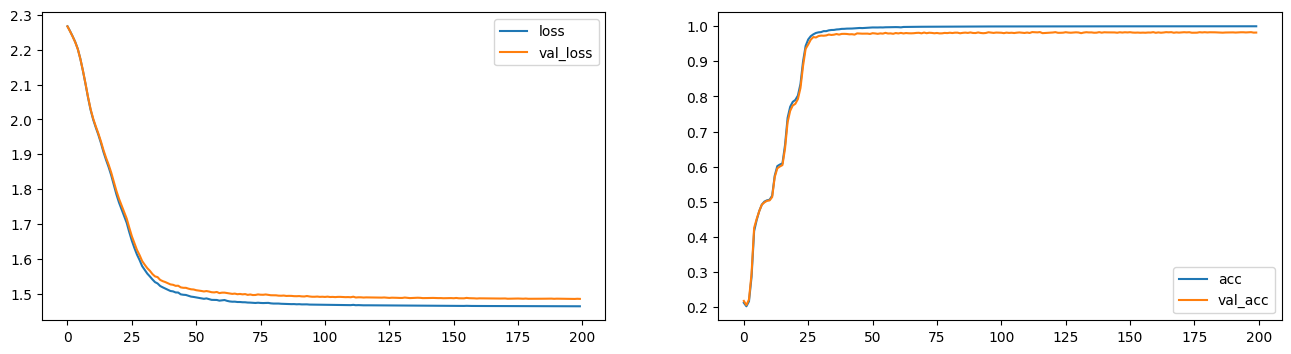

In [23]:
vis_history(acc_train_all_s30000n, loss_train_all_s30000n, acc_test_all_s30000n, loss_test_all_s30000n)

# ReLU без нормировки

In [24]:
n_epochs = 100
batch_size = 100
learning_rate = 0.05

X_mn_train = torch.from_numpy(np.array(X_mn_train))
X_mn_test = torch.from_numpy(np.array(X_mn_test))
X_mn_train = X_mn_train.flatten(start_dim=1).float()
X_mn_test = X_mn_test.flatten(start_dim=1).float()
y_mn_train = torch.from_numpy(np.array(y_mn_train))
y_mn_test = torch.from_numpy(np.array(y_mn_test))
print(X_mn_train.size())
D_in = np.array(X_mn_train).shape[1]
print(D_in)
D_out = 10
loss_fn = torch.nn.CrossEntropyLoss()
modelRLnn = Model_ReLu(D_in,200,20,D_out)
acc_train_all_r30000nn, loss_train_all_r30000nn, acc_test_all_r30000nn, loss_test_all_r30000nn = modelRLnn.train(modelRLnn,n_epochs, batch_size, learning_rate, X_mn_train, y_mn_train, X_mn_test, y_mn_test)

torch.Size([24000, 720])
720


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 651.35it/s]


Epoch 0: 
 Accuracy - train: 0.21129166666666666 | test: 0.20833333333333334 
 Loss - train: 2.300795555114746 | test: 2.3008174896240234


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 703.63it/s]


Epoch 1: 
 Accuracy - train: 0.265875 | test: 0.2605 
 Loss - train: 2.2979376316070557 | test: 2.297980308532715


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 661.94it/s]


Epoch 2: 
 Accuracy - train: 0.35208333333333336 | test: 0.35133333333333333 
 Loss - train: 2.2931132316589355 | test: 2.293199062347412


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 648.26it/s]


Epoch 3: 
 Accuracy - train: 0.43533333333333335 | test: 0.43283333333333335 
 Loss - train: 2.2831218242645264 | test: 2.2833242416381836


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 647.82it/s]


Epoch 4: 
 Accuracy - train: 0.331625 | test: 0.3248333333333333 
 Loss - train: 2.24808406829834 | test: 2.2489614486694336


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 688.64it/s]


Epoch 5: 
 Accuracy - train: 0.39875 | test: 0.3973333333333333 
 Loss - train: 2.101747512817383 | test: 2.1049070358276367


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 694.76it/s]


Epoch 6: 
 Accuracy - train: 0.46558333333333335 | test: 0.4615 
 Loss - train: 2.0023627281188965 | test: 2.0070347785949707


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 705.21it/s]


Epoch 7: 
 Accuracy - train: 0.62675 | test: 0.6178333333333333 
 Loss - train: 1.9086530208587646 | test: 1.9149620532989502


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 716.34it/s]


Epoch 8: 
 Accuracy - train: 0.7201666666666666 | test: 0.713 
 Loss - train: 1.7967615127563477 | test: 1.8026509284973145


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 737.00it/s]


Epoch 9: 
 Accuracy - train: 0.7473333333333333 | test: 0.74 
 Loss - train: 1.7456443309783936 | test: 1.7508184909820557


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 691.38it/s]


Epoch 10: 
 Accuracy - train: 0.80925 | test: 0.8013333333333333 
 Loss - train: 1.6941304206848145 | test: 1.6984608173370361


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 657.22it/s]


Epoch 11: 
 Accuracy - train: 0.82875 | test: 0.8185 
 Loss - train: 1.6600427627563477 | test: 1.6656267642974854


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 674.41it/s]


Epoch 12: 
 Accuracy - train: 0.8373333333333334 | test: 0.8283333333333334 
 Loss - train: 1.6432044506072998 | test: 1.649293303489685


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 731.65it/s]


Epoch 13: 
 Accuracy - train: 0.842875 | test: 0.8336666666666667 
 Loss - train: 1.632855772972107 | test: 1.6395803689956665


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 682.04it/s]


Epoch 14: 
 Accuracy - train: 0.8473333333333334 | test: 0.8398333333333333 
 Loss - train: 1.626186728477478 | test: 1.6329810619354248


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 677.18it/s]


Epoch 15: 
 Accuracy - train: 0.850625 | test: 0.8425 
 Loss - train: 1.6214185953140259 | test: 1.6284617185592651


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 702.27it/s]


Epoch 16: 
 Accuracy - train: 0.8539166666666667 | test: 0.8463333333333334 
 Loss - train: 1.6173843145370483 | test: 1.6243797540664673


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 710.01it/s]


Epoch 17: 
 Accuracy - train: 0.8555416666666666 | test: 0.8468333333333333 
 Loss - train: 1.6147112846374512 | test: 1.6213204860687256


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 696.72it/s]


Epoch 18: 
 Accuracy - train: 0.8582916666666667 | test: 0.8493333333333334 
 Loss - train: 1.6117660999298096 | test: 1.6191281080245972


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 663.17it/s]


Epoch 19: 
 Accuracy - train: 0.86075 | test: 0.8515 
 Loss - train: 1.608944296836853 | test: 1.616206169128418


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 622.73it/s]


Epoch 20: 
 Accuracy - train: 0.861875 | test: 0.8516666666666667 
 Loss - train: 1.60723078250885 | test: 1.6151211261749268


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 643.97it/s]


Epoch 21: 
 Accuracy - train: 0.86275 | test: 0.8551666666666666 
 Loss - train: 1.605365514755249 | test: 1.6126656532287598


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 664.63it/s]


Epoch 22: 
 Accuracy - train: 0.865125 | test: 0.8563333333333333 
 Loss - train: 1.6033596992492676 | test: 1.6107887029647827


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 657.23it/s]


Epoch 23: 
 Accuracy - train: 0.8660416666666667 | test: 0.8573333333333333 
 Loss - train: 1.6020280122756958 | test: 1.6095625162124634


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 680.58it/s]


Epoch 24: 
 Accuracy - train: 0.8665833333333334 | test: 0.8576666666666667 
 Loss - train: 1.6009005308151245 | test: 1.6085978746414185


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 649.46it/s]


Epoch 25: 
 Accuracy - train: 0.8680416666666667 | test: 0.8596666666666667 
 Loss - train: 1.5994853973388672 | test: 1.6071867942810059


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 676.11it/s]


Epoch 26: 
 Accuracy - train: 0.8684583333333333 | test: 0.8588333333333333 
 Loss - train: 1.5984208583831787 | test: 1.606386423110962


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 638.07it/s]


Epoch 27: 
 Accuracy - train: 0.8692916666666667 | test: 0.86 
 Loss - train: 1.5974522829055786 | test: 1.6056965589523315


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 642.15it/s]


Epoch 28: 
 Accuracy - train: 0.8694166666666666 | test: 0.8615 
 Loss - train: 1.5967159271240234 | test: 1.6046154499053955


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 619.80it/s]


Epoch 29: 
 Accuracy - train: 0.8700416666666667 | test: 0.8603333333333333 
 Loss - train: 1.5958274602890015 | test: 1.6043025255203247


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 673.55it/s]


Epoch 30: 
 Accuracy - train: 0.87125 | test: 0.862 
 Loss - train: 1.5949044227600098 | test: 1.6031975746154785


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 607.79it/s]


Epoch 31: 
 Accuracy - train: 0.8719166666666667 | test: 0.8635 
 Loss - train: 1.5941603183746338 | test: 1.6023684740066528


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 611.75it/s]


Epoch 32: 
 Accuracy - train: 0.872125 | test: 0.863 
 Loss - train: 1.5935683250427246 | test: 1.6019384860992432


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 623.90it/s]


Epoch 33: 
 Accuracy - train: 0.8728333333333333 | test: 0.864 
 Loss - train: 1.5929481983184814 | test: 1.601712942123413


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 628.36it/s]


Epoch 34: 
 Accuracy - train: 0.8735 | test: 0.8648333333333333 
 Loss - train: 1.5921050310134888 | test: 1.6008491516113281


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 622.95it/s]


Epoch 35: 
 Accuracy - train: 0.8740416666666667 | test: 0.8633333333333333 
 Loss - train: 1.5916240215301514 | test: 1.6004657745361328


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 607.80it/s]


Epoch 36: 
 Accuracy - train: 0.8745416666666667 | test: 0.8648333333333333 
 Loss - train: 1.590994119644165 | test: 1.599961280822754


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 626.49it/s]


Epoch 37: 
 Accuracy - train: 0.874875 | test: 0.8643333333333333 
 Loss - train: 1.5906189680099487 | test: 1.600091814994812


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 613.51it/s]


Epoch 38: 
 Accuracy - train: 0.8748333333333334 | test: 0.865 
 Loss - train: 1.590218424797058 | test: 1.599545955657959


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 597.56it/s]


Epoch 39: 
 Accuracy - train: 0.87575 | test: 0.8655 
 Loss - train: 1.5894830226898193 | test: 1.5987122058868408


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 624.28it/s]


Epoch 40: 
 Accuracy - train: 0.876 | test: 0.866 
 Loss - train: 1.5888665914535522 | test: 1.59821617603302


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 599.07it/s]


Epoch 41: 
 Accuracy - train: 0.876375 | test: 0.866 
 Loss - train: 1.5885990858078003 | test: 1.598164439201355


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 618.58it/s]


Epoch 42: 
 Accuracy - train: 0.876125 | test: 0.8655 
 Loss - train: 1.5884344577789307 | test: 1.5978240966796875


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 608.68it/s]


Epoch 43: 
 Accuracy - train: 0.87725 | test: 0.8661666666666666 
 Loss - train: 1.5876874923706055 | test: 1.5974763631820679


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 621.14it/s]


Epoch 44: 
 Accuracy - train: 0.877625 | test: 0.8661666666666666 
 Loss - train: 1.5872130393981934 | test: 1.5971251726150513


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 629.39it/s]


Epoch 45: 
 Accuracy - train: 0.8776666666666667 | test: 0.8663333333333333 
 Loss - train: 1.5869157314300537 | test: 1.5967072248458862


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 626.12it/s]


Epoch 46: 
 Accuracy - train: 0.8782083333333334 | test: 0.8666666666666667 
 Loss - train: 1.586456537246704 | test: 1.5965807437896729


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 620.97it/s]


Epoch 47: 
 Accuracy - train: 0.8785416666666667 | test: 0.8668333333333333 
 Loss - train: 1.5861766338348389 | test: 1.596219778060913


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 612.44it/s]


Epoch 48: 
 Accuracy - train: 0.87875 | test: 0.8668333333333333 
 Loss - train: 1.5858051776885986 | test: 1.5960270166397095


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 576.70it/s]


Epoch 49: 
 Accuracy - train: 0.8790416666666667 | test: 0.8675 
 Loss - train: 1.5855681896209717 | test: 1.5960917472839355


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 617.67it/s]


Epoch 50: 
 Accuracy - train: 0.8795416666666667 | test: 0.8675 
 Loss - train: 1.5851798057556152 | test: 1.5954853296279907


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 608.06it/s]


Epoch 51: 
 Accuracy - train: 0.8795416666666667 | test: 0.8683333333333333 
 Loss - train: 1.5850661993026733 | test: 1.59563148021698


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 626.67it/s]


Epoch 52: 
 Accuracy - train: 0.8794583333333333 | test: 0.8676666666666667 
 Loss - train: 1.5849120616912842 | test: 1.5956687927246094


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 600.07it/s]


Epoch 53: 
 Accuracy - train: 0.87975 | test: 0.8683333333333333 
 Loss - train: 1.584223985671997 | test: 1.5950316190719604


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 591.09it/s]


Epoch 54: 
 Accuracy - train: 0.879875 | test: 0.869 
 Loss - train: 1.5840200185775757 | test: 1.5945936441421509


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 610.21it/s]


Epoch 55: 
 Accuracy - train: 0.8801666666666667 | test: 0.8686666666666667 
 Loss - train: 1.5837626457214355 | test: 1.5945848226547241


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 626.03it/s]


Epoch 56: 
 Accuracy - train: 0.8805833333333334 | test: 0.8688333333333333 
 Loss - train: 1.5836251974105835 | test: 1.5942506790161133


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 678.97it/s]


Epoch 57: 
 Accuracy - train: 0.8808333333333334 | test: 0.8683333333333333 
 Loss - train: 1.5832618474960327 | test: 1.5944114923477173


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 602.92it/s]


Epoch 58: 
 Accuracy - train: 0.8809166666666667 | test: 0.8688333333333333 
 Loss - train: 1.5829243659973145 | test: 1.5939571857452393


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 625.45it/s]


Epoch 59: 
 Accuracy - train: 0.8812083333333334 | test: 0.8685 
 Loss - train: 1.582810878753662 | test: 1.5939626693725586


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 617.86it/s]


Epoch 60: 
 Accuracy - train: 0.8813333333333333 | test: 0.8691666666666666 
 Loss - train: 1.582440733909607 | test: 1.5936498641967773


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 631.88it/s]


Epoch 61: 
 Accuracy - train: 0.8815 | test: 0.8696666666666667 
 Loss - train: 1.5823314189910889 | test: 1.5934659242630005


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 631.41it/s]


Epoch 62: 
 Accuracy - train: 0.8816666666666667 | test: 0.8691666666666666 
 Loss - train: 1.5821911096572876 | test: 1.593525767326355


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 635.43it/s]


Epoch 63: 
 Accuracy - train: 0.8817083333333333 | test: 0.869 
 Loss - train: 1.5818061828613281 | test: 1.5933241844177246


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 614.65it/s]


Epoch 64: 
 Accuracy - train: 0.8818333333333334 | test: 0.8691666666666666 
 Loss - train: 1.581694483757019 | test: 1.5933414697647095


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 618.15it/s]


Epoch 65: 
 Accuracy - train: 0.8824583333333333 | test: 0.8696666666666667 
 Loss - train: 1.5814422369003296 | test: 1.5928058624267578


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 616.00it/s]


Epoch 66: 
 Accuracy - train: 0.8822083333333334 | test: 0.8686666666666667 
 Loss - train: 1.581387996673584 | test: 1.5931031703948975


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 617.12it/s]


Epoch 67: 
 Accuracy - train: 0.882375 | test: 0.87 
 Loss - train: 1.5809712409973145 | test: 1.5926951169967651


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 614.41it/s]


Epoch 68: 
 Accuracy - train: 0.8828333333333334 | test: 0.8695 
 Loss - train: 1.580758810043335 | test: 1.592697262763977


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 607.31it/s]


Epoch 69: 
 Accuracy - train: 0.88275 | test: 0.8701666666666666 
 Loss - train: 1.5807968378067017 | test: 1.5925449132919312


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 617.93it/s]


Epoch 70: 
 Accuracy - train: 0.8830416666666666 | test: 0.8698333333333333 
 Loss - train: 1.5803834199905396 | test: 1.5923681259155273


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 632.58it/s]


Epoch 71: 
 Accuracy - train: 0.8835416666666667 | test: 0.8701666666666666 
 Loss - train: 1.5801993608474731 | test: 1.5921649932861328


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 629.31it/s]


Epoch 72: 
 Accuracy - train: 0.8836666666666667 | test: 0.8693333333333333 
 Loss - train: 1.5800143480300903 | test: 1.5921589136123657


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 623.24it/s]


Epoch 73: 
 Accuracy - train: 0.8835833333333334 | test: 0.8703333333333333 
 Loss - train: 1.5799015760421753 | test: 1.592026710510254


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 612.49it/s]


Epoch 74: 
 Accuracy - train: 0.884125 | test: 0.8695 
 Loss - train: 1.5796828269958496 | test: 1.5918539762496948


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 615.07it/s]


Epoch 75: 
 Accuracy - train: 0.88425 | test: 0.8711666666666666 
 Loss - train: 1.5795096158981323 | test: 1.5916872024536133


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 616.55it/s]


Epoch 76: 
 Accuracy - train: 0.8845 | test: 0.8703333333333333 
 Loss - train: 1.5793979167938232 | test: 1.5915285348892212


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 616.90it/s]


Epoch 77: 
 Accuracy - train: 0.8843333333333333 | test: 0.8698333333333333 
 Loss - train: 1.5793533325195312 | test: 1.5915133953094482


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 634.15it/s]


Epoch 78: 
 Accuracy - train: 0.8847083333333333 | test: 0.871 
 Loss - train: 1.5790525674819946 | test: 1.5915167331695557


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 607.87it/s]


Epoch 79: 
 Accuracy - train: 0.884875 | test: 0.8703333333333333 
 Loss - train: 1.5789234638214111 | test: 1.5913554430007935


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 626.40it/s]


Epoch 80: 
 Accuracy - train: 0.8852916666666667 | test: 0.8703333333333333 
 Loss - train: 1.5787274837493896 | test: 1.5912035703659058


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 603.01it/s]


Epoch 81: 
 Accuracy - train: 0.8851666666666667 | test: 0.8715 
 Loss - train: 1.5786911249160767 | test: 1.5911028385162354


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 625.70it/s]


Epoch 82: 
 Accuracy - train: 0.8852916666666667 | test: 0.8715 
 Loss - train: 1.578639268875122 | test: 1.5911593437194824


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 620.72it/s]


Epoch 83: 
 Accuracy - train: 0.8854583333333333 | test: 0.8705 
 Loss - train: 1.5783365964889526 | test: 1.5910066366195679


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 630.87it/s]


Epoch 84: 
 Accuracy - train: 0.885625 | test: 0.8703333333333333 
 Loss - train: 1.5781805515289307 | test: 1.5908081531524658


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 629.99it/s]


Epoch 85: 
 Accuracy - train: 0.8858333333333334 | test: 0.871 
 Loss - train: 1.577985405921936 | test: 1.5906424522399902


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 621.98it/s]


Epoch 86: 
 Accuracy - train: 0.8855833333333333 | test: 0.8708333333333333 
 Loss - train: 1.5780328512191772 | test: 1.5905187129974365


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 599.59it/s]


Epoch 87: 
 Accuracy - train: 0.8857916666666666 | test: 0.8718333333333333 
 Loss - train: 1.5777792930603027 | test: 1.590590000152588


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 632.11it/s]


Epoch 88: 
 Accuracy - train: 0.8860833333333333 | test: 0.8705 
 Loss - train: 1.5776443481445312 | test: 1.5906342267990112


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 625.76it/s]


Epoch 89: 
 Accuracy - train: 0.8856666666666667 | test: 0.871 
 Loss - train: 1.5778132677078247 | test: 1.5909383296966553


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 635.25it/s]


Epoch 90: 
 Accuracy - train: 0.886125 | test: 0.8706666666666667 
 Loss - train: 1.5774214267730713 | test: 1.5902321338653564


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 614.25it/s]


Epoch 91: 
 Accuracy - train: 0.88625 | test: 0.8713333333333333 
 Loss - train: 1.57722008228302 | test: 1.5901488065719604


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 626.42it/s]


Epoch 92: 
 Accuracy - train: 0.8863333333333333 | test: 0.8711666666666666 
 Loss - train: 1.577131986618042 | test: 1.590273141860962


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 621.54it/s]


Epoch 93: 
 Accuracy - train: 0.88625 | test: 0.8715 
 Loss - train: 1.5771238803863525 | test: 1.5901744365692139


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 624.51it/s]


Epoch 94: 
 Accuracy - train: 0.8865 | test: 0.872 
 Loss - train: 1.5769647359848022 | test: 1.5902771949768066


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 620.50it/s]


Epoch 95: 
 Accuracy - train: 0.8864583333333333 | test: 0.8715 
 Loss - train: 1.576838493347168 | test: 1.5899394750595093


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 605.58it/s]


Epoch 96: 
 Accuracy - train: 0.8865416666666667 | test: 0.8713333333333333 
 Loss - train: 1.5767719745635986 | test: 1.5899804830551147


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 583.77it/s]


Epoch 97: 
 Accuracy - train: 0.8863333333333333 | test: 0.8713333333333333 
 Loss - train: 1.5767055749893188 | test: 1.5900964736938477


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 591.87it/s]


Epoch 98: 
 Accuracy - train: 0.8865416666666667 | test: 0.872 
 Loss - train: 1.5765745639801025 | test: 1.5897761583328247


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 622.51it/s]

Epoch 99: 
 Accuracy - train: 0.8867916666666666 | test: 0.872 
 Loss - train: 1.5763670206069946 | test: 1.5896848440170288


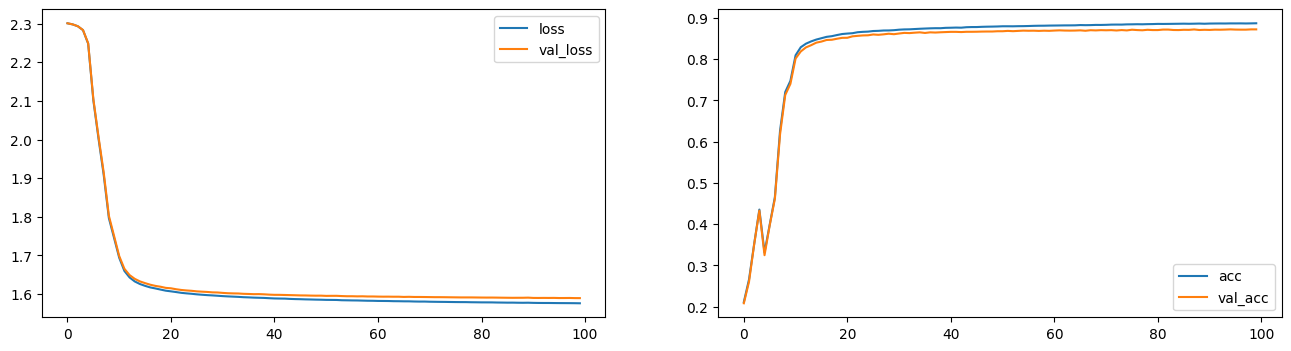

In [25]:
vis_history(acc_train_all_r30000nn, loss_train_all_r30000nn, acc_test_all_r30000nn, loss_test_all_r30000nn)

# Сигмоида без нормировки

In [157]:
n_epochs = 1000
batch_size = 100
learning_rate = 0.05

X_mn_train = torch.from_numpy(np.array(X_mn_train))
X_mn_test = torch.from_numpy(np.array(X_mn_test))
X_mn_train = X_mn_train.flatten(start_dim=1).float()
X_mn_test = X_mn_test.flatten(start_dim=1).float()
y_mn_train = torch.from_numpy(np.array(y_mn_train))
y_mn_test = torch.from_numpy(np.array(y_mn_test))
print(X_mn_train.size())
print(X_mn_train.size())
D_in = np.array(X_mn_train).shape[1]
print(D_in)
D_out = 10
loss_fn = torch.nn.CrossEntropyLoss()
model_s = Model(D_in,200,20,D_out)
acc_train_all_s30000, loss_train_all_s30000, acc_test_all_s30000, loss_test_all_s30000 = model_s.train(model_s,n_epochs, batch_size, learning_rate, X_mn_train, y_mn_train, X_mn_test, y_mn_test)

torch.Size([24000, 720])
torch.Size([24000, 720])
720


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 672.62it/s]


Epoch 0: 
 Accuracy - train: 0.11454166666666667 | test: 0.11233333333333333 
 Loss - train: 2.301361560821533 | test: 2.3014163970947266


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 807.05it/s]


Epoch 1: 
 Accuracy - train: 0.11454166666666667 | test: 0.11233333333333333 
 Loss - train: 2.3011863231658936 | test: 2.301287889480591


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 832.01it/s]


Epoch 2: 
 Accuracy - train: 0.11454166666666667 | test: 0.11233333333333333 
 Loss - train: 2.3010549545288086 | test: 2.301194906234741


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 851.37it/s]


Epoch 3: 
 Accuracy - train: 0.11454166666666667 | test: 0.11233333333333333 
 Loss - train: 2.300949811935425 | test: 2.301121711730957


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 896.95it/s]


Epoch 4: 
 Accuracy - train: 0.11454166666666667 | test: 0.11233333333333333 
 Loss - train: 2.300863027572632 | test: 2.3010573387145996


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 825.58it/s]


Epoch 5: 
 Accuracy - train: 0.11454166666666667 | test: 0.11233333333333333 
 Loss - train: 2.3007848262786865 | test: 2.300995349884033


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 820.98it/s]


Epoch 6: 
 Accuracy - train: 0.11454166666666667 | test: 0.11233333333333333 
 Loss - train: 2.3007094860076904 | test: 2.3009328842163086


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 830.24it/s]


Epoch 7: 
 Accuracy - train: 0.11454166666666667 | test: 0.11233333333333333 
 Loss - train: 2.300635576248169 | test: 2.3008713722229004


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 809.41it/s]


Epoch 8: 
 Accuracy - train: 0.11454166666666667 | test: 0.11233333333333333 
 Loss - train: 2.30056095123291 | test: 2.3008036613464355


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 810.55it/s]


Epoch 9: 
 Accuracy - train: 0.11454166666666667 | test: 0.11233333333333333 
 Loss - train: 2.3004841804504395 | test: 2.3007352352142334


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 741.05it/s]


Epoch 10: 
 Accuracy - train: 0.11454166666666667 | test: 0.11233333333333333 
 Loss - train: 2.3004050254821777 | test: 2.3006670475006104


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 824.12it/s]


Epoch 11: 
 Accuracy - train: 0.11454166666666667 | test: 0.11233333333333333 
 Loss - train: 2.300321578979492 | test: 2.3005881309509277


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 818.29it/s]


Epoch 12: 
 Accuracy - train: 0.11454166666666667 | test: 0.11233333333333333 
 Loss - train: 2.3002326488494873 | test: 2.3005080223083496


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 869.63it/s]


Epoch 13: 
 Accuracy - train: 0.11454166666666667 | test: 0.11233333333333333 
 Loss - train: 2.3001372814178467 | test: 2.3004238605499268


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 842.34it/s]


Epoch 14: 
 Accuracy - train: 0.11454166666666667 | test: 0.11233333333333333 
 Loss - train: 2.3000340461730957 | test: 2.3003292083740234


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 813.21it/s]


Epoch 15: 
 Accuracy - train: 0.11454166666666667 | test: 0.11233333333333333 
 Loss - train: 2.2999203205108643 | test: 2.3002214431762695


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 780.97it/s]


Epoch 16: 
 Accuracy - train: 0.11454166666666667 | test: 0.11233333333333333 
 Loss - train: 2.2997946739196777 | test: 2.3001015186309814


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 856.76it/s]


Epoch 17: 
 Accuracy - train: 0.11454166666666667 | test: 0.11233333333333333 
 Loss - train: 2.2996535301208496 | test: 2.2999684810638428


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 811.33it/s]


Epoch 18: 
 Accuracy - train: 0.11454166666666667 | test: 0.11233333333333333 
 Loss - train: 2.2994940280914307 | test: 2.299823760986328


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 845.50it/s]


Epoch 19: 
 Accuracy - train: 0.11454166666666667 | test: 0.11233333333333333 
 Loss - train: 2.299312114715576 | test: 2.2996551990509033


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 790.79it/s]


Epoch 20: 
 Accuracy - train: 0.11454166666666667 | test: 0.11233333333333333 
 Loss - train: 2.2991034984588623 | test: 2.299469470977783


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 884.44it/s]


Epoch 21: 
 Accuracy - train: 0.11454166666666667 | test: 0.11233333333333333 
 Loss - train: 2.2988555431365967 | test: 2.2992303371429443


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 828.83it/s]


Epoch 22: 
 Accuracy - train: 0.11454166666666667 | test: 0.11233333333333333 
 Loss - train: 2.2985637187957764 | test: 2.2989580631256104


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 857.01it/s]


Epoch 23: 
 Accuracy - train: 0.11454166666666667 | test: 0.11233333333333333 
 Loss - train: 2.2982115745544434 | test: 2.2986221313476562


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 879.44it/s]


Epoch 24: 
 Accuracy - train: 0.11454166666666667 | test: 0.11233333333333333 
 Loss - train: 2.2977864742279053 | test: 2.2982370853424072


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 868.42it/s]


Epoch 25: 
 Accuracy - train: 0.11454166666666667 | test: 0.11233333333333333 
 Loss - train: 2.2972562313079834 | test: 2.2977373600006104


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 880.18it/s]


Epoch 26: 
 Accuracy - train: 0.11454166666666667 | test: 0.11233333333333333 
 Loss - train: 2.296581506729126 | test: 2.297081470489502


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 906.01it/s]


Epoch 27: 
 Accuracy - train: 0.11454166666666667 | test: 0.11233333333333333 
 Loss - train: 2.295722723007202 | test: 2.2962863445281982


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 875.02it/s]


Epoch 28: 
 Accuracy - train: 0.11454166666666667 | test: 0.11233333333333333 
 Loss - train: 2.2945806980133057 | test: 2.2951831817626953


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 837.40it/s]


Epoch 29: 
 Accuracy - train: 0.11454166666666667 | test: 0.11233333333333333 
 Loss - train: 2.293051242828369 | test: 2.2937140464782715


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 819.02it/s]


Epoch 30: 
 Accuracy - train: 0.11454166666666667 | test: 0.11233333333333333 
 Loss - train: 2.290958881378174 | test: 2.2917275428771973


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 850.66it/s]


Epoch 31: 
 Accuracy - train: 0.11454166666666667 | test: 0.11233333333333333 
 Loss - train: 2.288025379180908 | test: 2.2888972759246826


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 738.31it/s]


Epoch 32: 
 Accuracy - train: 0.11454166666666667 | test: 0.11233333333333333 
 Loss - train: 2.2838850021362305 | test: 2.2848711013793945


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 822.87it/s]


Epoch 33: 
 Accuracy - train: 0.11454166666666667 | test: 0.11233333333333333 
 Loss - train: 2.2781033515930176 | test: 2.2792489528656006


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 850.79it/s]


Epoch 34: 
 Accuracy - train: 0.11454166666666667 | test: 0.11233333333333333 
 Loss - train: 2.270321846008301 | test: 2.2716684341430664


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 901.05it/s]


Epoch 35: 
 Accuracy - train: 0.12566666666666668 | test: 0.12266666666666666 
 Loss - train: 2.2606937885284424 | test: 2.262263774871826


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 879.33it/s]


Epoch 36: 
 Accuracy - train: 0.17333333333333334 | test: 0.16716666666666666 
 Loss - train: 2.2501580715179443 | test: 2.2519078254699707


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 878.47it/s]


Epoch 37: 
 Accuracy - train: 0.19525 | test: 0.19166666666666668 
 Loss - train: 2.2401375770568848 | test: 2.242082357406616


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 917.93it/s]


Epoch 38: 
 Accuracy - train: 0.205375 | test: 0.203 
 Loss - train: 2.2317347526550293 | test: 2.233822822570801


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 936.53it/s]


Epoch 39: 
 Accuracy - train: 0.20854166666666665 | test: 0.20733333333333334 
 Loss - train: 2.2251787185668945 | test: 2.227386713027954


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 912.53it/s]


Epoch 40: 
 Accuracy - train: 0.20979166666666665 | test: 0.208 
 Loss - train: 2.2202062606811523 | test: 2.222503423690796


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 887.07it/s]


Epoch 41: 
 Accuracy - train: 0.21158333333333335 | test: 0.21033333333333334 
 Loss - train: 2.2163827419281006 | test: 2.218754291534424


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 854.71it/s]


Epoch 42: 
 Accuracy - train: 0.21204166666666666 | test: 0.21083333333333334 
 Loss - train: 2.213383674621582 | test: 2.2158172130584717


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 934.13it/s]


Epoch 43: 
 Accuracy - train: 0.21241666666666667 | test: 0.2105 
 Loss - train: 2.210954189300537 | test: 2.2134387493133545


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 845.54it/s]


Epoch 44: 
 Accuracy - train: 0.212625 | test: 0.21033333333333334 
 Loss - train: 2.2089192867279053 | test: 2.211448907852173


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 859.81it/s]


Epoch 45: 
 Accuracy - train: 0.21295833333333333 | test: 0.2105 
 Loss - train: 2.207158088684082 | test: 2.209721326828003


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 895.50it/s]


Epoch 46: 
 Accuracy - train: 0.213125 | test: 0.2105 
 Loss - train: 2.205594539642334 | test: 2.208181858062744


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 797.40it/s]


Epoch 47: 
 Accuracy - train: 0.21333333333333335 | test: 0.211 
 Loss - train: 2.2041542530059814 | test: 2.2067816257476807


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 867.04it/s]


Epoch 48: 
 Accuracy - train: 0.21341666666666667 | test: 0.211 
 Loss - train: 2.2028026580810547 | test: 2.2054526805877686


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 902.68it/s]


Epoch 49: 
 Accuracy - train: 0.217375 | test: 0.21483333333333332 
 Loss - train: 2.20150089263916 | test: 2.204176664352417


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 938.92it/s]


Epoch 50: 
 Accuracy - train: 0.2225 | test: 0.2205 
 Loss - train: 2.200204372406006 | test: 2.2028796672821045


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 869.94it/s]


Epoch 51: 
 Accuracy - train: 0.22920833333333332 | test: 0.229 
 Loss - train: 2.198887586593628 | test: 2.2015697956085205


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 890.95it/s]


Epoch 52: 
 Accuracy - train: 0.23695833333333333 | test: 0.2385 
 Loss - train: 2.1975150108337402 | test: 2.200187921524048


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 907.22it/s]


Epoch 53: 
 Accuracy - train: 0.2445 | test: 0.24633333333333332 
 Loss - train: 2.1960508823394775 | test: 2.1987173557281494


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 863.33it/s]


Epoch 54: 
 Accuracy - train: 0.2535 | test: 0.25733333333333336 
 Loss - train: 2.194453001022339 | test: 2.197091579437256


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 814.04it/s]


Epoch 55: 
 Accuracy - train: 0.25954166666666667 | test: 0.2628333333333333 
 Loss - train: 2.1926932334899902 | test: 2.1953201293945312


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 894.23it/s]


Epoch 56: 
 Accuracy - train: 0.26895833333333335 | test: 0.2723333333333333 
 Loss - train: 2.1906776428222656 | test: 2.1932339668273926


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 910.75it/s]


Epoch 57: 
 Accuracy - train: 0.27416666666666667 | test: 0.2775 
 Loss - train: 2.1884114742279053 | test: 2.1909074783325195


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 911.11it/s]


Epoch 58: 
 Accuracy - train: 0.2805 | test: 0.283 
 Loss - train: 2.185824155807495 | test: 2.1882405281066895


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 905.27it/s]


Epoch 59: 
 Accuracy - train: 0.28508333333333336 | test: 0.2871666666666667 
 Loss - train: 2.182925224304199 | test: 2.185230255126953


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 919.25it/s]


Epoch 60: 
 Accuracy - train: 0.28883333333333333 | test: 0.2911666666666667 
 Loss - train: 2.179737091064453 | test: 2.1819393634796143


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 885.77it/s]


Epoch 61: 
 Accuracy - train: 0.29225 | test: 0.29333333333333333 
 Loss - train: 2.176283121109009 | test: 2.1783387660980225


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 950.33it/s]


Epoch 62: 
 Accuracy - train: 0.29475 | test: 0.2955 
 Loss - train: 2.172722816467285 | test: 2.1746630668640137


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 799.24it/s]


Epoch 63: 
 Accuracy - train: 0.2971666666666667 | test: 0.29783333333333334 
 Loss - train: 2.1691155433654785 | test: 2.170916795730591


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 896.59it/s]


Epoch 64: 
 Accuracy - train: 0.299 | test: 0.298 
 Loss - train: 2.165562391281128 | test: 2.167189359664917


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 822.16it/s]


Epoch 65: 
 Accuracy - train: 0.30041666666666667 | test: 0.29983333333333334 
 Loss - train: 2.1620700359344482 | test: 2.163637161254883


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 911.61it/s]


Epoch 66: 
 Accuracy - train: 0.3012916666666667 | test: 0.30083333333333334 
 Loss - train: 2.1586382389068604 | test: 2.1600704193115234


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 809.84it/s]


Epoch 67: 
 Accuracy - train: 0.30266666666666664 | test: 0.30216666666666664 
 Loss - train: 2.155291795730591 | test: 2.156646490097046


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 830.58it/s]


Epoch 68: 
 Accuracy - train: 0.30375 | test: 0.30333333333333334 
 Loss - train: 2.151972770690918 | test: 2.1532297134399414


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 677.90it/s]


Epoch 69: 
 Accuracy - train: 0.30495833333333333 | test: 0.3035 
 Loss - train: 2.1486573219299316 | test: 2.1498658657073975


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 820.46it/s]


Epoch 70: 
 Accuracy - train: 0.3057916666666667 | test: 0.30366666666666664 
 Loss - train: 2.1453113555908203 | test: 2.1464767456054688


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 801.87it/s]


Epoch 71: 
 Accuracy - train: 0.30645833333333333 | test: 0.3045 
 Loss - train: 2.1419103145599365 | test: 2.142983913421631


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 771.44it/s]


Epoch 72: 
 Accuracy - train: 0.30675 | test: 0.3055 
 Loss - train: 2.13838791847229 | test: 2.139462471008301


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 811.89it/s]


Epoch 73: 
 Accuracy - train: 0.30745833333333333 | test: 0.30616666666666664 
 Loss - train: 2.1347596645355225 | test: 2.1357767581939697


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 809.80it/s]


Epoch 74: 
 Accuracy - train: 0.30816666666666664 | test: 0.30733333333333335 
 Loss - train: 2.1308846473693848 | test: 2.1318888664245605


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 916.88it/s]


Epoch 75: 
 Accuracy - train: 0.30875 | test: 0.308 
 Loss - train: 2.1267881393432617 | test: 2.1277289390563965


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 900.35it/s]


Epoch 76: 
 Accuracy - train: 0.3092083333333333 | test: 0.30816666666666664 
 Loss - train: 2.12237548828125 | test: 2.123385429382324


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 862.66it/s]


Epoch 77: 
 Accuracy - train: 0.3117083333333333 | test: 0.31066666666666665 
 Loss - train: 2.1174802780151367 | test: 2.1183948516845703


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 761.74it/s]


Epoch 78: 
 Accuracy - train: 0.342875 | test: 0.34 
 Loss - train: 2.112048625946045 | test: 2.1129794120788574


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 850.97it/s]


Epoch 79: 
 Accuracy - train: 0.36991666666666667 | test: 0.36983333333333335 
 Loss - train: 2.1058948040008545 | test: 2.1068010330200195


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 851.28it/s]


Epoch 80: 
 Accuracy - train: 0.382125 | test: 0.38366666666666666 
 Loss - train: 2.0988667011260986 | test: 2.099684953689575


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 848.58it/s]


Epoch 81: 
 Accuracy - train: 0.388375 | test: 0.3888333333333333 
 Loss - train: 2.090972423553467 | test: 2.0917530059814453


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 704.12it/s]


Epoch 82: 
 Accuracy - train: 0.3935 | test: 0.39216666666666666 
 Loss - train: 2.08232045173645 | test: 2.0832719802856445


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 946.08it/s]


Epoch 83: 
 Accuracy - train: 0.39679166666666665 | test: 0.39566666666666667 
 Loss - train: 2.0735599994659424 | test: 2.0746009349823


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 912.69it/s]


Epoch 84: 
 Accuracy - train: 0.40025 | test: 0.398 
 Loss - train: 2.065042495727539 | test: 2.0662646293640137


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 806.06it/s]


Epoch 85: 
 Accuracy - train: 0.40220833333333333 | test: 0.3995 
 Loss - train: 2.0569863319396973 | test: 2.0584523677825928


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 910.55it/s]


Epoch 86: 
 Accuracy - train: 0.404375 | test: 0.40166666666666667 
 Loss - train: 2.0493004322052 | test: 2.0509274005889893


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 837.62it/s]


Epoch 87: 
 Accuracy - train: 0.406875 | test: 0.404 
 Loss - train: 2.0419299602508545 | test: 2.043747901916504


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 890.61it/s]


Epoch 88: 
 Accuracy - train: 0.41770833333333335 | test: 0.4116666666666667 
 Loss - train: 2.034719944000244 | test: 2.036663293838501


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 879.84it/s]


Epoch 89: 
 Accuracy - train: 0.43045833333333333 | test: 0.4246666666666667 
 Loss - train: 2.0275344848632812 | test: 2.0296084880828857


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 906.05it/s]


Epoch 90: 
 Accuracy - train: 0.44225 | test: 0.43766666666666665 
 Loss - train: 2.020404577255249 | test: 2.0225203037261963


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 880.93it/s]


Epoch 91: 
 Accuracy - train: 0.46145833333333336 | test: 0.4573333333333333 
 Loss - train: 2.0133442878723145 | test: 2.015428304672241


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 859.89it/s]


Epoch 92: 
 Accuracy - train: 0.485875 | test: 0.4796666666666667 
 Loss - train: 2.0063211917877197 | test: 2.00844669342041


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 795.64it/s]


Epoch 93: 
 Accuracy - train: 0.5156666666666667 | test: 0.5071666666666667 
 Loss - train: 1.9993994235992432 | test: 2.001542091369629


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 807.02it/s]


Epoch 94: 
 Accuracy - train: 0.537625 | test: 0.53 
 Loss - train: 1.9924371242523193 | test: 1.9945497512817383


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 858.73it/s]


Epoch 95: 
 Accuracy - train: 0.5588333333333333 | test: 0.5491666666666667 
 Loss - train: 1.9855109453201294 | test: 1.987605094909668


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 909.06it/s]


Epoch 96: 
 Accuracy - train: 0.5725 | test: 0.5655 
 Loss - train: 1.9785867929458618 | test: 1.9806344509124756


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 899.79it/s]


Epoch 97: 
 Accuracy - train: 0.5809583333333334 | test: 0.5765 
 Loss - train: 1.9716079235076904 | test: 1.9737857580184937


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 855.98it/s]


Epoch 98: 
 Accuracy - train: 0.5899583333333334 | test: 0.5841666666666666 
 Loss - train: 1.9646774530410767 | test: 1.9668694734573364


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 797.51it/s]


Epoch 99: 
 Accuracy - train: 0.6010833333333333 | test: 0.5966666666666667 
 Loss - train: 1.9576808214187622 | test: 1.9598418474197388


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 747.94it/s]


Epoch 100: 
 Accuracy - train: 0.6081666666666666 | test: 0.6043333333333333 
 Loss - train: 1.9507113695144653 | test: 1.9528520107269287


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 725.89it/s]


Epoch 101: 
 Accuracy - train: 0.6129166666666667 | test: 0.6076666666666667 
 Loss - train: 1.9437910318374634 | test: 1.9460391998291016


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 898.73it/s]


Epoch 102: 
 Accuracy - train: 0.61875 | test: 0.6135 
 Loss - train: 1.9368157386779785 | test: 1.9388785362243652


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 944.06it/s]


Epoch 103: 
 Accuracy - train: 0.6250416666666667 | test: 0.619 
 Loss - train: 1.9299668073654175 | test: 1.931951880455017


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 915.27it/s]


Epoch 104: 
 Accuracy - train: 0.628375 | test: 0.6226666666666667 
 Loss - train: 1.9230906963348389 | test: 1.9251699447631836


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 871.34it/s]


Epoch 105: 
 Accuracy - train: 0.6315 | test: 0.6265 
 Loss - train: 1.9164552688598633 | test: 1.9186389446258545


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 916.41it/s]


Epoch 106: 
 Accuracy - train: 0.6353333333333333 | test: 0.63 
 Loss - train: 1.9097912311553955 | test: 1.9118144512176514


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 897.74it/s]


Epoch 107: 
 Accuracy - train: 0.6373333333333333 | test: 0.6326666666666667 
 Loss - train: 1.903402328491211 | test: 1.9054841995239258


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 877.93it/s]


Epoch 108: 
 Accuracy - train: 0.6419166666666667 | test: 0.6353333333333333 
 Loss - train: 1.897204875946045 | test: 1.899189829826355


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 727.17it/s]


Epoch 109: 
 Accuracy - train: 0.6439583333333333 | test: 0.6365 
 Loss - train: 1.8912156820297241 | test: 1.8932483196258545


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 822.53it/s]


Epoch 110: 
 Accuracy - train: 0.6454583333333334 | test: 0.6398333333333334 
 Loss - train: 1.885459303855896 | test: 1.8874872922897339


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 857.81it/s]


Epoch 111: 
 Accuracy - train: 0.6475416666666667 | test: 0.6426666666666667 
 Loss - train: 1.8800076246261597 | test: 1.8820198774337769


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 874.29it/s]


Epoch 112: 
 Accuracy - train: 0.6484166666666666 | test: 0.6453333333333333 
 Loss - train: 1.8748713731765747 | test: 1.8769071102142334


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 748.35it/s]


Epoch 113: 
 Accuracy - train: 0.6497916666666667 | test: 0.6466666666666666 
 Loss - train: 1.8699226379394531 | test: 1.8719335794448853


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 824.15it/s]


Epoch 114: 
 Accuracy - train: 0.6515833333333333 | test: 0.6485 
 Loss - train: 1.865186333656311 | test: 1.8672786951065063


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 552.79it/s]


Epoch 115: 
 Accuracy - train: 0.6520833333333333 | test: 0.6491666666666667 
 Loss - train: 1.8607717752456665 | test: 1.8628829717636108


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 674.06it/s]


Epoch 116: 
 Accuracy - train: 0.65375 | test: 0.6496666666666666 
 Loss - train: 1.8566410541534424 | test: 1.8589109182357788


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 810.36it/s]


Epoch 117: 
 Accuracy - train: 0.655125 | test: 0.6508333333333334 
 Loss - train: 1.8526606559753418 | test: 1.854917049407959


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 751.10it/s]


Epoch 118: 
 Accuracy - train: 0.6560416666666666 | test: 0.6516666666666666 
 Loss - train: 1.8490419387817383 | test: 1.8513723611831665


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 842.95it/s]


Epoch 119: 
 Accuracy - train: 0.6572083333333333 | test: 0.6535 
 Loss - train: 1.845595359802246 | test: 1.8478397130966187


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 784.77it/s]


Epoch 120: 
 Accuracy - train: 0.658125 | test: 0.654 
 Loss - train: 1.8422114849090576 | test: 1.8445841073989868


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 820.36it/s]


Epoch 121: 
 Accuracy - train: 0.658875 | test: 0.6545 
 Loss - train: 1.8391183614730835 | test: 1.8415889739990234


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 840.87it/s]


Epoch 122: 
 Accuracy - train: 0.6597083333333333 | test: 0.6558333333333334 
 Loss - train: 1.836193561553955 | test: 1.8387737274169922


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 681.63it/s]


Epoch 123: 
 Accuracy - train: 0.660875 | test: 0.6575 
 Loss - train: 1.833443522453308 | test: 1.835935354232788


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 815.51it/s]


Epoch 124: 
 Accuracy - train: 0.6613333333333333 | test: 0.6573333333333333 
 Loss - train: 1.8309627771377563 | test: 1.8334274291992188


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 808.36it/s]


Epoch 125: 
 Accuracy - train: 0.6629166666666667 | test: 0.6583333333333333 
 Loss - train: 1.8283445835113525 | test: 1.8310511112213135


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 913.87it/s]


Epoch 126: 
 Accuracy - train: 0.6635833333333333 | test: 0.6593333333333333 
 Loss - train: 1.8260002136230469 | test: 1.828792929649353


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 713.37it/s]


Epoch 127: 
 Accuracy - train: 0.664375 | test: 0.6603333333333333 
 Loss - train: 1.8238203525543213 | test: 1.8267143964767456


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 829.24it/s]


Epoch 128: 
 Accuracy - train: 0.6653333333333333 | test: 0.6611666666666667 
 Loss - train: 1.8217345476150513 | test: 1.824688196182251


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 730.91it/s]


Epoch 129: 
 Accuracy - train: 0.66625 | test: 0.662 
 Loss - train: 1.819705843925476 | test: 1.822727918624878


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 868.81it/s]


Epoch 130: 
 Accuracy - train: 0.6670416666666666 | test: 0.6625 
 Loss - train: 1.8178235292434692 | test: 1.8208962678909302


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 819.66it/s]


Epoch 131: 
 Accuracy - train: 0.6675833333333333 | test: 0.6631666666666667 
 Loss - train: 1.8160074949264526 | test: 1.8192485570907593


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 866.18it/s]


Epoch 132: 
 Accuracy - train: 0.6682916666666666 | test: 0.663 
 Loss - train: 1.8142629861831665 | test: 1.8174127340316772


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 787.08it/s]


Epoch 133: 
 Accuracy - train: 0.6690833333333334 | test: 0.6636666666666666 
 Loss - train: 1.812626838684082 | test: 1.8158502578735352


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 833.17it/s]


Epoch 134: 
 Accuracy - train: 0.6694583333333334 | test: 0.6641666666666667 
 Loss - train: 1.8110768795013428 | test: 1.8144391775131226


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 777.95it/s]


Epoch 135: 
 Accuracy - train: 0.6710416666666666 | test: 0.6653333333333333 
 Loss - train: 1.8096065521240234 | test: 1.8128043413162231


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 893.01it/s]


Epoch 136: 
 Accuracy - train: 0.6715 | test: 0.6655 
 Loss - train: 1.8082021474838257 | test: 1.8114275932312012


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 852.59it/s]


Epoch 137: 
 Accuracy - train: 0.67175 | test: 0.666 
 Loss - train: 1.8067858219146729 | test: 1.810261845588684


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 838.00it/s]


Epoch 138: 
 Accuracy - train: 0.6722916666666666 | test: 0.6663333333333333 
 Loss - train: 1.8055050373077393 | test: 1.8090168237686157


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 885.17it/s]


Epoch 139: 
 Accuracy - train: 0.6734583333333334 | test: 0.6661666666666667 
 Loss - train: 1.8042922019958496 | test: 1.8077062368392944


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 914.15it/s]


Epoch 140: 
 Accuracy - train: 0.6735 | test: 0.6663333333333333 
 Loss - train: 1.8030599355697632 | test: 1.8065837621688843


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 833.71it/s]


Epoch 141: 
 Accuracy - train: 0.674125 | test: 0.6673333333333333 
 Loss - train: 1.801930546760559 | test: 1.8055438995361328


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 830.68it/s]


Epoch 142: 
 Accuracy - train: 0.674625 | test: 0.6675 
 Loss - train: 1.800801396369934 | test: 1.804368495941162


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 778.23it/s]


Epoch 143: 
 Accuracy - train: 0.6753333333333333 | test: 0.6686666666666666 
 Loss - train: 1.799830436706543 | test: 1.8034731149673462


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 904.54it/s]


Epoch 144: 
 Accuracy - train: 0.6755833333333333 | test: 0.6691666666666667 
 Loss - train: 1.79872465133667 | test: 1.80238676071167


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 852.29it/s]


Epoch 145: 
 Accuracy - train: 0.6761666666666667 | test: 0.67 
 Loss - train: 1.7978037595748901 | test: 1.8015599250793457


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 853.19it/s]


Epoch 146: 
 Accuracy - train: 0.6765416666666667 | test: 0.6703333333333333 
 Loss - train: 1.7968900203704834 | test: 1.80054771900177


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 850.97it/s]


Epoch 147: 
 Accuracy - train: 0.67725 | test: 0.6706666666666666 
 Loss - train: 1.795931339263916 | test: 1.7996530532836914


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 761.16it/s]


Epoch 148: 
 Accuracy - train: 0.6777083333333334 | test: 0.672 
 Loss - train: 1.7950623035430908 | test: 1.7989037036895752


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 860.82it/s]


Epoch 149: 
 Accuracy - train: 0.6779583333333333 | test: 0.6723333333333333 
 Loss - train: 1.7942326068878174 | test: 1.7981246709823608


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 853.77it/s]


Epoch 150: 
 Accuracy - train: 0.6785 | test: 0.6731666666666667 
 Loss - train: 1.7934255599975586 | test: 1.7973486185073853


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 827.13it/s]


Epoch 151: 
 Accuracy - train: 0.6785416666666667 | test: 0.6736666666666666 
 Loss - train: 1.7926661968231201 | test: 1.7966017723083496


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 847.82it/s]


Epoch 152: 
 Accuracy - train: 0.67875 | test: 0.6736666666666666 
 Loss - train: 1.7919293642044067 | test: 1.7959147691726685


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 839.53it/s]


Epoch 153: 
 Accuracy - train: 0.6795416666666667 | test: 0.6743333333333333 
 Loss - train: 1.7911688089370728 | test: 1.7950787544250488


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 672.50it/s]


Epoch 154: 
 Accuracy - train: 0.67975 | test: 0.6756666666666666 
 Loss - train: 1.790454387664795 | test: 1.7944791316986084


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 777.19it/s]


Epoch 155: 
 Accuracy - train: 0.6801666666666667 | test: 0.6756666666666666 
 Loss - train: 1.7897921800613403 | test: 1.7937875986099243


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 789.13it/s]


Epoch 156: 
 Accuracy - train: 0.6802083333333333 | test: 0.6758333333333333 
 Loss - train: 1.7891541719436646 | test: 1.7931264638900757


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 872.76it/s]


Epoch 157: 
 Accuracy - train: 0.6805833333333333 | test: 0.6765 
 Loss - train: 1.7884975671768188 | test: 1.792597770690918


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 940.00it/s]


Epoch 158: 
 Accuracy - train: 0.680875 | test: 0.6765 
 Loss - train: 1.7878960371017456 | test: 1.7919715642929077


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 843.44it/s]


Epoch 159: 
 Accuracy - train: 0.68125 | test: 0.6768333333333333 
 Loss - train: 1.7872956991195679 | test: 1.7914451360702515


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 887.68it/s]


Epoch 160: 
 Accuracy - train: 0.6815416666666667 | test: 0.6771666666666667 
 Loss - train: 1.7867032289505005 | test: 1.7908546924591064


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 798.59it/s]


Epoch 161: 
 Accuracy - train: 0.6819583333333333 | test: 0.6771666666666667 
 Loss - train: 1.7861793041229248 | test: 1.7902783155441284


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 911.28it/s]


Epoch 162: 
 Accuracy - train: 0.6822916666666666 | test: 0.6778333333333333 
 Loss - train: 1.7855924367904663 | test: 1.7897740602493286


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 626.15it/s]


Epoch 163: 
 Accuracy - train: 0.682875 | test: 0.6785 
 Loss - train: 1.7850778102874756 | test: 1.7893067598342896


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 853.04it/s]


Epoch 164: 
 Accuracy - train: 0.683 | test: 0.678 
 Loss - train: 1.784543752670288 | test: 1.788759708404541


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 844.31it/s]


Epoch 165: 
 Accuracy - train: 0.6836666666666666 | test: 0.6786666666666666 
 Loss - train: 1.7840553522109985 | test: 1.7883301973342896


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 858.20it/s]


Epoch 166: 
 Accuracy - train: 0.6834166666666667 | test: 0.6786666666666666 
 Loss - train: 1.7835814952850342 | test: 1.7878949642181396


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 927.08it/s]


Epoch 167: 
 Accuracy - train: 0.6839166666666666 | test: 0.6791666666666667 
 Loss - train: 1.7830755710601807 | test: 1.7874093055725098


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 878.76it/s]


Epoch 168: 
 Accuracy - train: 0.683875 | test: 0.6786666666666666 
 Loss - train: 1.7826162576675415 | test: 1.7869528532028198


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 857.33it/s]


Epoch 169: 
 Accuracy - train: 0.6840416666666667 | test: 0.6785 
 Loss - train: 1.7821695804595947 | test: 1.7865173816680908


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 900.44it/s]


Epoch 170: 
 Accuracy - train: 0.6842083333333333 | test: 0.6793333333333333 
 Loss - train: 1.7817274332046509 | test: 1.786041498184204


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 842.03it/s]


Epoch 171: 
 Accuracy - train: 0.6847916666666667 | test: 0.6796666666666666 
 Loss - train: 1.7812503576278687 | test: 1.7856236696243286


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 861.78it/s]


Epoch 172: 
 Accuracy - train: 0.6852083333333333 | test: 0.6805 
 Loss - train: 1.7808352708816528 | test: 1.785260558128357


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 834.66it/s]


Epoch 173: 
 Accuracy - train: 0.6854166666666667 | test: 0.68 
 Loss - train: 1.780381679534912 | test: 1.7847729921340942


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 717.53it/s]


Epoch 174: 
 Accuracy - train: 0.685625 | test: 0.6805 
 Loss - train: 1.7799679040908813 | test: 1.7843717336654663


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 839.28it/s]


Epoch 175: 
 Accuracy - train: 0.6860833333333334 | test: 0.6811666666666667 
 Loss - train: 1.7795436382293701 | test: 1.7839900255203247


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 861.09it/s]


Epoch 176: 
 Accuracy - train: 0.686125 | test: 0.681 
 Loss - train: 1.7791123390197754 | test: 1.7836017608642578


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 912.35it/s]


Epoch 177: 
 Accuracy - train: 0.6864583333333333 | test: 0.6815 
 Loss - train: 1.7786948680877686 | test: 1.7832392454147339


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 877.78it/s]


Epoch 178: 
 Accuracy - train: 0.6867916666666667 | test: 0.681 
 Loss - train: 1.7782690525054932 | test: 1.782746434211731


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 805.46it/s]


Epoch 179: 
 Accuracy - train: 0.6867916666666667 | test: 0.6815 
 Loss - train: 1.777825951576233 | test: 1.782320499420166


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 909.63it/s]


Epoch 180: 
 Accuracy - train: 0.687 | test: 0.682 
 Loss - train: 1.7773733139038086 | test: 1.7818982601165771


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 880.61it/s]


Epoch 181: 
 Accuracy - train: 0.687 | test: 0.682 
 Loss - train: 1.77693510055542 | test: 1.7815797328948975


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 849.21it/s]


Epoch 182: 
 Accuracy - train: 0.6877083333333334 | test: 0.681 
 Loss - train: 1.7763997316360474 | test: 1.780903697013855


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 865.56it/s]


Epoch 183: 
 Accuracy - train: 0.6877083333333334 | test: 0.6823333333333333 
 Loss - train: 1.7758235931396484 | test: 1.780432105064392


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 923.27it/s]


Epoch 184: 
 Accuracy - train: 0.688 | test: 0.6823333333333333 
 Loss - train: 1.7751994132995605 | test: 1.779612421989441


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 800.12it/s]


Epoch 185: 
 Accuracy - train: 0.68825 | test: 0.6825 
 Loss - train: 1.7743009328842163 | test: 1.778836727142334


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 865.92it/s]


Epoch 186: 
 Accuracy - train: 0.6886666666666666 | test: 0.6828333333333333 
 Loss - train: 1.7731188535690308 | test: 1.7775442600250244


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 899.98it/s]


Epoch 187: 
 Accuracy - train: 0.6908333333333333 | test: 0.6843333333333333 
 Loss - train: 1.7711659669876099 | test: 1.7755540609359741


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 769.60it/s]


Epoch 188: 
 Accuracy - train: 0.6964583333333333 | test: 0.6923333333333334 
 Loss - train: 1.7673797607421875 | test: 1.7713748216629028


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 911.58it/s]


Epoch 189: 
 Accuracy - train: 0.7128333333333333 | test: 0.7098333333333333 
 Loss - train: 1.7597882747650146 | test: 1.7632094621658325


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 804.21it/s]


Epoch 190: 
 Accuracy - train: 0.7315416666666666 | test: 0.728 
 Loss - train: 1.7522602081298828 | test: 1.7548604011535645


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 868.61it/s]


Epoch 191: 
 Accuracy - train: 0.739875 | test: 0.7386666666666667 
 Loss - train: 1.7472351789474487 | test: 1.7497295141220093


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 873.19it/s]


Epoch 192: 
 Accuracy - train: 0.7462083333333334 | test: 0.7438333333333333 
 Loss - train: 1.742982268333435 | test: 1.7451252937316895


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 871.48it/s]


Epoch 193: 
 Accuracy - train: 0.748375 | test: 0.7476666666666667 
 Loss - train: 1.7391122579574585 | test: 1.7412817478179932


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 854.81it/s]


Epoch 194: 
 Accuracy - train: 0.753625 | test: 0.7503333333333333 
 Loss - train: 1.735589623451233 | test: 1.737573266029358


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 728.75it/s]


Epoch 195: 
 Accuracy - train: 0.7560416666666666 | test: 0.7533333333333333 
 Loss - train: 1.732349157333374 | test: 1.7343887090682983


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 885.55it/s]


Epoch 196: 
 Accuracy - train: 0.7572916666666667 | test: 0.7543333333333333 
 Loss - train: 1.7293217182159424 | test: 1.7311463356018066


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 687.21it/s]


Epoch 197: 
 Accuracy - train: 0.758875 | test: 0.7558333333333334 
 Loss - train: 1.7264608144760132 | test: 1.7283751964569092


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 630.70it/s]


Epoch 198: 
 Accuracy - train: 0.760375 | test: 0.7573333333333333 
 Loss - train: 1.723860502243042 | test: 1.7257455587387085


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 667.55it/s]


Epoch 199: 
 Accuracy - train: 0.7626666666666667 | test: 0.7608333333333334 
 Loss - train: 1.7214759588241577 | test: 1.7233738899230957


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 754.51it/s]


Epoch 200: 
 Accuracy - train: 0.7637916666666666 | test: 0.7615 
 Loss - train: 1.7191951274871826 | test: 1.721225380897522


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 880.70it/s]


Epoch 201: 
 Accuracy - train: 0.764625 | test: 0.7625 
 Loss - train: 1.717038869857788 | test: 1.7189844846725464


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 796.66it/s]


Epoch 202: 
 Accuracy - train: 0.7657916666666666 | test: 0.762 
 Loss - train: 1.715165376663208 | test: 1.7168521881103516


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 841.24it/s]


Epoch 203: 
 Accuracy - train: 0.7667083333333333 | test: 0.7638333333333334 
 Loss - train: 1.7132693529129028 | test: 1.7153229713439941


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 834.17it/s]


Epoch 204: 
 Accuracy - train: 0.7677916666666667 | test: 0.7643333333333333 
 Loss - train: 1.711531400680542 | test: 1.713541030883789


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 766.36it/s]


Epoch 205: 
 Accuracy - train: 0.7685416666666667 | test: 0.7658333333333334 
 Loss - train: 1.710015892982483 | test: 1.7118988037109375


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 809.20it/s]


Epoch 206: 
 Accuracy - train: 0.769625 | test: 0.7668333333333334 
 Loss - train: 1.7084531784057617 | test: 1.7106101512908936


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 882.18it/s]


Epoch 207: 
 Accuracy - train: 0.77 | test: 0.7681666666666667 
 Loss - train: 1.7070918083190918 | test: 1.7094157934188843


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 774.87it/s]


Epoch 208: 
 Accuracy - train: 0.77075 | test: 0.7681666666666667 
 Loss - train: 1.705763816833496 | test: 1.7080892324447632


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 711.34it/s]


Epoch 209: 
 Accuracy - train: 0.7715 | test: 0.7691666666666667 
 Loss - train: 1.7045583724975586 | test: 1.7069613933563232


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 688.94it/s]


Epoch 210: 
 Accuracy - train: 0.7720833333333333 | test: 0.7698333333333334 
 Loss - train: 1.7033982276916504 | test: 1.7058355808258057


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 746.44it/s]


Epoch 211: 
 Accuracy - train: 0.773125 | test: 0.7708333333333334 
 Loss - train: 1.702299952507019 | test: 1.704734206199646


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 785.65it/s]


Epoch 212: 
 Accuracy - train: 0.773375 | test: 0.7713333333333333 
 Loss - train: 1.701314926147461 | test: 1.7039234638214111


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 667.25it/s]


Epoch 213: 
 Accuracy - train: 0.7742083333333334 | test: 0.7716666666666666 
 Loss - train: 1.7003486156463623 | test: 1.7028239965438843


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 676.03it/s]


Epoch 214: 
 Accuracy - train: 0.774625 | test: 0.7721666666666667 
 Loss - train: 1.6994322538375854 | test: 1.7020788192749023


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 776.88it/s]


Epoch 215: 
 Accuracy - train: 0.77525 | test: 0.7723333333333333 
 Loss - train: 1.6985989809036255 | test: 1.7013741731643677


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 923.21it/s]


Epoch 216: 
 Accuracy - train: 0.77525 | test: 0.7726666666666666 
 Loss - train: 1.69776451587677 | test: 1.7005431652069092


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 793.86it/s]


Epoch 217: 
 Accuracy - train: 0.775875 | test: 0.7736666666666666 
 Loss - train: 1.6969854831695557 | test: 1.6997815370559692


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 790.99it/s]


Epoch 218: 
 Accuracy - train: 0.7762083333333333 | test: 0.7733333333333333 
 Loss - train: 1.6962592601776123 | test: 1.6990485191345215


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 901.51it/s]


Epoch 219: 
 Accuracy - train: 0.7765833333333333 | test: 0.7736666666666666 
 Loss - train: 1.6955788135528564 | test: 1.6984925270080566


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 884.74it/s]


Epoch 220: 
 Accuracy - train: 0.7764583333333334 | test: 0.7743333333333333 
 Loss - train: 1.694922685623169 | test: 1.6978622674942017


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 825.48it/s]


Epoch 221: 
 Accuracy - train: 0.7769583333333333 | test: 0.7738333333333334 
 Loss - train: 1.6942716836929321 | test: 1.697251796722412


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 726.27it/s]


Epoch 222: 
 Accuracy - train: 0.7774166666666666 | test: 0.7753333333333333 
 Loss - train: 1.6936815977096558 | test: 1.696848750114441


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 808.66it/s]


Epoch 223: 
 Accuracy - train: 0.7778333333333334 | test: 0.7748333333333334 
 Loss - train: 1.693088412284851 | test: 1.6962026357650757


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 863.94it/s]


Epoch 224: 
 Accuracy - train: 0.777875 | test: 0.7751666666666667 
 Loss - train: 1.6925480365753174 | test: 1.6956781148910522


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 834.86it/s]


Epoch 225: 
 Accuracy - train: 0.7782083333333333 | test: 0.7756666666666666 
 Loss - train: 1.6920299530029297 | test: 1.6952970027923584


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 810.47it/s]


Epoch 226: 
 Accuracy - train: 0.7784583333333334 | test: 0.7753333333333333 
 Loss - train: 1.6915265321731567 | test: 1.6947489976882935


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 857.41it/s]


Epoch 227: 
 Accuracy - train: 0.7789583333333333 | test: 0.776 
 Loss - train: 1.6910176277160645 | test: 1.6943371295928955


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 863.51it/s]


Epoch 228: 
 Accuracy - train: 0.779 | test: 0.7765 
 Loss - train: 1.6905624866485596 | test: 1.6938740015029907


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 869.60it/s]


Epoch 229: 
 Accuracy - train: 0.779625 | test: 0.7765 
 Loss - train: 1.690142273902893 | test: 1.6937588453292847


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 801.10it/s]


Epoch 230: 
 Accuracy - train: 0.78 | test: 0.7761666666666667 
 Loss - train: 1.6896617412567139 | test: 1.6931402683258057


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 860.25it/s]


Epoch 231: 
 Accuracy - train: 0.7802083333333333 | test: 0.7765 
 Loss - train: 1.6892447471618652 | test: 1.6927485466003418


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 761.98it/s]


Epoch 232: 
 Accuracy - train: 0.7805833333333333 | test: 0.7775 
 Loss - train: 1.6888362169265747 | test: 1.692525863647461


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 758.40it/s]


Epoch 233: 
 Accuracy - train: 0.7801666666666667 | test: 0.7771666666666667 
 Loss - train: 1.6885005235671997 | test: 1.6920872926712036


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 793.68it/s]


Epoch 234: 
 Accuracy - train: 0.7810416666666666 | test: 0.7776666666666666 
 Loss - train: 1.6880550384521484 | test: 1.6917972564697266


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 832.86it/s]


Epoch 235: 
 Accuracy - train: 0.7811666666666667 | test: 0.7778333333333334 
 Loss - train: 1.6876839399337769 | test: 1.6914721727371216


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 548.87it/s]


Epoch 236: 
 Accuracy - train: 0.7815416666666667 | test: 0.7781666666666667 
 Loss - train: 1.6873277425765991 | test: 1.691144347190857


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 786.09it/s]


Epoch 237: 
 Accuracy - train: 0.7815416666666667 | test: 0.7776666666666666 
 Loss - train: 1.6870182752609253 | test: 1.6907423734664917


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 863.23it/s]


Epoch 238: 
 Accuracy - train: 0.7817916666666667 | test: 0.7783333333333333 
 Loss - train: 1.6866463422775269 | test: 1.6905834674835205


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 812.76it/s]


Epoch 239: 
 Accuracy - train: 0.7817916666666667 | test: 0.7783333333333333 
 Loss - train: 1.686316728591919 | test: 1.6902767419815063


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 726.15it/s]


Epoch 240: 
 Accuracy - train: 0.782 | test: 0.7785 
 Loss - train: 1.6860071420669556 | test: 1.6900599002838135


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 849.93it/s]


Epoch 241: 
 Accuracy - train: 0.7820416666666666 | test: 0.7786666666666666 
 Loss - train: 1.6856964826583862 | test: 1.689755916595459


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 835.77it/s]


Epoch 242: 
 Accuracy - train: 0.782375 | test: 0.779 
 Loss - train: 1.6853948831558228 | test: 1.6894668340682983


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 822.29it/s]


Epoch 243: 
 Accuracy - train: 0.7822916666666667 | test: 0.7793333333333333 
 Loss - train: 1.6851304769515991 | test: 1.6893917322158813


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 828.87it/s]


Epoch 244: 
 Accuracy - train: 0.7825833333333333 | test: 0.779 
 Loss - train: 1.684834599494934 | test: 1.6889801025390625


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 815.82it/s]


Epoch 245: 
 Accuracy - train: 0.78275 | test: 0.78 
 Loss - train: 1.68452787399292 | test: 1.6887493133544922


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 853.45it/s]


Epoch 246: 
 Accuracy - train: 0.7827916666666667 | test: 0.78 
 Loss - train: 1.684262752532959 | test: 1.6885148286819458


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 731.46it/s]


Epoch 247: 
 Accuracy - train: 0.7829583333333333 | test: 0.7798333333333334 
 Loss - train: 1.6840009689331055 | test: 1.6882747411727905


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 857.02it/s]


Epoch 248: 
 Accuracy - train: 0.7830833333333334 | test: 0.7798333333333334 
 Loss - train: 1.683741569519043 | test: 1.6880912780761719


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 714.27it/s]


Epoch 249: 
 Accuracy - train: 0.7834583333333334 | test: 0.7796666666666666 
 Loss - train: 1.683491587638855 | test: 1.687854528427124


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 897.98it/s]


Epoch 250: 
 Accuracy - train: 0.783375 | test: 0.7805 
 Loss - train: 1.6832395792007446 | test: 1.6877022981643677


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 839.12it/s]


Epoch 251: 
 Accuracy - train: 0.7835833333333333 | test: 0.7803333333333333 
 Loss - train: 1.6829888820648193 | test: 1.6874388456344604


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 773.43it/s]


Epoch 252: 
 Accuracy - train: 0.7836666666666666 | test: 0.7803333333333333 
 Loss - train: 1.6827784776687622 | test: 1.6872714757919312


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 817.51it/s]


Epoch 253: 
 Accuracy - train: 0.783875 | test: 0.78 
 Loss - train: 1.6825681924819946 | test: 1.6872559785842896


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 881.87it/s]


Epoch 254: 
 Accuracy - train: 0.7842083333333333 | test: 0.7808333333333334 
 Loss - train: 1.6823053359985352 | test: 1.6869633197784424


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 824.39it/s]


Epoch 255: 
 Accuracy - train: 0.7844166666666667 | test: 0.7801666666666667 
 Loss - train: 1.682072401046753 | test: 1.686680555343628


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 633.46it/s]


Epoch 256: 
 Accuracy - train: 0.7844583333333334 | test: 0.7811666666666667 
 Loss - train: 1.6818677186965942 | test: 1.6865768432617188


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 859.66it/s]


Epoch 257: 
 Accuracy - train: 0.7846666666666666 | test: 0.7806666666666666 
 Loss - train: 1.6816401481628418 | test: 1.686372995376587


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 892.28it/s]


Epoch 258: 
 Accuracy - train: 0.7849166666666667 | test: 0.7801666666666667 
 Loss - train: 1.6814571619033813 | test: 1.686235785484314


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 856.89it/s]


Epoch 259: 
 Accuracy - train: 0.7849166666666667 | test: 0.7808333333333334 
 Loss - train: 1.681257963180542 | test: 1.6861101388931274


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 711.28it/s]


Epoch 260: 
 Accuracy - train: 0.7850416666666666 | test: 0.7815 
 Loss - train: 1.6810400485992432 | test: 1.6859080791473389


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 856.66it/s]


Epoch 261: 
 Accuracy - train: 0.7852916666666667 | test: 0.7806666666666666 
 Loss - train: 1.6808604001998901 | test: 1.6858136653900146


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 849.80it/s]


Epoch 262: 
 Accuracy - train: 0.7857083333333333 | test: 0.7811666666666667 
 Loss - train: 1.6806445121765137 | test: 1.6855491399765015


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 872.49it/s]


Epoch 263: 
 Accuracy - train: 0.7855833333333333 | test: 0.7803333333333333 
 Loss - train: 1.6804707050323486 | test: 1.6853079795837402


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 811.82it/s]


Epoch 264: 
 Accuracy - train: 0.7859166666666667 | test: 0.7818333333333334 
 Loss - train: 1.6802688837051392 | test: 1.6852750778198242


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 844.91it/s]


Epoch 265: 
 Accuracy - train: 0.785875 | test: 0.7815 
 Loss - train: 1.680080771446228 | test: 1.6850203275680542


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 836.99it/s]


Epoch 266: 
 Accuracy - train: 0.785875 | test: 0.7813333333333333 
 Loss - train: 1.6799068450927734 | test: 1.6849160194396973


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 851.10it/s]


Epoch 267: 
 Accuracy - train: 0.7858333333333334 | test: 0.7821666666666667 
 Loss - train: 1.6797441244125366 | test: 1.6847316026687622


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 876.33it/s]


Epoch 268: 
 Accuracy - train: 0.78625 | test: 0.7823333333333333 
 Loss - train: 1.679546594619751 | test: 1.6846317052841187


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 837.89it/s]


Epoch 269: 
 Accuracy - train: 0.78625 | test: 0.7821666666666667 
 Loss - train: 1.6794065237045288 | test: 1.6845511198043823


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 661.89it/s]


Epoch 270: 
 Accuracy - train: 0.7864583333333334 | test: 0.7823333333333333 
 Loss - train: 1.67925226688385 | test: 1.6845146417617798


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 906.78it/s]


Epoch 271: 
 Accuracy - train: 0.7865833333333333 | test: 0.7828333333333334 
 Loss - train: 1.6790486574172974 | test: 1.684221625328064


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 913.30it/s]


Epoch 272: 
 Accuracy - train: 0.7867083333333333 | test: 0.7828333333333334 
 Loss - train: 1.67888343334198 | test: 1.6841144561767578


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 844.64it/s]


Epoch 273: 
 Accuracy - train: 0.7866666666666666 | test: 0.7826666666666666 
 Loss - train: 1.6787493228912354 | test: 1.6840811967849731


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 864.05it/s]


Epoch 274: 
 Accuracy - train: 0.7869583333333333 | test: 0.7825 
 Loss - train: 1.678573727607727 | test: 1.683843731880188


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 825.47it/s]


Epoch 275: 
 Accuracy - train: 0.7869583333333333 | test: 0.7825 
 Loss - train: 1.678411841392517 | test: 1.6837366819381714


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 824.10it/s]


Epoch 276: 
 Accuracy - train: 0.787 | test: 0.7823333333333333 
 Loss - train: 1.6782604455947876 | test: 1.6836098432540894


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 904.74it/s]


Epoch 277: 
 Accuracy - train: 0.7872083333333333 | test: 0.7825 
 Loss - train: 1.6781152486801147 | test: 1.6834427118301392


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 866.61it/s]


Epoch 278: 
 Accuracy - train: 0.7874166666666667 | test: 0.7831666666666667 
 Loss - train: 1.6779857873916626 | test: 1.683294653892517


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 807.56it/s]


Epoch 279: 
 Accuracy - train: 0.787375 | test: 0.7835 
 Loss - train: 1.6778676509857178 | test: 1.6833789348602295


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 854.66it/s]


Epoch 280: 
 Accuracy - train: 0.7875 | test: 0.7828333333333334 
 Loss - train: 1.6776795387268066 | test: 1.6831343173980713


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 862.70it/s]


Epoch 281: 
 Accuracy - train: 0.7876666666666666 | test: 0.7833333333333333 
 Loss - train: 1.6775442361831665 | test: 1.6830302476882935


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 884.33it/s]


Epoch 282: 
 Accuracy - train: 0.7877916666666667 | test: 0.783 
 Loss - train: 1.6773954629898071 | test: 1.6829053163528442


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 843.20it/s]


Epoch 283: 
 Accuracy - train: 0.7878333333333334 | test: 0.783 
 Loss - train: 1.6772615909576416 | test: 1.6828019618988037


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 840.84it/s]


Epoch 284: 
 Accuracy - train: 0.7880416666666666 | test: 0.784 
 Loss - train: 1.6771728992462158 | test: 1.6828104257583618


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 869.59it/s]


Epoch 285: 
 Accuracy - train: 0.7882083333333333 | test: 0.7835 
 Loss - train: 1.6770151853561401 | test: 1.6826270818710327


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 860.05it/s]


Epoch 286: 
 Accuracy - train: 0.788 | test: 0.7835 
 Loss - train: 1.6768927574157715 | test: 1.6823631525039673


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 860.49it/s]


Epoch 287: 
 Accuracy - train: 0.7882916666666666 | test: 0.7831666666666667 
 Loss - train: 1.676736831665039 | test: 1.6823142766952515


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 818.52it/s]


Epoch 288: 
 Accuracy - train: 0.788375 | test: 0.7833333333333333 
 Loss - train: 1.6766127347946167 | test: 1.6821813583374023


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 899.90it/s]


Epoch 289: 
 Accuracy - train: 0.7884583333333334 | test: 0.7838333333333334 
 Loss - train: 1.6764931678771973 | test: 1.6821881532669067


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 891.84it/s]


Epoch 290: 
 Accuracy - train: 0.7884166666666667 | test: 0.7838333333333334 
 Loss - train: 1.6763663291931152 | test: 1.6820358037948608


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 907.95it/s]


Epoch 291: 
 Accuracy - train: 0.7887083333333333 | test: 0.7838333333333334 
 Loss - train: 1.6762348413467407 | test: 1.6819430589675903


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 842.59it/s]


Epoch 292: 
 Accuracy - train: 0.7889166666666667 | test: 0.7833333333333333 
 Loss - train: 1.6761116981506348 | test: 1.681857705116272


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 893.68it/s]


Epoch 293: 
 Accuracy - train: 0.789 | test: 0.784 
 Loss - train: 1.6759905815124512 | test: 1.6817628145217896


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 872.33it/s]


Epoch 294: 
 Accuracy - train: 0.7891666666666667 | test: 0.7838333333333334 
 Loss - train: 1.6758713722229004 | test: 1.681634545326233


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 846.35it/s]


Epoch 295: 
 Accuracy - train: 0.789 | test: 0.7833333333333333 
 Loss - train: 1.6757714748382568 | test: 1.681490421295166


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 750.84it/s]


Epoch 296: 
 Accuracy - train: 0.7891666666666667 | test: 0.7833333333333333 
 Loss - train: 1.6756449937820435 | test: 1.6813836097717285


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 879.46it/s]


Epoch 297: 
 Accuracy - train: 0.7892916666666666 | test: 0.7836666666666666 
 Loss - train: 1.6755198240280151 | test: 1.6813353300094604


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 829.91it/s]


Epoch 298: 
 Accuracy - train: 0.7892916666666666 | test: 0.7838333333333334 
 Loss - train: 1.675420880317688 | test: 1.6811925172805786


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 853.01it/s]


Epoch 299: 
 Accuracy - train: 0.7893333333333333 | test: 0.784 
 Loss - train: 1.675295352935791 | test: 1.6811225414276123


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 872.42it/s]


Epoch 300: 
 Accuracy - train: 0.7895 | test: 0.7838333333333334 
 Loss - train: 1.6751904487609863 | test: 1.6810758113861084


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 935.48it/s]


Epoch 301: 
 Accuracy - train: 0.7894583333333334 | test: 0.7838333333333334 
 Loss - train: 1.6750733852386475 | test: 1.680927038192749


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 855.21it/s]


Epoch 302: 
 Accuracy - train: 0.78975 | test: 0.7843333333333333 
 Loss - train: 1.6749882698059082 | test: 1.6808851957321167


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 882.30it/s]


Epoch 303: 
 Accuracy - train: 0.7895833333333333 | test: 0.7836666666666666 
 Loss - train: 1.6748701333999634 | test: 1.6808693408966064


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 927.28it/s]


Epoch 304: 
 Accuracy - train: 0.78975 | test: 0.784 
 Loss - train: 1.6747560501098633 | test: 1.6807599067687988


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 877.74it/s]


Epoch 305: 
 Accuracy - train: 0.789875 | test: 0.784 
 Loss - train: 1.6746416091918945 | test: 1.680623173713684


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 867.78it/s]


Epoch 306: 
 Accuracy - train: 0.789875 | test: 0.7838333333333334 
 Loss - train: 1.6745458841323853 | test: 1.6805474758148193


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 922.05it/s]


Epoch 307: 
 Accuracy - train: 0.79 | test: 0.7841666666666667 
 Loss - train: 1.6744425296783447 | test: 1.6803922653198242


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 865.79it/s]


Epoch 308: 
 Accuracy - train: 0.7899583333333333 | test: 0.7838333333333334 
 Loss - train: 1.6743232011795044 | test: 1.6803629398345947


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 835.02it/s]


Epoch 309: 
 Accuracy - train: 0.790125 | test: 0.784 
 Loss - train: 1.674221158027649 | test: 1.68024742603302


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 880.79it/s]


Epoch 310: 
 Accuracy - train: 0.7900416666666666 | test: 0.7843333333333333 
 Loss - train: 1.6741303205490112 | test: 1.6801661252975464


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 874.24it/s]


Epoch 311: 
 Accuracy - train: 0.7902083333333333 | test: 0.7843333333333333 
 Loss - train: 1.6740424633026123 | test: 1.6800457239151


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 850.47it/s]


Epoch 312: 
 Accuracy - train: 0.790125 | test: 0.7843333333333333 
 Loss - train: 1.6739749908447266 | test: 1.6799564361572266


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 905.97it/s]


Epoch 313: 
 Accuracy - train: 0.79025 | test: 0.7841666666666667 
 Loss - train: 1.6738429069519043 | test: 1.6799836158752441


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 829.87it/s]


Epoch 314: 
 Accuracy - train: 0.7901666666666667 | test: 0.7846666666666666 
 Loss - train: 1.6737231016159058 | test: 1.6798888444900513


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 924.48it/s]


Epoch 315: 
 Accuracy - train: 0.790375 | test: 0.7836666666666666 
 Loss - train: 1.6736187934875488 | test: 1.6797391176223755


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 899.99it/s]


Epoch 316: 
 Accuracy - train: 0.7903333333333333 | test: 0.7841666666666667 
 Loss - train: 1.673526644706726 | test: 1.6796425580978394


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 846.45it/s]


Epoch 317: 
 Accuracy - train: 0.7905833333333333 | test: 0.7846666666666666 
 Loss - train: 1.6734263896942139 | test: 1.67963445186615


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 915.61it/s]


Epoch 318: 
 Accuracy - train: 0.7904583333333334 | test: 0.7843333333333333 
 Loss - train: 1.6733343601226807 | test: 1.6795052289962769


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 837.11it/s]


Epoch 319: 
 Accuracy - train: 0.79075 | test: 0.7845 
 Loss - train: 1.6732245683670044 | test: 1.679416298866272


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 859.07it/s]


Epoch 320: 
 Accuracy - train: 0.7905833333333333 | test: 0.7845 
 Loss - train: 1.6731340885162354 | test: 1.679386854171753


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 892.78it/s]


Epoch 321: 
 Accuracy - train: 0.7907083333333333 | test: 0.7848333333333334 
 Loss - train: 1.6730619668960571 | test: 1.6792298555374146


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 915.09it/s]


Epoch 322: 
 Accuracy - train: 0.7907083333333333 | test: 0.7846666666666666 
 Loss - train: 1.67293119430542 | test: 1.679202675819397


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 868.19it/s]


Epoch 323: 
 Accuracy - train: 0.7909166666666667 | test: 0.785 
 Loss - train: 1.6728565692901611 | test: 1.679181456565857


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 877.62it/s]


Epoch 324: 
 Accuracy - train: 0.7910416666666666 | test: 0.7848333333333334 
 Loss - train: 1.6727486848831177 | test: 1.6790766716003418


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 844.27it/s]


Epoch 325: 
 Accuracy - train: 0.7909583333333333 | test: 0.7848333333333334 
 Loss - train: 1.6726386547088623 | test: 1.678951382637024


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 877.08it/s]


Epoch 326: 
 Accuracy - train: 0.7910416666666666 | test: 0.7848333333333334 
 Loss - train: 1.6725428104400635 | test: 1.6788548231124878


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 943.94it/s]


Epoch 327: 
 Accuracy - train: 0.7909166666666667 | test: 0.7846666666666666 
 Loss - train: 1.672452449798584 | test: 1.6788012981414795


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 880.30it/s]


Epoch 328: 
 Accuracy - train: 0.791125 | test: 0.785 
 Loss - train: 1.6723475456237793 | test: 1.6787203550338745


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 852.23it/s]


Epoch 329: 
 Accuracy - train: 0.7911666666666667 | test: 0.785 
 Loss - train: 1.6722441911697388 | test: 1.6785682439804077


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 872.54it/s]


Epoch 330: 
 Accuracy - train: 0.791125 | test: 0.7848333333333334 
 Loss - train: 1.672175407409668 | test: 1.6784864664077759


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 872.78it/s]


Epoch 331: 
 Accuracy - train: 0.7912916666666666 | test: 0.785 
 Loss - train: 1.6720486879348755 | test: 1.6784740686416626


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 856.77it/s]


Epoch 332: 
 Accuracy - train: 0.791375 | test: 0.7846666666666666 
 Loss - train: 1.6719533205032349 | test: 1.6783428192138672


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 856.95it/s]


Epoch 333: 
 Accuracy - train: 0.7914583333333334 | test: 0.7845 
 Loss - train: 1.6718326807022095 | test: 1.678202748298645


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 913.02it/s]


Epoch 334: 
 Accuracy - train: 0.7914166666666667 | test: 0.7851666666666667 
 Loss - train: 1.6717123985290527 | test: 1.6780836582183838


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 686.80it/s]


Epoch 335: 
 Accuracy - train: 0.7915416666666667 | test: 0.7851666666666667 
 Loss - train: 1.6715989112854004 | test: 1.6780413389205933


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 858.75it/s]


Epoch 336: 
 Accuracy - train: 0.7915416666666667 | test: 0.7848333333333334 
 Loss - train: 1.671491265296936 | test: 1.6779184341430664


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 870.09it/s]


Epoch 337: 
 Accuracy - train: 0.7917083333333333 | test: 0.786 
 Loss - train: 1.671420693397522 | test: 1.6777198314666748


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 840.93it/s]


Epoch 338: 
 Accuracy - train: 0.7916666666666666 | test: 0.786 
 Loss - train: 1.671231985092163 | test: 1.6776282787322998


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 931.24it/s]


Epoch 339: 
 Accuracy - train: 0.7914166666666667 | test: 0.786 
 Loss - train: 1.6710655689239502 | test: 1.677525281906128


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 790.24it/s]


Epoch 340: 
 Accuracy - train: 0.7917083333333333 | test: 0.7853333333333333 
 Loss - train: 1.670918345451355 | test: 1.6774239540100098


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 949.32it/s]


Epoch 341: 
 Accuracy - train: 0.7916666666666666 | test: 0.7855 
 Loss - train: 1.6707243919372559 | test: 1.6772305965423584


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 845.54it/s]


Epoch 342: 
 Accuracy - train: 0.79175 | test: 0.7856666666666666 
 Loss - train: 1.670519232749939 | test: 1.6770548820495605


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 954.57it/s]


Epoch 343: 
 Accuracy - train: 0.7917916666666667 | test: 0.7865 
 Loss - train: 1.6702885627746582 | test: 1.6767851114273071


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 903.21it/s]


Epoch 344: 
 Accuracy - train: 0.7918333333333333 | test: 0.7855 
 Loss - train: 1.6699612140655518 | test: 1.6765248775482178


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 795.35it/s]


Epoch 345: 
 Accuracy - train: 0.7918333333333333 | test: 0.7861666666666667 
 Loss - train: 1.6695488691329956 | test: 1.6760623455047607


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 868.26it/s]


Epoch 346: 
 Accuracy - train: 0.7920416666666666 | test: 0.7856666666666666 
 Loss - train: 1.668949842453003 | test: 1.6755479574203491


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 846.57it/s]


Epoch 347: 
 Accuracy - train: 0.7919583333333333 | test: 0.7866666666666666 
 Loss - train: 1.667966365814209 | test: 1.6745294332504272


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 852.50it/s]


Epoch 348: 
 Accuracy - train: 0.793125 | test: 0.7873333333333333 
 Loss - train: 1.6660552024841309 | test: 1.672778606414795


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 868.36it/s]


Epoch 349: 
 Accuracy - train: 0.8 | test: 0.7941666666666667 
 Loss - train: 1.6610677242279053 | test: 1.6679534912109375


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 963.78it/s]


Epoch 350: 
 Accuracy - train: 0.829625 | test: 0.8211666666666667 
 Loss - train: 1.6483365297317505 | test: 1.6558624505996704


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 890.82it/s]


Epoch 351: 
 Accuracy - train: 0.848375 | test: 0.8378333333333333 
 Loss - train: 1.6395909786224365 | test: 1.6478263139724731


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 851.30it/s]


Epoch 352: 
 Accuracy - train: 0.852125 | test: 0.8416666666666667 
 Loss - train: 1.6360033750534058 | test: 1.6447147130966187


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 812.17it/s]


Epoch 353: 
 Accuracy - train: 0.85425 | test: 0.8436666666666667 
 Loss - train: 1.6332908868789673 | test: 1.642366647720337


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 929.15it/s]


Epoch 354: 
 Accuracy - train: 0.8562916666666667 | test: 0.8456666666666667 
 Loss - train: 1.6309988498687744 | test: 1.6402446031570435


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 777.67it/s]


Epoch 355: 
 Accuracy - train: 0.8579583333333334 | test: 0.8463333333333334 
 Loss - train: 1.628972053527832 | test: 1.6384512186050415


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 917.05it/s]


Epoch 356: 
 Accuracy - train: 0.8589166666666667 | test: 0.8478333333333333 
 Loss - train: 1.6271247863769531 | test: 1.6367855072021484


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 904.30it/s]


Epoch 357: 
 Accuracy - train: 0.8599166666666667 | test: 0.8493333333333334 
 Loss - train: 1.6254055500030518 | test: 1.6352317333221436


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 835.35it/s]


Epoch 358: 
 Accuracy - train: 0.8613333333333333 | test: 0.8505 
 Loss - train: 1.6237832307815552 | test: 1.6336166858673096


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 830.11it/s]


Epoch 359: 
 Accuracy - train: 0.86225 | test: 0.8506666666666667 
 Loss - train: 1.6223043203353882 | test: 1.6323481798171997


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 856.75it/s]


Epoch 360: 
 Accuracy - train: 0.8635416666666667 | test: 0.8533333333333334 
 Loss - train: 1.6209012269973755 | test: 1.630831241607666


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 825.69it/s]


Epoch 361: 
 Accuracy - train: 0.8641666666666666 | test: 0.8533333333333334 
 Loss - train: 1.6195179224014282 | test: 1.6295485496520996


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 898.22it/s]


Epoch 362: 
 Accuracy - train: 0.865 | test: 0.853 
 Loss - train: 1.6182124614715576 | test: 1.6283035278320312


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 768.29it/s]


Epoch 363: 
 Accuracy - train: 0.86575 | test: 0.854 
 Loss - train: 1.6170142889022827 | test: 1.6270947456359863


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 887.37it/s]


Epoch 364: 
 Accuracy - train: 0.8664583333333333 | test: 0.855 
 Loss - train: 1.6158158779144287 | test: 1.6259534358978271


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 900.03it/s]


Epoch 365: 
 Accuracy - train: 0.867 | test: 0.8558333333333333 
 Loss - train: 1.6147228479385376 | test: 1.6250410079956055


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 869.87it/s]


Epoch 366: 
 Accuracy - train: 0.8675416666666667 | test: 0.8555 
 Loss - train: 1.613649845123291 | test: 1.6238924264907837


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 769.07it/s]


Epoch 367: 
 Accuracy - train: 0.8684583333333333 | test: 0.8565 
 Loss - train: 1.612593412399292 | test: 1.6229208707809448


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 884.19it/s]


Epoch 368: 
 Accuracy - train: 0.8687916666666666 | test: 0.857 
 Loss - train: 1.611661434173584 | test: 1.6220757961273193


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 890.17it/s]


Epoch 369: 
 Accuracy - train: 0.8693333333333333 | test: 0.8575 
 Loss - train: 1.610700011253357 | test: 1.6210777759552002


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 838.15it/s]


Epoch 370: 
 Accuracy - train: 0.87 | test: 0.8575 
 Loss - train: 1.6097749471664429 | test: 1.6201293468475342


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 898.53it/s]


Epoch 371: 
 Accuracy - train: 0.87025 | test: 0.8585 
 Loss - train: 1.6089476346969604 | test: 1.619407057762146


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 856.33it/s]


Epoch 372: 
 Accuracy - train: 0.8707916666666666 | test: 0.8593333333333333 
 Loss - train: 1.6080888509750366 | test: 1.6183795928955078


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 808.14it/s]


Epoch 373: 
 Accuracy - train: 0.871125 | test: 0.8596666666666667 
 Loss - train: 1.6072757244110107 | test: 1.6175109148025513


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 819.80it/s]


Epoch 374: 
 Accuracy - train: 0.8715416666666667 | test: 0.8593333333333333 
 Loss - train: 1.6065633296966553 | test: 1.617031216621399


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 902.83it/s]


Epoch 375: 
 Accuracy - train: 0.8715833333333334 | test: 0.861 
 Loss - train: 1.6057673692703247 | test: 1.6160367727279663


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 863.27it/s]


Epoch 376: 
 Accuracy - train: 0.8722083333333334 | test: 0.861 
 Loss - train: 1.6051101684570312 | test: 1.6152948141098022


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 804.62it/s]


Epoch 377: 
 Accuracy - train: 0.8725 | test: 0.8615 
 Loss - train: 1.6044667959213257 | test: 1.6145318746566772


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 884.49it/s]


Epoch 378: 
 Accuracy - train: 0.872875 | test: 0.8611666666666666 
 Loss - train: 1.6037179231643677 | test: 1.6139779090881348


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 958.32it/s]


Epoch 379: 
 Accuracy - train: 0.873375 | test: 0.8618333333333333 
 Loss - train: 1.6031066179275513 | test: 1.613471508026123


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 840.87it/s]


Epoch 380: 
 Accuracy - train: 0.8737916666666666 | test: 0.8616666666666667 
 Loss - train: 1.602474331855774 | test: 1.6126859188079834


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 868.99it/s]


Epoch 381: 
 Accuracy - train: 0.874 | test: 0.8621666666666666 
 Loss - train: 1.6019020080566406 | test: 1.6120573282241821


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 907.21it/s]


Epoch 382: 
 Accuracy - train: 0.8743333333333333 | test: 0.8635 
 Loss - train: 1.601324439048767 | test: 1.6115188598632812


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 933.07it/s]


Epoch 383: 
 Accuracy - train: 0.8745833333333334 | test: 0.8635 
 Loss - train: 1.6007921695709229 | test: 1.6110174655914307


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 898.54it/s]


Epoch 384: 
 Accuracy - train: 0.87475 | test: 0.8643333333333333 
 Loss - train: 1.6002588272094727 | test: 1.6104719638824463


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 844.85it/s]


Epoch 385: 
 Accuracy - train: 0.8750833333333333 | test: 0.8643333333333333 
 Loss - train: 1.5997720956802368 | test: 1.6100273132324219


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 905.12it/s]


Epoch 386: 
 Accuracy - train: 0.8749583333333333 | test: 0.8645 
 Loss - train: 1.5992836952209473 | test: 1.6094310283660889


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 708.11it/s]


Epoch 387: 
 Accuracy - train: 0.875375 | test: 0.8653333333333333 
 Loss - train: 1.5988582372665405 | test: 1.6091886758804321


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 925.65it/s]


Epoch 388: 
 Accuracy - train: 0.8758333333333334 | test: 0.8651666666666666 
 Loss - train: 1.5983490943908691 | test: 1.608504056930542


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 923.18it/s]


Epoch 389: 
 Accuracy - train: 0.8759166666666667 | test: 0.8651666666666666 
 Loss - train: 1.5979204177856445 | test: 1.6080906391143799


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 889.17it/s]


Epoch 390: 
 Accuracy - train: 0.8760416666666667 | test: 0.8658333333333333 
 Loss - train: 1.597516417503357 | test: 1.6076327562332153


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 875.40it/s]


Epoch 391: 
 Accuracy - train: 0.8762916666666667 | test: 0.866 
 Loss - train: 1.5970797538757324 | test: 1.607194185256958


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 850.60it/s]


Epoch 392: 
 Accuracy - train: 0.8765 | test: 0.8665 
 Loss - train: 1.5966912508010864 | test: 1.606845736503601


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 853.58it/s]


Epoch 393: 
 Accuracy - train: 0.8766666666666667 | test: 0.8665 
 Loss - train: 1.5963013172149658 | test: 1.6064003705978394


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 836.65it/s]


Epoch 394: 
 Accuracy - train: 0.877 | test: 0.8676666666666667 
 Loss - train: 1.5959489345550537 | test: 1.606101393699646


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 866.24it/s]


Epoch 395: 
 Accuracy - train: 0.877 | test: 0.8671666666666666 
 Loss - train: 1.595565915107727 | test: 1.6056780815124512


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 881.89it/s]


Epoch 396: 
 Accuracy - train: 0.8772916666666667 | test: 0.8671666666666666 
 Loss - train: 1.5952293872833252 | test: 1.605384111404419


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 876.04it/s]


Epoch 397: 
 Accuracy - train: 0.8773333333333333 | test: 0.8681666666666666 
 Loss - train: 1.5948803424835205 | test: 1.605069637298584


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 895.66it/s]


Epoch 398: 
 Accuracy - train: 0.8773333333333333 | test: 0.8673333333333333 
 Loss - train: 1.594556450843811 | test: 1.6046611070632935


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 842.59it/s]


Epoch 399: 
 Accuracy - train: 0.8774583333333333 | test: 0.868 
 Loss - train: 1.5942327976226807 | test: 1.6043412685394287


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 913.09it/s]


Epoch 400: 
 Accuracy - train: 0.8779166666666667 | test: 0.8678333333333333 
 Loss - train: 1.5939464569091797 | test: 1.603935718536377


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 939.52it/s]


Epoch 401: 
 Accuracy - train: 0.8779583333333333 | test: 0.8678333333333333 
 Loss - train: 1.5936412811279297 | test: 1.6036585569381714


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 821.82it/s]


Epoch 402: 
 Accuracy - train: 0.87775 | test: 0.8685 
 Loss - train: 1.593341588973999 | test: 1.6034669876098633


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 895.78it/s]


Epoch 403: 
 Accuracy - train: 0.87825 | test: 0.869 
 Loss - train: 1.5930523872375488 | test: 1.603270173072815


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 943.93it/s]


Epoch 404: 
 Accuracy - train: 0.8783333333333333 | test: 0.8685 
 Loss - train: 1.5927618741989136 | test: 1.6029051542282104


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 900.88it/s]


Epoch 405: 
 Accuracy - train: 0.8783333333333333 | test: 0.8681666666666666 
 Loss - train: 1.5925118923187256 | test: 1.6027939319610596


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 767.23it/s]


Epoch 406: 
 Accuracy - train: 0.8785833333333334 | test: 0.869 
 Loss - train: 1.5922133922576904 | test: 1.602370262145996


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 964.52it/s]


Epoch 407: 
 Accuracy - train: 0.878625 | test: 0.8686666666666667 
 Loss - train: 1.5919910669326782 | test: 1.6022629737854004


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 864.53it/s]


Epoch 408: 
 Accuracy - train: 0.878875 | test: 0.869 
 Loss - train: 1.5917208194732666 | test: 1.601954460144043


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 832.98it/s]


Epoch 409: 
 Accuracy - train: 0.879 | test: 0.8691666666666666 
 Loss - train: 1.5914747714996338 | test: 1.6016725301742554


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 872.32it/s]


Epoch 410: 
 Accuracy - train: 0.87925 | test: 0.8685 
 Loss - train: 1.5912801027297974 | test: 1.6014069318771362


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 887.45it/s]


Epoch 411: 
 Accuracy - train: 0.8794583333333333 | test: 0.8688333333333333 
 Loss - train: 1.5910089015960693 | test: 1.6011499166488647


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 836.29it/s]


Epoch 412: 
 Accuracy - train: 0.8793333333333333 | test: 0.8693333333333333 
 Loss - train: 1.5907726287841797 | test: 1.6010351181030273


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 847.02it/s]


Epoch 413: 
 Accuracy - train: 0.8795416666666667 | test: 0.8693333333333333 
 Loss - train: 1.5905561447143555 | test: 1.6007479429244995


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 869.99it/s]


Epoch 414: 
 Accuracy - train: 0.879625 | test: 0.8693333333333333 
 Loss - train: 1.5903396606445312 | test: 1.6006247997283936


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 832.98it/s]


Epoch 415: 
 Accuracy - train: 0.8798333333333334 | test: 0.8685 
 Loss - train: 1.5901756286621094 | test: 1.6005717515945435


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 903.62it/s]


Epoch 416: 
 Accuracy - train: 0.8799166666666667 | test: 0.869 
 Loss - train: 1.5899226665496826 | test: 1.600245475769043


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 946.01it/s]


Epoch 417: 
 Accuracy - train: 0.8797083333333333 | test: 0.8686666666666667 
 Loss - train: 1.5897529125213623 | test: 1.6000810861587524


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 834.54it/s]


Epoch 418: 
 Accuracy - train: 0.8804166666666666 | test: 0.87 
 Loss - train: 1.589525580406189 | test: 1.5997662544250488


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 881.82it/s]


Epoch 419: 
 Accuracy - train: 0.8804166666666666 | test: 0.869 
 Loss - train: 1.5893795490264893 | test: 1.5998890399932861


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 868.18it/s]


Epoch 420: 
 Accuracy - train: 0.8803333333333333 | test: 0.8701666666666666 
 Loss - train: 1.5891603231430054 | test: 1.5994378328323364


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 856.29it/s]


Epoch 421: 
 Accuracy - train: 0.880625 | test: 0.8703333333333333 
 Loss - train: 1.5890116691589355 | test: 1.5991899967193604


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 793.01it/s]


Epoch 422: 
 Accuracy - train: 0.8804583333333333 | test: 0.8705 
 Loss - train: 1.588809847831726 | test: 1.5991419553756714


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 891.19it/s]


Epoch 423: 
 Accuracy - train: 0.8810833333333333 | test: 0.87 
 Loss - train: 1.588602066040039 | test: 1.5989954471588135


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 818.83it/s]


Epoch 424: 
 Accuracy - train: 0.880875 | test: 0.8703333333333333 
 Loss - train: 1.5884757041931152 | test: 1.5989065170288086


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 837.89it/s]


Epoch 425: 
 Accuracy - train: 0.881 | test: 0.8703333333333333 
 Loss - train: 1.5882670879364014 | test: 1.5986889600753784


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 847.80it/s]


Epoch 426: 
 Accuracy - train: 0.8814166666666666 | test: 0.8696666666666667 
 Loss - train: 1.5880849361419678 | test: 1.5985664129257202


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 886.24it/s]


Epoch 427: 
 Accuracy - train: 0.881375 | test: 0.8701666666666666 
 Loss - train: 1.5879218578338623 | test: 1.5983668565750122


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 887.57it/s]


Epoch 428: 
 Accuracy - train: 0.88125 | test: 0.8696666666666667 
 Loss - train: 1.5877864360809326 | test: 1.598332405090332


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 886.60it/s]


Epoch 429: 
 Accuracy - train: 0.8812083333333334 | test: 0.87 
 Loss - train: 1.5876344442367554 | test: 1.5981245040893555


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 842.16it/s]


Epoch 430: 
 Accuracy - train: 0.8814166666666666 | test: 0.871 
 Loss - train: 1.5874632596969604 | test: 1.5978755950927734


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 844.41it/s]


Epoch 431: 
 Accuracy - train: 0.8814583333333333 | test: 0.8696666666666667 
 Loss - train: 1.5873208045959473 | test: 1.5978710651397705


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 886.38it/s]


Epoch 432: 
 Accuracy - train: 0.88175 | test: 0.8703333333333333 
 Loss - train: 1.5871793031692505 | test: 1.5976428985595703


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 879.52it/s]


Epoch 433: 
 Accuracy - train: 0.88175 | test: 0.8705 
 Loss - train: 1.5870462656021118 | test: 1.597627878189087


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 960.49it/s]


Epoch 434: 
 Accuracy - train: 0.8817083333333333 | test: 0.8706666666666667 
 Loss - train: 1.5868743658065796 | test: 1.5974922180175781


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 756.21it/s]


Epoch 435: 
 Accuracy - train: 0.8820416666666666 | test: 0.8706666666666667 
 Loss - train: 1.5867277383804321 | test: 1.5973697900772095


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 979.26it/s]


Epoch 436: 
 Accuracy - train: 0.8818333333333334 | test: 0.8708333333333333 
 Loss - train: 1.5865949392318726 | test: 1.597142219543457


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 818.27it/s]


Epoch 437: 
 Accuracy - train: 0.8821666666666667 | test: 0.8706666666666667 
 Loss - train: 1.5864568948745728 | test: 1.5971614122390747


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 817.72it/s]


Epoch 438: 
 Accuracy - train: 0.8825 | test: 0.8706666666666667 
 Loss - train: 1.5863336324691772 | test: 1.5970498323440552


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 902.06it/s]


Epoch 439: 
 Accuracy - train: 0.8824166666666666 | test: 0.8713333333333333 
 Loss - train: 1.5861847400665283 | test: 1.5968669652938843


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 851.02it/s]


Epoch 440: 
 Accuracy - train: 0.8825 | test: 0.871 
 Loss - train: 1.5860627889633179 | test: 1.5967835187911987


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 875.58it/s]


Epoch 441: 
 Accuracy - train: 0.8824583333333333 | test: 0.8701666666666666 
 Loss - train: 1.5860034227371216 | test: 1.5969135761260986


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 840.16it/s]


Epoch 442: 
 Accuracy - train: 0.8826666666666667 | test: 0.8711666666666666 
 Loss - train: 1.5858042240142822 | test: 1.5965296030044556


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 855.28it/s]


Epoch 443: 
 Accuracy - train: 0.8827916666666666 | test: 0.8713333333333333 
 Loss - train: 1.5856943130493164 | test: 1.5963414907455444


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 867.74it/s]


Epoch 444: 
 Accuracy - train: 0.8828333333333334 | test: 0.8718333333333333 
 Loss - train: 1.585585117340088 | test: 1.596267580986023


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 927.30it/s]


Epoch 445: 
 Accuracy - train: 0.8830833333333333 | test: 0.871 
 Loss - train: 1.5854629278182983 | test: 1.596353530883789


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 820.64it/s]


Epoch 446: 
 Accuracy - train: 0.8830833333333333 | test: 0.8711666666666666 
 Loss - train: 1.5853338241577148 | test: 1.596058964729309


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 871.91it/s]


Epoch 447: 
 Accuracy - train: 0.8829166666666667 | test: 0.8718333333333333 
 Loss - train: 1.5852510929107666 | test: 1.5958772897720337


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 886.83it/s]


Epoch 448: 
 Accuracy - train: 0.8834166666666666 | test: 0.8716666666666667 
 Loss - train: 1.5850940942764282 | test: 1.595893383026123


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 908.20it/s]


Epoch 449: 
 Accuracy - train: 0.883375 | test: 0.8715 
 Loss - train: 1.5849806070327759 | test: 1.5958346128463745


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 828.23it/s]


Epoch 450: 
 Accuracy - train: 0.883125 | test: 0.8721666666666666 
 Loss - train: 1.5849003791809082 | test: 1.5956201553344727


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 892.86it/s]


Epoch 451: 
 Accuracy - train: 0.8832916666666667 | test: 0.8718333333333333 
 Loss - train: 1.5847715139389038 | test: 1.5955712795257568


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 868.62it/s]


Epoch 452: 
 Accuracy - train: 0.8835833333333334 | test: 0.8718333333333333 
 Loss - train: 1.5846651792526245 | test: 1.5955125093460083


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 849.27it/s]


Epoch 453: 
 Accuracy - train: 0.883625 | test: 0.8718333333333333 
 Loss - train: 1.5845590829849243 | test: 1.595563530921936


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 920.33it/s]


Epoch 454: 
 Accuracy - train: 0.883625 | test: 0.8723333333333333 
 Loss - train: 1.5844807624816895 | test: 1.5954570770263672


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 885.92it/s]


Epoch 455: 
 Accuracy - train: 0.8835833333333334 | test: 0.872 
 Loss - train: 1.5843795537948608 | test: 1.5953097343444824


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 798.31it/s]


Epoch 456: 
 Accuracy - train: 0.8839166666666667 | test: 0.872 
 Loss - train: 1.584252953529358 | test: 1.5951508283615112


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 888.09it/s]


Epoch 457: 
 Accuracy - train: 0.8839166666666667 | test: 0.8723333333333333 
 Loss - train: 1.584157109260559 | test: 1.5950418710708618


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 887.83it/s]


Epoch 458: 
 Accuracy - train: 0.8839166666666667 | test: 0.872 
 Loss - train: 1.584051251411438 | test: 1.5950348377227783


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 834.52it/s]


Epoch 459: 
 Accuracy - train: 0.884125 | test: 0.8716666666666667 
 Loss - train: 1.583954095840454 | test: 1.5949105024337769


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 906.98it/s]


Epoch 460: 
 Accuracy - train: 0.8840833333333333 | test: 0.8718333333333333 
 Loss - train: 1.5838724374771118 | test: 1.594759464263916


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 956.12it/s]


Epoch 461: 
 Accuracy - train: 0.884 | test: 0.8721666666666666 
 Loss - train: 1.583783507347107 | test: 1.5949525833129883


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 810.69it/s]


Epoch 462: 
 Accuracy - train: 0.8842083333333334 | test: 0.872 
 Loss - train: 1.583677053451538 | test: 1.5946484804153442


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 914.91it/s]


Epoch 463: 
 Accuracy - train: 0.8842916666666667 | test: 0.8723333333333333 
 Loss - train: 1.5835638046264648 | test: 1.5946485996246338


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 994.17it/s]


Epoch 464: 
 Accuracy - train: 0.8842916666666667 | test: 0.8721666666666666 
 Loss - train: 1.5835262537002563 | test: 1.5944119691848755


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 847.75it/s]


Epoch 465: 
 Accuracy - train: 0.8844583333333333 | test: 0.8723333333333333 
 Loss - train: 1.5833793878555298 | test: 1.594472050666809


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 779.65it/s]


Epoch 466: 
 Accuracy - train: 0.884375 | test: 0.8718333333333333 
 Loss - train: 1.5833250284194946 | test: 1.5943388938903809


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 878.14it/s]


Epoch 467: 
 Accuracy - train: 0.8845 | test: 0.872 
 Loss - train: 1.583202600479126 | test: 1.5943340063095093


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 839.99it/s]


Epoch 468: 
 Accuracy - train: 0.8845416666666667 | test: 0.8716666666666667 
 Loss - train: 1.5831679105758667 | test: 1.5944081544876099


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 816.89it/s]


Epoch 469: 
 Accuracy - train: 0.8845 | test: 0.8718333333333333 
 Loss - train: 1.5830426216125488 | test: 1.5941470861434937


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 893.00it/s]


Epoch 470: 
 Accuracy - train: 0.884625 | test: 0.8718333333333333 
 Loss - train: 1.5829493999481201 | test: 1.594181776046753


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 886.06it/s]


Epoch 471: 
 Accuracy - train: 0.884625 | test: 0.8718333333333333 
 Loss - train: 1.5829172134399414 | test: 1.5942869186401367


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 856.87it/s]


Epoch 472: 
 Accuracy - train: 0.885 | test: 0.8718333333333333 
 Loss - train: 1.5827717781066895 | test: 1.5940262079238892


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 844.80it/s]


Epoch 473: 
 Accuracy - train: 0.88475 | test: 0.872 
 Loss - train: 1.5826956033706665 | test: 1.5939991474151611


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 889.10it/s]


Epoch 474: 
 Accuracy - train: 0.8849166666666667 | test: 0.8721666666666666 
 Loss - train: 1.5826059579849243 | test: 1.593856930732727


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 800.92it/s]


Epoch 475: 
 Accuracy - train: 0.8849583333333333 | test: 0.872 
 Loss - train: 1.5825453996658325 | test: 1.5939157009124756


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 856.94it/s]


Epoch 476: 
 Accuracy - train: 0.8850416666666666 | test: 0.872 
 Loss - train: 1.5824581384658813 | test: 1.5938324928283691


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 851.23it/s]


Epoch 477: 
 Accuracy - train: 0.885125 | test: 0.8723333333333333 
 Loss - train: 1.5823860168457031 | test: 1.5936030149459839


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 881.79it/s]


Epoch 478: 
 Accuracy - train: 0.8850833333333333 | test: 0.872 
 Loss - train: 1.5823071002960205 | test: 1.5935271978378296


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 872.25it/s]


Epoch 479: 
 Accuracy - train: 0.8851666666666667 | test: 0.8716666666666667 
 Loss - train: 1.5822606086730957 | test: 1.5938071012496948


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 934.99it/s]


Epoch 480: 
 Accuracy - train: 0.8851666666666667 | test: 0.872 
 Loss - train: 1.582133412361145 | test: 1.5934323072433472


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 785.31it/s]


Epoch 481: 
 Accuracy - train: 0.8854166666666666 | test: 0.872 
 Loss - train: 1.5820789337158203 | test: 1.5936044454574585


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 853.49it/s]


Epoch 482: 
 Accuracy - train: 0.8853333333333333 | test: 0.872 
 Loss - train: 1.5819952487945557 | test: 1.5932883024215698


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 821.05it/s]


Epoch 483: 
 Accuracy - train: 0.885375 | test: 0.8721666666666666 
 Loss - train: 1.5819090604782104 | test: 1.5932890176773071


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 819.80it/s]


Epoch 484: 
 Accuracy - train: 0.8854583333333333 | test: 0.8721666666666666 
 Loss - train: 1.5818415880203247 | test: 1.5932213068008423


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 860.66it/s]


Epoch 485: 
 Accuracy - train: 0.8854166666666666 | test: 0.8723333333333333 
 Loss - train: 1.5817580223083496 | test: 1.593228816986084


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 916.52it/s]


Epoch 486: 
 Accuracy - train: 0.8856666666666667 | test: 0.8716666666666667 
 Loss - train: 1.5816887617111206 | test: 1.5930901765823364


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 980.22it/s]


Epoch 487: 
 Accuracy - train: 0.885625 | test: 0.8718333333333333 
 Loss - train: 1.5816302299499512 | test: 1.593176245689392


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 695.04it/s]


Epoch 488: 
 Accuracy - train: 0.8857083333333333 | test: 0.8725 
 Loss - train: 1.5816023349761963 | test: 1.5932798385620117


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 835.51it/s]


Epoch 489: 
 Accuracy - train: 0.885625 | test: 0.872 
 Loss - train: 1.581470012664795 | test: 1.5929372310638428


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 858.97it/s]


Epoch 490: 
 Accuracy - train: 0.8858333333333334 | test: 0.8721666666666666 
 Loss - train: 1.5814632177352905 | test: 1.5931916236877441


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 800.34it/s]


Epoch 491: 
 Accuracy - train: 0.8855833333333333 | test: 0.8723333333333333 
 Loss - train: 1.581349492073059 | test: 1.5927997827529907


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 838.47it/s]


Epoch 492: 
 Accuracy - train: 0.885875 | test: 0.8721666666666666 
 Loss - train: 1.5812594890594482 | test: 1.5928401947021484


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 749.82it/s]


Epoch 493: 
 Accuracy - train: 0.8858333333333334 | test: 0.872 
 Loss - train: 1.5811920166015625 | test: 1.592759609222412


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 876.90it/s]


Epoch 494: 
 Accuracy - train: 0.885875 | test: 0.8721666666666666 
 Loss - train: 1.5811407566070557 | test: 1.5926918983459473


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 932.47it/s]


Epoch 495: 
 Accuracy - train: 0.8860416666666666 | test: 0.872 
 Loss - train: 1.5810630321502686 | test: 1.59273099899292


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 912.62it/s]


Epoch 496: 
 Accuracy - train: 0.8859583333333333 | test: 0.8718333333333333 
 Loss - train: 1.5810003280639648 | test: 1.5926681756973267


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 870.05it/s]


Epoch 497: 
 Accuracy - train: 0.8859583333333333 | test: 0.8725 
 Loss - train: 1.5809686183929443 | test: 1.5924723148345947


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 846.77it/s]


Epoch 498: 
 Accuracy - train: 0.8862916666666667 | test: 0.8721666666666666 
 Loss - train: 1.580857753753662 | test: 1.5925184488296509


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 923.32it/s]


Epoch 499: 
 Accuracy - train: 0.8862083333333334 | test: 0.8723333333333333 
 Loss - train: 1.5807926654815674 | test: 1.5924652814865112


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 821.15it/s]


Epoch 500: 
 Accuracy - train: 0.8861666666666667 | test: 0.8726666666666667 
 Loss - train: 1.5807607173919678 | test: 1.5923335552215576


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 868.17it/s]


Epoch 501: 
 Accuracy - train: 0.886125 | test: 0.8725 
 Loss - train: 1.5806632041931152 | test: 1.592309594154358


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 758.26it/s]


Epoch 502: 
 Accuracy - train: 0.8864166666666666 | test: 0.8725 
 Loss - train: 1.5806070566177368 | test: 1.592393398284912


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 830.12it/s]


Epoch 503: 
 Accuracy - train: 0.8865833333333333 | test: 0.8723333333333333 
 Loss - train: 1.5805695056915283 | test: 1.5922729969024658


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 870.22it/s]


Epoch 504: 
 Accuracy - train: 0.8865 | test: 0.8721666666666666 
 Loss - train: 1.580485463142395 | test: 1.592281460762024


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 898.78it/s]


Epoch 505: 
 Accuracy - train: 0.8865 | test: 0.8723333333333333 
 Loss - train: 1.5804228782653809 | test: 1.5921434164047241


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 663.57it/s]


Epoch 506: 
 Accuracy - train: 0.8862916666666667 | test: 0.8726666666666667 
 Loss - train: 1.5803605318069458 | test: 1.5920231342315674


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 857.88it/s]


Epoch 507: 
 Accuracy - train: 0.8865 | test: 0.8725 
 Loss - train: 1.580290675163269 | test: 1.5920647382736206


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 851.79it/s]


Epoch 508: 
 Accuracy - train: 0.8864166666666666 | test: 0.8725 
 Loss - train: 1.5802288055419922 | test: 1.5919630527496338


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 859.68it/s]


Epoch 509: 
 Accuracy - train: 0.8865833333333333 | test: 0.8723333333333333 
 Loss - train: 1.5802314281463623 | test: 1.592253565788269


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 826.22it/s]


Epoch 510: 
 Accuracy - train: 0.8867083333333333 | test: 0.8726666666666667 
 Loss - train: 1.5801141262054443 | test: 1.5920079946517944


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 878.45it/s]


Epoch 511: 
 Accuracy - train: 0.8865 | test: 0.8726666666666667 
 Loss - train: 1.5800528526306152 | test: 1.591860294342041


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 885.62it/s]


Epoch 512: 
 Accuracy - train: 0.8865833333333333 | test: 0.8725 
 Loss - train: 1.5799916982650757 | test: 1.5917751789093018


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 804.28it/s]


Epoch 513: 
 Accuracy - train: 0.886625 | test: 0.8731666666666666 
 Loss - train: 1.5799586772918701 | test: 1.5917613506317139


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 872.79it/s]


Epoch 514: 
 Accuracy - train: 0.8868333333333334 | test: 0.8725 
 Loss - train: 1.5798722505569458 | test: 1.5917261838912964


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 841.02it/s]


Epoch 515: 
 Accuracy - train: 0.8867083333333333 | test: 0.8728333333333333 
 Loss - train: 1.5798139572143555 | test: 1.591701865196228


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 771.18it/s]


Epoch 516: 
 Accuracy - train: 0.887 | test: 0.8726666666666667 
 Loss - train: 1.5797595977783203 | test: 1.591686487197876


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 870.41it/s]


Epoch 517: 
 Accuracy - train: 0.88675 | test: 0.873 
 Loss - train: 1.5797226428985596 | test: 1.5916500091552734


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 890.52it/s]


Epoch 518: 
 Accuracy - train: 0.8868333333333334 | test: 0.8726666666666667 
 Loss - train: 1.579646110534668 | test: 1.5915776491165161


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 800.31it/s]


Epoch 519: 
 Accuracy - train: 0.8869166666666667 | test: 0.8731666666666666 
 Loss - train: 1.5796427726745605 | test: 1.5915803909301758


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 875.58it/s]


Epoch 520: 
 Accuracy - train: 0.8867916666666666 | test: 0.8731666666666666 
 Loss - train: 1.5795776844024658 | test: 1.5914021730422974


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 947.65it/s]


Epoch 521: 
 Accuracy - train: 0.8869166666666667 | test: 0.8726666666666667 
 Loss - train: 1.5794768333435059 | test: 1.5914654731750488


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 828.34it/s]


Epoch 522: 
 Accuracy - train: 0.8870416666666666 | test: 0.8728333333333333 
 Loss - train: 1.5794228315353394 | test: 1.5914454460144043


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 902.66it/s]


Epoch 523: 
 Accuracy - train: 0.8870416666666666 | test: 0.8726666666666667 
 Loss - train: 1.579373836517334 | test: 1.5914467573165894


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 819.02it/s]


Epoch 524: 
 Accuracy - train: 0.887 | test: 0.873 
 Loss - train: 1.579334020614624 | test: 1.591259479522705


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 866.08it/s]


Epoch 525: 
 Accuracy - train: 0.887125 | test: 0.873 
 Loss - train: 1.579258918762207 | test: 1.5912705659866333


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 805.62it/s]


Epoch 526: 
 Accuracy - train: 0.8872916666666667 | test: 0.8728333333333333 
 Loss - train: 1.5792109966278076 | test: 1.5913459062576294


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 817.89it/s]


Epoch 527: 
 Accuracy - train: 0.887 | test: 0.8738333333333334 
 Loss - train: 1.5792138576507568 | test: 1.5911258459091187


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 878.19it/s]


Epoch 528: 
 Accuracy - train: 0.8874583333333333 | test: 0.8733333333333333 
 Loss - train: 1.5791095495224 | test: 1.5912584066390991


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 801.18it/s]


Epoch 529: 
 Accuracy - train: 0.8875416666666667 | test: 0.8733333333333333 
 Loss - train: 1.5790493488311768 | test: 1.5911959409713745


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 891.98it/s]


Epoch 530: 
 Accuracy - train: 0.8871666666666667 | test: 0.8736666666666667 
 Loss - train: 1.5790506601333618 | test: 1.5909509658813477


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 901.85it/s]


Epoch 531: 
 Accuracy - train: 0.8874583333333333 | test: 0.8733333333333333 
 Loss - train: 1.5789448022842407 | test: 1.591067910194397


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 886.18it/s]


Epoch 532: 
 Accuracy - train: 0.88725 | test: 0.8733333333333333 
 Loss - train: 1.5789185762405396 | test: 1.5909124612808228


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 831.39it/s]


Epoch 533: 
 Accuracy - train: 0.8875416666666667 | test: 0.8735 
 Loss - train: 1.5788562297821045 | test: 1.5910060405731201


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 842.77it/s]


Epoch 534: 
 Accuracy - train: 0.887625 | test: 0.8733333333333333 
 Loss - train: 1.5788191556930542 | test: 1.590959906578064


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 880.90it/s]


Epoch 535: 
 Accuracy - train: 0.8875833333333333 | test: 0.8738333333333334 
 Loss - train: 1.5787495374679565 | test: 1.590943694114685


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 834.32it/s]


Epoch 536: 
 Accuracy - train: 0.8876666666666667 | test: 0.8735 
 Loss - train: 1.5786930322647095 | test: 1.5908782482147217


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 915.78it/s]


Epoch 537: 
 Accuracy - train: 0.8877916666666666 | test: 0.8735 
 Loss - train: 1.578639030456543 | test: 1.5908533334732056


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 869.19it/s]


Epoch 538: 
 Accuracy - train: 0.8876666666666667 | test: 0.8733333333333333 
 Loss - train: 1.5786137580871582 | test: 1.5908159017562866


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 901.16it/s]


Epoch 539: 
 Accuracy - train: 0.8880833333333333 | test: 0.8736666666666667 
 Loss - train: 1.578537940979004 | test: 1.590798020362854


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 801.20it/s]


Epoch 540: 
 Accuracy - train: 0.888 | test: 0.8735 
 Loss - train: 1.5785049200057983 | test: 1.5908457040786743


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 885.23it/s]


Epoch 541: 
 Accuracy - train: 0.8879166666666667 | test: 0.8736666666666667 
 Loss - train: 1.5784564018249512 | test: 1.590744137763977


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 865.02it/s]


Epoch 542: 
 Accuracy - train: 0.887875 | test: 0.874 
 Loss - train: 1.5784128904342651 | test: 1.5907357931137085


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 886.43it/s]


Epoch 543: 
 Accuracy - train: 0.888125 | test: 0.8736666666666667 
 Loss - train: 1.5783482789993286 | test: 1.5906665325164795


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 805.72it/s]


Epoch 544: 
 Accuracy - train: 0.8880416666666666 | test: 0.8735 
 Loss - train: 1.5783008337020874 | test: 1.5906226634979248


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 840.21it/s]


Epoch 545: 
 Accuracy - train: 0.8881666666666667 | test: 0.8738333333333334 
 Loss - train: 1.5782501697540283 | test: 1.5905895233154297


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 820.99it/s]


Epoch 546: 
 Accuracy - train: 0.887875 | test: 0.8735 
 Loss - train: 1.5782389640808105 | test: 1.5904576778411865


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 886.02it/s]


Epoch 547: 
 Accuracy - train: 0.8881666666666667 | test: 0.8738333333333334 
 Loss - train: 1.578170895576477 | test: 1.5905334949493408


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 873.14it/s]


Epoch 548: 
 Accuracy - train: 0.8882083333333334 | test: 0.8735 
 Loss - train: 1.5781148672103882 | test: 1.5904871225357056


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 846.29it/s]


Epoch 549: 
 Accuracy - train: 0.88825 | test: 0.8735 
 Loss - train: 1.5780680179595947 | test: 1.5904335975646973


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 877.31it/s]


Epoch 550: 
 Accuracy - train: 0.8884166666666666 | test: 0.8738333333333334 
 Loss - train: 1.578029751777649 | test: 1.5904955863952637


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 886.78it/s]


Epoch 551: 
 Accuracy - train: 0.8884583333333333 | test: 0.8738333333333334 
 Loss - train: 1.5779736042022705 | test: 1.5904653072357178


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 810.03it/s]


Epoch 552: 
 Accuracy - train: 0.8882083333333334 | test: 0.8735 
 Loss - train: 1.577945351600647 | test: 1.5902683734893799


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 886.51it/s]


Epoch 553: 
 Accuracy - train: 0.8885 | test: 0.8736666666666667 
 Loss - train: 1.5778776407241821 | test: 1.5903128385543823


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 871.51it/s]


Epoch 554: 
 Accuracy - train: 0.8884166666666666 | test: 0.874 
 Loss - train: 1.5778323411941528 | test: 1.5902968645095825


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 813.83it/s]


Epoch 555: 
 Accuracy - train: 0.888375 | test: 0.874 
 Loss - train: 1.577793836593628 | test: 1.5902042388916016


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 887.56it/s]


Epoch 556: 
 Accuracy - train: 0.8884583333333333 | test: 0.8741666666666666 
 Loss - train: 1.5777461528778076 | test: 1.5902485847473145


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 834.88it/s]


Epoch 557: 
 Accuracy - train: 0.8882916666666667 | test: 0.8738333333333334 
 Loss - train: 1.57771635055542 | test: 1.5901461839675903


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 768.04it/s]


Epoch 558: 
 Accuracy - train: 0.8882083333333334 | test: 0.874 
 Loss - train: 1.5776896476745605 | test: 1.5901575088500977


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 888.51it/s]


Epoch 559: 
 Accuracy - train: 0.8885416666666667 | test: 0.8741666666666666 
 Loss - train: 1.5776171684265137 | test: 1.5901373624801636


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 904.29it/s]


Epoch 560: 
 Accuracy - train: 0.8887083333333333 | test: 0.8743333333333333 
 Loss - train: 1.577569603919983 | test: 1.5901672840118408


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 906.38it/s]


Epoch 561: 
 Accuracy - train: 0.88875 | test: 0.8741666666666666 
 Loss - train: 1.577543020248413 | test: 1.5902270078659058


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 935.82it/s]


Epoch 562: 
 Accuracy - train: 0.8885416666666667 | test: 0.8741666666666666 
 Loss - train: 1.577486276626587 | test: 1.590052843093872


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 893.26it/s]


Epoch 563: 
 Accuracy - train: 0.8885833333333333 | test: 0.8743333333333333 
 Loss - train: 1.5774385929107666 | test: 1.5900022983551025


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 872.29it/s]


Epoch 564: 
 Accuracy - train: 0.8888333333333334 | test: 0.8741666666666666 
 Loss - train: 1.5774019956588745 | test: 1.5900160074234009


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 836.84it/s]


Epoch 565: 
 Accuracy - train: 0.8889166666666667 | test: 0.8741666666666666 
 Loss - train: 1.5773677825927734 | test: 1.5900532007217407


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 844.40it/s]


Epoch 566: 
 Accuracy - train: 0.889 | test: 0.8746666666666667 
 Loss - train: 1.5773521661758423 | test: 1.590174674987793


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 837.13it/s]


Epoch 567: 
 Accuracy - train: 0.888875 | test: 0.8743333333333333 
 Loss - train: 1.577294945716858 | test: 1.589885950088501


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 761.82it/s]


Epoch 568: 
 Accuracy - train: 0.8890416666666666 | test: 0.8741666666666666 
 Loss - train: 1.577243685722351 | test: 1.589967131614685


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 858.55it/s]


Epoch 569: 
 Accuracy - train: 0.888875 | test: 0.8743333333333333 
 Loss - train: 1.5771883726119995 | test: 1.5898398160934448


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 776.93it/s]


Epoch 570: 
 Accuracy - train: 0.8886666666666667 | test: 0.8738333333333334 
 Loss - train: 1.5772558450698853 | test: 1.589944839477539


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 864.31it/s]


Epoch 571: 
 Accuracy - train: 0.889125 | test: 0.8746666666666667 
 Loss - train: 1.577143907546997 | test: 1.5899581909179688


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 881.84it/s]


Epoch 572: 
 Accuracy - train: 0.8889583333333333 | test: 0.8741666666666666 
 Loss - train: 1.5770775079727173 | test: 1.5898932218551636


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 831.45it/s]


Epoch 573: 
 Accuracy - train: 0.8888333333333334 | test: 0.8745 
 Loss - train: 1.5770317316055298 | test: 1.5897282361984253


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 883.59it/s]


Epoch 574: 
 Accuracy - train: 0.888875 | test: 0.8743333333333333 
 Loss - train: 1.5769845247268677 | test: 1.589701533317566


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 882.11it/s]


Epoch 575: 
 Accuracy - train: 0.8891666666666667 | test: 0.8745 
 Loss - train: 1.5769577026367188 | test: 1.589753270149231


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 845.75it/s]


Epoch 576: 
 Accuracy - train: 0.88925 | test: 0.8743333333333333 
 Loss - train: 1.576902151107788 | test: 1.5896553993225098


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 918.77it/s]


Epoch 577: 
 Accuracy - train: 0.889125 | test: 0.8745 
 Loss - train: 1.576871395111084 | test: 1.5895590782165527


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 866.07it/s]


Epoch 578: 
 Accuracy - train: 0.88925 | test: 0.8745 
 Loss - train: 1.576846718788147 | test: 1.589750051498413


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 911.47it/s]


Epoch 579: 
 Accuracy - train: 0.8892083333333334 | test: 0.8745 
 Loss - train: 1.5767848491668701 | test: 1.5896618366241455


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 843.48it/s]


Epoch 580: 
 Accuracy - train: 0.889125 | test: 0.8743333333333333 
 Loss - train: 1.5767529010772705 | test: 1.5895479917526245


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 840.67it/s]


Epoch 581: 
 Accuracy - train: 0.8889583333333333 | test: 0.8745 
 Loss - train: 1.576752781867981 | test: 1.589398741722107


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 861.16it/s]


Epoch 582: 
 Accuracy - train: 0.8892916666666667 | test: 0.8745 
 Loss - train: 1.576664924621582 | test: 1.5894941091537476


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 759.79it/s]


Epoch 583: 
 Accuracy - train: 0.8895 | test: 0.8748333333333334 
 Loss - train: 1.5766448974609375 | test: 1.589576005935669


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 848.09it/s]


Epoch 584: 
 Accuracy - train: 0.8895416666666667 | test: 0.875 
 Loss - train: 1.5765987634658813 | test: 1.589524269104004


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 909.33it/s]


Epoch 585: 
 Accuracy - train: 0.8894166666666666 | test: 0.8745 
 Loss - train: 1.576555609703064 | test: 1.5894767045974731


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 712.42it/s]


Epoch 586: 
 Accuracy - train: 0.8895833333333333 | test: 0.8746666666666667 
 Loss - train: 1.5765174627304077 | test: 1.5895222425460815


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 924.51it/s]


Epoch 587: 
 Accuracy - train: 0.889375 | test: 0.8746666666666667 
 Loss - train: 1.5764739513397217 | test: 1.589359164237976


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 836.05it/s]


Epoch 588: 
 Accuracy - train: 0.8895416666666667 | test: 0.8748333333333334 
 Loss - train: 1.5764355659484863 | test: 1.5894083976745605


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 861.78it/s]


Epoch 589: 
 Accuracy - train: 0.8895833333333333 | test: 0.8743333333333333 
 Loss - train: 1.576395869255066 | test: 1.5893735885620117


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 831.66it/s]


Epoch 590: 
 Accuracy - train: 0.889625 | test: 0.8748333333333334 
 Loss - train: 1.576373815536499 | test: 1.5894752740859985


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 939.03it/s]


Epoch 591: 
 Accuracy - train: 0.889375 | test: 0.8745 
 Loss - train: 1.5763264894485474 | test: 1.589238166809082


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 819.75it/s]


Epoch 592: 
 Accuracy - train: 0.8895416666666667 | test: 0.8745 
 Loss - train: 1.5762845277786255 | test: 1.58928382396698


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 786.80it/s]


Epoch 593: 
 Accuracy - train: 0.8895833333333333 | test: 0.8746666666666667 
 Loss - train: 1.5762444734573364 | test: 1.5892457962036133


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 835.02it/s]


Epoch 594: 
 Accuracy - train: 0.8895416666666667 | test: 0.8746666666666667 
 Loss - train: 1.576214075088501 | test: 1.5892353057861328


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 859.48it/s]


Epoch 595: 
 Accuracy - train: 0.8895833333333333 | test: 0.8746666666666667 
 Loss - train: 1.5761727094650269 | test: 1.5892200469970703


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 842.45it/s]


Epoch 596: 
 Accuracy - train: 0.889625 | test: 0.8748333333333334 
 Loss - train: 1.5761388540267944 | test: 1.5892248153686523


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 863.82it/s]


Epoch 597: 
 Accuracy - train: 0.8896666666666667 | test: 0.8745 
 Loss - train: 1.5761032104492188 | test: 1.589144229888916


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 843.01it/s]


Epoch 598: 
 Accuracy - train: 0.8895416666666667 | test: 0.8743333333333333 
 Loss - train: 1.5760667324066162 | test: 1.589091420173645


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 736.20it/s]


Epoch 599: 
 Accuracy - train: 0.8897916666666666 | test: 0.8746666666666667 
 Loss - train: 1.5760712623596191 | test: 1.589314579963684


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 895.71it/s]


Epoch 600: 
 Accuracy - train: 0.8898333333333334 | test: 0.8745 
 Loss - train: 1.5760135650634766 | test: 1.589189887046814


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 771.70it/s]


Epoch 601: 
 Accuracy - train: 0.88975 | test: 0.8745 
 Loss - train: 1.5759572982788086 | test: 1.5890426635742188


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 877.78it/s]


Epoch 602: 
 Accuracy - train: 0.8895416666666667 | test: 0.8743333333333333 
 Loss - train: 1.5759536027908325 | test: 1.5889045000076294


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 856.02it/s]


Epoch 603: 
 Accuracy - train: 0.88975 | test: 0.8746666666666667 
 Loss - train: 1.5758830308914185 | test: 1.5890412330627441


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 879.90it/s]


Epoch 604: 
 Accuracy - train: 0.8899583333333333 | test: 0.875 
 Loss - train: 1.57588529586792 | test: 1.589110016822815


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 853.82it/s]


Epoch 605: 
 Accuracy - train: 0.8900833333333333 | test: 0.8748333333333334 
 Loss - train: 1.575826644897461 | test: 1.5890922546386719


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 907.72it/s]


Epoch 606: 
 Accuracy - train: 0.8898333333333334 | test: 0.8745 
 Loss - train: 1.5757837295532227 | test: 1.5889335870742798


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 854.03it/s]


Epoch 607: 
 Accuracy - train: 0.890125 | test: 0.8746666666666667 
 Loss - train: 1.5757588148117065 | test: 1.5890432596206665


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 894.43it/s]


Epoch 608: 
 Accuracy - train: 0.89 | test: 0.8746666666666667 
 Loss - train: 1.5757077932357788 | test: 1.5889103412628174


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 943.61it/s]


Epoch 609: 
 Accuracy - train: 0.8900833333333333 | test: 0.8748333333333334 
 Loss - train: 1.5756754875183105 | test: 1.588860034942627


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 889.58it/s]


Epoch 610: 
 Accuracy - train: 0.8900416666666666 | test: 0.8746666666666667 
 Loss - train: 1.5756422281265259 | test: 1.5889010429382324


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 889.31it/s]


Epoch 611: 
 Accuracy - train: 0.890125 | test: 0.8748333333333334 
 Loss - train: 1.5756202936172485 | test: 1.5889101028442383


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 854.52it/s]


Epoch 612: 
 Accuracy - train: 0.890125 | test: 0.875 
 Loss - train: 1.5755749940872192 | test: 1.5888739824295044


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 854.22it/s]


Epoch 613: 
 Accuracy - train: 0.8900416666666666 | test: 0.8746666666666667 
 Loss - train: 1.5755536556243896 | test: 1.5888116359710693


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 692.89it/s]


Epoch 614: 
 Accuracy - train: 0.8902083333333334 | test: 0.875 
 Loss - train: 1.5755144357681274 | test: 1.5888876914978027


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 949.07it/s]


Epoch 615: 
 Accuracy - train: 0.8902083333333334 | test: 0.8751666666666666 
 Loss - train: 1.5754809379577637 | test: 1.5888395309448242


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 910.89it/s]


Epoch 616: 
 Accuracy - train: 0.8901666666666667 | test: 0.8748333333333334 
 Loss - train: 1.5754526853561401 | test: 1.5886240005493164


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 836.73it/s]


Epoch 617: 
 Accuracy - train: 0.8900833333333333 | test: 0.8748333333333334 
 Loss - train: 1.575407862663269 | test: 1.5887572765350342


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 848.82it/s]


Epoch 618: 
 Accuracy - train: 0.89025 | test: 0.8748333333333334 
 Loss - train: 1.5753705501556396 | test: 1.5887149572372437


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 849.34it/s]


Epoch 619: 
 Accuracy - train: 0.8902083333333334 | test: 0.875 
 Loss - train: 1.5753400325775146 | test: 1.588703989982605


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 849.04it/s]


Epoch 620: 
 Accuracy - train: 0.8901666666666667 | test: 0.8746666666666667 
 Loss - train: 1.575314998626709 | test: 1.5885752439498901


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 772.15it/s]


Epoch 621: 
 Accuracy - train: 0.8904583333333334 | test: 0.8748333333333334 
 Loss - train: 1.5752991437911987 | test: 1.5886961221694946


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 901.15it/s]


Epoch 622: 
 Accuracy - train: 0.8904166666666666 | test: 0.8748333333333334 
 Loss - train: 1.5752477645874023 | test: 1.5886108875274658


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 840.69it/s]


Epoch 623: 
 Accuracy - train: 0.8904166666666666 | test: 0.8748333333333334 
 Loss - train: 1.5752061605453491 | test: 1.588558316230774


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 731.96it/s]


Epoch 624: 
 Accuracy - train: 0.8907916666666666 | test: 0.8748333333333334 
 Loss - train: 1.5751953125 | test: 1.5886939764022827


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 883.82it/s]


Epoch 625: 
 Accuracy - train: 0.8904166666666666 | test: 0.8745 
 Loss - train: 1.5751439332962036 | test: 1.5886234045028687


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 830.98it/s]


Epoch 626: 
 Accuracy - train: 0.8905833333333333 | test: 0.8748333333333334 
 Loss - train: 1.5751279592514038 | test: 1.5886412858963013


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 835.83it/s]


Epoch 627: 
 Accuracy - train: 0.8907083333333333 | test: 0.8748333333333334 
 Loss - train: 1.5750861167907715 | test: 1.588620901107788


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 827.83it/s]


Epoch 628: 
 Accuracy - train: 0.8905833333333333 | test: 0.875 
 Loss - train: 1.5750443935394287 | test: 1.5885018110275269


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 826.07it/s]


Epoch 629: 
 Accuracy - train: 0.8906666666666667 | test: 0.8748333333333334 
 Loss - train: 1.5750200748443604 | test: 1.5885388851165771


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 892.95it/s]


Epoch 630: 
 Accuracy - train: 0.8905416666666667 | test: 0.8748333333333334 
 Loss - train: 1.5749841928482056 | test: 1.58848237991333


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 783.05it/s]


Epoch 631: 
 Accuracy - train: 0.89075 | test: 0.8746666666666667 
 Loss - train: 1.5749497413635254 | test: 1.588487148284912


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 788.41it/s]


Epoch 632: 
 Accuracy - train: 0.8905833333333333 | test: 0.8746666666666667 
 Loss - train: 1.5749449729919434 | test: 1.5883631706237793


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 849.17it/s]


Epoch 633: 
 Accuracy - train: 0.8905833333333333 | test: 0.8746666666666667 
 Loss - train: 1.5748931169509888 | test: 1.5883828401565552


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 938.44it/s]


Epoch 634: 
 Accuracy - train: 0.8906666666666667 | test: 0.8748333333333334 
 Loss - train: 1.574857234954834 | test: 1.5883705615997314


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 890.40it/s]


Epoch 635: 
 Accuracy - train: 0.890625 | test: 0.8748333333333334 
 Loss - train: 1.5748291015625 | test: 1.5883246660232544


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 854.34it/s]


Epoch 636: 
 Accuracy - train: 0.8907083333333333 | test: 0.8746666666666667 
 Loss - train: 1.5748023986816406 | test: 1.5884199142456055


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 894.15it/s]


Epoch 637: 
 Accuracy - train: 0.8907083333333333 | test: 0.8748333333333334 
 Loss - train: 1.5747734308242798 | test: 1.5884110927581787


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 859.92it/s]


Epoch 638: 
 Accuracy - train: 0.89075 | test: 0.8745 
 Loss - train: 1.5747337341308594 | test: 1.5883642435073853


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 847.49it/s]


Epoch 639: 
 Accuracy - train: 0.8908333333333334 | test: 0.8746666666666667 
 Loss - train: 1.574703335762024 | test: 1.5882765054702759


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 832.93it/s]


Epoch 640: 
 Accuracy - train: 0.890875 | test: 0.875 
 Loss - train: 1.574669599533081 | test: 1.5882277488708496


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 884.41it/s]


Epoch 641: 
 Accuracy - train: 0.8907916666666666 | test: 0.875 
 Loss - train: 1.5746461153030396 | test: 1.5882683992385864


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 864.80it/s]


Epoch 642: 
 Accuracy - train: 0.8909166666666667 | test: 0.8751666666666666 
 Loss - train: 1.5746256113052368 | test: 1.5881726741790771


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 816.49it/s]


Epoch 643: 
 Accuracy - train: 0.8909166666666667 | test: 0.8746666666666667 
 Loss - train: 1.5745823383331299 | test: 1.5882364511489868


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 820.15it/s]


Epoch 644: 
 Accuracy - train: 0.891 | test: 0.875 
 Loss - train: 1.5745497941970825 | test: 1.5881414413452148


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 886.29it/s]


Epoch 645: 
 Accuracy - train: 0.8908333333333334 | test: 0.875 
 Loss - train: 1.5745420455932617 | test: 1.588153600692749


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 749.31it/s]


Epoch 646: 
 Accuracy - train: 0.8910833333333333 | test: 0.875 
 Loss - train: 1.5744876861572266 | test: 1.588193416595459


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 874.74it/s]


Epoch 647: 
 Accuracy - train: 0.8910416666666666 | test: 0.8751666666666666 
 Loss - train: 1.5744727849960327 | test: 1.588132381439209


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 863.35it/s]


Epoch 648: 
 Accuracy - train: 0.8909166666666667 | test: 0.8751666666666666 
 Loss - train: 1.5744458436965942 | test: 1.588033676147461


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 820.67it/s]


Epoch 649: 
 Accuracy - train: 0.891 | test: 0.8745 
 Loss - train: 1.574404001235962 | test: 1.5881391763687134


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 885.50it/s]


Epoch 650: 
 Accuracy - train: 0.8910416666666666 | test: 0.8751666666666666 
 Loss - train: 1.574388861656189 | test: 1.5880340337753296


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 855.75it/s]


Epoch 651: 
 Accuracy - train: 0.8912083333333334 | test: 0.875 
 Loss - train: 1.5743533372879028 | test: 1.5881106853485107


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 875.93it/s]


Epoch 652: 
 Accuracy - train: 0.8910833333333333 | test: 0.8746666666666667 
 Loss - train: 1.574309229850769 | test: 1.5880640745162964


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 869.67it/s]


Epoch 653: 
 Accuracy - train: 0.891 | test: 0.875 
 Loss - train: 1.5742937326431274 | test: 1.5881342887878418


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 871.14it/s]


Epoch 654: 
 Accuracy - train: 0.8910833333333333 | test: 0.8746666666666667 
 Loss - train: 1.574285626411438 | test: 1.5881716012954712


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 834.49it/s]


Epoch 655: 
 Accuracy - train: 0.891125 | test: 0.875 
 Loss - train: 1.5742299556732178 | test: 1.5879443883895874


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 935.43it/s]


Epoch 656: 
 Accuracy - train: 0.8912083333333334 | test: 0.875 
 Loss - train: 1.5741937160491943 | test: 1.5880041122436523


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 928.49it/s]


Epoch 657: 
 Accuracy - train: 0.891125 | test: 0.8751666666666666 
 Loss - train: 1.5741655826568604 | test: 1.5879695415496826


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 824.40it/s]


Epoch 658: 
 Accuracy - train: 0.8912083333333334 | test: 0.875 
 Loss - train: 1.5741504430770874 | test: 1.5879117250442505


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 896.46it/s]


Epoch 659: 
 Accuracy - train: 0.8912916666666667 | test: 0.8748333333333334 
 Loss - train: 1.5741077661514282 | test: 1.5879918336868286


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 860.97it/s]


Epoch 660: 
 Accuracy - train: 0.89125 | test: 0.8753333333333333 
 Loss - train: 1.57408607006073 | test: 1.5878537893295288


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 848.89it/s]


Epoch 661: 
 Accuracy - train: 0.8912916666666667 | test: 0.8751666666666666 
 Loss - train: 1.5740472078323364 | test: 1.5879371166229248


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 862.84it/s]


Epoch 662: 
 Accuracy - train: 0.89125 | test: 0.8753333333333333 
 Loss - train: 1.574039101600647 | test: 1.5878019332885742


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 923.06it/s]


Epoch 663: 
 Accuracy - train: 0.8913333333333333 | test: 0.8748333333333334 
 Loss - train: 1.5739951133728027 | test: 1.587917447090149


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 816.13it/s]


Epoch 664: 
 Accuracy - train: 0.8912916666666667 | test: 0.875 
 Loss - train: 1.5739612579345703 | test: 1.5878419876098633


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 865.42it/s]


Epoch 665: 
 Accuracy - train: 0.8912916666666667 | test: 0.875 
 Loss - train: 1.5739340782165527 | test: 1.5878514051437378


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 924.03it/s]


Epoch 666: 
 Accuracy - train: 0.8914166666666666 | test: 0.8751666666666666 
 Loss - train: 1.5739223957061768 | test: 1.5877776145935059


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 814.53it/s]


Epoch 667: 
 Accuracy - train: 0.8914583333333334 | test: 0.8748333333333334 
 Loss - train: 1.573903203010559 | test: 1.5878441333770752


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 919.17it/s]


Epoch 668: 
 Accuracy - train: 0.8914583333333334 | test: 0.8748333333333334 
 Loss - train: 1.573889970779419 | test: 1.5878602266311646


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 837.51it/s]


Epoch 669: 
 Accuracy - train: 0.8914166666666666 | test: 0.8751666666666666 
 Loss - train: 1.5738284587860107 | test: 1.5878604650497437


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 856.37it/s]


Epoch 670: 
 Accuracy - train: 0.8913333333333333 | test: 0.875 
 Loss - train: 1.573797583580017 | test: 1.5877933502197266


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 900.91it/s]


Epoch 671: 
 Accuracy - train: 0.8914166666666666 | test: 0.8753333333333333 
 Loss - train: 1.5737816095352173 | test: 1.5877081155776978


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 793.86it/s]


Epoch 672: 
 Accuracy - train: 0.891375 | test: 0.8751666666666666 
 Loss - train: 1.5737384557724 | test: 1.5877503156661987


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 829.47it/s]


Epoch 673: 
 Accuracy - train: 0.8915416666666667 | test: 0.8751666666666666 
 Loss - train: 1.5737165212631226 | test: 1.5876295566558838


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 896.23it/s]


Epoch 674: 
 Accuracy - train: 0.891375 | test: 0.8751666666666666 
 Loss - train: 1.5736819505691528 | test: 1.5876953601837158


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 782.78it/s]


Epoch 675: 
 Accuracy - train: 0.8914583333333334 | test: 0.875 
 Loss - train: 1.5736610889434814 | test: 1.5877535343170166


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 894.29it/s]


Epoch 676: 
 Accuracy - train: 0.8915833333333333 | test: 0.8753333333333333 
 Loss - train: 1.573638677597046 | test: 1.5876705646514893


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 897.27it/s]


Epoch 677: 
 Accuracy - train: 0.8914166666666666 | test: 0.8748333333333334 
 Loss - train: 1.5736066102981567 | test: 1.5876907110214233


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 938.77it/s]


Epoch 678: 
 Accuracy - train: 0.8915833333333333 | test: 0.875 
 Loss - train: 1.573595404624939 | test: 1.5875427722930908


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 851.45it/s]


Epoch 679: 
 Accuracy - train: 0.8916666666666667 | test: 0.875 
 Loss - train: 1.5735888481140137 | test: 1.587531566619873


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 852.69it/s]


Epoch 680: 
 Accuracy - train: 0.8915833333333333 | test: 0.8748333333333334 
 Loss - train: 1.5735228061676025 | test: 1.5875725746154785


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 876.15it/s]


Epoch 681: 
 Accuracy - train: 0.8915416666666667 | test: 0.8746666666666667 
 Loss - train: 1.573504090309143 | test: 1.5875427722930908


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 870.35it/s]


Epoch 682: 
 Accuracy - train: 0.8915416666666667 | test: 0.8748333333333334 
 Loss - train: 1.573472023010254 | test: 1.587515115737915


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 905.89it/s]


Epoch 683: 
 Accuracy - train: 0.8917083333333333 | test: 0.8751666666666666 
 Loss - train: 1.5734381675720215 | test: 1.5875383615493774


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 886.66it/s]


Epoch 684: 
 Accuracy - train: 0.8915 | test: 0.875 
 Loss - train: 1.5734604597091675 | test: 1.5877034664154053


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 916.42it/s]


Epoch 685: 
 Accuracy - train: 0.891625 | test: 0.875 
 Loss - train: 1.5733847618103027 | test: 1.587512731552124


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 836.62it/s]


Epoch 686: 
 Accuracy - train: 0.8915833333333333 | test: 0.8748333333333334 
 Loss - train: 1.5733590126037598 | test: 1.587496042251587


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 728.81it/s]


Epoch 687: 
 Accuracy - train: 0.8915416666666667 | test: 0.8748333333333334 
 Loss - train: 1.5733370780944824 | test: 1.5875680446624756


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 823.95it/s]


Epoch 688: 
 Accuracy - train: 0.89175 | test: 0.875 
 Loss - train: 1.573313593864441 | test: 1.587503433227539


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 862.43it/s]


Epoch 689: 
 Accuracy - train: 0.8915833333333333 | test: 0.875 
 Loss - train: 1.573285460472107 | test: 1.5873725414276123


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 871.96it/s]


Epoch 690: 
 Accuracy - train: 0.8917083333333333 | test: 0.875 
 Loss - train: 1.5732523202896118 | test: 1.5873996019363403


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 902.62it/s]


Epoch 691: 
 Accuracy - train: 0.89175 | test: 0.8751666666666666 
 Loss - train: 1.5732282400131226 | test: 1.5873992443084717


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 894.58it/s]


Epoch 692: 
 Accuracy - train: 0.891625 | test: 0.8746666666666667 
 Loss - train: 1.5732008218765259 | test: 1.5874313116073608


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 861.40it/s]


Epoch 693: 
 Accuracy - train: 0.8917916666666666 | test: 0.875 
 Loss - train: 1.5731931924819946 | test: 1.587469220161438


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 844.14it/s]


Epoch 694: 
 Accuracy - train: 0.8916666666666667 | test: 0.8751666666666666 
 Loss - train: 1.5731520652770996 | test: 1.5873711109161377


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 919.54it/s]


Epoch 695: 
 Accuracy - train: 0.89175 | test: 0.8746666666666667 
 Loss - train: 1.5731232166290283 | test: 1.587377905845642


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 881.03it/s]


Epoch 696: 
 Accuracy - train: 0.8915833333333333 | test: 0.875 
 Loss - train: 1.5731005668640137 | test: 1.5874314308166504


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 893.05it/s]


Epoch 697: 
 Accuracy - train: 0.89175 | test: 0.8748333333333334 
 Loss - train: 1.573067545890808 | test: 1.5873057842254639


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 871.94it/s]


Epoch 698: 
 Accuracy - train: 0.8917083333333333 | test: 0.8745 
 Loss - train: 1.5730501413345337 | test: 1.5873159170150757


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 848.75it/s]


Epoch 699: 
 Accuracy - train: 0.89175 | test: 0.8751666666666666 
 Loss - train: 1.5730193853378296 | test: 1.5872646570205688


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 914.98it/s]


Epoch 700: 
 Accuracy - train: 0.89175 | test: 0.875 
 Loss - train: 1.5729925632476807 | test: 1.587247610092163


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 966.47it/s]


Epoch 701: 
 Accuracy - train: 0.8916666666666667 | test: 0.8748333333333334 
 Loss - train: 1.572967767715454 | test: 1.5873488187789917


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 805.31it/s]


Epoch 702: 
 Accuracy - train: 0.8917916666666666 | test: 0.875 
 Loss - train: 1.5729442834854126 | test: 1.5871986150741577


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 923.45it/s]


Epoch 703: 
 Accuracy - train: 0.8916666666666667 | test: 0.875 
 Loss - train: 1.5729321241378784 | test: 1.587329626083374


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 858.52it/s]


Epoch 704: 
 Accuracy - train: 0.8917916666666666 | test: 0.8746666666666667 
 Loss - train: 1.5728886127471924 | test: 1.587253212928772


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 811.39it/s]


Epoch 705: 
 Accuracy - train: 0.89175 | test: 0.8746666666666667 
 Loss - train: 1.5728838443756104 | test: 1.5873199701309204


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 861.19it/s]


Epoch 706: 
 Accuracy - train: 0.8919166666666667 | test: 0.8748333333333334 
 Loss - train: 1.5728522539138794 | test: 1.587170124053955


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 902.73it/s]


Epoch 707: 
 Accuracy - train: 0.8918333333333334 | test: 0.8745 
 Loss - train: 1.5728118419647217 | test: 1.587201714515686


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 814.95it/s]


Epoch 708: 
 Accuracy - train: 0.8918333333333334 | test: 0.875 
 Loss - train: 1.5727847814559937 | test: 1.5871742963790894


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 931.97it/s]


Epoch 709: 
 Accuracy - train: 0.8918333333333334 | test: 0.8748333333333334 
 Loss - train: 1.5727721452713013 | test: 1.5872106552124023


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 877.05it/s]


Epoch 710: 
 Accuracy - train: 0.8920416666666666 | test: 0.8748333333333334 
 Loss - train: 1.5727351903915405 | test: 1.5871155261993408


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 890.42it/s]


Epoch 711: 
 Accuracy - train: 0.891875 | test: 0.875 
 Loss - train: 1.5727365016937256 | test: 1.5872046947479248


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 894.19it/s]


Epoch 712: 
 Accuracy - train: 0.892 | test: 0.875 
 Loss - train: 1.5726964473724365 | test: 1.5871318578720093


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 922.40it/s]


Epoch 713: 
 Accuracy - train: 0.8920416666666666 | test: 0.8746666666666667 
 Loss - train: 1.5726656913757324 | test: 1.5870441198349


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 929.78it/s]


Epoch 714: 
 Accuracy - train: 0.8917916666666666 | test: 0.8743333333333333 
 Loss - train: 1.5726606845855713 | test: 1.5871765613555908


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 662.94it/s]


Epoch 715: 
 Accuracy - train: 0.8919166666666667 | test: 0.8748333333333334 
 Loss - train: 1.5726150274276733 | test: 1.587133765220642


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 850.29it/s]


Epoch 716: 
 Accuracy - train: 0.8920416666666666 | test: 0.8743333333333333 
 Loss - train: 1.572588562965393 | test: 1.587067723274231


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 924.66it/s]


Epoch 717: 
 Accuracy - train: 0.89225 | test: 0.8748333333333334 
 Loss - train: 1.5725773572921753 | test: 1.5869765281677246


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 810.95it/s]


Epoch 718: 
 Accuracy - train: 0.8920833333333333 | test: 0.8748333333333334 
 Loss - train: 1.5725361108779907 | test: 1.5870071649551392


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 936.15it/s]


Epoch 719: 
 Accuracy - train: 0.892125 | test: 0.8748333333333334 
 Loss - train: 1.5725141763687134 | test: 1.5869594812393188


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 865.56it/s]


Epoch 720: 
 Accuracy - train: 0.89225 | test: 0.875 
 Loss - train: 1.5725017786026 | test: 1.5869280099868774


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 847.65it/s]


Epoch 721: 
 Accuracy - train: 0.8920416666666666 | test: 0.8741666666666666 
 Loss - train: 1.5724780559539795 | test: 1.5870534181594849


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 863.85it/s]


Epoch 722: 
 Accuracy - train: 0.89225 | test: 0.8745 
 Loss - train: 1.5724455118179321 | test: 1.5869158506393433


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 823.73it/s]


Epoch 723: 
 Accuracy - train: 0.8922083333333334 | test: 0.8743333333333333 
 Loss - train: 1.5724306106567383 | test: 1.5869412422180176


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 827.39it/s]


Epoch 724: 
 Accuracy - train: 0.89225 | test: 0.8748333333333334 
 Loss - train: 1.5723903179168701 | test: 1.5869073867797852


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 823.21it/s]


Epoch 725: 
 Accuracy - train: 0.8922083333333334 | test: 0.8746666666666667 
 Loss - train: 1.5723778009414673 | test: 1.5868616104125977


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 888.63it/s]


Epoch 726: 
 Accuracy - train: 0.8922083333333334 | test: 0.8748333333333334 
 Loss - train: 1.57234525680542 | test: 1.5868890285491943


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 856.05it/s]


Epoch 727: 
 Accuracy - train: 0.892 | test: 0.875 
 Loss - train: 1.572345495223999 | test: 1.587024211883545


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 918.93it/s]


Epoch 728: 
 Accuracy - train: 0.8922083333333334 | test: 0.8745 
 Loss - train: 1.5722967386245728 | test: 1.586856722831726


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 835.82it/s]


Epoch 729: 
 Accuracy - train: 0.8923333333333333 | test: 0.875 
 Loss - train: 1.5722801685333252 | test: 1.586811900138855


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 910.42it/s]


Epoch 730: 
 Accuracy - train: 0.89225 | test: 0.8748333333333334 
 Loss - train: 1.5722506046295166 | test: 1.5868453979492188


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 836.89it/s]


Epoch 731: 
 Accuracy - train: 0.8924583333333334 | test: 0.8746666666666667 
 Loss - train: 1.5722277164459229 | test: 1.5867960453033447


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 882.87it/s]


Epoch 732: 
 Accuracy - train: 0.8920833333333333 | test: 0.875 
 Loss - train: 1.5722318887710571 | test: 1.5869853496551514


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 834.71it/s]


Epoch 733: 
 Accuracy - train: 0.89225 | test: 0.8748333333333334 
 Loss - train: 1.5721938610076904 | test: 1.5869073867797852


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 889.07it/s]


Epoch 734: 
 Accuracy - train: 0.8924583333333334 | test: 0.8748333333333334 
 Loss - train: 1.5721526145935059 | test: 1.586751103401184


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 901.86it/s]


Epoch 735: 
 Accuracy - train: 0.8922916666666667 | test: 0.8746666666666667 
 Loss - train: 1.5721338987350464 | test: 1.5868552923202515


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 900.56it/s]


Epoch 736: 
 Accuracy - train: 0.892375 | test: 0.8745 
 Loss - train: 1.5721133947372437 | test: 1.586793303489685


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 819.57it/s]


Epoch 737: 
 Accuracy - train: 0.89225 | test: 0.875 
 Loss - train: 1.5720820426940918 | test: 1.5867844820022583


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 852.70it/s]


Epoch 738: 
 Accuracy - train: 0.8924166666666666 | test: 0.8745 
 Loss - train: 1.5720758438110352 | test: 1.5867575407028198


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 882.84it/s]


Epoch 739: 
 Accuracy - train: 0.892625 | test: 0.8745 
 Loss - train: 1.5720468759536743 | test: 1.5866632461547852


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 653.31it/s]


Epoch 740: 
 Accuracy - train: 0.8925833333333333 | test: 0.8745 
 Loss - train: 1.5720305442810059 | test: 1.5866721868515015


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 873.59it/s]


Epoch 741: 
 Accuracy - train: 0.8925833333333333 | test: 0.8745 
 Loss - train: 1.5719984769821167 | test: 1.5866838693618774


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 834.80it/s]


Epoch 742: 
 Accuracy - train: 0.8925833333333333 | test: 0.8745 
 Loss - train: 1.5719630718231201 | test: 1.5866671800613403


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 843.18it/s]


Epoch 743: 
 Accuracy - train: 0.8925833333333333 | test: 0.8746666666666667 
 Loss - train: 1.5719577074050903 | test: 1.5865830183029175


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 812.70it/s]


Epoch 744: 
 Accuracy - train: 0.892375 | test: 0.8748333333333334 
 Loss - train: 1.571966528892517 | test: 1.5867513418197632


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 896.33it/s]


Epoch 745: 
 Accuracy - train: 0.892375 | test: 0.875 
 Loss - train: 1.5719610452651978 | test: 1.5868918895721436


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 877.72it/s]


Epoch 746: 
 Accuracy - train: 0.8925416666666667 | test: 0.8748333333333334 
 Loss - train: 1.5718846321105957 | test: 1.5866858959197998


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 899.89it/s]


Epoch 747: 
 Accuracy - train: 0.8925416666666667 | test: 0.8746666666666667 
 Loss - train: 1.5718598365783691 | test: 1.5866849422454834


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 781.80it/s]


Epoch 748: 
 Accuracy - train: 0.8925833333333333 | test: 0.8741666666666666 
 Loss - train: 1.5718343257904053 | test: 1.586616039276123


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 826.51it/s]


Epoch 749: 
 Accuracy - train: 0.89275 | test: 0.8745 
 Loss - train: 1.57183837890625 | test: 1.5865105390548706


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 879.60it/s]


Epoch 750: 
 Accuracy - train: 0.8925833333333333 | test: 0.8745 
 Loss - train: 1.571796178817749 | test: 1.5866105556488037


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 917.10it/s]


Epoch 751: 
 Accuracy - train: 0.8926666666666667 | test: 0.8746666666666667 
 Loss - train: 1.5717639923095703 | test: 1.5865107774734497


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 809.82it/s]


Epoch 752: 
 Accuracy - train: 0.8926666666666667 | test: 0.8745 
 Loss - train: 1.5717333555221558 | test: 1.586537480354309


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 911.21it/s]


Epoch 753: 
 Accuracy - train: 0.89275 | test: 0.8745 
 Loss - train: 1.571721076965332 | test: 1.586472511291504


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 962.16it/s]


Epoch 754: 
 Accuracy - train: 0.89275 | test: 0.8746666666666667 
 Loss - train: 1.5716979503631592 | test: 1.5864819288253784


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 771.10it/s]


Epoch 755: 
 Accuracy - train: 0.8927083333333333 | test: 0.8746666666666667 
 Loss - train: 1.571675419807434 | test: 1.5864588022232056


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 823.02it/s]


Epoch 756: 
 Accuracy - train: 0.8927083333333333 | test: 0.8746666666666667 
 Loss - train: 1.5716472864151 | test: 1.5865153074264526


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 895.58it/s]


Epoch 757: 
 Accuracy - train: 0.89275 | test: 0.8745 
 Loss - train: 1.5716310739517212 | test: 1.5865018367767334


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 885.66it/s]


Epoch 758: 
 Accuracy - train: 0.89275 | test: 0.8745 
 Loss - train: 1.571600079536438 | test: 1.5864368677139282


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 883.94it/s]


Epoch 759: 
 Accuracy - train: 0.89275 | test: 0.8748333333333334 
 Loss - train: 1.5715795755386353 | test: 1.5864284038543701


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 904.82it/s]


Epoch 760: 
 Accuracy - train: 0.8927083333333333 | test: 0.8751666666666666 
 Loss - train: 1.5715750455856323 | test: 1.5865464210510254


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 915.91it/s]


Epoch 761: 
 Accuracy - train: 0.8926666666666667 | test: 0.875 
 Loss - train: 1.5715343952178955 | test: 1.5864640474319458


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 860.65it/s]


Epoch 762: 
 Accuracy - train: 0.89275 | test: 0.8748333333333334 
 Loss - train: 1.5715159177780151 | test: 1.5863972902297974


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 881.18it/s]


Epoch 763: 
 Accuracy - train: 0.8928333333333334 | test: 0.8748333333333334 
 Loss - train: 1.5714927911758423 | test: 1.5863865613937378


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 830.84it/s]


Epoch 764: 
 Accuracy - train: 0.893 | test: 0.8746666666666667 
 Loss - train: 1.571492075920105 | test: 1.5863314867019653


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 860.55it/s]


Epoch 765: 
 Accuracy - train: 0.8927916666666667 | test: 0.8748333333333334 
 Loss - train: 1.5714596509933472 | test: 1.5864115953445435


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 878.13it/s]


Epoch 766: 
 Accuracy - train: 0.892875 | test: 0.8753333333333333 
 Loss - train: 1.5714248418807983 | test: 1.586355447769165


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 904.59it/s]


Epoch 767: 
 Accuracy - train: 0.8929583333333333 | test: 0.875 
 Loss - train: 1.5714048147201538 | test: 1.5862951278686523


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 868.85it/s]


Epoch 768: 
 Accuracy - train: 0.892875 | test: 0.8751666666666666 
 Loss - train: 1.5713845491409302 | test: 1.5863291025161743


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 867.38it/s]


Epoch 769: 
 Accuracy - train: 0.8929583333333333 | test: 0.8746666666666667 
 Loss - train: 1.571367859840393 | test: 1.586259126663208


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 886.30it/s]


Epoch 770: 
 Accuracy - train: 0.893125 | test: 0.8745 
 Loss - train: 1.5713577270507812 | test: 1.5861897468566895


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 875.62it/s]


Epoch 771: 
 Accuracy - train: 0.8927916666666667 | test: 0.8746666666666667 
 Loss - train: 1.5713294744491577 | test: 1.5863468647003174


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 882.50it/s]


Epoch 772: 
 Accuracy - train: 0.892875 | test: 0.8751666666666666 
 Loss - train: 1.5712980031967163 | test: 1.5863161087036133


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 898.45it/s]


Epoch 773: 
 Accuracy - train: 0.8927916666666667 | test: 0.8753333333333333 
 Loss - train: 1.5712782144546509 | test: 1.5863381624221802


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 878.12it/s]


Epoch 774: 
 Accuracy - train: 0.8928333333333334 | test: 0.875 
 Loss - train: 1.5712597370147705 | test: 1.5863019227981567


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 866.30it/s]


Epoch 775: 
 Accuracy - train: 0.8930416666666666 | test: 0.875 
 Loss - train: 1.5712250471115112 | test: 1.5862185955047607


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 885.63it/s]


Epoch 776: 
 Accuracy - train: 0.8928333333333334 | test: 0.8755 
 Loss - train: 1.5712159872055054 | test: 1.5862997770309448


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 907.20it/s]


Epoch 777: 
 Accuracy - train: 0.8930833333333333 | test: 0.8751666666666666 
 Loss - train: 1.5711853504180908 | test: 1.5862644910812378


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 865.01it/s]


Epoch 778: 
 Accuracy - train: 0.893125 | test: 0.875 
 Loss - train: 1.5711666345596313 | test: 1.586169958114624


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 901.65it/s]


Epoch 779: 
 Accuracy - train: 0.8930416666666666 | test: 0.875 
 Loss - train: 1.5711429119110107 | test: 1.5861643552780151


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 857.31it/s]


Epoch 780: 
 Accuracy - train: 0.8930833333333333 | test: 0.875 
 Loss - train: 1.5711238384246826 | test: 1.5862020254135132


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 830.93it/s]


Epoch 781: 
 Accuracy - train: 0.8932083333333334 | test: 0.8751666666666666 
 Loss - train: 1.5711023807525635 | test: 1.5861129760742188


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 867.91it/s]


Epoch 782: 
 Accuracy - train: 0.8930833333333333 | test: 0.875 
 Loss - train: 1.571077585220337 | test: 1.5861659049987793


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 865.72it/s]


Epoch 783: 
 Accuracy - train: 0.8932083333333334 | test: 0.8748333333333334 
 Loss - train: 1.5710657835006714 | test: 1.586080551147461


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 854.99it/s]


Epoch 784: 
 Accuracy - train: 0.8930833333333333 | test: 0.8748333333333334 
 Loss - train: 1.5710443258285522 | test: 1.5860958099365234


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 880.56it/s]


Epoch 785: 
 Accuracy - train: 0.8930416666666666 | test: 0.8751666666666666 
 Loss - train: 1.5710138082504272 | test: 1.5861479043960571


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 778.80it/s]


Epoch 786: 
 Accuracy - train: 0.893 | test: 0.8755 
 Loss - train: 1.5710234642028809 | test: 1.5862404108047485


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 850.55it/s]


Epoch 787: 
 Accuracy - train: 0.89325 | test: 0.875 
 Loss - train: 1.5709704160690308 | test: 1.586055040359497


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 871.42it/s]


Epoch 788: 
 Accuracy - train: 0.8932916666666667 | test: 0.8751666666666666 
 Loss - train: 1.570949673652649 | test: 1.5860389471054077


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 828.35it/s]


Epoch 789: 
 Accuracy - train: 0.8931666666666667 | test: 0.8748333333333334 
 Loss - train: 1.570927381515503 | test: 1.5860605239868164


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 881.40it/s]


Epoch 790: 
 Accuracy - train: 0.8931666666666667 | test: 0.8751666666666666 
 Loss - train: 1.57090425491333 | test: 1.5860211849212646


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 749.27it/s]


Epoch 791: 
 Accuracy - train: 0.8931666666666667 | test: 0.875 
 Loss - train: 1.5708889961242676 | test: 1.5860252380371094


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 853.50it/s]


Epoch 792: 
 Accuracy - train: 0.8932916666666667 | test: 0.8755 
 Loss - train: 1.5708681344985962 | test: 1.5860155820846558


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 846.58it/s]


Epoch 793: 
 Accuracy - train: 0.8932916666666667 | test: 0.8751666666666666 
 Loss - train: 1.5708541870117188 | test: 1.5859838724136353


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 837.60it/s]


Epoch 794: 
 Accuracy - train: 0.893375 | test: 0.8746666666666667 
 Loss - train: 1.5708606243133545 | test: 1.5859347581863403


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 881.70it/s]


Epoch 795: 
 Accuracy - train: 0.8932916666666667 | test: 0.8756666666666667 
 Loss - train: 1.570806622505188 | test: 1.5860155820846558


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 736.16it/s]


Epoch 796: 
 Accuracy - train: 0.8932916666666667 | test: 0.8751666666666666 
 Loss - train: 1.570789098739624 | test: 1.5860151052474976


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 848.98it/s]


Epoch 797: 
 Accuracy - train: 0.8934166666666666 | test: 0.8753333333333333 
 Loss - train: 1.5707695484161377 | test: 1.585925817489624


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 845.63it/s]


Epoch 798: 
 Accuracy - train: 0.8933333333333333 | test: 0.8753333333333333 
 Loss - train: 1.5707452297210693 | test: 1.5859825611114502


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 888.26it/s]


Epoch 799: 
 Accuracy - train: 0.8935 | test: 0.8751666666666666 
 Loss - train: 1.5707367658615112 | test: 1.5858649015426636


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 836.71it/s]


Epoch 800: 
 Accuracy - train: 0.893375 | test: 0.8755 
 Loss - train: 1.5707178115844727 | test: 1.585965871810913


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 890.49it/s]


Epoch 801: 
 Accuracy - train: 0.893375 | test: 0.8755 
 Loss - train: 1.570677399635315 | test: 1.5859345197677612


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 841.96it/s]


Epoch 802: 
 Accuracy - train: 0.893375 | test: 0.8753333333333333 
 Loss - train: 1.5706616640090942 | test: 1.5859498977661133


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 719.17it/s]


Epoch 803: 
 Accuracy - train: 0.8933333333333333 | test: 0.8755 
 Loss - train: 1.5706396102905273 | test: 1.5859028100967407


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 865.15it/s]


Epoch 804: 
 Accuracy - train: 0.8935 | test: 0.8751666666666666 
 Loss - train: 1.5706185102462769 | test: 1.5858078002929688


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 849.78it/s]


Epoch 805: 
 Accuracy - train: 0.8935416666666667 | test: 0.8751666666666666 
 Loss - train: 1.5706013441085815 | test: 1.5858240127563477


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 881.74it/s]


Epoch 806: 
 Accuracy - train: 0.8934583333333334 | test: 0.8746666666666667 
 Loss - train: 1.570582389831543 | test: 1.5858304500579834


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 864.17it/s]


Epoch 807: 
 Accuracy - train: 0.8934166666666666 | test: 0.875 
 Loss - train: 1.5705713033676147 | test: 1.5858458280563354


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 849.63it/s]


Epoch 808: 
 Accuracy - train: 0.8932916666666667 | test: 0.875 
 Loss - train: 1.5705534219741821 | test: 1.5859066247940063


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 762.18it/s]


Epoch 809: 
 Accuracy - train: 0.8934583333333334 | test: 0.8755 
 Loss - train: 1.570514440536499 | test: 1.5857912302017212


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 864.86it/s]


Epoch 810: 
 Accuracy - train: 0.8935416666666667 | test: 0.8755 
 Loss - train: 1.5704978704452515 | test: 1.5857139825820923


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 847.81it/s]


Epoch 811: 
 Accuracy - train: 0.8935 | test: 0.875 
 Loss - train: 1.5704859495162964 | test: 1.5857809782028198


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 808.29it/s]


Epoch 812: 
 Accuracy - train: 0.8935416666666667 | test: 0.8751666666666666 
 Loss - train: 1.5704690217971802 | test: 1.5857206583023071


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 803.38it/s]


Epoch 813: 
 Accuracy - train: 0.8935833333333333 | test: 0.8751666666666666 
 Loss - train: 1.5704362392425537 | test: 1.5857552289962769


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 805.95it/s]


Epoch 814: 
 Accuracy - train: 0.8935833333333333 | test: 0.875 
 Loss - train: 1.5704162120819092 | test: 1.5856969356536865


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 801.52it/s]


Epoch 815: 
 Accuracy - train: 0.8935416666666667 | test: 0.8755 
 Loss - train: 1.5703895092010498 | test: 1.5857272148132324


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 884.03it/s]


Epoch 816: 
 Accuracy - train: 0.893625 | test: 0.8753333333333333 
 Loss - train: 1.5703717470169067 | test: 1.5857012271881104


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 751.28it/s]


Epoch 817: 
 Accuracy - train: 0.8935416666666667 | test: 0.8753333333333333 
 Loss - train: 1.57036292552948 | test: 1.5857352018356323


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 796.67it/s]


Epoch 818: 
 Accuracy - train: 0.8935833333333333 | test: 0.8755 
 Loss - train: 1.5703282356262207 | test: 1.5856634378433228


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 708.63it/s]


Epoch 819: 
 Accuracy - train: 0.8935 | test: 0.8751666666666666 
 Loss - train: 1.5703290700912476 | test: 1.5857446193695068


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 755.27it/s]


Epoch 820: 
 Accuracy - train: 0.8935416666666667 | test: 0.8753333333333333 
 Loss - train: 1.570296049118042 | test: 1.5856982469558716


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 769.60it/s]


Epoch 821: 
 Accuracy - train: 0.8935 | test: 0.8751666666666666 
 Loss - train: 1.5702831745147705 | test: 1.5857106447219849


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 866.85it/s]


Epoch 822: 
 Accuracy - train: 0.893625 | test: 0.8753333333333333 
 Loss - train: 1.5702545642852783 | test: 1.585659384727478


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 879.37it/s]


Epoch 823: 
 Accuracy - train: 0.8937083333333333 | test: 0.8753333333333333 
 Loss - train: 1.5702354907989502 | test: 1.585561990737915


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 862.83it/s]


Epoch 824: 
 Accuracy - train: 0.8937083333333333 | test: 0.8755 
 Loss - train: 1.570219874382019 | test: 1.5855249166488647


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 914.20it/s]


Epoch 825: 
 Accuracy - train: 0.893625 | test: 0.8756666666666667 
 Loss - train: 1.5701994895935059 | test: 1.585642695426941


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 874.00it/s]


Epoch 826: 
 Accuracy - train: 0.89375 | test: 0.8753333333333333 
 Loss - train: 1.5702012777328491 | test: 1.5855001211166382


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 809.99it/s]


Epoch 827: 
 Accuracy - train: 0.89375 | test: 0.8751666666666666 
 Loss - train: 1.5701695680618286 | test: 1.5854817628860474


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 886.51it/s]


Epoch 828: 
 Accuracy - train: 0.8937083333333333 | test: 0.875 
 Loss - train: 1.5701375007629395 | test: 1.5855753421783447


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 847.11it/s]


Epoch 829: 
 Accuracy - train: 0.89375 | test: 0.8756666666666667 
 Loss - train: 1.5701186656951904 | test: 1.5855070352554321


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 821.22it/s]


Epoch 830: 
 Accuracy - train: 0.89375 | test: 0.8753333333333333 
 Loss - train: 1.5701192617416382 | test: 1.5854288339614868


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 891.81it/s]


Epoch 831: 
 Accuracy - train: 0.8937916666666667 | test: 0.8758333333333334 
 Loss - train: 1.5700798034667969 | test: 1.585506796836853


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 857.58it/s]


Epoch 832: 
 Accuracy - train: 0.89375 | test: 0.876 
 Loss - train: 1.570063829421997 | test: 1.585547685623169


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 900.23it/s]


Epoch 833: 
 Accuracy - train: 0.893875 | test: 0.8755 
 Loss - train: 1.5700465440750122 | test: 1.5854018926620483


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 851.70it/s]


Epoch 834: 
 Accuracy - train: 0.8937916666666667 | test: 0.8755 
 Loss - train: 1.5700260400772095 | test: 1.5855247974395752


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 856.08it/s]


Epoch 835: 
 Accuracy - train: 0.8939166666666667 | test: 0.8756666666666667 
 Loss - train: 1.5700010061264038 | test: 1.5854167938232422


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 878.94it/s]


Epoch 836: 
 Accuracy - train: 0.8939166666666667 | test: 0.8753333333333333 
 Loss - train: 1.569980502128601 | test: 1.5854092836380005


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 723.80it/s]


Epoch 837: 
 Accuracy - train: 0.8938333333333334 | test: 0.876 
 Loss - train: 1.5699762105941772 | test: 1.5855196714401245


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 872.93it/s]


Epoch 838: 
 Accuracy - train: 0.8938333333333334 | test: 0.8756666666666667 
 Loss - train: 1.5699445009231567 | test: 1.5854907035827637


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 881.75it/s]


Epoch 839: 
 Accuracy - train: 0.8939166666666667 | test: 0.8758333333333334 
 Loss - train: 1.569920301437378 | test: 1.585439920425415


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 853.05it/s]


Epoch 840: 
 Accuracy - train: 0.8939166666666667 | test: 0.8755 
 Loss - train: 1.5699057579040527 | test: 1.5853592157363892


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 878.37it/s]


Epoch 841: 
 Accuracy - train: 0.894 | test: 0.8758333333333334 
 Loss - train: 1.5698941946029663 | test: 1.5853534936904907


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 857.12it/s]


Epoch 842: 
 Accuracy - train: 0.894 | test: 0.8753333333333333 
 Loss - train: 1.5698683261871338 | test: 1.5853426456451416


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 810.33it/s]


Epoch 843: 
 Accuracy - train: 0.893875 | test: 0.8755 
 Loss - train: 1.5698397159576416 | test: 1.5853996276855469


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 888.64it/s]


Epoch 844: 
 Accuracy - train: 0.894 | test: 0.8753333333333333 
 Loss - train: 1.5698187351226807 | test: 1.5853437185287476


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 871.36it/s]


Epoch 845: 
 Accuracy - train: 0.894 | test: 0.8755 
 Loss - train: 1.5698025226593018 | test: 1.5853726863861084


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 897.38it/s]


Epoch 846: 
 Accuracy - train: 0.8939583333333333 | test: 0.8758333333333334 
 Loss - train: 1.569792628288269 | test: 1.5853978395462036


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 868.80it/s]


Epoch 847: 
 Accuracy - train: 0.894 | test: 0.8755 
 Loss - train: 1.5697659254074097 | test: 1.585286259651184


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 796.93it/s]


Epoch 848: 
 Accuracy - train: 0.894125 | test: 0.875 
 Loss - train: 1.5697435140609741 | test: 1.5853079557418823


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 883.36it/s]


Epoch 849: 
 Accuracy - train: 0.8941666666666667 | test: 0.8758333333333334 
 Loss - train: 1.569735050201416 | test: 1.585296392440796


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 862.42it/s]


Epoch 850: 
 Accuracy - train: 0.894125 | test: 0.8756666666666667 
 Loss - train: 1.5697104930877686 | test: 1.585300326347351


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 876.62it/s]


Epoch 851: 
 Accuracy - train: 0.8942083333333334 | test: 0.8753333333333333 
 Loss - train: 1.5696886777877808 | test: 1.585256814956665


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 789.06it/s]


Epoch 852: 
 Accuracy - train: 0.8942083333333334 | test: 0.8756666666666667 
 Loss - train: 1.5696719884872437 | test: 1.585237979888916


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 894.84it/s]


Epoch 853: 
 Accuracy - train: 0.8942083333333334 | test: 0.8758333333333334 
 Loss - train: 1.5696507692337036 | test: 1.5852490663528442


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 848.17it/s]


Epoch 854: 
 Accuracy - train: 0.89425 | test: 0.8756666666666667 
 Loss - train: 1.5696477890014648 | test: 1.5851964950561523


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 842.13it/s]


Epoch 855: 
 Accuracy - train: 0.8941666666666667 | test: 0.875 
 Loss - train: 1.569629192352295 | test: 1.5852570533752441


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 848.32it/s]


Epoch 856: 
 Accuracy - train: 0.894 | test: 0.8758333333333334 
 Loss - train: 1.569654941558838 | test: 1.5854244232177734


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 860.38it/s]


Epoch 857: 
 Accuracy - train: 0.89425 | test: 0.8753333333333333 
 Loss - train: 1.5695730447769165 | test: 1.5852267742156982


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 848.01it/s]


Epoch 858: 
 Accuracy - train: 0.8942916666666667 | test: 0.8756666666666667 
 Loss - train: 1.5695607662200928 | test: 1.5851653814315796


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 835.63it/s]


Epoch 859: 
 Accuracy - train: 0.8942916666666667 | test: 0.8755 
 Loss - train: 1.5695385932922363 | test: 1.5851349830627441


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 865.92it/s]


Epoch 860: 
 Accuracy - train: 0.89425 | test: 0.8755 
 Loss - train: 1.569515347480774 | test: 1.5851554870605469


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 897.00it/s]


Epoch 861: 
 Accuracy - train: 0.8944166666666666 | test: 0.876 
 Loss - train: 1.5695074796676636 | test: 1.5852220058441162


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 852.55it/s]


Epoch 862: 
 Accuracy - train: 0.89425 | test: 0.8755 
 Loss - train: 1.5694819688796997 | test: 1.5851386785507202


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 925.33it/s]


Epoch 863: 
 Accuracy - train: 0.8943333333333333 | test: 0.876 
 Loss - train: 1.5694659948349 | test: 1.585087776184082


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 882.04it/s]


Epoch 864: 
 Accuracy - train: 0.8943333333333333 | test: 0.8756666666666667 
 Loss - train: 1.5694440603256226 | test: 1.585115671157837


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 811.60it/s]


Epoch 865: 
 Accuracy - train: 0.8944583333333334 | test: 0.8756666666666667 
 Loss - train: 1.569426417350769 | test: 1.5851608514785767


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 871.07it/s]


Epoch 866: 
 Accuracy - train: 0.8942083333333334 | test: 0.8755 
 Loss - train: 1.5694397687911987 | test: 1.5850197076797485


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 708.95it/s]


Epoch 867: 
 Accuracy - train: 0.8944166666666666 | test: 0.876 
 Loss - train: 1.5693966150283813 | test: 1.5850731134414673


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 838.57it/s]


Epoch 868: 
 Accuracy - train: 0.8944166666666666 | test: 0.876 
 Loss - train: 1.5693928003311157 | test: 1.585092306137085


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 905.10it/s]


Epoch 869: 
 Accuracy - train: 0.894375 | test: 0.8756666666666667 
 Loss - train: 1.569364309310913 | test: 1.5850931406021118


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 894.33it/s]


Epoch 870: 
 Accuracy - train: 0.8944583333333334 | test: 0.8758333333333334 
 Loss - train: 1.569330096244812 | test: 1.5850541591644287


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 873.73it/s]


Epoch 871: 
 Accuracy - train: 0.8944583333333334 | test: 0.8758333333333334 
 Loss - train: 1.5693155527114868 | test: 1.585054874420166


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 837.22it/s]


Epoch 872: 
 Accuracy - train: 0.8944583333333334 | test: 0.8758333333333334 
 Loss - train: 1.569305181503296 | test: 1.5850799083709717


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 845.26it/s]


Epoch 873: 
 Accuracy - train: 0.8944166666666666 | test: 0.8758333333333334 
 Loss - train: 1.5692811012268066 | test: 1.5850229263305664


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 807.16it/s]


Epoch 874: 
 Accuracy - train: 0.8944166666666666 | test: 0.8756666666666667 
 Loss - train: 1.569265604019165 | test: 1.5850045680999756


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 832.08it/s]


Epoch 875: 
 Accuracy - train: 0.8944166666666666 | test: 0.8761666666666666 
 Loss - train: 1.5692616701126099 | test: 1.584969401359558


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 840.47it/s]


Epoch 876: 
 Accuracy - train: 0.8945 | test: 0.876 
 Loss - train: 1.5692247152328491 | test: 1.5850164890289307


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 888.68it/s]


Epoch 877: 
 Accuracy - train: 0.8945 | test: 0.876 
 Loss - train: 1.5692081451416016 | test: 1.5849910974502563


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 881.15it/s]


Epoch 878: 
 Accuracy - train: 0.8945 | test: 0.8756666666666667 
 Loss - train: 1.5691899061203003 | test: 1.5849025249481201


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 867.12it/s]


Epoch 879: 
 Accuracy - train: 0.8944583333333334 | test: 0.8761666666666666 
 Loss - train: 1.5691709518432617 | test: 1.5849168300628662


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 776.04it/s]


Epoch 880: 
 Accuracy - train: 0.8945416666666667 | test: 0.8758333333333334 
 Loss - train: 1.5691523551940918 | test: 1.5849127769470215


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 886.32it/s]


Epoch 881: 
 Accuracy - train: 0.8945 | test: 0.8765 
 Loss - train: 1.5691678524017334 | test: 1.5848948955535889


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 889.95it/s]


Epoch 882: 
 Accuracy - train: 0.8944583333333334 | test: 0.8761666666666666 
 Loss - train: 1.5691319704055786 | test: 1.5848870277404785


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 826.32it/s]


Epoch 883: 
 Accuracy - train: 0.8945833333333333 | test: 0.876 
 Loss - train: 1.5690935850143433 | test: 1.584897756576538


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 819.20it/s]


Epoch 884: 
 Accuracy - train: 0.8945833333333333 | test: 0.8761666666666666 
 Loss - train: 1.5690891742706299 | test: 1.584939956665039


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 890.88it/s]


Epoch 885: 
 Accuracy - train: 0.8945833333333333 | test: 0.8758333333333334 
 Loss - train: 1.5691275596618652 | test: 1.5850359201431274


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 814.48it/s]


Epoch 886: 
 Accuracy - train: 0.8945833333333333 | test: 0.8758333333333334 
 Loss - train: 1.5690503120422363 | test: 1.5849155187606812


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 832.33it/s]


Epoch 887: 
 Accuracy - train: 0.894625 | test: 0.8758333333333334 
 Loss - train: 1.5690317153930664 | test: 1.5848908424377441


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 745.96it/s]


Epoch 888: 
 Accuracy - train: 0.8946666666666667 | test: 0.8761666666666666 
 Loss - train: 1.569045901298523 | test: 1.5847644805908203


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 893.24it/s]


Epoch 889: 
 Accuracy - train: 0.8946666666666667 | test: 0.8765 
 Loss - train: 1.5690088272094727 | test: 1.5849422216415405


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 775.79it/s]


Epoch 890: 
 Accuracy - train: 0.8947083333333333 | test: 0.8756666666666667 
 Loss - train: 1.5689787864685059 | test: 1.5848206281661987


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 852.58it/s]


Epoch 891: 
 Accuracy - train: 0.8946666666666667 | test: 0.876 
 Loss - train: 1.5689562559127808 | test: 1.5848182439804077


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 906.63it/s]


Epoch 892: 
 Accuracy - train: 0.8947083333333333 | test: 0.876 
 Loss - train: 1.5689407587051392 | test: 1.5848090648651123


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 835.35it/s]


Epoch 893: 
 Accuracy - train: 0.89475 | test: 0.8761666666666666 
 Loss - train: 1.568930983543396 | test: 1.584870457649231


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 854.78it/s]


Epoch 894: 
 Accuracy - train: 0.8947083333333333 | test: 0.8768333333333334 
 Loss - train: 1.5689350366592407 | test: 1.5847433805465698


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 893.22it/s]


Epoch 895: 
 Accuracy - train: 0.8947916666666667 | test: 0.8763333333333333 
 Loss - train: 1.5688886642456055 | test: 1.5848344564437866


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 747.12it/s]


Epoch 896: 
 Accuracy - train: 0.8947083333333333 | test: 0.8761666666666666 
 Loss - train: 1.5688766241073608 | test: 1.584847331047058


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 850.15it/s]


Epoch 897: 
 Accuracy - train: 0.89475 | test: 0.8763333333333333 
 Loss - train: 1.5688488483428955 | test: 1.5847487449645996


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 826.83it/s]


Epoch 898: 
 Accuracy - train: 0.8948333333333334 | test: 0.8765 
 Loss - train: 1.568834662437439 | test: 1.5846985578536987


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 863.69it/s]


Epoch 899: 
 Accuracy - train: 0.8947916666666667 | test: 0.8763333333333333 
 Loss - train: 1.5688230991363525 | test: 1.584805965423584


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 853.82it/s]


Epoch 900: 
 Accuracy - train: 0.8947916666666667 | test: 0.8761666666666666 
 Loss - train: 1.5687947273254395 | test: 1.5847265720367432


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 876.89it/s]


Epoch 901: 
 Accuracy - train: 0.8948333333333334 | test: 0.8763333333333333 
 Loss - train: 1.5687780380249023 | test: 1.5846664905548096


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 838.63it/s]


Epoch 902: 
 Accuracy - train: 0.894875 | test: 0.8763333333333333 
 Loss - train: 1.5687593221664429 | test: 1.5847069025039673


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 890.80it/s]


Epoch 903: 
 Accuracy - train: 0.8948333333333334 | test: 0.8758333333333334 
 Loss - train: 1.5687470436096191 | test: 1.5847150087356567


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 709.99it/s]


Epoch 904: 
 Accuracy - train: 0.8949583333333333 | test: 0.8763333333333333 
 Loss - train: 1.5687282085418701 | test: 1.5846718549728394


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 879.20it/s]


Epoch 905: 
 Accuracy - train: 0.894875 | test: 0.8763333333333333 
 Loss - train: 1.5687092542648315 | test: 1.584694504737854


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 802.99it/s]


Epoch 906: 
 Accuracy - train: 0.894875 | test: 0.8761666666666666 
 Loss - train: 1.568688988685608 | test: 1.5846651792526245


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 907.06it/s]


Epoch 907: 
 Accuracy - train: 0.8949166666666667 | test: 0.8761666666666666 
 Loss - train: 1.5686711072921753 | test: 1.5846627950668335


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 825.28it/s]


Epoch 908: 
 Accuracy - train: 0.894875 | test: 0.8763333333333333 
 Loss - train: 1.5686687231063843 | test: 1.5847138166427612


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 853.05it/s]


Epoch 909: 
 Accuracy - train: 0.894875 | test: 0.8763333333333333 
 Loss - train: 1.5686551332473755 | test: 1.5846062898635864


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 848.38it/s]


Epoch 910: 
 Accuracy - train: 0.8949166666666667 | test: 0.8763333333333333 
 Loss - train: 1.568619966506958 | test: 1.584574580192566


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 838.77it/s]


Epoch 911: 
 Accuracy - train: 0.8949583333333333 | test: 0.8766666666666667 
 Loss - train: 1.5686181783676147 | test: 1.5845569372177124


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 705.26it/s]


Epoch 912: 
 Accuracy - train: 0.895 | test: 0.8761666666666666 
 Loss - train: 1.5685865879058838 | test: 1.5845856666564941


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 809.78it/s]


Epoch 913: 
 Accuracy - train: 0.8949583333333333 | test: 0.8763333333333333 
 Loss - train: 1.5685795545578003 | test: 1.5845266580581665


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 789.20it/s]


Epoch 914: 
 Accuracy - train: 0.8949583333333333 | test: 0.8766666666666667 
 Loss - train: 1.568557620048523 | test: 1.5845751762390137


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 770.10it/s]


Epoch 915: 
 Accuracy - train: 0.8949583333333333 | test: 0.8761666666666666 
 Loss - train: 1.5685375928878784 | test: 1.5845216512680054


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 697.65it/s]


Epoch 916: 
 Accuracy - train: 0.895 | test: 0.8763333333333333 
 Loss - train: 1.5685174465179443 | test: 1.5845221281051636


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 867.63it/s]


Epoch 917: 
 Accuracy - train: 0.895 | test: 0.8763333333333333 
 Loss - train: 1.568527340888977 | test: 1.5846103429794312


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 899.08it/s]


Epoch 918: 
 Accuracy - train: 0.895 | test: 0.8763333333333333 
 Loss - train: 1.5684858560562134 | test: 1.584467887878418


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 872.72it/s]


Epoch 919: 
 Accuracy - train: 0.8950833333333333 | test: 0.8765 
 Loss - train: 1.5684700012207031 | test: 1.5845394134521484


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 875.76it/s]


Epoch 920: 
 Accuracy - train: 0.895 | test: 0.8763333333333333 
 Loss - train: 1.5684462785720825 | test: 1.5845006704330444


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 882.57it/s]


Epoch 921: 
 Accuracy - train: 0.8950416666666666 | test: 0.8765 
 Loss - train: 1.5684374570846558 | test: 1.5845448970794678


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 894.49it/s]


Epoch 922: 
 Accuracy - train: 0.8950416666666666 | test: 0.8766666666666667 
 Loss - train: 1.5684282779693604 | test: 1.5844529867172241


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 877.73it/s]


Epoch 923: 
 Accuracy - train: 0.8950833333333333 | test: 0.8766666666666667 
 Loss - train: 1.568414330482483 | test: 1.5844547748565674


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 813.65it/s]


Epoch 924: 
 Accuracy - train: 0.8950833333333333 | test: 0.8765 
 Loss - train: 1.5683821439743042 | test: 1.5844348669052124


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 887.65it/s]


Epoch 925: 
 Accuracy - train: 0.8950416666666666 | test: 0.8763333333333333 
 Loss - train: 1.568371295928955 | test: 1.5844049453735352


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 870.79it/s]


Epoch 926: 
 Accuracy - train: 0.895125 | test: 0.8766666666666667 
 Loss - train: 1.5683544874191284 | test: 1.5844584703445435


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 795.12it/s]


Epoch 927: 
 Accuracy - train: 0.8950833333333333 | test: 0.8765 
 Loss - train: 1.568332314491272 | test: 1.5843867063522339


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 855.24it/s]


Epoch 928: 
 Accuracy - train: 0.8950833333333333 | test: 0.8768333333333334 
 Loss - train: 1.5683294534683228 | test: 1.5844050645828247


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 868.90it/s]


Epoch 929: 
 Accuracy - train: 0.8950833333333333 | test: 0.8766666666666667 
 Loss - train: 1.5683082342147827 | test: 1.5844112634658813


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 817.42it/s]


Epoch 930: 
 Accuracy - train: 0.895125 | test: 0.8765 
 Loss - train: 1.5682859420776367 | test: 1.5844552516937256


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 881.68it/s]


Epoch 931: 
 Accuracy - train: 0.8952083333333334 | test: 0.877 
 Loss - train: 1.5682944059371948 | test: 1.5843437910079956


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 891.19it/s]


Epoch 932: 
 Accuracy - train: 0.8951666666666667 | test: 0.8771666666666667 
 Loss - train: 1.5682897567749023 | test: 1.5843145847320557


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 866.20it/s]


Epoch 933: 
 Accuracy - train: 0.8951666666666667 | test: 0.8765 
 Loss - train: 1.5682787895202637 | test: 1.5844062566757202


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 827.41it/s]


Epoch 934: 
 Accuracy - train: 0.8951666666666667 | test: 0.8768333333333334 
 Loss - train: 1.5682212114334106 | test: 1.58439302444458


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 917.19it/s]


Epoch 935: 
 Accuracy - train: 0.8951666666666667 | test: 0.8765 
 Loss - train: 1.5682092905044556 | test: 1.584387183189392


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 831.93it/s]


Epoch 936: 
 Accuracy - train: 0.89525 | test: 0.877 
 Loss - train: 1.5682034492492676 | test: 1.5843220949172974


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 880.53it/s]


Epoch 937: 
 Accuracy - train: 0.8951666666666667 | test: 0.8763333333333333 
 Loss - train: 1.5681771039962769 | test: 1.5843337774276733


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 806.18it/s]


Epoch 938: 
 Accuracy - train: 0.8952083333333334 | test: 0.8766666666666667 
 Loss - train: 1.5681740045547485 | test: 1.5844268798828125


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 873.24it/s]


Epoch 939: 
 Accuracy - train: 0.8952083333333334 | test: 0.8766666666666667 
 Loss - train: 1.568134069442749 | test: 1.5843020677566528


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 793.81it/s]


Epoch 940: 
 Accuracy - train: 0.8951666666666667 | test: 0.8766666666666667 
 Loss - train: 1.5681248903274536 | test: 1.584319829940796


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 886.80it/s]


Epoch 941: 
 Accuracy - train: 0.8952916666666667 | test: 0.877 
 Loss - train: 1.568105936050415 | test: 1.5842618942260742


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 859.98it/s]


Epoch 942: 
 Accuracy - train: 0.8952083333333334 | test: 0.8766666666666667 
 Loss - train: 1.568105936050415 | test: 1.5843281745910645


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 881.64it/s]


Epoch 943: 
 Accuracy - train: 0.8952916666666667 | test: 0.877 
 Loss - train: 1.5680761337280273 | test: 1.5842338800430298


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 898.05it/s]


Epoch 944: 
 Accuracy - train: 0.8952083333333334 | test: 0.8768333333333334 
 Loss - train: 1.568049669265747 | test: 1.5842689275741577


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 872.20it/s]


Epoch 945: 
 Accuracy - train: 0.8952916666666667 | test: 0.877 
 Loss - train: 1.568037748336792 | test: 1.5842201709747314


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 892.93it/s]


Epoch 946: 
 Accuracy - train: 0.8952083333333334 | test: 0.8766666666666667 
 Loss - train: 1.5680204629898071 | test: 1.5842431783676147


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 862.40it/s]


Epoch 947: 
 Accuracy - train: 0.89525 | test: 0.8766666666666667 
 Loss - train: 1.5680073499679565 | test: 1.5842702388763428


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 859.71it/s]


Epoch 948: 
 Accuracy - train: 0.8952083333333334 | test: 0.8766666666666667 
 Loss - train: 1.5680025815963745 | test: 1.5843199491500854


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 847.25it/s]


Epoch 949: 
 Accuracy - train: 0.89525 | test: 0.8771666666666667 
 Loss - train: 1.567979335784912 | test: 1.5842052698135376


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 856.05it/s]


Epoch 950: 
 Accuracy - train: 0.8952916666666667 | test: 0.8765 
 Loss - train: 1.5679576396942139 | test: 1.5842311382293701


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 902.62it/s]


Epoch 951: 
 Accuracy - train: 0.8953333333333333 | test: 0.8771666666666667 
 Loss - train: 1.5679491758346558 | test: 1.584145188331604


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 745.62it/s]


Epoch 952: 
 Accuracy - train: 0.8952916666666667 | test: 0.877 
 Loss - train: 1.5679333209991455 | test: 1.5841363668441772


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 800.35it/s]


Epoch 953: 
 Accuracy - train: 0.89525 | test: 0.877 
 Loss - train: 1.5679192543029785 | test: 1.5841822624206543


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 809.37it/s]


Epoch 954: 
 Accuracy - train: 0.8952916666666667 | test: 0.877 
 Loss - train: 1.5678906440734863 | test: 1.5841584205627441


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 812.88it/s]


Epoch 955: 
 Accuracy - train: 0.8952916666666667 | test: 0.8768333333333334 
 Loss - train: 1.5678809881210327 | test: 1.5841782093048096


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 810.43it/s]


Epoch 956: 
 Accuracy - train: 0.8953333333333333 | test: 0.877 
 Loss - train: 1.5678644180297852 | test: 1.5841439962387085


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 671.67it/s]


Epoch 957: 
 Accuracy - train: 0.8952916666666667 | test: 0.8771666666666667 
 Loss - train: 1.567850112915039 | test: 1.5841022729873657


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 763.60it/s]


Epoch 958: 
 Accuracy - train: 0.8953333333333333 | test: 0.8771666666666667 
 Loss - train: 1.5678486824035645 | test: 1.5841065645217896


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 857.06it/s]


Epoch 959: 
 Accuracy - train: 0.8953333333333333 | test: 0.8771666666666667 
 Loss - train: 1.5678153038024902 | test: 1.5840773582458496


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 775.26it/s]


Epoch 960: 
 Accuracy - train: 0.8952916666666667 | test: 0.8768333333333334 
 Loss - train: 1.567798376083374 | test: 1.584122896194458


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 831.74it/s]


Epoch 961: 
 Accuracy - train: 0.8953333333333333 | test: 0.8771666666666667 
 Loss - train: 1.5677882432937622 | test: 1.5840615034103394


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 898.91it/s]


Epoch 962: 
 Accuracy - train: 0.8953333333333333 | test: 0.877 
 Loss - train: 1.5677646398544312 | test: 1.5841096639633179


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 852.42it/s]


Epoch 963: 
 Accuracy - train: 0.8953333333333333 | test: 0.8771666666666667 
 Loss - train: 1.5677512884140015 | test: 1.58409583568573


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 874.10it/s]


Epoch 964: 
 Accuracy - train: 0.8953333333333333 | test: 0.8771666666666667 
 Loss - train: 1.567750334739685 | test: 1.584069013595581


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 847.56it/s]


Epoch 965: 
 Accuracy - train: 0.895375 | test: 0.8773333333333333 
 Loss - train: 1.5677168369293213 | test: 1.5840709209442139


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 819.03it/s]


Epoch 966: 
 Accuracy - train: 0.8953333333333333 | test: 0.8775 
 Loss - train: 1.5677034854888916 | test: 1.5840435028076172


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 716.53it/s]


Epoch 967: 
 Accuracy - train: 0.8955416666666667 | test: 0.8771666666666667 
 Loss - train: 1.567703127861023 | test: 1.5840893983840942


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 951.74it/s]


Epoch 968: 
 Accuracy - train: 0.895375 | test: 0.8771666666666667 
 Loss - train: 1.5676724910736084 | test: 1.5840673446655273


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 843.19it/s]


Epoch 969: 
 Accuracy - train: 0.8954166666666666 | test: 0.8773333333333333 
 Loss - train: 1.5676571130752563 | test: 1.5840414762496948


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 859.72it/s]


Epoch 970: 
 Accuracy - train: 0.8954166666666666 | test: 0.8773333333333333 
 Loss - train: 1.567638635635376 | test: 1.584023118019104


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 846.25it/s]


Epoch 971: 
 Accuracy - train: 0.8955416666666667 | test: 0.8768333333333334 
 Loss - train: 1.567638635635376 | test: 1.5840600728988647


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 883.24it/s]


Epoch 972: 
 Accuracy - train: 0.8956666666666667 | test: 0.8771666666666667 
 Loss - train: 1.5676437616348267 | test: 1.5840896368026733


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 878.06it/s]


Epoch 973: 
 Accuracy - train: 0.8955416666666667 | test: 0.8768333333333334 
 Loss - train: 1.5675950050354004 | test: 1.5839778184890747


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 835.26it/s]


Epoch 974: 
 Accuracy - train: 0.8955833333333333 | test: 0.8771666666666667 
 Loss - train: 1.5675824880599976 | test: 1.5839763879776


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 905.23it/s]


Epoch 975: 
 Accuracy - train: 0.8955833333333333 | test: 0.8766666666666667 
 Loss - train: 1.5675791501998901 | test: 1.5840271711349487


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 769.89it/s]


Epoch 976: 
 Accuracy - train: 0.8956666666666667 | test: 0.8773333333333333 
 Loss - train: 1.5675475597381592 | test: 1.5839604139328003


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 760.95it/s]


Epoch 977: 
 Accuracy - train: 0.8956666666666667 | test: 0.877 
 Loss - train: 1.5675370693206787 | test: 1.583970069885254


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 683.23it/s]


Epoch 978: 
 Accuracy - train: 0.8955833333333333 | test: 0.8768333333333334 
 Loss - train: 1.5675214529037476 | test: 1.583952784538269


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 905.48it/s]


Epoch 979: 
 Accuracy - train: 0.8955 | test: 0.8771666666666667 
 Loss - train: 1.5675270557403564 | test: 1.583957552909851


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 750.89it/s]


Epoch 980: 
 Accuracy - train: 0.8955833333333333 | test: 0.8775 
 Loss - train: 1.567486047744751 | test: 1.5839183330535889


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 751.69it/s]


Epoch 981: 
 Accuracy - train: 0.8955 | test: 0.8771666666666667 
 Loss - train: 1.567476749420166 | test: 1.5839344263076782


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 652.07it/s]


Epoch 982: 
 Accuracy - train: 0.895625 | test: 0.8775 
 Loss - train: 1.5674630403518677 | test: 1.5838967561721802


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 814.12it/s]


Epoch 983: 
 Accuracy - train: 0.8955416666666667 | test: 0.8771666666666667 
 Loss - train: 1.5674673318862915 | test: 1.5839117765426636


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 639.73it/s]


Epoch 984: 
 Accuracy - train: 0.8955416666666667 | test: 0.8768333333333334 
 Loss - train: 1.567440152168274 | test: 1.5839461088180542


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 854.26it/s]


Epoch 985: 
 Accuracy - train: 0.8958333333333334 | test: 0.8773333333333333 
 Loss - train: 1.5674198865890503 | test: 1.5838488340377808


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 844.25it/s]


Epoch 986: 
 Accuracy - train: 0.89575 | test: 0.8775 
 Loss - train: 1.5673974752426147 | test: 1.5838819742202759


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 815.96it/s]


Epoch 987: 
 Accuracy - train: 0.89575 | test: 0.8771666666666667 
 Loss - train: 1.5673826932907104 | test: 1.5838427543640137


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 864.85it/s]


Epoch 988: 
 Accuracy - train: 0.89575 | test: 0.8773333333333333 
 Loss - train: 1.5673645734786987 | test: 1.5838619470596313


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 884.56it/s]


Epoch 989: 
 Accuracy - train: 0.89575 | test: 0.8771666666666667 
 Loss - train: 1.5673502683639526 | test: 1.5838673114776611


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 900.42it/s]


Epoch 990: 
 Accuracy - train: 0.8958333333333334 | test: 0.8776666666666667 
 Loss - train: 1.5673600435256958 | test: 1.5838183164596558


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 820.25it/s]


Epoch 991: 
 Accuracy - train: 0.8957916666666667 | test: 0.8775 
 Loss - train: 1.56732177734375 | test: 1.5837963819503784


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 833.35it/s]


Epoch 992: 
 Accuracy - train: 0.89575 | test: 0.8773333333333333 
 Loss - train: 1.567324161529541 | test: 1.5838541984558105


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 771.85it/s]


Epoch 993: 
 Accuracy - train: 0.89575 | test: 0.8773333333333333 
 Loss - train: 1.567294716835022 | test: 1.5838788747787476


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 739.22it/s]


Epoch 994: 
 Accuracy - train: 0.8958333333333334 | test: 0.8775 
 Loss - train: 1.5672798156738281 | test: 1.5837613344192505


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 626.63it/s]


Epoch 995: 
 Accuracy - train: 0.8959583333333333 | test: 0.878 
 Loss - train: 1.5672686100006104 | test: 1.5837950706481934


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 759.87it/s]


Epoch 996: 
 Accuracy - train: 0.895875 | test: 0.878 
 Loss - train: 1.567262887954712 | test: 1.583813190460205


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 750.53it/s]


Epoch 997: 
 Accuracy - train: 0.895875 | test: 0.8775 
 Loss - train: 1.5672314167022705 | test: 1.5838247537612915


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 791.21it/s]


Epoch 998: 
 Accuracy - train: 0.895875 | test: 0.8775 
 Loss - train: 1.5672134160995483 | test: 1.5838044881820679


100%|███████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 732.06it/s]

Epoch 999: 
 Accuracy - train: 0.8957916666666667 | test: 0.8773333333333333 
 Loss - train: 1.5672396421432495 | test: 1.5839009284973145


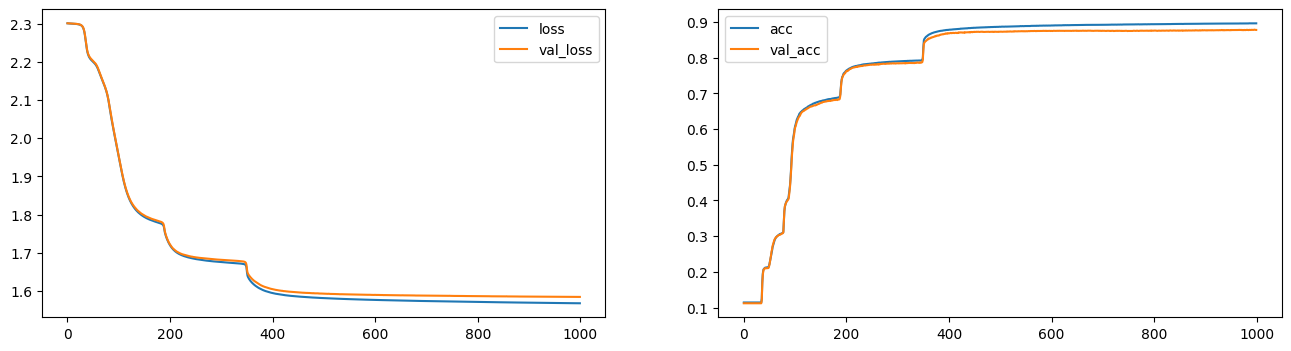

In [160]:
vis_history(acc_train_all_s30000, loss_train_all_s30000, acc_test_all_s30000, loss_test_all_s30000)

# Теперь посмотрим поведение моделей на малом количестве данных
# Размер обучающей выборки 3000

In [29]:
X_mn_train, X_mn_test, y_mn_train, y_mn_test = train_test_split(X_mn_hog[:3000], y_mn_hog.values.astype('uint8')[:3000], test_size=0.2, random_state=42)

# ReLu + нормировка

In [36]:
n_epochs = 100
batch_size = 100
learning_rate = 0.05

X_mn_train = torch.from_numpy(np.array(X_mn_train))
X_mn_test = torch.from_numpy(np.array(X_mn_test))
X_mn_train = X_mn_train.flatten(start_dim=1).float()
X_mn_test = X_mn_test.flatten(start_dim=1).float()
y_mn_train = torch.from_numpy(np.array(y_mn_train))
y_mn_test = torch.from_numpy(np.array(y_mn_test))
print(X_mn_train.size())
D_in = np.array(X_mn_train).shape[1]
print(D_in)
D_out = 10
loss_fn = torch.nn.CrossEntropyLoss()
modelRL = Model_ReLu_n(D_in,200,20,D_out)
acc_train_all_r3000, loss_train_all_r3000, acc_test_all_r3000, loss_test_all_r3000 = modelRL.train(modelRL,n_epochs, batch_size, learning_rate, X_mn_train, y_mn_train, X_mn_test, y_mn_test)

torch.Size([2400, 720])
720


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 376.03it/s]


Epoch 0: 
 Accuracy - train: 0.4895833333333333 | test: 0.49833333333333335 
 Loss - train: 2.206279993057251 | test: 2.2057902812957764


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 379.86it/s]


Epoch 1: 
 Accuracy - train: 0.5775 | test: 0.5933333333333334 
 Loss - train: 2.126765727996826 | test: 2.1271214485168457


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 371.32it/s]


Epoch 2: 
 Accuracy - train: 0.5854166666666667 | test: 0.6016666666666667 
 Loss - train: 2.0648715496063232 | test: 2.066880702972412


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 351.79it/s]


Epoch 3: 
 Accuracy - train: 0.59375 | test: 0.6033333333333334 
 Loss - train: 2.012042760848999 | test: 2.014298915863037


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 389.65it/s]


Epoch 4: 
 Accuracy - train: 0.5991666666666666 | test: 0.6066666666666667 
 Loss - train: 1.97216796875 | test: 1.9749830961227417


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 367.52it/s]


Epoch 5: 
 Accuracy - train: 0.6079166666666667 | test: 0.6116666666666667 
 Loss - train: 1.9430720806121826 | test: 1.9466056823730469


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 374.00it/s]


Epoch 6: 
 Accuracy - train: 0.62 | test: 0.615 
 Loss - train: 1.920155644416809 | test: 1.9249117374420166


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 369.77it/s]


Epoch 7: 
 Accuracy - train: 0.63 | test: 0.6283333333333333 
 Loss - train: 1.8992030620574951 | test: 1.9048378467559814


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 375.77it/s]


Epoch 8: 
 Accuracy - train: 0.6391666666666667 | test: 0.64 
 Loss - train: 1.8771024942398071 | test: 1.8831658363342285


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 376.24it/s]


Epoch 9: 
 Accuracy - train: 0.6479166666666667 | test: 0.645 
 Loss - train: 1.8575154542922974 | test: 1.863624930381775


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 371.00it/s]


Epoch 10: 
 Accuracy - train: 0.6670833333333334 | test: 0.6666666666666666 
 Loss - train: 1.8411139249801636 | test: 1.8473706245422363


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 385.84it/s]


Epoch 11: 
 Accuracy - train: 0.6825 | test: 0.68 
 Loss - train: 1.8273248672485352 | test: 1.8337528705596924


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 388.22it/s]


Epoch 12: 
 Accuracy - train: 0.7004166666666667 | test: 0.7033333333333334 
 Loss - train: 1.814195990562439 | test: 1.8208235502243042


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 388.49it/s]


Epoch 13: 
 Accuracy - train: 0.7204166666666667 | test: 0.7116666666666667 
 Loss - train: 1.7995424270629883 | test: 1.8060424327850342


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 382.28it/s]


Epoch 14: 
 Accuracy - train: 0.7333333333333333 | test: 0.7233333333333334 
 Loss - train: 1.7824724912643433 | test: 1.7877343893051147


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 379.64it/s]


Epoch 15: 
 Accuracy - train: 0.7433333333333333 | test: 0.73 
 Loss - train: 1.7663203477859497 | test: 1.7705907821655273


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 358.09it/s]


Epoch 16: 
 Accuracy - train: 0.7554166666666666 | test: 0.745 
 Loss - train: 1.753702163696289 | test: 1.7573169469833374


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 293.95it/s]


Epoch 17: 
 Accuracy - train: 0.76875 | test: 0.7683333333333333 
 Loss - train: 1.743066430091858 | test: 1.7467527389526367


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 339.16it/s]


Epoch 18: 
 Accuracy - train: 0.7875 | test: 0.7866666666666666 
 Loss - train: 1.733198881149292 | test: 1.7374074459075928


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 423.48it/s]


Epoch 19: 
 Accuracy - train: 0.8129166666666666 | test: 0.805 
 Loss - train: 1.7220364809036255 | test: 1.7275854349136353


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 394.71it/s]


Epoch 20: 
 Accuracy - train: 0.8208333333333333 | test: 0.8133333333333334 
 Loss - train: 1.706821322441101 | test: 1.7139731645584106


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 404.83it/s]


Epoch 21: 
 Accuracy - train: 0.82625 | test: 0.8216666666666667 
 Loss - train: 1.6896941661834717 | test: 1.6993144750595093


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 423.58it/s]


Epoch 22: 
 Accuracy - train: 0.83 | test: 0.8266666666666667 
 Loss - train: 1.6765021085739136 | test: 1.687332272529602


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 411.49it/s]


Epoch 23: 
 Accuracy - train: 0.835 | test: 0.8366666666666667 
 Loss - train: 1.666569471359253 | test: 1.6784571409225464


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 412.42it/s]


Epoch 24: 
 Accuracy - train: 0.8454166666666667 | test: 0.8566666666666667 
 Loss - train: 1.6584633588790894 | test: 1.671106219291687


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 426.08it/s]


Epoch 25: 
 Accuracy - train: 0.86125 | test: 0.8633333333333333 
 Loss - train: 1.6511826515197754 | test: 1.6648956537246704


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 418.69it/s]


Epoch 26: 
 Accuracy - train: 0.87625 | test: 0.87 
 Loss - train: 1.6434884071350098 | test: 1.6580848693847656


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 405.16it/s]


Epoch 27: 
 Accuracy - train: 0.8895833333333333 | test: 0.8916666666666667 
 Loss - train: 1.6341826915740967 | test: 1.6496082544326782


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 405.65it/s]


Epoch 28: 
 Accuracy - train: 0.9020833333333333 | test: 0.8983333333333333 
 Loss - train: 1.6221199035644531 | test: 1.6381233930587769


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 400.39it/s]


Epoch 29: 
 Accuracy - train: 0.9145833333333333 | test: 0.905 
 Loss - train: 1.6091194152832031 | test: 1.6259845495224


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 403.23it/s]


Epoch 30: 
 Accuracy - train: 0.9304166666666667 | test: 0.9166666666666666 
 Loss - train: 1.5977545976638794 | test: 1.6152209043502808


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 412.26it/s]


Epoch 31: 
 Accuracy - train: 0.9491666666666667 | test: 0.93 
 Loss - train: 1.5874019861221313 | test: 1.6062906980514526


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 402.92it/s]


Epoch 32: 
 Accuracy - train: 0.965 | test: 0.9433333333333334 
 Loss - train: 1.5772953033447266 | test: 1.5983505249023438


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 401.57it/s]


Epoch 33: 
 Accuracy - train: 0.9779166666666667 | test: 0.9533333333333334 
 Loss - train: 1.5654776096343994 | test: 1.589849829673767


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 401.32it/s]


Epoch 34: 
 Accuracy - train: 0.9841666666666666 | test: 0.9616666666666667 
 Loss - train: 1.550042748451233 | test: 1.577919840812683


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 412.93it/s]


Epoch 35: 
 Accuracy - train: 0.99 | test: 0.97 
 Loss - train: 1.533261775970459 | test: 1.5648150444030762


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 415.15it/s]


Epoch 36: 
 Accuracy - train: 0.9925 | test: 0.9766666666666667 
 Loss - train: 1.5197267532348633 | test: 1.554025411605835


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 408.37it/s]


Epoch 37: 
 Accuracy - train: 0.99375 | test: 0.9733333333333334 
 Loss - train: 1.5098882913589478 | test: 1.5464564561843872


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 407.03it/s]


Epoch 38: 
 Accuracy - train: 0.995 | test: 0.9733333333333334 
 Loss - train: 1.502366065979004 | test: 1.5415358543395996


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 391.45it/s]


Epoch 39: 
 Accuracy - train: 0.9966666666666667 | test: 0.98 
 Loss - train: 1.4965927600860596 | test: 1.5366318225860596


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 401.69it/s]


Epoch 40: 
 Accuracy - train: 0.9966666666666667 | test: 0.9783333333333334 
 Loss - train: 1.4921926259994507 | test: 1.5333880186080933


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 405.26it/s]


Epoch 41: 
 Accuracy - train: 0.9970833333333333 | test: 0.9766666666666667 
 Loss - train: 1.4885534048080444 | test: 1.531060814857483


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 397.88it/s]


Epoch 42: 
 Accuracy - train: 0.9970833333333333 | test: 0.9766666666666667 
 Loss - train: 1.4856621026992798 | test: 1.528874397277832


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 395.22it/s]


Epoch 43: 
 Accuracy - train: 0.9979166666666667 | test: 0.9766666666666667 
 Loss - train: 1.4831819534301758 | test: 1.5267832279205322


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 401.62it/s]


Epoch 44: 
 Accuracy - train: 0.9979166666666667 | test: 0.975 
 Loss - train: 1.4812804460525513 | test: 1.5254508256912231


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 398.62it/s]


Epoch 45: 
 Accuracy - train: 0.9979166666666667 | test: 0.98 
 Loss - train: 1.4796382188796997 | test: 1.5236355066299438


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 397.44it/s]


Epoch 46: 
 Accuracy - train: 0.9979166666666667 | test: 0.9783333333333334 
 Loss - train: 1.4781807661056519 | test: 1.5220927000045776


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 400.78it/s]


Epoch 47: 
 Accuracy - train: 0.9979166666666667 | test: 0.9766666666666667 
 Loss - train: 1.4769679307937622 | test: 1.5214042663574219


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 396.01it/s]


Epoch 48: 
 Accuracy - train: 0.9979166666666667 | test: 0.9766666666666667 
 Loss - train: 1.4759635925292969 | test: 1.519901156425476


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 393.59it/s]


Epoch 49: 
 Accuracy - train: 0.9979166666666667 | test: 0.98 
 Loss - train: 1.4750069379806519 | test: 1.5185705423355103


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 394.76it/s]


Epoch 50: 
 Accuracy - train: 0.9979166666666667 | test: 0.98 
 Loss - train: 1.4741418361663818 | test: 1.517481803894043


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 407.98it/s]


Epoch 51: 
 Accuracy - train: 0.9983333333333333 | test: 0.9783333333333334 
 Loss - train: 1.4733561277389526 | test: 1.516847848892212


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 401.03it/s]


Epoch 52: 
 Accuracy - train: 0.99875 | test: 0.9783333333333334 
 Loss - train: 1.4726440906524658 | test: 1.5161958932876587


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 407.61it/s]


Epoch 53: 
 Accuracy - train: 0.99875 | test: 0.9783333333333334 
 Loss - train: 1.4719985723495483 | test: 1.5153217315673828


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 396.92it/s]


Epoch 54: 
 Accuracy - train: 0.99875 | test: 0.9783333333333334 
 Loss - train: 1.4713826179504395 | test: 1.5150614976882935


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 404.85it/s]


Epoch 55: 
 Accuracy - train: 0.99875 | test: 0.9783333333333334 
 Loss - train: 1.4708278179168701 | test: 1.51459801197052


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 403.26it/s]


Epoch 56: 
 Accuracy - train: 0.99875 | test: 0.9783333333333334 
 Loss - train: 1.4703395366668701 | test: 1.5138764381408691


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 400.84it/s]


Epoch 57: 
 Accuracy - train: 0.99875 | test: 0.9783333333333334 
 Loss - train: 1.4699360132217407 | test: 1.513394832611084


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 395.63it/s]


Epoch 58: 
 Accuracy - train: 0.9991666666666666 | test: 0.9783333333333334 
 Loss - train: 1.4695361852645874 | test: 1.5128278732299805


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 405.81it/s]


Epoch 59: 
 Accuracy - train: 0.9991666666666666 | test: 0.9783333333333334 
 Loss - train: 1.469099521636963 | test: 1.5118682384490967


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 404.28it/s]


Epoch 60: 
 Accuracy - train: 0.9991666666666666 | test: 0.9783333333333334 
 Loss - train: 1.4687705039978027 | test: 1.5114600658416748


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 405.15it/s]


Epoch 61: 
 Accuracy - train: 0.9991666666666666 | test: 0.9783333333333334 
 Loss - train: 1.4684289693832397 | test: 1.5108132362365723


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 396.97it/s]


Epoch 62: 
 Accuracy - train: 0.9991666666666666 | test: 0.9783333333333334 
 Loss - train: 1.4681309461593628 | test: 1.5106315612792969


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 394.74it/s]


Epoch 63: 
 Accuracy - train: 0.9991666666666666 | test: 0.9783333333333334 
 Loss - train: 1.467872142791748 | test: 1.5103882551193237


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 379.15it/s]


Epoch 64: 
 Accuracy - train: 0.9991666666666666 | test: 0.9783333333333334 
 Loss - train: 1.4676395654678345 | test: 1.5097509622573853


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 405.03it/s]


Epoch 65: 
 Accuracy - train: 0.9991666666666666 | test: 0.9783333333333334 
 Loss - train: 1.4674211740493774 | test: 1.509420394897461


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 379.35it/s]


Epoch 66: 
 Accuracy - train: 0.9991666666666666 | test: 0.9783333333333334 
 Loss - train: 1.467221736907959 | test: 1.5089023113250732


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 382.43it/s]


Epoch 67: 
 Accuracy - train: 0.9991666666666666 | test: 0.98 
 Loss - train: 1.467042088508606 | test: 1.5086466073989868


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 397.46it/s]


Epoch 68: 
 Accuracy - train: 0.9991666666666666 | test: 0.98 
 Loss - train: 1.4668622016906738 | test: 1.5082762241363525


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 385.18it/s]


Epoch 69: 
 Accuracy - train: 0.9991666666666666 | test: 0.9783333333333334 
 Loss - train: 1.4667010307312012 | test: 1.5079199075698853


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 388.64it/s]


Epoch 70: 
 Accuracy - train: 0.9991666666666666 | test: 0.9783333333333334 
 Loss - train: 1.4665535688400269 | test: 1.507723093032837


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 390.15it/s]


Epoch 71: 
 Accuracy - train: 0.9991666666666666 | test: 0.98 
 Loss - train: 1.466400146484375 | test: 1.5072472095489502


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 385.84it/s]


Epoch 72: 
 Accuracy - train: 0.9991666666666666 | test: 0.98 
 Loss - train: 1.4662784337997437 | test: 1.5068001747131348


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 400.83it/s]


Epoch 73: 
 Accuracy - train: 0.9991666666666666 | test: 0.98 
 Loss - train: 1.4661389589309692 | test: 1.506489634513855


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 400.51it/s]


Epoch 74: 
 Accuracy - train: 0.9991666666666666 | test: 0.98 
 Loss - train: 1.4660061597824097 | test: 1.5062531232833862


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 393.90it/s]


Epoch 75: 
 Accuracy - train: 0.9991666666666666 | test: 0.98 
 Loss - train: 1.4658833742141724 | test: 1.505961537361145


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 385.83it/s]


Epoch 76: 
 Accuracy - train: 0.9991666666666666 | test: 0.9816666666666667 
 Loss - train: 1.465773105621338 | test: 1.5058406591415405


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 381.89it/s]


Epoch 77: 
 Accuracy - train: 0.9991666666666666 | test: 0.98 
 Loss - train: 1.4656531810760498 | test: 1.5056850910186768


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 388.42it/s]


Epoch 78: 
 Accuracy - train: 0.9991666666666666 | test: 0.98 
 Loss - train: 1.4655476808547974 | test: 1.505571722984314


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 396.48it/s]


Epoch 79: 
 Accuracy - train: 0.9991666666666666 | test: 0.9783333333333334 
 Loss - train: 1.4654126167297363 | test: 1.505194067955017


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 396.45it/s]


Epoch 80: 
 Accuracy - train: 0.9991666666666666 | test: 0.98 
 Loss - train: 1.465284824371338 | test: 1.5052564144134521


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 395.68it/s]


Epoch 81: 
 Accuracy - train: 0.9995833333333334 | test: 0.98 
 Loss - train: 1.465088129043579 | test: 1.5050045251846313


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 403.24it/s]


Epoch 82: 
 Accuracy - train: 0.9995833333333334 | test: 0.98 
 Loss - train: 1.4649029970169067 | test: 1.5049457550048828


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 404.16it/s]


Epoch 83: 
 Accuracy - train: 0.9995833333333334 | test: 0.98 
 Loss - train: 1.4648070335388184 | test: 1.5046604871749878


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 407.19it/s]


Epoch 84: 
 Accuracy - train: 0.9995833333333334 | test: 0.98 
 Loss - train: 1.4647125005722046 | test: 1.5043666362762451


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 394.74it/s]


Epoch 85: 
 Accuracy - train: 0.9995833333333334 | test: 0.98 
 Loss - train: 1.4646375179290771 | test: 1.5042561292648315


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 391.82it/s]


Epoch 86: 
 Accuracy - train: 0.9995833333333334 | test: 0.98 
 Loss - train: 1.4645648002624512 | test: 1.503860354423523


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 388.21it/s]


Epoch 87: 
 Accuracy - train: 0.9995833333333334 | test: 0.98 
 Loss - train: 1.4644869565963745 | test: 1.5039348602294922


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 387.73it/s]


Epoch 88: 
 Accuracy - train: 0.9995833333333334 | test: 0.9783333333333334 
 Loss - train: 1.4644218683242798 | test: 1.5037683248519897


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 392.04it/s]


Epoch 89: 
 Accuracy - train: 0.9995833333333334 | test: 0.98 
 Loss - train: 1.464357614517212 | test: 1.5036742687225342


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 406.03it/s]


Epoch 90: 
 Accuracy - train: 0.9995833333333334 | test: 0.98 
 Loss - train: 1.464296579360962 | test: 1.5033520460128784


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 388.37it/s]


Epoch 91: 
 Accuracy - train: 0.9995833333333334 | test: 0.98 
 Loss - train: 1.4642350673675537 | test: 1.5031715631484985


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 387.28it/s]


Epoch 92: 
 Accuracy - train: 0.9995833333333334 | test: 0.98 
 Loss - train: 1.4641900062561035 | test: 1.5035513639450073


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 387.39it/s]


Epoch 93: 
 Accuracy - train: 0.9995833333333334 | test: 0.98 
 Loss - train: 1.464126467704773 | test: 1.5032230615615845


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 381.24it/s]


Epoch 94: 
 Accuracy - train: 0.9995833333333334 | test: 0.98 
 Loss - train: 1.4640696048736572 | test: 1.5030311346054077


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 376.45it/s]


Epoch 95: 
 Accuracy - train: 0.9995833333333334 | test: 0.9816666666666667 
 Loss - train: 1.4640204906463623 | test: 1.5026249885559082


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 386.61it/s]


Epoch 96: 
 Accuracy - train: 0.9995833333333334 | test: 0.98 
 Loss - train: 1.4639703035354614 | test: 1.5024880170822144


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 386.56it/s]


Epoch 97: 
 Accuracy - train: 0.9995833333333334 | test: 0.98 
 Loss - train: 1.4639219045639038 | test: 1.5023146867752075


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 391.43it/s]


Epoch 98: 
 Accuracy - train: 0.9995833333333334 | test: 0.98 
 Loss - train: 1.4638761281967163 | test: 1.50240159034729


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 395.05it/s]

Epoch 99: 
 Accuracy - train: 0.9995833333333334 | test: 0.98 
 Loss - train: 1.4638314247131348 | test: 1.5022004842758179


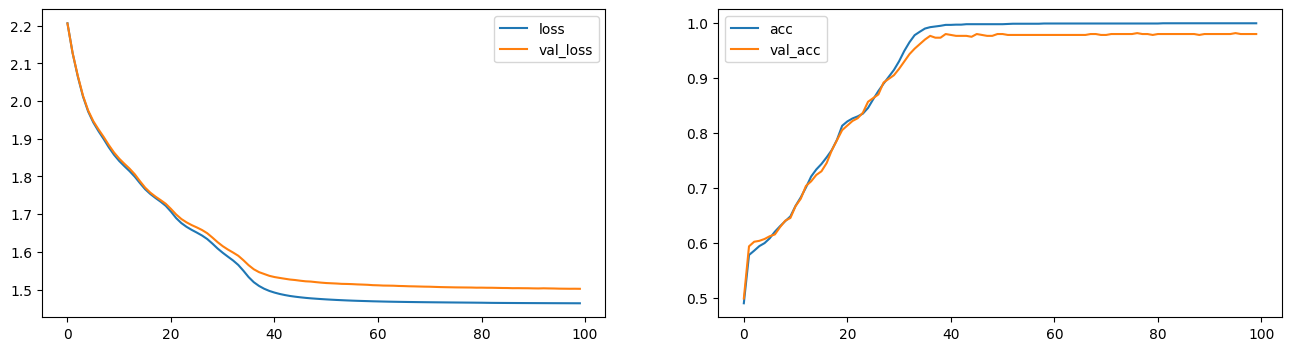

In [37]:
vis_history(acc_train_all_r3000, loss_train_all_r3000, acc_test_all_r3000, loss_test_all_r3000)

# ReLu без нормировки

In [34]:
n_epochs = 200
batch_size = 100
learning_rate = 0.05

X_mn_train = torch.from_numpy(np.array(X_mn_train))
X_mn_test = torch.from_numpy(np.array(X_mn_test))
X_mn_train = X_mn_train.flatten(start_dim=1).float()
X_mn_test = X_mn_test.flatten(start_dim=1).float()
y_mn_train = torch.from_numpy(np.array(y_mn_train))
y_mn_test = torch.from_numpy(np.array(y_mn_test))
print(X_mn_train.size())
D_in = np.array(X_mn_train).shape[1]
print(D_in)
D_out = 10
loss_fn = torch.nn.CrossEntropyLoss()
modelRL = Model_ReLu(D_in,200,20,D_out)
acc_train_all_r3000nn, loss_train_all_r3000nn, acc_test_all_r3000nn, loss_test_all_r3000nn = modelRL.train(modelRL,n_epochs, batch_size, learning_rate, X_mn_train, y_mn_train, X_mn_test, y_mn_test)

torch.Size([2400, 720])
720


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 513.94it/s]


Epoch 0: 
 Accuracy - train: 0.08833333333333333 | test: 0.115 
 Loss - train: 2.3023948669433594 | test: 2.3019750118255615


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 584.24it/s]


Epoch 1: 
 Accuracy - train: 0.10708333333333334 | test: 0.13 
 Loss - train: 2.302210807800293 | test: 2.301802396774292


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 567.69it/s]


Epoch 2: 
 Accuracy - train: 0.125 | test: 0.14 
 Loss - train: 2.30202054977417 | test: 2.3016226291656494


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 548.87it/s]


Epoch 3: 
 Accuracy - train: 0.12958333333333333 | test: 0.155 
 Loss - train: 2.301823854446411 | test: 2.301438808441162


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 586.04it/s]


Epoch 4: 
 Accuracy - train: 0.135 | test: 0.15833333333333333 
 Loss - train: 2.301621437072754 | test: 2.301250457763672


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 587.04it/s]


Epoch 5: 
 Accuracy - train: 0.145 | test: 0.16166666666666665 
 Loss - train: 2.301413059234619 | test: 2.3010571002960205


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 575.91it/s]


Epoch 6: 
 Accuracy - train: 0.155 | test: 0.17 
 Loss - train: 2.301197052001953 | test: 2.300856828689575


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 604.46it/s]


Epoch 7: 
 Accuracy - train: 0.16416666666666666 | test: 0.17666666666666667 
 Loss - train: 2.300971031188965 | test: 2.300649404525757


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 575.20it/s]


Epoch 8: 
 Accuracy - train: 0.17833333333333334 | test: 0.18833333333333332 
 Loss - train: 2.300734043121338 | test: 2.300431966781616


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 594.04it/s]


Epoch 9: 
 Accuracy - train: 0.18916666666666668 | test: 0.19333333333333333 
 Loss - train: 2.3004839420318604 | test: 2.300201416015625


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 608.28it/s]


Epoch 10: 
 Accuracy - train: 0.20166666666666666 | test: 0.19833333333333333 
 Loss - train: 2.300217628479004 | test: 2.2999558448791504


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 601.73it/s]


Epoch 11: 
 Accuracy - train: 0.21 | test: 0.20666666666666667 
 Loss - train: 2.2999355792999268 | test: 2.2996950149536133


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 571.14it/s]


Epoch 12: 
 Accuracy - train: 0.22416666666666665 | test: 0.225 
 Loss - train: 2.299636125564575 | test: 2.2994163036346436


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 588.86it/s]


Epoch 13: 
 Accuracy - train: 0.23208333333333334 | test: 0.23166666666666666 
 Loss - train: 2.299323081970215 | test: 2.2991249561309814


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 577.72it/s]


Epoch 14: 
 Accuracy - train: 0.24291666666666667 | test: 0.24166666666666667 
 Loss - train: 2.298994302749634 | test: 2.298819065093994


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 618.85it/s]


Epoch 15: 
 Accuracy - train: 0.2579166666666667 | test: 0.24833333333333332 
 Loss - train: 2.2986533641815186 | test: 2.2985012531280518


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 617.44it/s]


Epoch 16: 
 Accuracy - train: 0.27375 | test: 0.2633333333333333 
 Loss - train: 2.2983009815216064 | test: 2.298171281814575


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 609.28it/s]


Epoch 17: 
 Accuracy - train: 0.2925 | test: 0.2816666666666667 
 Loss - train: 2.2979347705841064 | test: 2.2978293895721436


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 603.23it/s]


Epoch 18: 
 Accuracy - train: 0.30666666666666664 | test: 0.28833333333333333 
 Loss - train: 2.297551155090332 | test: 2.2974722385406494


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 600.37it/s]


Epoch 19: 
 Accuracy - train: 0.31916666666666665 | test: 0.31 
 Loss - train: 2.297147750854492 | test: 2.2970967292785645


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 633.68it/s]


Epoch 20: 
 Accuracy - train: 0.3329166666666667 | test: 0.325 
 Loss - train: 2.296721935272217 | test: 2.2966997623443604


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 594.39it/s]


Epoch 21: 
 Accuracy - train: 0.3433333333333333 | test: 0.34 
 Loss - train: 2.2962706089019775 | test: 2.2962777614593506


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 587.33it/s]


Epoch 22: 
 Accuracy - train: 0.35375 | test: 0.35 
 Loss - train: 2.2957887649536133 | test: 2.295825242996216


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 609.41it/s]


Epoch 23: 
 Accuracy - train: 0.36 | test: 0.35833333333333334 
 Loss - train: 2.295273780822754 | test: 2.295342206954956


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 602.01it/s]


Epoch 24: 
 Accuracy - train: 0.36916666666666664 | test: 0.36833333333333335 
 Loss - train: 2.294722318649292 | test: 2.2948250770568848


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 611.29it/s]


Epoch 25: 
 Accuracy - train: 0.37583333333333335 | test: 0.37333333333333335 
 Loss - train: 2.2941324710845947 | test: 2.294271945953369


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 602.01it/s]


Epoch 26: 
 Accuracy - train: 0.37916666666666665 | test: 0.37833333333333335 
 Loss - train: 2.293499708175659 | test: 2.2936792373657227


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 594.41it/s]


Epoch 27: 
 Accuracy - train: 0.38166666666666665 | test: 0.37833333333333335 
 Loss - train: 2.2928214073181152 | test: 2.293044328689575


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 587.32it/s]


Epoch 28: 
 Accuracy - train: 0.38625 | test: 0.38 
 Loss - train: 2.292092800140381 | test: 2.2923614978790283


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 594.86it/s]


Epoch 29: 
 Accuracy - train: 0.38458333333333333 | test: 0.37833333333333335 
 Loss - train: 2.291306495666504 | test: 2.2916228771209717


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 611.39it/s]


Epoch 30: 
 Accuracy - train: 0.38458333333333333 | test: 0.37666666666666665 
 Loss - train: 2.2904553413391113 | test: 2.2908246517181396


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 594.42it/s]


Epoch 31: 
 Accuracy - train: 0.38208333333333333 | test: 0.36666666666666664 
 Loss - train: 2.2895305156707764 | test: 2.2899551391601562


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 587.32it/s]


Epoch 32: 
 Accuracy - train: 0.3729166666666667 | test: 0.35833333333333334 
 Loss - train: 2.2885220050811768 | test: 2.289008617401123


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 601.95it/s]


Epoch 33: 
 Accuracy - train: 0.3675 | test: 0.35333333333333333 
 Loss - train: 2.2874178886413574 | test: 2.2879714965820312


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 587.32it/s]


Epoch 34: 
 Accuracy - train: 0.35791666666666666 | test: 0.3416666666666667 
 Loss - train: 2.2862043380737305 | test: 2.2868311405181885


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 596.50it/s]


Epoch 35: 
 Accuracy - train: 0.3525 | test: 0.33666666666666667 
 Loss - train: 2.2848620414733887 | test: 2.285568952560425


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 587.77it/s]


Epoch 36: 
 Accuracy - train: 0.35041666666666665 | test: 0.335 
 Loss - train: 2.2833690643310547 | test: 2.2841665744781494


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 594.37it/s]


Epoch 37: 
 Accuracy - train: 0.33958333333333335 | test: 0.3283333333333333 
 Loss - train: 2.281696081161499 | test: 2.282597780227661


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 607.73it/s]


Epoch 38: 
 Accuracy - train: 0.32958333333333334 | test: 0.32 
 Loss - train: 2.279803991317749 | test: 2.2808263301849365


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 590.40it/s]


Epoch 39: 
 Accuracy - train: 0.31958333333333333 | test: 0.30333333333333334 
 Loss - train: 2.277644634246826 | test: 2.278806447982788


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 514.44it/s]


Epoch 40: 
 Accuracy - train: 0.3104166666666667 | test: 0.29 
 Loss - train: 2.2751481533050537 | test: 2.2764759063720703


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 643.51it/s]


Epoch 41: 
 Accuracy - train: 0.29875 | test: 0.2866666666666667 
 Loss - train: 2.272221565246582 | test: 2.273749351501465


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 606.89it/s]


Epoch 42: 
 Accuracy - train: 0.28625 | test: 0.275 
 Loss - train: 2.2687301635742188 | test: 2.2705042362213135


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 580.23it/s]


Epoch 43: 
 Accuracy - train: 0.2708333333333333 | test: 0.25166666666666665 
 Loss - train: 2.2644753456115723 | test: 2.2665634155273438


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 579.36it/s]


Epoch 44: 
 Accuracy - train: 0.24875 | test: 0.23 
 Loss - train: 2.2591683864593506 | test: 2.261664867401123


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 558.61it/s]


Epoch 45: 
 Accuracy - train: 0.23083333333333333 | test: 0.215 
 Loss - train: 2.252380132675171 | test: 2.2554209232330322


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 539.23it/s]


Epoch 46: 
 Accuracy - train: 0.21875 | test: 0.20666666666666667 
 Loss - train: 2.243518590927124 | test: 2.247309446334839


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 567.61it/s]


Epoch 47: 
 Accuracy - train: 0.215 | test: 0.20333333333333334 
 Loss - train: 2.232012987136841 | test: 2.2368111610412598


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 560.32it/s]


Epoch 48: 
 Accuracy - train: 0.21333333333333335 | test: 0.20166666666666666 
 Loss - train: 2.2179574966430664 | test: 2.2240397930145264


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 574.06it/s]


Epoch 49: 
 Accuracy - train: 0.21291666666666667 | test: 0.20166666666666666 
 Loss - train: 2.2030158042907715 | test: 2.2104902267456055


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 575.04it/s]


Epoch 50: 
 Accuracy - train: 0.2125 | test: 0.20166666666666666 
 Loss - train: 2.1898512840270996 | test: 2.1984164714813232


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 609.45it/s]


Epoch 51: 
 Accuracy - train: 0.21333333333333335 | test: 0.20333333333333334 
 Loss - train: 2.1790730953216553 | test: 2.1883316040039062


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 589.30it/s]


Epoch 52: 
 Accuracy - train: 0.22583333333333333 | test: 0.21166666666666667 
 Loss - train: 2.1698081493377686 | test: 2.179506778717041


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 614.67it/s]


Epoch 53: 
 Accuracy - train: 0.25 | test: 0.23 
 Loss - train: 2.161055326461792 | test: 2.1710283756256104


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 600.72it/s]


Epoch 54: 
 Accuracy - train: 0.27458333333333335 | test: 0.26166666666666666 
 Loss - train: 2.152407169342041 | test: 2.1626744270324707


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 599.43it/s]


Epoch 55: 
 Accuracy - train: 0.29375 | test: 0.27666666666666667 
 Loss - train: 2.1440012454986572 | test: 2.1546154022216797


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 571.01it/s]


Epoch 56: 
 Accuracy - train: 0.3025 | test: 0.2833333333333333 
 Loss - train: 2.1359622478485107 | test: 2.146831750869751


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 630.54it/s]


Epoch 57: 
 Accuracy - train: 0.30666666666666664 | test: 0.2866666666666667 
 Loss - train: 2.128418207168579 | test: 2.1394951343536377


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 592.28it/s]


Epoch 58: 
 Accuracy - train: 0.3104166666666667 | test: 0.29333333333333333 
 Loss - train: 2.1212947368621826 | test: 2.132544755935669


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 557.80it/s]


Epoch 59: 
 Accuracy - train: 0.31833333333333336 | test: 0.29833333333333334 
 Loss - train: 2.1145191192626953 | test: 2.1258318424224854


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 596.86it/s]


Epoch 60: 
 Accuracy - train: 0.33125 | test: 0.3233333333333333 
 Loss - train: 2.1079444885253906 | test: 2.11921763420105


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 601.97it/s]


Epoch 61: 
 Accuracy - train: 0.35041666666666665 | test: 0.3416666666666667 
 Loss - train: 2.1013240814208984 | test: 2.112588882446289


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 602.01it/s]


Epoch 62: 
 Accuracy - train: 0.36791666666666667 | test: 0.36666666666666664 
 Loss - train: 2.0945210456848145 | test: 2.105518102645874


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 587.27it/s]


Epoch 63: 
 Accuracy - train: 0.385 | test: 0.385 
 Loss - train: 2.0872795581817627 | test: 2.0979206562042236


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 604.29it/s]


Epoch 64: 
 Accuracy - train: 0.41 | test: 0.4083333333333333 
 Loss - train: 2.0792558193206787 | test: 2.0892722606658936


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 600.95it/s]


Epoch 65: 
 Accuracy - train: 0.4375 | test: 0.42833333333333334 
 Loss - train: 2.070077419281006 | test: 2.0793285369873047


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 578.45it/s]


Epoch 66: 
 Accuracy - train: 0.4575 | test: 0.45 
 Loss - train: 2.0593514442443848 | test: 2.067636013031006


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 617.40it/s]


Epoch 67: 
 Accuracy - train: 0.47125 | test: 0.4766666666666667 
 Loss - train: 2.04685640335083 | test: 2.053497552871704


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 580.10it/s]


Epoch 68: 
 Accuracy - train: 0.4791666666666667 | test: 0.47833333333333333 
 Loss - train: 2.0330724716186523 | test: 2.038431167602539


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 602.01it/s]


Epoch 69: 
 Accuracy - train: 0.48833333333333334 | test: 0.49333333333333335 
 Loss - train: 2.019066095352173 | test: 2.022922992706299


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 589.34it/s]


Epoch 70: 
 Accuracy - train: 0.49833333333333335 | test: 0.5066666666666667 
 Loss - train: 2.0055325031280518 | test: 2.0075902938842773


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 587.32it/s]


Epoch 71: 
 Accuracy - train: 0.5141666666666667 | test: 0.53 
 Loss - train: 1.992842435836792 | test: 1.993952989578247


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 609.47it/s]


Epoch 72: 
 Accuracy - train: 0.53125 | test: 0.5483333333333333 
 Loss - train: 1.9806829690933228 | test: 1.981863021850586


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 602.01it/s]


Epoch 73: 
 Accuracy - train: 0.5591666666666667 | test: 0.5666666666666667 
 Loss - train: 1.9682787656784058 | test: 1.9688271284103394


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 609.49it/s]


Epoch 74: 
 Accuracy - train: 0.575 | test: 0.5816666666666667 
 Loss - train: 1.9556288719177246 | test: 1.9566981792449951


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 602.00it/s]


Epoch 75: 
 Accuracy - train: 0.5841666666666666 | test: 0.5933333333333334 
 Loss - train: 1.9430075883865356 | test: 1.944667100906372


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 618.94it/s]


Epoch 76: 
 Accuracy - train: 0.5904166666666667 | test: 0.6 
 Loss - train: 1.9307489395141602 | test: 1.9327651262283325


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 603.36it/s]


Epoch 77: 
 Accuracy - train: 0.6079166666666667 | test: 0.6033333333333334 
 Loss - train: 1.9184889793395996 | test: 1.9222112894058228


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 596.40it/s]


Epoch 78: 
 Accuracy - train: 0.6195833333333334 | test: 0.615 
 Loss - train: 1.9064728021621704 | test: 1.9113562107086182


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 613.13it/s]


Epoch 79: 
 Accuracy - train: 0.6408333333333334 | test: 0.6333333333333333 
 Loss - train: 1.8945090770721436 | test: 1.9013994932174683


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 623.64it/s]


Epoch 80: 
 Accuracy - train: 0.6570833333333334 | test: 0.65 
 Loss - train: 1.882755994796753 | test: 1.8909900188446045


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 609.60it/s]


Epoch 81: 
 Accuracy - train: 0.67125 | test: 0.6533333333333333 
 Loss - train: 1.8712475299835205 | test: 1.8812143802642822


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 659.49it/s]


Epoch 82: 
 Accuracy - train: 0.6770833333333334 | test: 0.6616666666666666 
 Loss - train: 1.8601417541503906 | test: 1.8715696334838867


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 617.45it/s]


Epoch 83: 
 Accuracy - train: 0.6825 | test: 0.6683333333333333 
 Loss - train: 1.8496571779251099 | test: 1.8621482849121094


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 609.45it/s]


Epoch 84: 
 Accuracy - train: 0.6870833333333334 | test: 0.67 
 Loss - train: 1.839914321899414 | test: 1.8531534671783447


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 602.01it/s]


Epoch 85: 
 Accuracy - train: 0.6895833333333333 | test: 0.6716666666666666 
 Loss - train: 1.8311767578125 | test: 1.8449105024337769


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 617.40it/s]


Epoch 86: 
 Accuracy - train: 0.6929166666666666 | test: 0.6716666666666666 
 Loss - train: 1.8230997323989868 | test: 1.8376890420913696


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 617.45it/s]


Epoch 87: 
 Accuracy - train: 0.6941666666666667 | test: 0.67 
 Loss - train: 1.8159865140914917 | test: 1.83130943775177


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 617.38it/s]


Epoch 88: 
 Accuracy - train: 0.6945833333333333 | test: 0.6733333333333333 
 Loss - train: 1.8098515272140503 | test: 1.825524091720581


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 602.02it/s]


Epoch 89: 
 Accuracy - train: 0.69625 | test: 0.675 
 Loss - train: 1.8043469190597534 | test: 1.820672631263733


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 617.41it/s]


Epoch 90: 
 Accuracy - train: 0.6970833333333334 | test: 0.6716666666666666 
 Loss - train: 1.799668788909912 | test: 1.816277027130127


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 616.34it/s]


Epoch 91: 
 Accuracy - train: 0.69875 | test: 0.68 
 Loss - train: 1.795501708984375 | test: 1.8122129440307617


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 601.97it/s]


Epoch 92: 
 Accuracy - train: 0.7008333333333333 | test: 0.675 
 Loss - train: 1.7916866540908813 | test: 1.8088188171386719


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 594.40it/s]


Epoch 93: 
 Accuracy - train: 0.7025 | test: 0.68 
 Loss - train: 1.788313388824463 | test: 1.8056323528289795


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 602.00it/s]


Epoch 94: 
 Accuracy - train: 0.7020833333333333 | test: 0.6783333333333333 
 Loss - train: 1.7853951454162598 | test: 1.8030153512954712


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 625.29it/s]


Epoch 95: 
 Accuracy - train: 0.70125 | test: 0.6833333333333333 
 Loss - train: 1.7829828262329102 | test: 1.8006188869476318


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 601.94it/s]


Epoch 96: 
 Accuracy - train: 0.7033333333333334 | test: 0.6833333333333333 
 Loss - train: 1.780457615852356 | test: 1.798282504081726


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 590.90it/s]


Epoch 97: 
 Accuracy - train: 0.705 | test: 0.6816666666666666 
 Loss - train: 1.7778812646865845 | test: 1.7959861755371094


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 613.84it/s]


Epoch 98: 
 Accuracy - train: 0.70625 | test: 0.6833333333333333 
 Loss - train: 1.7757291793823242 | test: 1.7940385341644287


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 599.05it/s]


Epoch 99: 
 Accuracy - train: 0.70625 | test: 0.685 
 Loss - train: 1.7736879587173462 | test: 1.7922337055206299


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 602.17it/s]


Epoch 100: 
 Accuracy - train: 0.7066666666666667 | test: 0.6833333333333333 
 Loss - train: 1.7713735103607178 | test: 1.7900370359420776


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 599.87it/s]


Epoch 101: 
 Accuracy - train: 0.7075 | test: 0.685 
 Loss - train: 1.7686456441879272 | test: 1.7869760990142822


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 613.35it/s]


Epoch 102: 
 Accuracy - train: 0.70875 | test: 0.6833333333333333 
 Loss - train: 1.7639349699020386 | test: 1.7814826965332031


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 621.72it/s]


Epoch 103: 
 Accuracy - train: 0.7408333333333333 | test: 0.7166666666666667 
 Loss - train: 1.750999093055725 | test: 1.7646055221557617


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 590.12it/s]


Epoch 104: 
 Accuracy - train: 0.76375 | test: 0.7516666666666667 
 Loss - train: 1.7408441305160522 | test: 1.7492505311965942


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 594.36it/s]


Epoch 105: 
 Accuracy - train: 0.76625 | test: 0.76 
 Loss - train: 1.7364487648010254 | test: 1.7435368299484253


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 617.45it/s]


Epoch 106: 
 Accuracy - train: 0.7658333333333334 | test: 0.76 
 Loss - train: 1.7324104309082031 | test: 1.739759922027588


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 594.35it/s]


Epoch 107: 
 Accuracy - train: 0.7679166666666667 | test: 0.7616666666666667 
 Loss - train: 1.728373646736145 | test: 1.7351914644241333


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 617.45it/s]


Epoch 108: 
 Accuracy - train: 0.7729166666666667 | test: 0.7666666666666667 
 Loss - train: 1.724827527999878 | test: 1.7299188375473022


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 594.35it/s]


Epoch 109: 
 Accuracy - train: 0.7729166666666667 | test: 0.7733333333333333 
 Loss - train: 1.721527099609375 | test: 1.7258703708648682


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 602.11it/s]


Epoch 110: 
 Accuracy - train: 0.7766666666666666 | test: 0.7716666666666666 
 Loss - train: 1.718274712562561 | test: 1.7230768203735352


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 575.53it/s]


Epoch 111: 
 Accuracy - train: 0.7779166666666667 | test: 0.77 
 Loss - train: 1.7154974937438965 | test: 1.72046959400177


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 587.24it/s]


Epoch 112: 
 Accuracy - train: 0.7795833333333333 | test: 0.7766666666666666 
 Loss - train: 1.7126933336257935 | test: 1.7168619632720947


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 592.78it/s]


Epoch 113: 
 Accuracy - train: 0.7795833333333333 | test: 0.7783333333333333 
 Loss - train: 1.7101515531539917 | test: 1.714666485786438


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 578.92it/s]


Epoch 114: 
 Accuracy - train: 0.7804166666666666 | test: 0.7783333333333333 
 Loss - train: 1.7077610492706299 | test: 1.7118483781814575


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 539.45it/s]


Epoch 115: 
 Accuracy - train: 0.7820833333333334 | test: 0.7766666666666666 
 Loss - train: 1.7056523561477661 | test: 1.7099534273147583


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 573.46it/s]


Epoch 116: 
 Accuracy - train: 0.7825 | test: 0.7833333333333333 
 Loss - train: 1.7035307884216309 | test: 1.7075992822647095


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 571.85it/s]


Epoch 117: 
 Accuracy - train: 0.7829166666666667 | test: 0.7816666666666666 
 Loss - train: 1.7016350030899048 | test: 1.7050424814224243


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 558.44it/s]


Epoch 118: 
 Accuracy - train: 0.7829166666666667 | test: 0.785 
 Loss - train: 1.6998510360717773 | test: 1.7032692432403564


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 584.40it/s]


Epoch 119: 
 Accuracy - train: 0.7841666666666667 | test: 0.785 
 Loss - train: 1.6980544328689575 | test: 1.7021514177322388


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 588.95it/s]


Epoch 120: 
 Accuracy - train: 0.785 | test: 0.785 
 Loss - train: 1.6964714527130127 | test: 1.6999480724334717


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 582.51it/s]


Epoch 121: 
 Accuracy - train: 0.7854166666666667 | test: 0.785 
 Loss - train: 1.694996953010559 | test: 1.6987929344177246


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 586.48it/s]


Epoch 122: 
 Accuracy - train: 0.78875 | test: 0.7866666666666666 
 Loss - train: 1.693534016609192 | test: 1.6972558498382568


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 611.53it/s]


Epoch 123: 
 Accuracy - train: 0.7875 | test: 0.7866666666666666 
 Loss - train: 1.6922521591186523 | test: 1.6964627504348755


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 571.17it/s]


Epoch 124: 
 Accuracy - train: 0.7883333333333333 | test: 0.7866666666666666 
 Loss - train: 1.6910078525543213 | test: 1.694962739944458


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 624.87it/s]


Epoch 125: 
 Accuracy - train: 0.7904166666666667 | test: 0.7883333333333333 
 Loss - train: 1.6895534992218018 | test: 1.6937464475631714


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 608.03it/s]


Epoch 126: 
 Accuracy - train: 0.79125 | test: 0.79 
 Loss - train: 1.6884042024612427 | test: 1.6927757263183594


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 626.40it/s]


Epoch 127: 
 Accuracy - train: 0.7916666666666666 | test: 0.7866666666666666 
 Loss - train: 1.6872565746307373 | test: 1.691313624382019


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 618.34it/s]


Epoch 128: 
 Accuracy - train: 0.7916666666666666 | test: 0.7883333333333333 
 Loss - train: 1.6861677169799805 | test: 1.6904754638671875


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 645.62it/s]


Epoch 129: 
 Accuracy - train: 0.7929166666666667 | test: 0.7883333333333333 
 Loss - train: 1.685268521308899 | test: 1.6898688077926636


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 587.31it/s]


Epoch 130: 
 Accuracy - train: 0.79125 | test: 0.7916666666666666 
 Loss - train: 1.6841940879821777 | test: 1.6889475584030151


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 599.83it/s]


Epoch 131: 
 Accuracy - train: 0.7933333333333333 | test: 0.79 
 Loss - train: 1.6831732988357544 | test: 1.687717318534851


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 594.94it/s]


Epoch 132: 
 Accuracy - train: 0.79375 | test: 0.7883333333333333 
 Loss - train: 1.6822110414505005 | test: 1.6867754459381104


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 591.43it/s]


Epoch 133: 
 Accuracy - train: 0.79375 | test: 0.7916666666666666 
 Loss - train: 1.6813660860061646 | test: 1.6858237981796265


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 600.63it/s]


Epoch 134: 
 Accuracy - train: 0.7941666666666667 | test: 0.79 
 Loss - train: 1.680409550666809 | test: 1.6852294206619263


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 591.14it/s]


Epoch 135: 
 Accuracy - train: 0.795 | test: 0.7916666666666666 
 Loss - train: 1.6795427799224854 | test: 1.6841961145401


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 602.01it/s]


Epoch 136: 
 Accuracy - train: 0.7958333333333333 | test: 0.79 
 Loss - train: 1.6786723136901855 | test: 1.6838595867156982


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 572.19it/s]


Epoch 137: 
 Accuracy - train: 0.79625 | test: 0.79 
 Loss - train: 1.6776825189590454 | test: 1.6829109191894531


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 595.45it/s]


Epoch 138: 
 Accuracy - train: 0.79625 | test: 0.79 
 Loss - train: 1.6766459941864014 | test: 1.6815599203109741


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 594.70it/s]


Epoch 139: 
 Accuracy - train: 0.7975 | test: 0.79 
 Loss - train: 1.6755332946777344 | test: 1.6804782152175903


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 603.61it/s]


Epoch 140: 
 Accuracy - train: 0.7975 | test: 0.79 
 Loss - train: 1.6741423606872559 | test: 1.678862452507019


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 578.59it/s]


Epoch 141: 
 Accuracy - train: 0.7975 | test: 0.7916666666666666 
 Loss - train: 1.6723064184188843 | test: 1.6769218444824219


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 594.42it/s]


Epoch 142: 
 Accuracy - train: 0.7991666666666667 | test: 0.7916666666666666 
 Loss - train: 1.6689149141311646 | test: 1.673102617263794


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 579.33it/s]


Epoch 143: 
 Accuracy - train: 0.8058333333333333 | test: 0.7966666666666666 
 Loss - train: 1.6604766845703125 | test: 1.6635398864746094


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 562.71it/s]


Epoch 144: 
 Accuracy - train: 0.8645833333333334 | test: 0.865 
 Loss - train: 1.637404203414917 | test: 1.640168309211731


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 569.32it/s]


Epoch 145: 
 Accuracy - train: 0.8941666666666667 | test: 0.875 
 Loss - train: 1.623271107673645 | test: 1.6266558170318604


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 601.87it/s]


Epoch 146: 
 Accuracy - train: 0.9079166666666667 | test: 0.885 
 Loss - train: 1.6151396036148071 | test: 1.6191070079803467


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 578.51it/s]


Epoch 147: 
 Accuracy - train: 0.9154166666666667 | test: 0.8983333333333333 
 Loss - train: 1.6078461408615112 | test: 1.6113349199295044


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 573.33it/s]


Epoch 148: 
 Accuracy - train: 0.9225 | test: 0.8983333333333333 
 Loss - train: 1.601190447807312 | test: 1.6054141521453857


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 583.39it/s]


Epoch 149: 
 Accuracy - train: 0.92375 | test: 0.905 
 Loss - train: 1.5951255559921265 | test: 1.5992990732192993


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 617.55it/s]


Epoch 150: 
 Accuracy - train: 0.92625 | test: 0.9083333333333333 
 Loss - train: 1.58927321434021 | test: 1.5925954580307007


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 623.16it/s]


Epoch 151: 
 Accuracy - train: 0.925 | test: 0.905 
 Loss - train: 1.5845451354980469 | test: 1.589745044708252


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 601.90it/s]


Epoch 152: 
 Accuracy - train: 0.9308333333333333 | test: 0.9216666666666666 
 Loss - train: 1.579433798789978 | test: 1.5844591856002808


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 607.79it/s]


Epoch 153: 
 Accuracy - train: 0.9320833333333334 | test: 0.9233333333333333 
 Loss - train: 1.5749841928482056 | test: 1.5793273448944092


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 596.85it/s]


Epoch 154: 
 Accuracy - train: 0.9354166666666667 | test: 0.925 
 Loss - train: 1.5711971521377563 | test: 1.5764596462249756


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 620.28it/s]


Epoch 155: 
 Accuracy - train: 0.9370833333333334 | test: 0.925 
 Loss - train: 1.5675153732299805 | test: 1.5724481344223022


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 587.28it/s]


Epoch 156: 
 Accuracy - train: 0.9366666666666666 | test: 0.9266666666666666 
 Loss - train: 1.564820408821106 | test: 1.5701645612716675


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 602.32it/s]


Epoch 157: 
 Accuracy - train: 0.9395833333333333 | test: 0.9316666666666666 
 Loss - train: 1.561320424079895 | test: 1.5671234130859375


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 611.91it/s]


Epoch 158: 
 Accuracy - train: 0.9416666666666667 | test: 0.9283333333333333 
 Loss - train: 1.558527946472168 | test: 1.5639010667800903


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 617.38it/s]


Epoch 159: 
 Accuracy - train: 0.9425 | test: 0.9333333333333333 
 Loss - train: 1.555829405784607 | test: 1.5620554685592651


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 615.94it/s]


Epoch 160: 
 Accuracy - train: 0.9404166666666667 | test: 0.9366666666666666 
 Loss - train: 1.5537363290786743 | test: 1.560121774673462


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 609.70it/s]


Epoch 161: 
 Accuracy - train: 0.94375 | test: 0.9333333333333333 
 Loss - train: 1.5512115955352783 | test: 1.5573748350143433


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 576.88it/s]


Epoch 162: 
 Accuracy - train: 0.945 | test: 0.9333333333333333 
 Loss - train: 1.549002766609192 | test: 1.5552496910095215


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 595.71it/s]


Epoch 163: 
 Accuracy - train: 0.9454166666666667 | test: 0.9383333333333334 
 Loss - train: 1.5469166040420532 | test: 1.5538643598556519


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 651.44it/s]


Epoch 164: 
 Accuracy - train: 0.9466666666666667 | test: 0.9383333333333334 
 Loss - train: 1.5449422597885132 | test: 1.551861047744751


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 636.98it/s]


Epoch 165: 
 Accuracy - train: 0.9475 | test: 0.9416666666666667 
 Loss - train: 1.5432099103927612 | test: 1.5500916242599487


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 625.25it/s]


Epoch 166: 
 Accuracy - train: 0.9483333333333334 | test: 0.94 
 Loss - train: 1.5413726568222046 | test: 1.5491307973861694


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 617.44it/s]


Epoch 167: 
 Accuracy - train: 0.94875 | test: 0.9383333333333334 
 Loss - train: 1.5399482250213623 | test: 1.547808051109314


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 609.42it/s]


Epoch 168: 
 Accuracy - train: 0.9504166666666667 | test: 0.94 
 Loss - train: 1.5383573770523071 | test: 1.5461137294769287


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 633.69it/s]


Epoch 169: 
 Accuracy - train: 0.9525 | test: 0.9433333333333334 
 Loss - train: 1.5367012023925781 | test: 1.5447189807891846


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 614.38it/s]


Epoch 170: 
 Accuracy - train: 0.9508333333333333 | test: 0.9416666666666667 
 Loss - train: 1.535454511642456 | test: 1.5441515445709229


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 600.52it/s]


Epoch 171: 
 Accuracy - train: 0.9529166666666666 | test: 0.9433333333333334 
 Loss - train: 1.5339577198028564 | test: 1.5427218675613403


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 607.83it/s]


Epoch 172: 
 Accuracy - train: 0.9520833333333333 | test: 0.9466666666666667 
 Loss - train: 1.532611608505249 | test: 1.5422104597091675


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 602.20it/s]


Epoch 173: 
 Accuracy - train: 0.9545833333333333 | test: 0.95 
 Loss - train: 1.5312730073928833 | test: 1.5400837659835815


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 622.69it/s]


Epoch 174: 
 Accuracy - train: 0.95375 | test: 0.9466666666666667 
 Loss - train: 1.530144214630127 | test: 1.5398770570755005


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 602.01it/s]


Epoch 175: 
 Accuracy - train: 0.955 | test: 0.9416666666666667 
 Loss - train: 1.528997540473938 | test: 1.539581537246704


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 609.41it/s]


Epoch 176: 
 Accuracy - train: 0.95625 | test: 0.95 
 Loss - train: 1.5276914834976196 | test: 1.5377542972564697


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 604.38it/s]


Epoch 177: 
 Accuracy - train: 0.9575 | test: 0.9483333333333334 
 Loss - train: 1.5265141725540161 | test: 1.5368218421936035


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 600.78it/s]


Epoch 178: 
 Accuracy - train: 0.9579166666666666 | test: 0.9533333333333334 
 Loss - train: 1.525525450706482 | test: 1.5355879068374634


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 602.10it/s]


Epoch 179: 
 Accuracy - train: 0.9604166666666667 | test: 0.95 
 Loss - train: 1.5245510339736938 | test: 1.5346726179122925


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 569.03it/s]


Epoch 180: 
 Accuracy - train: 0.9608333333333333 | test: 0.945 
 Loss - train: 1.5235177278518677 | test: 1.5345863103866577


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 611.31it/s]


Epoch 181: 
 Accuracy - train: 0.96125 | test: 0.9483333333333334 
 Loss - train: 1.5225428342819214 | test: 1.5330036878585815


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 601.97it/s]


Epoch 182: 
 Accuracy - train: 0.9620833333333333 | test: 0.9433333333333334 
 Loss - train: 1.5216248035430908 | test: 1.533313274383545


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 586.63it/s]


Epoch 183: 
 Accuracy - train: 0.9629166666666666 | test: 0.9433333333333334 
 Loss - train: 1.5207366943359375 | test: 1.5324212312698364


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 604.86it/s]


Epoch 184: 
 Accuracy - train: 0.9641666666666666 | test: 0.9483333333333334 
 Loss - train: 1.5198280811309814 | test: 1.5318050384521484


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 584.15it/s]


Epoch 185: 
 Accuracy - train: 0.9629166666666666 | test: 0.9466666666666667 
 Loss - train: 1.5189807415008545 | test: 1.5304502248764038


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 607.09it/s]


Epoch 186: 
 Accuracy - train: 0.9625 | test: 0.95 
 Loss - train: 1.5181573629379272 | test: 1.5293229818344116


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 602.30it/s]


Epoch 187: 
 Accuracy - train: 0.96375 | test: 0.95 
 Loss - train: 1.5173698663711548 | test: 1.5286473035812378


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 593.23it/s]


Epoch 188: 
 Accuracy - train: 0.965 | test: 0.9416666666666667 
 Loss - train: 1.5169579982757568 | test: 1.529316782951355


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 587.02it/s]


Epoch 189: 
 Accuracy - train: 0.9641666666666666 | test: 0.9533333333333334 
 Loss - train: 1.5159175395965576 | test: 1.5275379419326782


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 592.47it/s]


Epoch 190: 
 Accuracy - train: 0.9654166666666667 | test: 0.9533333333333334 
 Loss - train: 1.515211820602417 | test: 1.5270588397979736


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 586.07it/s]


Epoch 191: 
 Accuracy - train: 0.9658333333333333 | test: 0.9466666666666667 
 Loss - train: 1.5143892765045166 | test: 1.5270142555236816


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 578.14it/s]


Epoch 192: 
 Accuracy - train: 0.9670833333333333 | test: 0.9433333333333334 
 Loss - train: 1.5138893127441406 | test: 1.5272489786148071


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 585.82it/s]


Epoch 193: 
 Accuracy - train: 0.9666666666666667 | test: 0.9466666666666667 
 Loss - train: 1.513026475906372 | test: 1.5259627103805542


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 591.63it/s]


Epoch 194: 
 Accuracy - train: 0.9666666666666667 | test: 0.955 
 Loss - train: 1.5127736330032349 | test: 1.524100661277771


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 572.22it/s]


Epoch 195: 
 Accuracy - train: 0.96625 | test: 0.9516666666666667 
 Loss - train: 1.5117052793502808 | test: 1.5243418216705322


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 576.85it/s]


Epoch 196: 
 Accuracy - train: 0.9679166666666666 | test: 0.945 
 Loss - train: 1.5111830234527588 | test: 1.524564266204834


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 588.52it/s]


Epoch 197: 
 Accuracy - train: 0.9670833333333333 | test: 0.9516666666666667 
 Loss - train: 1.5105392932891846 | test: 1.5234495401382446


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 609.99it/s]


Epoch 198: 
 Accuracy - train: 0.9691666666666666 | test: 0.95 
 Loss - train: 1.5100191831588745 | test: 1.5231537818908691


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 601.93it/s]

Epoch 199: 
 Accuracy - train: 0.9683333333333334 | test: 0.9516666666666667 
 Loss - train: 1.509584903717041 | test: 1.5223815441131592


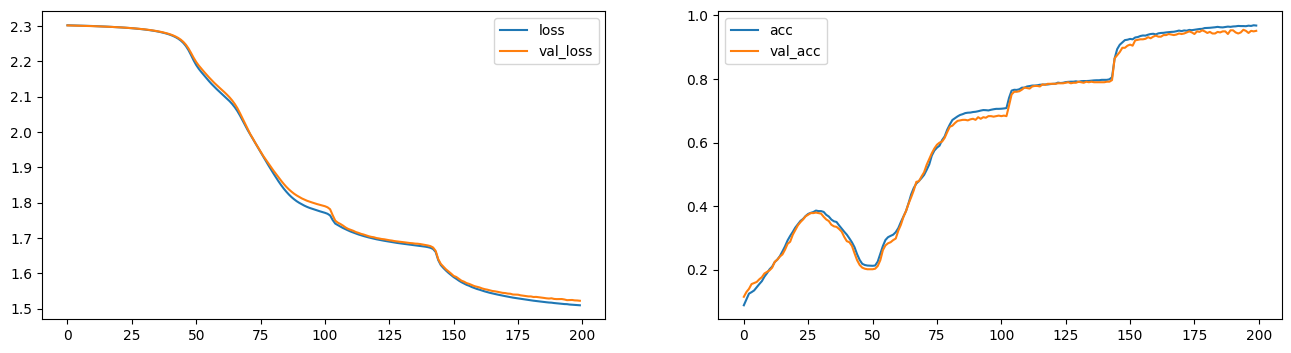

In [35]:
vis_history(acc_train_all_r3000nn, loss_train_all_r3000nn, acc_test_all_r3000nn, loss_test_all_r3000nn)

# Сигмоида без нормировки

In [159]:
n_epochs = 1000
batch_size = 100
learning_rate = 0.05

X_mn_train = torch.from_numpy(np.array(X_mn_train))
X_mn_test = torch.from_numpy(np.array(X_mn_test))
X_mn_train = X_mn_train.flatten(start_dim=1).float()
X_mn_test = X_mn_test.flatten(start_dim=1).float()
y_mn_train = torch.from_numpy(np.array(y_mn_train))
y_mn_test = torch.from_numpy(np.array(y_mn_test))
print(X_mn_train.size())
print(X_mn_train.size())
D_in = np.array(X_mn_train).shape[1]
print(D_in)
D_out = 10
loss_fn = torch.nn.CrossEntropyLoss()
model_s = Model(D_in,200,20,D_out)
acc_train_all_s3000, loss_train_all_s3000, acc_test_all_s3000, loss_test_all_s3000 = model_s.train(model_s,n_epochs, batch_size, learning_rate, X_mn_train, y_mn_train, X_mn_test, y_mn_test)

torch.Size([2400, 720])
torch.Size([2400, 720])
720


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 333.75it/s]


Epoch 0: 
 Accuracy - train: 0.09291666666666666 | test: 0.085 
 Loss - train: 2.3042197227478027 | test: 2.304495096206665


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 534.62it/s]


Epoch 1: 
 Accuracy - train: 0.09291666666666666 | test: 0.085 
 Loss - train: 2.3040852546691895 | test: 2.3043837547302246


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 226.65it/s]


Epoch 2: 
 Accuracy - train: 0.09291666666666666 | test: 0.085 
 Loss - train: 2.303956985473633 | test: 2.304278612136841


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 223.94it/s]


Epoch 3: 
 Accuracy - train: 0.09291666666666666 | test: 0.085 
 Loss - train: 2.3038337230682373 | test: 2.304178476333618


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 255.53it/s]


Epoch 4: 
 Accuracy - train: 0.09291666666666666 | test: 0.085 
 Loss - train: 2.303715467453003 | test: 2.3040833473205566


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 316.53it/s]


Epoch 5: 
 Accuracy - train: 0.09291666666666666 | test: 0.085 
 Loss - train: 2.3036022186279297 | test: 2.303992509841919


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 567.56it/s]


Epoch 6: 
 Accuracy - train: 0.09291666666666666 | test: 0.085 
 Loss - train: 2.303492784500122 | test: 2.303905725479126


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 492.84it/s]


Epoch 7: 
 Accuracy - train: 0.09291666666666666 | test: 0.085 
 Loss - train: 2.3033883571624756 | test: 2.303823471069336


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 316.41it/s]


Epoch 8: 
 Accuracy - train: 0.09291666666666666 | test: 0.085 
 Loss - train: 2.3032875061035156 | test: 2.3037450313568115


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 167.05it/s]


Epoch 9: 
 Accuracy - train: 0.09291666666666666 | test: 0.085 
 Loss - train: 2.3031909465789795 | test: 2.3036696910858154


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 234.77it/s]


Epoch 10: 
 Accuracy - train: 0.09291666666666666 | test: 0.085 
 Loss - train: 2.3030972480773926 | test: 2.303597927093506


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 847.69it/s]


Epoch 11: 
 Accuracy - train: 0.09291666666666666 | test: 0.085 
 Loss - train: 2.303006649017334 | test: 2.3035292625427246


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 791.40it/s]


Epoch 12: 
 Accuracy - train: 0.09291666666666666 | test: 0.085 
 Loss - train: 2.302919626235962 | test: 2.3034632205963135


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 862.86it/s]


Epoch 13: 
 Accuracy - train: 0.09291666666666666 | test: 0.085 
 Loss - train: 2.30283522605896 | test: 2.3033995628356934


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 685.43it/s]


Epoch 14: 
 Accuracy - train: 0.09291666666666666 | test: 0.085 
 Loss - train: 2.3027544021606445 | test: 2.3033394813537598


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 666.27it/s]


Epoch 15: 
 Accuracy - train: 0.10625 | test: 0.09166666666666666 
 Loss - train: 2.302675485610962 | test: 2.303281307220459


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 654.03it/s]


Epoch 16: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.3025994300842285 | test: 2.3032257556915283


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 787.47it/s]


Epoch 17: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.302525520324707 | test: 2.3031721115112305


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 789.92it/s]


Epoch 18: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.3024544715881348 | test: 2.3031206130981445


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 878.87it/s]


Epoch 19: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.302385091781616 | test: 2.3030712604522705


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 977.98it/s]


Epoch 20: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.3023180961608887 | test: 2.30302357673645


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 865.64it/s]


Epoch 21: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.3022522926330566 | test: 2.3029778003692627


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 896.63it/s]


Epoch 22: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.302189350128174 | test: 2.302933692932129


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 929.06it/s]


Epoch 23: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.3021275997161865 | test: 2.302891254425049


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 763.87it/s]


Epoch 24: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.302067995071411 | test: 2.3028502464294434


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 727.34it/s]


Epoch 25: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.3020098209381104 | test: 2.3028104305267334


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 711.92it/s]


Epoch 26: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.3019537925720215 | test: 2.3027725219726562


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 800.51it/s]


Epoch 27: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.301898717880249 | test: 2.3027353286743164


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 862.35it/s]


Epoch 28: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.301845073699951 | test: 2.302699565887451


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 853.71it/s]

Epoch 29: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.301793098449707 | test: 2.3026652336120605

100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 676.34it/s]


Epoch 30: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.3017418384552 | test: 2.3026316165924072


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 837.37it/s]


Epoch 31: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.3016927242279053 | test: 2.3025991916656494


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 862.14it/s]


Epoch 32: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.3016443252563477 | test: 2.302568197250366


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 942.84it/s]


Epoch 33: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.3015968799591064 | test: 2.3025379180908203


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 993.73it/s]


Epoch 34: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.301551103591919 | test: 2.3025083541870117


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 999.51it/s]


Epoch 35: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.301506280899048 | test: 2.3024797439575195


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1018.07it/s]


Epoch 36: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.3014626502990723 | test: 2.302452325820923


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 980.55it/s]


Epoch 37: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.301419973373413 | test: 2.3024253845214844


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1011.87it/s]


Epoch 38: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.3013784885406494 | test: 2.302398681640625


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 970.65it/s]


Epoch 39: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.301337242126465 | test: 2.302372932434082


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 979.47it/s]


Epoch 40: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.301297426223755 | test: 2.3023483753204346


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1001.25it/s]


Epoch 41: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.3012585639953613 | test: 2.3023245334625244


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 957.69it/s]


Epoch 42: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.301220178604126 | test: 2.3023009300231934


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 951.02it/s]


Epoch 43: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.301182746887207 | test: 2.3022782802581787


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 882.52it/s]


Epoch 44: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.3011462688446045 | test: 2.302255868911743


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 842.65it/s]


Epoch 45: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.3011105060577393 | test: 2.302234411239624


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 908.11it/s]


Epoch 46: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.301074981689453 | test: 2.302212953567505


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 879.99it/s]


Epoch 47: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.3010406494140625 | test: 2.3021926879882812


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 855.94it/s]


Epoch 48: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.30100679397583 | test: 2.3021726608276367


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 867.05it/s]


Epoch 49: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.300973653793335 | test: 2.3021528720855713


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 827.37it/s]


Epoch 50: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.300940990447998 | test: 2.3021340370178223


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 922.98it/s]


Epoch 51: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.3009090423583984 | test: 2.3021152019500732


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 866.08it/s]


Epoch 52: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.300877571105957 | test: 2.3020966053009033


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 808.14it/s]


Epoch 53: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.300846815109253 | test: 2.30207896232605


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 892.80it/s]


Epoch 54: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.300816297531128 | test: 2.302060842514038


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 978.57it/s]


Epoch 55: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.300786256790161 | test: 2.302043914794922


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 959.02it/s]


Epoch 56: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.3007571697235107 | test: 2.3020272254943848


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 958.73it/s]


Epoch 57: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.3007283210754395 | test: 2.3020100593566895


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 830.90it/s]


Epoch 58: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.3007001876831055 | test: 2.3019936084747314


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 779.05it/s]


Epoch 59: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.3006722927093506 | test: 2.3019776344299316


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 916.96it/s]


Epoch 60: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.3006443977355957 | test: 2.3019611835479736


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 942.54it/s]


Epoch 61: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.3006174564361572 | test: 2.301945686340332


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 927.36it/s]


Epoch 62: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.3005905151367188 | test: 2.3019304275512695


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 871.65it/s]


Epoch 63: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.3005645275115967 | test: 2.301915168762207


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 912.58it/s]


Epoch 64: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.3005385398864746 | test: 2.3018999099731445


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 860.66it/s]


Epoch 65: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.3005127906799316 | test: 2.3018851280212402


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 822.31it/s]


Epoch 66: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.300487518310547 | test: 2.301870822906494


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 586.59it/s]


Epoch 67: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.300462484359741 | test: 2.3018569946289062


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 876.09it/s]


Epoch 68: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.3004379272460938 | test: 2.3018434047698975


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 940.62it/s]


Epoch 69: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.3004136085510254 | test: 2.3018293380737305


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 882.98it/s]


Epoch 70: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.300389528274536 | test: 2.30181622505188


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 942.28it/s]


Epoch 71: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.300365924835205 | test: 2.301802396774292


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 867.50it/s]


Epoch 72: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.300342559814453 | test: 2.301788806915283


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 955.31it/s]


Epoch 73: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.3003194332122803 | test: 2.3017759323120117


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1083.87it/s]


Epoch 74: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.3002967834472656 | test: 2.3017630577087402


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 994.23it/s]


Epoch 75: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.300273895263672 | test: 2.3017501831054688


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 980.66it/s]


Epoch 76: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.3002514839172363 | test: 2.301738739013672


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 961.63it/s]

Epoch 77: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.30022931098938 | test: 2.3017265796661377

100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 934.58it/s]


Epoch 78: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.3002073764801025 | test: 2.301713466644287


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 932.37it/s]


Epoch 79: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.300185441970825 | test: 2.3017024993896484


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 950.12it/s]


Epoch 80: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.300164222717285 | test: 2.3016905784606934


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 921.24it/s]


Epoch 81: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.300142526626587 | test: 2.30167818069458


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 968.55it/s]


Epoch 82: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.300121545791626 | test: 2.301666736602783


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 959.22it/s]


Epoch 83: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.300100564956665 | test: 2.3016552925109863


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 858.40it/s]


Epoch 84: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.3000800609588623 | test: 2.3016443252563477


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 884.10it/s]


Epoch 85: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.3000595569610596 | test: 2.301633358001709


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 850.33it/s]


Epoch 86: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.300039291381836 | test: 2.3016226291656494


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 824.04it/s]


Epoch 87: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.3000190258026123 | test: 2.301612377166748


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 856.15it/s]


Epoch 88: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.299999237060547 | test: 2.3016016483306885


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 829.35it/s]


Epoch 89: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.2999792098999023 | test: 2.3015902042388916


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 978.52it/s]


Epoch 90: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.299959659576416 | test: 2.3015799522399902


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 999.97it/s]


Epoch 91: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.2999398708343506 | test: 2.301569700241089


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 990.20it/s]


Epoch 92: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.2999205589294434 | test: 2.3015592098236084


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 941.79it/s]


Epoch 93: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.2999017238616943 | test: 2.301548719406128


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 940.95it/s]


Epoch 94: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.299882650375366 | test: 2.3015377521514893


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 920.64it/s]


Epoch 95: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.299863576889038 | test: 2.301527500152588


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 869.14it/s]


Epoch 96: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.2998452186584473 | test: 2.301517963409424


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 744.71it/s]


Epoch 97: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.2998266220092773 | test: 2.301508903503418


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 932.40it/s]


Epoch 98: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.2998082637786865 | test: 2.3014979362487793


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 899.00it/s]


Epoch 99: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.2997899055480957 | test: 2.3014886379241943


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 868.25it/s]


Epoch 100: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.299772024154663 | test: 2.3014793395996094


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 899.37it/s]


Epoch 101: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.2997541427612305 | test: 2.3014698028564453


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 881.13it/s]


Epoch 102: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.299736261367798 | test: 2.3014605045318604


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 881.61it/s]


Epoch 103: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.2997183799743652 | test: 2.301452159881592


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 935.42it/s]


Epoch 104: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.2997007369995117 | test: 2.3014423847198486


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 957.44it/s]


Epoch 105: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.2996833324432373 | test: 2.3014333248138428


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1043.52it/s]


Epoch 106: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.299666166305542 | test: 2.301424026489258


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 993.55it/s]


Epoch 107: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.2996487617492676 | test: 2.3014144897460938


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 997.05it/s]


Epoch 108: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.2996320724487305 | test: 2.301406145095825


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 990.95it/s]


Epoch 109: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.299614906311035 | test: 2.3013970851898193


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 986.73it/s]


Epoch 110: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.299598455429077 | test: 2.301389217376709


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 936.14it/s]

Epoch 111: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.29958176612854 | test: 2.3013813495635986

100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 938.38it/s]

Epoch 112: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.299564838409424 | test: 2.301373243331909

100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 833.54it/s]


Epoch 113: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.299548625946045 | test: 2.301365613937378


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 923.19it/s]


Epoch 114: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.299532175064087 | test: 2.3013579845428467


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 920.17it/s]


Epoch 115: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.299515962600708 | test: 2.3013505935668945


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 960.02it/s]


Epoch 116: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.299499988555908 | test: 2.301342725753784


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 960.58it/s]


Epoch 117: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.2994840145111084 | test: 2.301335096359253


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 896.82it/s]


Epoch 118: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.2994680404663086 | test: 2.3013269901275635


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 960.07it/s]


Epoch 119: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.299452304840088 | test: 2.3013203144073486


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 951.85it/s]


Epoch 120: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.2994368076324463 | test: 2.3013131618499756


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 867.59it/s]


Epoch 121: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.2994210720062256 | test: 2.3013052940368652


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 888.51it/s]


Epoch 122: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.299406051635742 | test: 2.301297903060913


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 873.21it/s]


Epoch 123: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.2993905544281006 | test: 2.3012897968292236


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 857.21it/s]


Epoch 124: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.299375534057617 | test: 2.3012826442718506


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 888.78it/s]


Epoch 125: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.2993602752685547 | test: 2.3012754917144775


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 901.89it/s]


Epoch 126: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.2993459701538086 | test: 2.3012678623199463


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 890.86it/s]


Epoch 127: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.299330711364746 | test: 2.3012611865997314


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 959.47it/s]


Epoch 128: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.299316167831421 | test: 2.3012547492980957


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 995.71it/s]


Epoch 129: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.2993016242980957 | test: 2.3012475967407227


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 957.93it/s]


Epoch 130: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.2992873191833496 | test: 2.301241159439087


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 922.65it/s]


Epoch 131: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.2992727756500244 | test: 2.301234245300293


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 885.72it/s]


Epoch 132: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.2992589473724365 | test: 2.3012282848358154


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 826.83it/s]


Epoch 133: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.2992448806762695 | test: 2.3012216091156006


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 800.76it/s]


Epoch 134: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.2992305755615234 | test: 2.3012149333953857


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 896.79it/s]


Epoch 135: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.2992167472839355 | test: 2.3012077808380127


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 888.66it/s]


Epoch 136: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.2992026805877686 | test: 2.301201343536377


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 878.64it/s]


Epoch 137: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.2991890907287598 | test: 2.301194190979004


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 897.55it/s]


Epoch 138: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.299175500869751 | test: 2.3011884689331055


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 897.43it/s]


Epoch 139: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.2991621494293213 | test: 2.3011832237243652


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 872.15it/s]


Epoch 140: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.2991483211517334 | test: 2.3011767864227295


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 869.69it/s]


Epoch 141: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.299135208129883 | test: 2.3011703491210938


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 888.85it/s]


Epoch 142: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.2991220951080322 | test: 2.301164150238037


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 961.40it/s]


Epoch 143: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.2991089820861816 | test: 2.3011577129364014


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1011.38it/s]


Epoch 144: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.299095630645752 | test: 2.301151990890503


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 960.78it/s]


Epoch 145: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.2990827560424805 | test: 2.30114483833313


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 959.84it/s]


Epoch 146: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.299070119857788 | test: 2.3011386394500732


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 852.92it/s]


Epoch 147: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.2990572452545166 | test: 2.301132917404175


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 888.60it/s]


Epoch 148: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.299044609069824 | test: 2.3011269569396973


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 889.73it/s]


Epoch 149: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.2990317344665527 | test: 2.3011207580566406


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 895.41it/s]


Epoch 150: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.2990193367004395 | test: 2.3011138439178467


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 864.94it/s]


Epoch 151: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.299006938934326 | test: 2.30110764503479


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 885.37it/s]


Epoch 152: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.298994779586792 | test: 2.3011021614074707


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 897.41it/s]


Epoch 153: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.2989819049835205 | test: 2.3010969161987305


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 960.98it/s]


Epoch 154: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.2989699840545654 | test: 2.301091432571411


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 958.74it/s]


Epoch 155: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.2989578247070312 | test: 2.30108642578125


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 957.64it/s]


Epoch 156: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.298945903778076 | test: 2.3010799884796143


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 925.56it/s]


Epoch 157: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.2989342212677 | test: 2.3010733127593994


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 958.72it/s]


Epoch 158: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.298921823501587 | test: 2.3010671138763428


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 919.06it/s]


Epoch 159: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.29891037940979 | test: 2.3010613918304443


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 887.85it/s]


Epoch 160: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.298898220062256 | test: 2.301055908203125


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 836.33it/s]


Epoch 161: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.298887014389038 | test: 2.3010497093200684


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 846.31it/s]


Epoch 162: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.298875093460083 | test: 2.301044225692749


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 857.40it/s]


Epoch 163: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.298863649368286 | test: 2.301037311553955


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 984.55it/s]


Epoch 164: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.2988522052764893 | test: 2.3010318279266357


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 893.83it/s]

Epoch 165: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.2988409996032715 | test: 2.3010261058807373

100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 882.41it/s]


Epoch 166: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.2988293170928955 | test: 2.3010201454162598


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 959.44it/s]


Epoch 167: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.2988176345825195 | test: 2.301013946533203


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 926.82it/s]


Epoch 168: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.2988064289093018 | test: 2.3010079860687256


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 884.14it/s]


Epoch 169: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.298795461654663 | test: 2.301002025604248


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 848.26it/s]


Epoch 170: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.2987842559814453 | test: 2.3009955883026123


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 841.05it/s]


Epoch 171: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.2987728118896484 | test: 2.300990343093872


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 825.81it/s]


Epoch 172: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.2987616062164307 | test: 2.3009848594665527


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 857.55it/s]


Epoch 173: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.298750638961792 | test: 2.300978899002075


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 897.98it/s]


Epoch 174: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.2987396717071533 | test: 2.3009724617004395


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 922.49it/s]


Epoch 175: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.2987287044525146 | test: 2.3009660243988037


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1000.32it/s]


Epoch 176: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.298717737197876 | test: 2.3009603023529053


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 931.93it/s]


Epoch 177: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.2987067699432373 | test: 2.3009536266326904


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 808.20it/s]


Epoch 178: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.2986958026885986 | test: 2.3009469509124756


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 848.98it/s]


Epoch 179: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.29868483543396 | test: 2.300940752029419


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 750.70it/s]


Epoch 180: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.2986741065979004 | test: 2.3009347915649414


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 855.16it/s]


Epoch 181: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.298663377761841 | test: 2.300929069519043


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 923.07it/s]


Epoch 182: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.298652410507202 | test: 2.3009226322174072


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 885.79it/s]


Epoch 183: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.2986414432525635 | test: 2.300916910171509


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 889.18it/s]


Epoch 184: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.298630952835083 | test: 2.3009109497070312


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 884.10it/s]


Epoch 185: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.2986197471618652 | test: 2.3009040355682373


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 963.70it/s]


Epoch 186: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.2986092567443848 | test: 2.3008978366851807


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 999.43it/s]


Epoch 187: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.298598527908325 | test: 2.300891637802124


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 999.83it/s]


Epoch 188: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.2985875606536865 | test: 2.300884485244751


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 967.95it/s]


Epoch 189: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.298576593399048 | test: 2.300877809524536


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 939.06it/s]


Epoch 190: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.2985661029815674 | test: 2.300870656967163


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 943.85it/s]


Epoch 191: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.298555374145508 | test: 2.3008646965026855


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 969.99it/s]


Epoch 192: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.298544406890869 | test: 2.300856590270996


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 889.17it/s]


Epoch 193: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.2985339164733887 | test: 2.300849199295044


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 870.13it/s]


Epoch 194: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.298523187637329 | test: 2.3008406162261963


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 904.99it/s]


Epoch 195: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.2985124588012695 | test: 2.300832509994507


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1012.94it/s]


Epoch 196: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.298501491546631 | test: 2.3008246421813965


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 905.20it/s]


Epoch 197: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.2984907627105713 | test: 2.3008174896240234


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 910.36it/s]


Epoch 198: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.298480272293091 | test: 2.3008100986480713


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 844.50it/s]


Epoch 199: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.298469305038452 | test: 2.300802230834961


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 960.28it/s]


Epoch 200: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.2984583377838135 | test: 2.3007943630218506


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 938.86it/s]


Epoch 201: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.298447608947754 | test: 2.3007876873016357


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 962.45it/s]


Epoch 202: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.2984366416931152 | test: 2.300779104232788


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 888.78it/s]


Epoch 203: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.2984259128570557 | test: 2.3007709980010986


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 755.63it/s]


Epoch 204: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.298415422439575 | test: 2.300762891769409


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 887.50it/s]


Epoch 205: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.2984044551849365 | test: 2.3007545471191406


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 956.91it/s]


Epoch 206: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.298393487930298 | test: 2.300748825073242


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 898.72it/s]


Epoch 207: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.298382520675659 | test: 2.3007400035858154


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 919.62it/s]


Epoch 208: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.2983715534210205 | test: 2.3007307052612305


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 742.56it/s]


Epoch 209: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.298360586166382 | test: 2.3007214069366455


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 799.58it/s]


Epoch 210: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.298349380493164 | test: 2.300713300704956


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 890.64it/s]


Epoch 211: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.2983384132385254 | test: 2.30070424079895


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 905.64it/s]


Epoch 212: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.2983272075653076 | test: 2.3006951808929443


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 884.73it/s]


Epoch 213: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.29831600189209 | test: 2.3006861209869385


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 889.26it/s]


Epoch 214: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.298305034637451 | test: 2.3006765842437744


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 829.53it/s]


Epoch 215: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.2982940673828125 | test: 2.3006680011749268


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 888.77it/s]


Epoch 216: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.2982826232910156 | test: 2.300659656524658


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 850.28it/s]


Epoch 217: 
 Accuracy - train: 0.11208333333333333 | test: 0.1 
 Loss - train: 2.298271417617798 | test: 2.3006508350372314


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 893.28it/s]


Epoch 218: 
 Accuracy - train: 0.11333333333333333 | test: 0.1 
 Loss - train: 2.298259973526001 | test: 2.300640344619751


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 924.26it/s]


Epoch 219: 
 Accuracy - train: 0.11416666666666667 | test: 0.1 
 Loss - train: 2.298248529434204 | test: 2.3006317615509033


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 828.01it/s]


Epoch 220: 
 Accuracy - train: 0.11583333333333333 | test: 0.105 
 Loss - train: 2.298236846923828 | test: 2.300621509552002


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 588.82it/s]


Epoch 221: 
 Accuracy - train: 0.11791666666666667 | test: 0.10666666666666667 
 Loss - train: 2.2982256412506104 | test: 2.300611734390259


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 585.30it/s]


Epoch 222: 
 Accuracy - train: 0.12125 | test: 0.11 
 Loss - train: 2.2982141971588135 | test: 2.3006017208099365


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 824.56it/s]


Epoch 223: 
 Accuracy - train: 0.1225 | test: 0.11166666666666666 
 Loss - train: 2.2982025146484375 | test: 2.300593137741089


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 744.02it/s]


Epoch 224: 
 Accuracy - train: 0.12916666666666668 | test: 0.125 
 Loss - train: 2.2981908321380615 | test: 2.30058217048645


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 919.24it/s]


Epoch 225: 
 Accuracy - train: 0.13291666666666666 | test: 0.12833333333333333 
 Loss - train: 2.2981791496276855 | test: 2.300572395324707


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 947.70it/s]


Epoch 226: 
 Accuracy - train: 0.13875 | test: 0.13333333333333333 
 Loss - train: 2.2981672286987305 | test: 2.3005623817443848


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 934.41it/s]


Epoch 227: 
 Accuracy - train: 0.1475 | test: 0.14666666666666667 
 Loss - train: 2.2981560230255127 | test: 2.300551652908325


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 965.35it/s]


Epoch 228: 
 Accuracy - train: 0.15708333333333332 | test: 0.16333333333333333 
 Loss - train: 2.2981443405151367 | test: 2.3005404472351074


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 882.16it/s]


Epoch 229: 
 Accuracy - train: 0.16375 | test: 0.16833333333333333 
 Loss - train: 2.2981319427490234 | test: 2.300529956817627


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 911.46it/s]


Epoch 230: 
 Accuracy - train: 0.17083333333333334 | test: 0.16833333333333333 
 Loss - train: 2.2981202602386475 | test: 2.3005194664001465


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 857.16it/s]


Epoch 231: 
 Accuracy - train: 0.17833333333333334 | test: 0.18333333333333332 
 Loss - train: 2.2981081008911133 | test: 2.3005080223083496


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 827.01it/s]

Epoch 232: 
 Accuracy - train: 0.18833333333333332 | test: 0.19 
 Loss - train: 2.298096179962158 | test: 2.3004961013793945

100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 923.09it/s]


Epoch 233: 
 Accuracy - train: 0.1975 | test: 0.19833333333333333 
 Loss - train: 2.298084020614624 | test: 2.3004844188690186


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 826.91it/s]


Epoch 234: 
 Accuracy - train: 0.20208333333333334 | test: 0.20333333333333334 
 Loss - train: 2.2980716228485107 | test: 2.3004729747772217


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 857.91it/s]


Epoch 235: 
 Accuracy - train: 0.20458333333333334 | test: 0.20333333333333334 
 Loss - train: 2.2980594635009766 | test: 2.300462484359741


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 741.85it/s]


Epoch 236: 
 Accuracy - train: 0.2075 | test: 0.205 
 Loss - train: 2.2980470657348633 | test: 2.3004510402679443


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 539.38it/s]


Epoch 237: 
 Accuracy - train: 0.20875 | test: 0.205 
 Loss - train: 2.29803466796875 | test: 2.300438642501831


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 205.80it/s]


Epoch 238: 
 Accuracy - train: 0.21375 | test: 0.215 
 Loss - train: 2.2980220317840576 | test: 2.3004260063171387


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 409.34it/s]


Epoch 239: 
 Accuracy - train: 0.21583333333333332 | test: 0.215 
 Loss - train: 2.2980096340179443 | test: 2.300412893295288


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 253.60it/s]


Epoch 240: 
 Accuracy - train: 0.21666666666666667 | test: 0.215 
 Loss - train: 2.297996759414673 | test: 2.3003997802734375


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 216.90it/s]


Epoch 241: 
 Accuracy - train: 0.21791666666666668 | test: 0.21833333333333332 
 Loss - train: 2.2979841232299805 | test: 2.3003878593444824


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 231.87it/s]


Epoch 242: 
 Accuracy - train: 0.21791666666666668 | test: 0.21833333333333332 
 Loss - train: 2.297971487045288 | test: 2.300374984741211


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 215.44it/s]


Epoch 243: 
 Accuracy - train: 0.21708333333333332 | test: 0.21833333333333332 
 Loss - train: 2.2979583740234375 | test: 2.3003618717193604


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 171.15it/s]


Epoch 244: 
 Accuracy - train: 0.21833333333333332 | test: 0.21833333333333332 
 Loss - train: 2.297945261001587 | test: 2.300349712371826


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 141.17it/s]


Epoch 245: 
 Accuracy - train: 0.21833333333333332 | test: 0.21833333333333332 
 Loss - train: 2.2979321479797363 | test: 2.300337553024292


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 558.24it/s]


Epoch 246: 
 Accuracy - train: 0.21833333333333332 | test: 0.21833333333333332 
 Loss - train: 2.2979190349578857 | test: 2.3003242015838623


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 962.58it/s]


Epoch 247: 
 Accuracy - train: 0.21875 | test: 0.22 
 Loss - train: 2.297905683517456 | test: 2.3003103733062744


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 845.19it/s]


Epoch 248: 
 Accuracy - train: 0.21875 | test: 0.22333333333333333 
 Loss - train: 2.2978925704956055 | test: 2.3002965450286865


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 752.89it/s]


Epoch 249: 
 Accuracy - train: 0.21916666666666668 | test: 0.22333333333333333 
 Loss - train: 2.2978789806365967 | test: 2.3002827167510986


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 765.64it/s]


Epoch 250: 
 Accuracy - train: 0.21958333333333332 | test: 0.22333333333333333 
 Loss - train: 2.297865152359009 | test: 2.3002684116363525


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 982.49it/s]


Epoch 251: 
 Accuracy - train: 0.21916666666666668 | test: 0.22333333333333333 
 Loss - train: 2.2978515625 | test: 2.3002548217773438


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 985.55it/s]


Epoch 252: 
 Accuracy - train: 0.21875 | test: 0.22333333333333333 
 Loss - train: 2.297837734222412 | test: 2.3002400398254395


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 999.42it/s]


Epoch 253: 
 Accuracy - train: 0.21791666666666668 | test: 0.225 
 Loss - train: 2.297823905944824 | test: 2.300225019454956


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 876.58it/s]


Epoch 254: 
 Accuracy - train: 0.21791666666666668 | test: 0.225 
 Loss - train: 2.2978100776672363 | test: 2.300210475921631


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 872.60it/s]


Epoch 255: 
 Accuracy - train: 0.21708333333333332 | test: 0.22333333333333333 
 Loss - train: 2.2977960109710693 | test: 2.3001956939697266


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 761.03it/s]


Epoch 256: 
 Accuracy - train: 0.21666666666666667 | test: 0.22333333333333333 
 Loss - train: 2.297781467437744 | test: 2.3001821041107178


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 771.50it/s]

Epoch 257: 
 Accuracy - train: 0.21583333333333332 | test: 0.22333333333333333 
 Loss - train: 2.2977676391601562 | test: 2.3001673221588135

100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 804.84it/s]


Epoch 258: 
 Accuracy - train: 0.21416666666666667 | test: 0.22333333333333333 
 Loss - train: 2.297752857208252 | test: 2.300152063369751


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 800.50it/s]


Epoch 259: 
 Accuracy - train: 0.21416666666666667 | test: 0.22333333333333333 
 Loss - train: 2.297738552093506 | test: 2.3001365661621094


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 735.39it/s]


Epoch 260: 
 Accuracy - train: 0.21375 | test: 0.22166666666666668 
 Loss - train: 2.2977237701416016 | test: 2.3001205921173096


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 825.89it/s]


Epoch 261: 
 Accuracy - train: 0.21375 | test: 0.22166666666666668 
 Loss - train: 2.2977092266082764 | test: 2.3001062870025635


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 888.53it/s]


Epoch 262: 
 Accuracy - train: 0.21375 | test: 0.21666666666666667 
 Loss - train: 2.297694206237793 | test: 2.300090789794922


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 916.70it/s]


Epoch 263: 
 Accuracy - train: 0.21333333333333335 | test: 0.21666666666666667 
 Loss - train: 2.2976789474487305 | test: 2.3000755310058594


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1033.33it/s]


Epoch 264: 
 Accuracy - train: 0.2125 | test: 0.21666666666666667 
 Loss - train: 2.297663927078247 | test: 2.3000593185424805


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 937.94it/s]


Epoch 265: 
 Accuracy - train: 0.21125 | test: 0.21666666666666667 
 Loss - train: 2.2976484298706055 | test: 2.300041913986206


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 978.27it/s]


Epoch 266: 
 Accuracy - train: 0.21041666666666667 | test: 0.21666666666666667 
 Loss - train: 2.297633171081543 | test: 2.3000245094299316


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 761.34it/s]


Epoch 267: 
 Accuracy - train: 0.20958333333333334 | test: 0.21666666666666667 
 Loss - train: 2.2976176738739014 | test: 2.3000078201293945


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 870.65it/s]


Epoch 268: 
 Accuracy - train: 0.20958333333333334 | test: 0.21666666666666667 
 Loss - train: 2.2976019382476807 | test: 2.2999916076660156


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 881.13it/s]


Epoch 269: 
 Accuracy - train: 0.20875 | test: 0.21333333333333335 
 Loss - train: 2.297585964202881 | test: 2.299974203109741


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 935.52it/s]


Epoch 270: 
 Accuracy - train: 0.20708333333333334 | test: 0.21166666666666667 
 Loss - train: 2.297569751739502 | test: 2.299955368041992


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 923.13it/s]


Epoch 271: 
 Accuracy - train: 0.20625 | test: 0.20833333333333334 
 Loss - train: 2.2975542545318604 | test: 2.2999372482299805


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 906.51it/s]


Epoch 272: 
 Accuracy - train: 0.20583333333333334 | test: 0.20833333333333334 
 Loss - train: 2.2975378036499023 | test: 2.2999203205108643


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 980.96it/s]


Epoch 273: 
 Accuracy - train: 0.20541666666666666 | test: 0.20666666666666667 
 Loss - train: 2.2975213527679443 | test: 2.2999024391174316


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 983.98it/s]


Epoch 274: 
 Accuracy - train: 0.205 | test: 0.20666666666666667 
 Loss - train: 2.2975049018859863 | test: 2.2998833656311035


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 996.91it/s]


Epoch 275: 
 Accuracy - train: 0.20416666666666666 | test: 0.20666666666666667 
 Loss - train: 2.297488212585449 | test: 2.2998640537261963


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1020.95it/s]


Epoch 276: 
 Accuracy - train: 0.20375 | test: 0.205 
 Loss - train: 2.297471284866333 | test: 2.2998452186584473


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 921.23it/s]


Epoch 277: 
 Accuracy - train: 0.2025 | test: 0.2 
 Loss - train: 2.2974541187286377 | test: 2.299825668334961


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 879.27it/s]


Epoch 278: 
 Accuracy - train: 0.20041666666666666 | test: 0.19666666666666666 
 Loss - train: 2.2974369525909424 | test: 2.2998056411743164


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 750.50it/s]


Epoch 279: 
 Accuracy - train: 0.19833333333333333 | test: 0.195 
 Loss - train: 2.297419548034668 | test: 2.2997853755950928


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 694.82it/s]


Epoch 280: 
 Accuracy - train: 0.19625 | test: 0.19333333333333333 
 Loss - train: 2.2974019050598145 | test: 2.2997639179229736


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 797.72it/s]


Epoch 281: 
 Accuracy - train: 0.19208333333333333 | test: 0.19333333333333333 
 Loss - train: 2.297384262084961 | test: 2.299741744995117


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 792.43it/s]


Epoch 282: 
 Accuracy - train: 0.19083333333333333 | test: 0.18666666666666668 
 Loss - train: 2.2973666191101074 | test: 2.2997207641601562


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 696.31it/s]


Epoch 283: 
 Accuracy - train: 0.18958333333333333 | test: 0.18666666666666668 
 Loss - train: 2.2973482608795166 | test: 2.2997000217437744


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 773.02it/s]


Epoch 284: 
 Accuracy - train: 0.1875 | test: 0.18333333333333332 
 Loss - train: 2.2973296642303467 | test: 2.299678087234497


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 884.92it/s]


Epoch 285: 
 Accuracy - train: 0.185 | test: 0.17833333333333334 
 Loss - train: 2.297311544418335 | test: 2.2996556758880615


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 986.47it/s]


Epoch 286: 
 Accuracy - train: 0.18041666666666667 | test: 0.17833333333333334 
 Loss - train: 2.297292709350586 | test: 2.2996323108673096


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 896.31it/s]


Epoch 287: 
 Accuracy - train: 0.17875 | test: 0.17833333333333334 
 Loss - train: 2.297274112701416 | test: 2.2996115684509277


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 823.55it/s]


Epoch 288: 
 Accuracy - train: 0.17666666666666667 | test: 0.17666666666666667 
 Loss - train: 2.297254800796509 | test: 2.2995896339416504


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 825.01it/s]


Epoch 289: 
 Accuracy - train: 0.17333333333333334 | test: 0.175 
 Loss - train: 2.2972354888916016 | test: 2.2995667457580566


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 647.89it/s]


Epoch 290: 
 Accuracy - train: 0.17041666666666666 | test: 0.175 
 Loss - train: 2.2972161769866943 | test: 2.299544334411621


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 731.14it/s]


Epoch 291: 
 Accuracy - train: 0.16875 | test: 0.17333333333333334 
 Loss - train: 2.297196626663208 | test: 2.299520969390869


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 800.94it/s]


Epoch 292: 
 Accuracy - train: 0.16583333333333333 | test: 0.17166666666666666 
 Loss - train: 2.2971765995025635 | test: 2.29949688911438


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 834.80it/s]


Epoch 293: 
 Accuracy - train: 0.16416666666666666 | test: 0.17166666666666666 
 Loss - train: 2.297156572341919 | test: 2.2994728088378906


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 912.89it/s]


Epoch 294: 
 Accuracy - train: 0.16166666666666665 | test: 0.16833333333333333 
 Loss - train: 2.297135829925537 | test: 2.2994489669799805


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 979.05it/s]


Epoch 295: 
 Accuracy - train: 0.16 | test: 0.165 
 Loss - train: 2.2971158027648926 | test: 2.299424648284912


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 973.70it/s]


Epoch 296: 
 Accuracy - train: 0.15541666666666668 | test: 0.16166666666666665 
 Loss - train: 2.2970948219299316 | test: 2.2993993759155273


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 999.91it/s]


Epoch 297: 
 Accuracy - train: 0.15291666666666667 | test: 0.15833333333333333 
 Loss - train: 2.29707407951355 | test: 2.2993760108947754


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1021.00it/s]


Epoch 298: 
 Accuracy - train: 0.14833333333333334 | test: 0.15333333333333332 
 Loss - train: 2.2970523834228516 | test: 2.299349069595337


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 953.35it/s]


Epoch 299: 
 Accuracy - train: 0.14291666666666666 | test: 0.15333333333333332 
 Loss - train: 2.2970311641693115 | test: 2.2993218898773193


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 883.77it/s]


Epoch 300: 
 Accuracy - train: 0.13958333333333334 | test: 0.14833333333333334 
 Loss - train: 2.297009229660034 | test: 2.299294948577881


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 771.57it/s]


Epoch 301: 
 Accuracy - train: 0.13875 | test: 0.14833333333333334 
 Loss - train: 2.2969870567321777 | test: 2.299269199371338


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 960.00it/s]


Epoch 302: 
 Accuracy - train: 0.13416666666666666 | test: 0.14666666666666667 
 Loss - train: 2.2969651222229004 | test: 2.299238920211792


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 889.16it/s]


Epoch 303: 
 Accuracy - train: 0.13333333333333333 | test: 0.14666666666666667 
 Loss - train: 2.2969424724578857 | test: 2.29921293258667


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 979.56it/s]


Epoch 304: 
 Accuracy - train: 0.13208333333333333 | test: 0.14666666666666667 
 Loss - train: 2.296919822692871 | test: 2.2991843223571777


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1000.01it/s]


Epoch 305: 
 Accuracy - train: 0.12916666666666668 | test: 0.14333333333333334 
 Loss - train: 2.296896457672119 | test: 2.2991557121276855


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 869.44it/s]


Epoch 306: 
 Accuracy - train: 0.12916666666666668 | test: 0.14333333333333334 
 Loss - train: 2.296872854232788 | test: 2.299128293991089


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 706.94it/s]


Epoch 307: 
 Accuracy - train: 0.12708333333333333 | test: 0.14333333333333334 
 Loss - train: 2.296849250793457 | test: 2.299100160598755


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 821.43it/s]


Epoch 308: 
 Accuracy - train: 0.125 | test: 0.14 
 Loss - train: 2.296825408935547 | test: 2.2990684509277344


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 797.48it/s]


Epoch 309: 
 Accuracy - train: 0.12416666666666666 | test: 0.14 
 Loss - train: 2.2968008518218994 | test: 2.299039602279663


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 798.14it/s]


Epoch 310: 
 Accuracy - train: 0.12125 | test: 0.14 
 Loss - train: 2.296776533126831 | test: 2.2990105152130127


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 795.76it/s]


Epoch 311: 
 Accuracy - train: 0.12 | test: 0.14 
 Loss - train: 2.2967514991760254 | test: 2.2989790439605713


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 863.91it/s]

Epoch 312: 
 Accuracy - train: 0.11833333333333333 | test: 0.13666666666666666 
 Loss - train: 2.2967262268066406 | test: 2.2989449501037598

100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 882.87it/s]


Epoch 313: 
 Accuracy - train: 0.1175 | test: 0.135 
 Loss - train: 2.296700954437256 | test: 2.298912763595581


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 880.50it/s]


Epoch 314: 
 Accuracy - train: 0.11583333333333333 | test: 0.13333333333333333 
 Loss - train: 2.2966744899749756 | test: 2.298880100250244


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 935.14it/s]


Epoch 315: 
 Accuracy - train: 0.11541666666666667 | test: 0.13333333333333333 
 Loss - train: 2.2966487407684326 | test: 2.2988474369049072


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 982.04it/s]


Epoch 316: 
 Accuracy - train: 0.11541666666666667 | test: 0.13166666666666665 
 Loss - train: 2.2966220378875732 | test: 2.2988154888153076


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1021.65it/s]


Epoch 317: 
 Accuracy - train: 0.11541666666666667 | test: 0.13166666666666665 
 Loss - train: 2.2965950965881348 | test: 2.2987828254699707


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 979.66it/s]


Epoch 318: 
 Accuracy - train: 0.11375 | test: 0.13166666666666665 
 Loss - train: 2.296567678451538 | test: 2.298748016357422


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1042.24it/s]


Epoch 319: 
 Accuracy - train: 0.11291666666666667 | test: 0.13166666666666665 
 Loss - train: 2.2965400218963623 | test: 2.2987143993377686


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1037.91it/s]


Epoch 320: 
 Accuracy - train: 0.11291666666666667 | test: 0.12833333333333333 
 Loss - train: 2.2965118885040283 | test: 2.2986793518066406


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 864.46it/s]


Epoch 321: 
 Accuracy - train: 0.11291666666666667 | test: 0.12666666666666668 
 Loss - train: 2.296483278274536 | test: 2.298645257949829


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 883.89it/s]


Epoch 322: 
 Accuracy - train: 0.11291666666666667 | test: 0.12666666666666668 
 Loss - train: 2.296454429626465 | test: 2.298609733581543


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 861.40it/s]


Epoch 323: 
 Accuracy - train: 0.11166666666666666 | test: 0.12666666666666668 
 Loss - train: 2.2964253425598145 | test: 2.298569679260254


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 728.99it/s]


Epoch 324: 
 Accuracy - train: 0.11166666666666666 | test: 0.12666666666666668 
 Loss - train: 2.2963955402374268 | test: 2.2985334396362305


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 901.48it/s]


Epoch 325: 
 Accuracy - train: 0.11125 | test: 0.12666666666666668 
 Loss - train: 2.296365261077881 | test: 2.298494815826416


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 640.81it/s]


Epoch 326: 
 Accuracy - train: 0.11125 | test: 0.12666666666666668 
 Loss - train: 2.296334981918335 | test: 2.298457384109497


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 586.24it/s]


Epoch 327: 
 Accuracy - train: 0.11083333333333334 | test: 0.12666666666666668 
 Loss - train: 2.2963039875030518 | test: 2.2984187602996826


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 958.23it/s]


Epoch 328: 
 Accuracy - train: 0.11083333333333334 | test: 0.12666666666666668 
 Loss - train: 2.2962725162506104 | test: 2.298379898071289


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 980.96it/s]


Epoch 329: 
 Accuracy - train: 0.11083333333333334 | test: 0.12666666666666668 
 Loss - train: 2.2962403297424316 | test: 2.2983381748199463


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 915.63it/s]


Epoch 330: 
 Accuracy - train: 0.11083333333333334 | test: 0.12666666666666668 
 Loss - train: 2.296208143234253 | test: 2.2982985973358154


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 925.00it/s]


Epoch 331: 
 Accuracy - train: 0.11041666666666666 | test: 0.12666666666666668 
 Loss - train: 2.296175479888916 | test: 2.2982544898986816


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 857.26it/s]


Epoch 332: 
 Accuracy - train: 0.11 | test: 0.12666666666666668 
 Loss - train: 2.2961416244506836 | test: 2.2982113361358643


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 821.32it/s]


Epoch 333: 
 Accuracy - train: 0.11 | test: 0.12666666666666668 
 Loss - train: 2.2961080074310303 | test: 2.298166275024414


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 827.21it/s]


Epoch 334: 
 Accuracy - train: 0.11 | test: 0.125 
 Loss - train: 2.2960736751556396 | test: 2.298123836517334


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 892.86it/s]


Epoch 335: 
 Accuracy - train: 0.11 | test: 0.125 
 Loss - train: 2.2960386276245117 | test: 2.2980785369873047


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 853.38it/s]


Epoch 336: 
 Accuracy - train: 0.11 | test: 0.125 
 Loss - train: 2.2960031032562256 | test: 2.298032283782959


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 889.82it/s]


Epoch 337: 
 Accuracy - train: 0.11 | test: 0.125 
 Loss - train: 2.2959671020507812 | test: 2.297985076904297


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 930.58it/s]


Epoch 338: 
 Accuracy - train: 0.11 | test: 0.125 
 Loss - train: 2.2959299087524414 | test: 2.297938585281372


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 945.28it/s]


Epoch 339: 
 Accuracy - train: 0.11 | test: 0.125 
 Loss - train: 2.2958931922912598 | test: 2.2978897094726562


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 926.15it/s]


Epoch 340: 
 Accuracy - train: 0.11 | test: 0.125 
 Loss - train: 2.2958550453186035 | test: 2.297842264175415


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 863.14it/s]


Epoch 341: 
 Accuracy - train: 0.11 | test: 0.125 
 Loss - train: 2.295816659927368 | test: 2.2977941036224365


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 887.71it/s]


Epoch 342: 
 Accuracy - train: 0.11 | test: 0.125 
 Loss - train: 2.2957773208618164 | test: 2.297745704650879


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 780.44it/s]


Epoch 343: 
 Accuracy - train: 0.11 | test: 0.125 
 Loss - train: 2.2957382202148438 | test: 2.297694206237793


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 818.19it/s]


Epoch 344: 
 Accuracy - train: 0.11 | test: 0.125 
 Loss - train: 2.2956979274749756 | test: 2.2976417541503906


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 923.07it/s]


Epoch 345: 
 Accuracy - train: 0.11 | test: 0.125 
 Loss - train: 2.295656442642212 | test: 2.2975900173187256


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 890.49it/s]


Epoch 346: 
 Accuracy - train: 0.11 | test: 0.125 
 Loss - train: 2.295614719390869 | test: 2.2975351810455322


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 911.25it/s]


Epoch 347: 
 Accuracy - train: 0.11 | test: 0.125 
 Loss - train: 2.295572280883789 | test: 2.2974789142608643


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 929.33it/s]


Epoch 348: 
 Accuracy - train: 0.11 | test: 0.125 
 Loss - train: 2.2955288887023926 | test: 2.2974202632904053


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 935.04it/s]


Epoch 349: 
 Accuracy - train: 0.11 | test: 0.125 
 Loss - train: 2.295485019683838 | test: 2.297362804412842


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 885.45it/s]


Epoch 350: 
 Accuracy - train: 0.11 | test: 0.125 
 Loss - train: 2.295440196990967 | test: 2.297306537628174


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 888.59it/s]


Epoch 351: 
 Accuracy - train: 0.11 | test: 0.125 
 Loss - train: 2.2953944206237793 | test: 2.2972447872161865


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 943.57it/s]


Epoch 352: 
 Accuracy - train: 0.11 | test: 0.125 
 Loss - train: 2.2953479290008545 | test: 2.297182321548462


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 963.00it/s]


Epoch 353: 
 Accuracy - train: 0.11 | test: 0.125 
 Loss - train: 2.2953007221221924 | test: 2.2971181869506836


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 961.99it/s]


Epoch 354: 
 Accuracy - train: 0.11 | test: 0.125 
 Loss - train: 2.295252799987793 | test: 2.297057628631592


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 922.61it/s]


Epoch 355: 
 Accuracy - train: 0.11 | test: 0.125 
 Loss - train: 2.295203447341919 | test: 2.296995162963867


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 967.54it/s]


Epoch 356: 
 Accuracy - train: 0.11 | test: 0.125 
 Loss - train: 2.295153856277466 | test: 2.2969284057617188


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 924.93it/s]


Epoch 357: 
 Accuracy - train: 0.11 | test: 0.125 
 Loss - train: 2.295102596282959 | test: 2.296865940093994


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 938.45it/s]


Epoch 358: 
 Accuracy - train: 0.11 | test: 0.125 
 Loss - train: 2.295051097869873 | test: 2.296799421310425


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 967.98it/s]


Epoch 359: 
 Accuracy - train: 0.11 | test: 0.125 
 Loss - train: 2.2949981689453125 | test: 2.2967309951782227


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 959.31it/s]


Epoch 360: 
 Accuracy - train: 0.11 | test: 0.125 
 Loss - train: 2.2949440479278564 | test: 2.2966606616973877


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 827.14it/s]


Epoch 361: 
 Accuracy - train: 0.11 | test: 0.125 
 Loss - train: 2.294889450073242 | test: 2.296593189239502


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 925.51it/s]


Epoch 362: 
 Accuracy - train: 0.11 | test: 0.125 
 Loss - train: 2.294833183288574 | test: 2.2965164184570312


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 856.40it/s]


Epoch 363: 
 Accuracy - train: 0.11 | test: 0.125 
 Loss - train: 2.294776439666748 | test: 2.2964413166046143


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 842.45it/s]


Epoch 364: 
 Accuracy - train: 0.11 | test: 0.125 
 Loss - train: 2.294717788696289 | test: 2.2963664531707764


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 786.92it/s]


Epoch 365: 
 Accuracy - train: 0.11 | test: 0.125 
 Loss - train: 2.294658899307251 | test: 2.296285390853882


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 831.91it/s]


Epoch 366: 
 Accuracy - train: 0.11 | test: 0.125 
 Loss - train: 2.29459810256958 | test: 2.2962028980255127


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 972.28it/s]


Epoch 367: 
 Accuracy - train: 0.11 | test: 0.125 
 Loss - train: 2.2945361137390137 | test: 2.296121120452881


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 973.42it/s]


Epoch 368: 
 Accuracy - train: 0.11 | test: 0.125 
 Loss - train: 2.294473171234131 | test: 2.296037435531616


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 960.41it/s]


Epoch 369: 
 Accuracy - train: 0.11 | test: 0.125 
 Loss - train: 2.2944085597991943 | test: 2.2959532737731934


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 954.76it/s]


Epoch 370: 
 Accuracy - train: 0.11 | test: 0.125 
 Loss - train: 2.2943429946899414 | test: 2.295865058898926


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 971.74it/s]


Epoch 371: 
 Accuracy - train: 0.11 | test: 0.125 
 Loss - train: 2.2942757606506348 | test: 2.29577898979187


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 960.43it/s]


Epoch 372: 
 Accuracy - train: 0.11 | test: 0.125 
 Loss - train: 2.2942066192626953 | test: 2.2956881523132324


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 960.67it/s]


Epoch 373: 
 Accuracy - train: 0.11 | test: 0.125 
 Loss - train: 2.2941362857818604 | test: 2.2955942153930664


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 965.64it/s]


Epoch 374: 
 Accuracy - train: 0.11 | test: 0.125 
 Loss - train: 2.29406476020813 | test: 2.2955093383789062


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 888.26it/s]


Epoch 375: 
 Accuracy - train: 0.11 | test: 0.125 
 Loss - train: 2.2939913272857666 | test: 2.2954182624816895


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 889.82it/s]


Epoch 376: 
 Accuracy - train: 0.11 | test: 0.125 
 Loss - train: 2.293916702270508 | test: 2.295321464538574


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 854.04it/s]


Epoch 377: 
 Accuracy - train: 0.11 | test: 0.125 
 Loss - train: 2.293839693069458 | test: 2.295222282409668


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 891.95it/s]


Epoch 378: 
 Accuracy - train: 0.11 | test: 0.125 
 Loss - train: 2.2937614917755127 | test: 2.295119524002075


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 889.17it/s]


Epoch 379: 
 Accuracy - train: 0.11 | test: 0.125 
 Loss - train: 2.2936811447143555 | test: 2.2950141429901123


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 830.45it/s]


Epoch 380: 
 Accuracy - train: 0.11 | test: 0.125 
 Loss - train: 2.2935991287231445 | test: 2.294908046722412


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 841.82it/s]


Epoch 381: 
 Accuracy - train: 0.11 | test: 0.125 
 Loss - train: 2.293515205383301 | test: 2.294797420501709


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 844.79it/s]


Epoch 382: 
 Accuracy - train: 0.11 | test: 0.125 
 Loss - train: 2.293428897857666 | test: 2.2946887016296387


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 895.37it/s]


Epoch 383: 
 Accuracy - train: 0.11 | test: 0.125 
 Loss - train: 2.2933406829833984 | test: 2.294578790664673


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 915.18it/s]


Epoch 384: 
 Accuracy - train: 0.11 | test: 0.125 
 Loss - train: 2.293250799179077 | test: 2.294459819793701


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 857.03it/s]


Epoch 385: 
 Accuracy - train: 0.11 | test: 0.125 
 Loss - train: 2.2931580543518066 | test: 2.29433536529541


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 971.90it/s]


Epoch 386: 
 Accuracy - train: 0.11 | test: 0.125 
 Loss - train: 2.2930638790130615 | test: 2.294210910797119


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 846.05it/s]


Epoch 387: 
 Accuracy - train: 0.11 | test: 0.125 
 Loss - train: 2.292966604232788 | test: 2.2940869331359863


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 795.10it/s]


Epoch 388: 
 Accuracy - train: 0.11 | test: 0.125 
 Loss - train: 2.292867422103882 | test: 2.2939555644989014


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 942.20it/s]


Epoch 389: 
 Accuracy - train: 0.11 | test: 0.125 
 Loss - train: 2.292764902114868 | test: 2.2938263416290283


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 978.81it/s]


Epoch 390: 
 Accuracy - train: 0.11 | test: 0.125 
 Loss - train: 2.292660713195801 | test: 2.2936925888061523


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 874.77it/s]


Epoch 391: 
 Accuracy - train: 0.11 | test: 0.125 
 Loss - train: 2.292553424835205 | test: 2.293555974960327


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 877.16it/s]


Epoch 392: 
 Accuracy - train: 0.11 | test: 0.125 
 Loss - train: 2.2924435138702393 | test: 2.2934114933013916


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 912.90it/s]


Epoch 393: 
 Accuracy - train: 0.11 | test: 0.125 
 Loss - train: 2.292330503463745 | test: 2.2932748794555664


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 869.16it/s]


Epoch 394: 
 Accuracy - train: 0.11 | test: 0.125 
 Loss - train: 2.2922146320343018 | test: 2.2931299209594727


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 835.73it/s]


Epoch 395: 
 Accuracy - train: 0.11 | test: 0.125 
 Loss - train: 2.292095422744751 | test: 2.292975902557373


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 846.74it/s]


Epoch 396: 
 Accuracy - train: 0.11 | test: 0.125 
 Loss - train: 2.291973352432251 | test: 2.2928178310394287


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 923.03it/s]


Epoch 397: 
 Accuracy - train: 0.11 | test: 0.125 
 Loss - train: 2.2918479442596436 | test: 2.2926549911499023


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 931.86it/s]


Epoch 398: 
 Accuracy - train: 0.11 | test: 0.125 
 Loss - train: 2.2917184829711914 | test: 2.2924978733062744


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1000.04it/s]


Epoch 399: 
 Accuracy - train: 0.11 | test: 0.125 
 Loss - train: 2.29158616065979 | test: 2.2923243045806885


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 985.18it/s]


Epoch 400: 
 Accuracy - train: 0.11 | test: 0.125 
 Loss - train: 2.291450023651123 | test: 2.29215145111084


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 979.29it/s]


Epoch 401: 
 Accuracy - train: 0.11 | test: 0.125 
 Loss - train: 2.2913098335266113 | test: 2.2919695377349854


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1021.30it/s]


Epoch 402: 
 Accuracy - train: 0.11 | test: 0.125 
 Loss - train: 2.291165828704834 | test: 2.2917771339416504


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 927.44it/s]


Epoch 403: 
 Accuracy - train: 0.11 | test: 0.125 
 Loss - train: 2.2910172939300537 | test: 2.29158616065979


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 855.75it/s]


Epoch 404: 
 Accuracy - train: 0.11 | test: 0.125 
 Loss - train: 2.2908647060394287 | test: 2.291396379470825


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 912.69it/s]


Epoch 405: 
 Accuracy - train: 0.11 | test: 0.125 
 Loss - train: 2.2907071113586426 | test: 2.291199207305908


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 782.43it/s]


Epoch 406: 
 Accuracy - train: 0.11 | test: 0.125 
 Loss - train: 2.290546178817749 | test: 2.2909955978393555


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 882.86it/s]


Epoch 407: 
 Accuracy - train: 0.11 | test: 0.125 
 Loss - train: 2.290379524230957 | test: 2.2907803058624268


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 851.30it/s]


Epoch 408: 
 Accuracy - train: 0.11 | test: 0.125 
 Loss - train: 2.290208101272583 | test: 2.290560722351074


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 902.79it/s]


Epoch 409: 
 Accuracy - train: 0.11 | test: 0.125 
 Loss - train: 2.290031671524048 | test: 2.2903404235839844


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 875.93it/s]


Epoch 410: 
 Accuracy - train: 0.11 | test: 0.125 
 Loss - train: 2.2898497581481934 | test: 2.2901055812835693


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 886.07it/s]


Epoch 411: 
 Accuracy - train: 0.11 | test: 0.125 
 Loss - train: 2.2896621227264404 | test: 2.289869785308838


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 887.73it/s]


Epoch 412: 
 Accuracy - train: 0.11 | test: 0.125 
 Loss - train: 2.289468765258789 | test: 2.289630651473999


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 893.53it/s]


Epoch 413: 
 Accuracy - train: 0.11 | test: 0.125 
 Loss - train: 2.28926944732666 | test: 2.2893714904785156


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 829.58it/s]


Epoch 414: 
 Accuracy - train: 0.11 | test: 0.125 
 Loss - train: 2.2890636920928955 | test: 2.289119005203247


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 886.70it/s]


Epoch 415: 
 Accuracy - train: 0.11 | test: 0.125 
 Loss - train: 2.288851737976074 | test: 2.2888574600219727


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 881.76it/s]


Epoch 416: 
 Accuracy - train: 0.11 | test: 0.125 
 Loss - train: 2.288632869720459 | test: 2.2885868549346924


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 923.08it/s]


Epoch 417: 
 Accuracy - train: 0.11 | test: 0.125 
 Loss - train: 2.28840708732605 | test: 2.2883028984069824


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 952.49it/s]


Epoch 418: 
 Accuracy - train: 0.11 | test: 0.125 
 Loss - train: 2.2881739139556885 | test: 2.2880284786224365


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1019.09it/s]


Epoch 419: 
 Accuracy - train: 0.11 | test: 0.125 
 Loss - train: 2.287933349609375 | test: 2.2877299785614014


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1000.62it/s]


Epoch 420: 
 Accuracy - train: 0.11 | test: 0.125 
 Loss - train: 2.287684679031372 | test: 2.2874209880828857


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1026.84it/s]


Epoch 421: 
 Accuracy - train: 0.11 | test: 0.125 
 Loss - train: 2.2874279022216797 | test: 2.2871198654174805


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 884.34it/s]


Epoch 422: 
 Accuracy - train: 0.11 | test: 0.125 
 Loss - train: 2.2871627807617188 | test: 2.2867984771728516


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 915.88it/s]

Epoch 423: 
 Accuracy - train: 0.11 | test: 0.125 
 Loss - train: 2.286888837814331 | test: 2.286452531814575

100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 833.92it/s]


Epoch 424: 
 Accuracy - train: 0.11 | test: 0.125 
 Loss - train: 2.2866055965423584 | test: 2.2861242294311523


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 858.16it/s]


Epoch 425: 
 Accuracy - train: 0.11 | test: 0.125 
 Loss - train: 2.286313056945801 | test: 2.285755157470703


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 901.73it/s]


Epoch 426: 
 Accuracy - train: 0.11 | test: 0.125 
 Loss - train: 2.2860107421875 | test: 2.2853972911834717


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 851.15it/s]


Epoch 427: 
 Accuracy - train: 0.11 | test: 0.125 
 Loss - train: 2.2856979370117188 | test: 2.2850258350372314


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 893.13it/s]


Epoch 428: 
 Accuracy - train: 0.11 | test: 0.125 
 Loss - train: 2.285374879837036 | test: 2.2846388816833496


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 921.70it/s]


Epoch 429: 
 Accuracy - train: 0.11 | test: 0.125 
 Loss - train: 2.285041093826294 | test: 2.284238576889038


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 980.75it/s]


Epoch 430: 
 Accuracy - train: 0.11 | test: 0.125 
 Loss - train: 2.284695625305176 | test: 2.2838239669799805


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 901.64it/s]


Epoch 431: 
 Accuracy - train: 0.11 | test: 0.125 
 Loss - train: 2.2843384742736816 | test: 2.2833988666534424


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 921.07it/s]


Epoch 432: 
 Accuracy - train: 0.11 | test: 0.125 
 Loss - train: 2.2839691638946533 | test: 2.2829601764678955


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 846.71it/s]


Epoch 433: 
 Accuracy - train: 0.11 | test: 0.125 
 Loss - train: 2.2835874557495117 | test: 2.282499313354492


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 921.29it/s]


Epoch 434: 
 Accuracy - train: 0.11 | test: 0.125 
 Loss - train: 2.2831928730010986 | test: 2.2820234298706055


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 874.50it/s]


Epoch 435: 
 Accuracy - train: 0.11 | test: 0.125 
 Loss - train: 2.282784938812256 | test: 2.281569480895996


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 922.98it/s]


Epoch 436: 
 Accuracy - train: 0.11 | test: 0.125 
 Loss - train: 2.282362937927246 | test: 2.28106689453125


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 887.00it/s]


Epoch 437: 
 Accuracy - train: 0.11 | test: 0.125 
 Loss - train: 2.2819271087646484 | test: 2.2805631160736084


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 926.90it/s]


Epoch 438: 
 Accuracy - train: 0.11 | test: 0.125 
 Loss - train: 2.2814760208129883 | test: 2.2800090312957764


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 990.44it/s]


Epoch 439: 
 Accuracy - train: 0.11 | test: 0.125 
 Loss - train: 2.2810099124908447 | test: 2.279480218887329


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 974.04it/s]


Epoch 440: 
 Accuracy - train: 0.11 | test: 0.125 
 Loss - train: 2.2805287837982178 | test: 2.2789483070373535


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1000.02it/s]


Epoch 441: 
 Accuracy - train: 0.11 | test: 0.125 
 Loss - train: 2.280031204223633 | test: 2.2783851623535156


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 986.35it/s]


Epoch 442: 
 Accuracy - train: 0.11 | test: 0.125 
 Loss - train: 2.2795169353485107 | test: 2.2777702808380127


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 914.89it/s]


Epoch 443: 
 Accuracy - train: 0.11 | test: 0.125 
 Loss - train: 2.278986930847168 | test: 2.277174472808838


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 817.45it/s]


Epoch 444: 
 Accuracy - train: 0.11 | test: 0.125 
 Loss - train: 2.2784392833709717 | test: 2.276549816131592


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 758.96it/s]


Epoch 445: 
 Accuracy - train: 0.11041666666666666 | test: 0.12666666666666668 
 Loss - train: 2.277873992919922 | test: 2.2759015560150146


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 833.44it/s]


Epoch 446: 
 Accuracy - train: 0.11041666666666666 | test: 0.12666666666666668 
 Loss - train: 2.2772908210754395 | test: 2.2752366065979004


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 804.96it/s]

Epoch 447: 
 Accuracy - train: 0.11041666666666666 | test: 0.12666666666666668 
 Loss - train: 2.276689291000366 | test: 2.2745354175567627

100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 785.08it/s]


Epoch 448: 
 Accuracy - train: 0.11041666666666666 | test: 0.12666666666666668 
 Loss - train: 2.2760701179504395 | test: 2.273852586746216


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 771.34it/s]


Epoch 449: 
 Accuracy - train: 0.11125 | test: 0.12666666666666668 
 Loss - train: 2.2754316329956055 | test: 2.273120403289795


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 877.88it/s]


Epoch 450: 
 Accuracy - train: 0.11166666666666666 | test: 0.12666666666666668 
 Loss - train: 2.2747743129730225 | test: 2.27234148979187


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 904.09it/s]


Epoch 451: 
 Accuracy - train: 0.11166666666666666 | test: 0.12666666666666668 
 Loss - train: 2.274099111557007 | test: 2.271557092666626


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1002.74it/s]


Epoch 452: 
 Accuracy - train: 0.1125 | test: 0.12666666666666668 
 Loss - train: 2.2734034061431885 | test: 2.270798444747925


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 891.13it/s]


Epoch 453: 
 Accuracy - train: 0.11291666666666667 | test: 0.12666666666666668 
 Loss - train: 2.272688865661621 | test: 2.27000093460083


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 864.72it/s]


Epoch 454: 
 Accuracy - train: 0.11333333333333333 | test: 0.12833333333333333 
 Loss - train: 2.2719550132751465 | test: 2.2692017555236816


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 951.21it/s]


Epoch 455: 
 Accuracy - train: 0.11333333333333333 | test: 0.12833333333333333 
 Loss - train: 2.271202564239502 | test: 2.2683491706848145


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 668.53it/s]


Epoch 456: 
 Accuracy - train: 0.11375 | test: 0.13 
 Loss - train: 2.270430326461792 | test: 2.2675163745880127


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 456.71it/s]


Epoch 457: 
 Accuracy - train: 0.11416666666666667 | test: 0.13333333333333333 
 Loss - train: 2.2696402072906494 | test: 2.2666752338409424


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 960.11it/s]


Epoch 458: 
 Accuracy - train: 0.11416666666666667 | test: 0.13333333333333333 
 Loss - train: 2.2688307762145996 | test: 2.265713930130005


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 975.94it/s]


Epoch 459: 
 Accuracy - train: 0.1175 | test: 0.13666666666666666 
 Loss - train: 2.268003225326538 | test: 2.2648534774780273


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1027.21it/s]


Epoch 460: 
 Accuracy - train: 0.12041666666666667 | test: 0.14 
 Loss - train: 2.267158269882202 | test: 2.2639358043670654


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1000.36it/s]


Epoch 461: 
 Accuracy - train: 0.12166666666666667 | test: 0.14 
 Loss - train: 2.2662951946258545 | test: 2.2629549503326416


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1012.78it/s]


Epoch 462: 
 Accuracy - train: 0.12208333333333334 | test: 0.14 
 Loss - train: 2.2654192447662354 | test: 2.2619261741638184


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 889.05it/s]


Epoch 463: 
 Accuracy - train: 0.12416666666666666 | test: 0.14166666666666666 
 Loss - train: 2.2645227909088135 | test: 2.260977268218994


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 808.74it/s]


Epoch 464: 
 Accuracy - train: 0.12708333333333333 | test: 0.14666666666666667 
 Loss - train: 2.26361083984375 | test: 2.2600207328796387


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 617.06it/s]


Epoch 465: 
 Accuracy - train: 0.12875 | test: 0.14833333333333334 
 Loss - train: 2.262686252593994 | test: 2.2590689659118652


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 800.19it/s]


Epoch 466: 
 Accuracy - train: 0.13208333333333333 | test: 0.15 
 Loss - train: 2.261747360229492 | test: 2.2580530643463135


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 853.45it/s]


Epoch 467: 
 Accuracy - train: 0.13458333333333333 | test: 0.15166666666666667 
 Loss - train: 2.260796308517456 | test: 2.257019281387329


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 775.68it/s]


Epoch 468: 
 Accuracy - train: 0.13583333333333333 | test: 0.15166666666666667 
 Loss - train: 2.2598352432250977 | test: 2.2559125423431396


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 803.91it/s]


Epoch 469: 
 Accuracy - train: 0.14083333333333334 | test: 0.155 
 Loss - train: 2.258861541748047 | test: 2.2548959255218506


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 873.36it/s]

Epoch 470: 
 Accuracy - train: 0.145 | test: 0.15833333333333333 
 Loss - train: 2.2578794956207275 | test: 2.253845691680908

100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 989.59it/s]


Epoch 471: 
 Accuracy - train: 0.14875 | test: 0.16 
 Loss - train: 2.256890058517456 | test: 2.2528324127197266


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 917.03it/s]


Epoch 472: 
 Accuracy - train: 0.15041666666666667 | test: 0.16166666666666665 
 Loss - train: 2.2558929920196533 | test: 2.251739025115967


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 902.01it/s]


Epoch 473: 
 Accuracy - train: 0.15375 | test: 0.16166666666666665 
 Loss - train: 2.2548916339874268 | test: 2.2506680488586426


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 888.94it/s]


Epoch 474: 
 Accuracy - train: 0.15791666666666668 | test: 0.16666666666666666 
 Loss - train: 2.2538862228393555 | test: 2.249622106552124


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 893.93it/s]


Epoch 475: 
 Accuracy - train: 0.1625 | test: 0.17166666666666666 
 Loss - train: 2.2528791427612305 | test: 2.24858021736145


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 854.22it/s]


Epoch 476: 
 Accuracy - train: 0.165 | test: 0.17333333333333334 
 Loss - train: 2.251868724822998 | test: 2.247483491897583


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 857.15it/s]


Epoch 477: 
 Accuracy - train: 0.16583333333333333 | test: 0.17333333333333334 
 Loss - train: 2.2508602142333984 | test: 2.246398687362671


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 773.02it/s]


Epoch 478: 
 Accuracy - train: 0.16708333333333333 | test: 0.175 
 Loss - train: 2.2498533725738525 | test: 2.245326042175293


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 863.25it/s]


Epoch 479: 
 Accuracy - train: 0.17125 | test: 0.17833333333333334 
 Loss - train: 2.248849630355835 | test: 2.244330883026123


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 781.48it/s]


Epoch 480: 
 Accuracy - train: 0.1725 | test: 0.17833333333333334 
 Loss - train: 2.2478485107421875 | test: 2.243264675140381


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 748.03it/s]

Epoch 481: 
 Accuracy - train: 0.17541666666666667 | test: 0.18333333333333332 
 Loss - train: 2.246858835220337 | test: 2.242283344268799

100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 614.34it/s]


Epoch 482: 
 Accuracy - train: 0.17625 | test: 0.18333333333333332 
 Loss - train: 2.245866537094116 | test: 2.2412075996398926


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 923.13it/s]


Epoch 483: 
 Accuracy - train: 0.17708333333333334 | test: 0.185 
 Loss - train: 2.244884729385376 | test: 2.2401514053344727


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 999.97it/s]


Epoch 484: 
 Accuracy - train: 0.17875 | test: 0.185 
 Loss - train: 2.2439146041870117 | test: 2.239100217819214


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 948.87it/s]


Epoch 485: 
 Accuracy - train: 0.18041666666666667 | test: 0.185 
 Loss - train: 2.2429518699645996 | test: 2.238121271133423


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 812.40it/s]


Epoch 486: 
 Accuracy - train: 0.18291666666666667 | test: 0.18666666666666668 
 Loss - train: 2.2420008182525635 | test: 2.2371480464935303


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 784.83it/s]


Epoch 487: 
 Accuracy - train: 0.18541666666666667 | test: 0.18833333333333332 
 Loss - train: 2.241061210632324 | test: 2.236173152923584


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 901.31it/s]


Epoch 488: 
 Accuracy - train: 0.1875 | test: 0.19 
 Loss - train: 2.2401344776153564 | test: 2.235231876373291


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 937.71it/s]


Epoch 489: 
 Accuracy - train: 0.18875 | test: 0.19166666666666668 
 Loss - train: 2.2392218112945557 | test: 2.2343101501464844


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 829.71it/s]


Epoch 490: 
 Accuracy - train: 0.18958333333333333 | test: 0.19166666666666668 
 Loss - train: 2.2383203506469727 | test: 2.233342170715332


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 863.53it/s]


Epoch 491: 
 Accuracy - train: 0.19125 | test: 0.19333333333333333 
 Loss - train: 2.2374351024627686 | test: 2.2324600219726562


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 925.55it/s]


Epoch 492: 
 Accuracy - train: 0.1925 | test: 0.19333333333333333 
 Loss - train: 2.236562967300415 | test: 2.2315518856048584


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 837.71it/s]


Epoch 493: 
 Accuracy - train: 0.1925 | test: 0.195 
 Loss - train: 2.2357072830200195 | test: 2.2306599617004395


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 776.08it/s]


Epoch 494: 
 Accuracy - train: 0.19458333333333333 | test: 0.19666666666666666 
 Loss - train: 2.2348673343658447 | test: 2.229830503463745


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 824.16it/s]


Epoch 495: 
 Accuracy - train: 0.19541666666666666 | test: 0.19666666666666666 
 Loss - train: 2.234042167663574 | test: 2.2289676666259766


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 887.61it/s]


Epoch 496: 
 Accuracy - train: 0.19666666666666666 | test: 0.19833333333333333 
 Loss - train: 2.2332332134246826 | test: 2.2281527519226074


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 957.87it/s]


Epoch 497: 
 Accuracy - train: 0.19791666666666666 | test: 0.19833333333333333 
 Loss - train: 2.232440233230591 | test: 2.227349281311035


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 917.68it/s]


Epoch 498: 
 Accuracy - train: 0.19791666666666666 | test: 0.2 
 Loss - train: 2.231663703918457 | test: 2.226534366607666


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 928.18it/s]


Epoch 499: 
 Accuracy - train: 0.19916666666666666 | test: 0.2 
 Loss - train: 2.2309024333953857 | test: 2.2257654666900635


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 784.32it/s]


Epoch 500: 
 Accuracy - train: 0.2 | test: 0.20166666666666666 
 Loss - train: 2.2301580905914307 | test: 2.2250423431396484


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 802.02it/s]


Epoch 501: 
 Accuracy - train: 0.20041666666666666 | test: 0.20166666666666666 
 Loss - train: 2.229429244995117 | test: 2.224275827407837


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 755.62it/s]


Epoch 502: 
 Accuracy - train: 0.20125 | test: 0.20166666666666666 
 Loss - train: 2.2287168502807617 | test: 2.223550319671631


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 773.50it/s]


Epoch 503: 
 Accuracy - train: 0.20125 | test: 0.20166666666666666 
 Loss - train: 2.2280209064483643 | test: 2.222837209701538


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 609.06it/s]


Epoch 504: 
 Accuracy - train: 0.20166666666666666 | test: 0.20166666666666666 
 Loss - train: 2.227339506149292 | test: 2.222148895263672


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 655.13it/s]


Epoch 505: 
 Accuracy - train: 0.2025 | test: 0.20333333333333334 
 Loss - train: 2.226670265197754 | test: 2.221500873565674


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 786.34it/s]


Epoch 506: 
 Accuracy - train: 0.20291666666666666 | test: 0.205 
 Loss - train: 2.226017951965332 | test: 2.2208526134490967


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 690.40it/s]


Epoch 507: 
 Accuracy - train: 0.20291666666666666 | test: 0.20666666666666667 
 Loss - train: 2.2253801822662354 | test: 2.22023868560791


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 827.62it/s]


Epoch 508: 
 Accuracy - train: 0.20291666666666666 | test: 0.20666666666666667 
 Loss - train: 2.224756956100464 | test: 2.2196011543273926


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 795.82it/s]


Epoch 509: 
 Accuracy - train: 0.20375 | test: 0.20666666666666667 
 Loss - train: 2.2241480350494385 | test: 2.2190001010894775


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 965.03it/s]


Epoch 510: 
 Accuracy - train: 0.20375 | test: 0.20666666666666667 
 Loss - train: 2.223552942276001 | test: 2.218400001525879


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 935.40it/s]


Epoch 511: 
 Accuracy - train: 0.20458333333333334 | test: 0.20833333333333334 
 Loss - train: 2.222970485687256 | test: 2.2178213596343994


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 853.72it/s]


Epoch 512: 
 Accuracy - train: 0.20458333333333334 | test: 0.21 
 Loss - train: 2.2224009037017822 | test: 2.2172772884368896


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 806.29it/s]


Epoch 513: 
 Accuracy - train: 0.20458333333333334 | test: 0.21 
 Loss - train: 2.2218446731567383 | test: 2.2166998386383057


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 863.48it/s]


Epoch 514: 
 Accuracy - train: 0.20541666666666666 | test: 0.21 
 Loss - train: 2.221299171447754 | test: 2.2161731719970703


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 820.37it/s]

Epoch 515: 
 Accuracy - train: 0.20541666666666666 | test: 0.21 
 Loss - train: 2.220767021179199 | test: 2.215637683868408

100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 926.17it/s]


Epoch 516: 
 Accuracy - train: 0.20583333333333334 | test: 0.21 
 Loss - train: 2.220244884490967 | test: 2.215130090713501


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 966.70it/s]


Epoch 517: 
 Accuracy - train: 0.20625 | test: 0.21 
 Loss - train: 2.2197344303131104 | test: 2.214627742767334


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 980.17it/s]


Epoch 518: 
 Accuracy - train: 0.20666666666666667 | test: 0.21166666666666667 
 Loss - train: 2.2192342281341553 | test: 2.2141470909118652


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 976.62it/s]


Epoch 519: 
 Accuracy - train: 0.20666666666666667 | test: 0.21166666666666667 
 Loss - train: 2.218745231628418 | test: 2.2136566638946533


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 992.56it/s]


Epoch 520: 
 Accuracy - train: 0.2075 | test: 0.21166666666666667 
 Loss - train: 2.2182652950286865 | test: 2.2131919860839844


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 960.00it/s]


Epoch 521: 
 Accuracy - train: 0.2075 | test: 0.21166666666666667 
 Loss - train: 2.2177951335906982 | test: 2.2127273082733154


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 929.43it/s]


Epoch 522: 
 Accuracy - train: 0.20875 | test: 0.21166666666666667 
 Loss - train: 2.217334508895874 | test: 2.2122764587402344


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 859.58it/s]


Epoch 523: 
 Accuracy - train: 0.20875 | test: 0.21166666666666667 
 Loss - train: 2.216881513595581 | test: 2.2118427753448486


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 842.76it/s]


Epoch 524: 
 Accuracy - train: 0.20875 | test: 0.21166666666666667 
 Loss - train: 2.216437578201294 | test: 2.211412191390991


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 831.56it/s]


Epoch 525: 
 Accuracy - train: 0.20875 | test: 0.21166666666666667 
 Loss - train: 2.216001510620117 | test: 2.210994005203247


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 877.24it/s]


Epoch 526: 
 Accuracy - train: 0.20916666666666667 | test: 0.21333333333333335 
 Loss - train: 2.21557354927063 | test: 2.210578441619873


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 924.04it/s]


Epoch 527: 
 Accuracy - train: 0.20916666666666667 | test: 0.21166666666666667 
 Loss - train: 2.2151525020599365 | test: 2.2101821899414062


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 877.78it/s]


Epoch 528: 
 Accuracy - train: 0.20916666666666667 | test: 0.21166666666666667 
 Loss - train: 2.2147390842437744 | test: 2.209770441055298


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 869.73it/s]


Epoch 529: 
 Accuracy - train: 0.20958333333333334 | test: 0.21166666666666667 
 Loss - train: 2.214331865310669 | test: 2.2093923091888428


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 884.78it/s]


Epoch 530: 
 Accuracy - train: 0.20958333333333334 | test: 0.21166666666666667 
 Loss - train: 2.2139315605163574 | test: 2.2090086936950684


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 956.99it/s]


Epoch 531: 
 Accuracy - train: 0.20958333333333334 | test: 0.21166666666666667 
 Loss - train: 2.2135372161865234 | test: 2.2086191177368164


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 974.13it/s]


Epoch 532: 
 Accuracy - train: 0.20958333333333334 | test: 0.21166666666666667 
 Loss - train: 2.213148593902588 | test: 2.208249807357788


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 924.58it/s]


Epoch 533: 
 Accuracy - train: 0.20958333333333334 | test: 0.21166666666666667 
 Loss - train: 2.2127652168273926 | test: 2.2078888416290283


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 999.63it/s]


Epoch 534: 
 Accuracy - train: 0.21 | test: 0.21166666666666667 
 Loss - train: 2.212388038635254 | test: 2.2075412273406982


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 938.12it/s]


Epoch 535: 
 Accuracy - train: 0.21 | test: 0.21333333333333335 
 Loss - train: 2.212014675140381 | test: 2.207181930541992


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 888.87it/s]


Epoch 536: 
 Accuracy - train: 0.21 | test: 0.21333333333333335 
 Loss - train: 2.211646556854248 | test: 2.206836223602295


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 798.57it/s]


Epoch 537: 
 Accuracy - train: 0.21041666666666667 | test: 0.21333333333333335 
 Loss - train: 2.2112820148468018 | test: 2.2064831256866455


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 790.42it/s]


Epoch 538: 
 Accuracy - train: 0.21041666666666667 | test: 0.21333333333333335 
 Loss - train: 2.2109215259552 | test: 2.206141471862793


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 743.76it/s]


Epoch 539: 
 Accuracy - train: 0.21041666666666667 | test: 0.21333333333333335 
 Loss - train: 2.210566520690918 | test: 2.20578670501709


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 722.76it/s]


Epoch 540: 
 Accuracy - train: 0.21041666666666667 | test: 0.21333333333333335 
 Loss - train: 2.2102129459381104 | test: 2.2054603099823


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 815.38it/s]


Epoch 541: 
 Accuracy - train: 0.21083333333333334 | test: 0.215 
 Loss - train: 2.2098636627197266 | test: 2.2051477432250977


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 756.15it/s]


Epoch 542: 
 Accuracy - train: 0.21125 | test: 0.215 
 Loss - train: 2.20951771736145 | test: 2.2048277854919434


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 971.22it/s]

Epoch 543: 
 Accuracy - train: 0.21125 | test: 0.215 
 Loss - train: 2.2091736793518066 | test: 2.204498767852783

100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 955.28it/s]


Epoch 544: 
 Accuracy - train: 0.21125 | test: 0.215 
 Loss - train: 2.2088325023651123 | test: 2.2041780948638916


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 864.10it/s]


Epoch 545: 
 Accuracy - train: 0.21125 | test: 0.21666666666666667 
 Loss - train: 2.208493709564209 | test: 2.2038581371307373


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 897.86it/s]


Epoch 546: 
 Accuracy - train: 0.21166666666666667 | test: 0.21666666666666667 
 Loss - train: 2.2081568241119385 | test: 2.203537940979004


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 694.58it/s]


Epoch 547: 
 Accuracy - train: 0.21166666666666667 | test: 0.21666666666666667 
 Loss - train: 2.2078216075897217 | test: 2.203230381011963


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 824.24it/s]


Epoch 548: 
 Accuracy - train: 0.21208333333333335 | test: 0.21666666666666667 
 Loss - train: 2.2074882984161377 | test: 2.202916383743286


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 869.49it/s]


Epoch 549: 
 Accuracy - train: 0.21208333333333335 | test: 0.21666666666666667 
 Loss - train: 2.20715594291687 | test: 2.2026054859161377


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 729.37it/s]


Epoch 550: 
 Accuracy - train: 0.21208333333333335 | test: 0.21666666666666667 
 Loss - train: 2.206825017929077 | test: 2.202296733856201


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 818.95it/s]


Epoch 551: 
 Accuracy - train: 0.21208333333333335 | test: 0.21666666666666667 
 Loss - train: 2.206494092941284 | test: 2.2019944190979004


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 753.98it/s]


Epoch 552: 
 Accuracy - train: 0.21208333333333335 | test: 0.21666666666666667 
 Loss - train: 2.206164836883545 | test: 2.201685905456543


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 862.96it/s]


Epoch 553: 
 Accuracy - train: 0.2125 | test: 0.21666666666666667 
 Loss - train: 2.2058353424072266 | test: 2.2013885974884033


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 914.28it/s]


Epoch 554: 
 Accuracy - train: 0.21291666666666667 | test: 0.21666666666666667 
 Loss - train: 2.2055060863494873 | test: 2.2010881900787354


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 878.86it/s]


Epoch 555: 
 Accuracy - train: 0.21291666666666667 | test: 0.21666666666666667 
 Loss - train: 2.2051761150360107 | test: 2.2007875442504883


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 912.33it/s]


Epoch 556: 
 Accuracy - train: 0.21291666666666667 | test: 0.21666666666666667 
 Loss - train: 2.2048468589782715 | test: 2.20048189163208


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 963.74it/s]


Epoch 557: 
 Accuracy - train: 0.21291666666666667 | test: 0.21666666666666667 
 Loss - train: 2.204516649246216 | test: 2.2001793384552


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 876.29it/s]


Epoch 558: 
 Accuracy - train: 0.21291666666666667 | test: 0.21666666666666667 
 Loss - train: 2.2041854858398438 | test: 2.199878454208374


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 906.83it/s]


Epoch 559: 
 Accuracy - train: 0.21291666666666667 | test: 0.21666666666666667 
 Loss - train: 2.203852891921997 | test: 2.1995797157287598


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 863.65it/s]


Epoch 560: 
 Accuracy - train: 0.21291666666666667 | test: 0.21666666666666667 
 Loss - train: 2.203519344329834 | test: 2.1992721557617188


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 961.38it/s]


Epoch 561: 
 Accuracy - train: 0.21291666666666667 | test: 0.21666666666666667 
 Loss - train: 2.203184127807617 | test: 2.198972463607788


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 956.04it/s]


Epoch 562: 
 Accuracy - train: 0.21291666666666667 | test: 0.21666666666666667 
 Loss - train: 2.202847719192505 | test: 2.1986687183380127


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 940.91it/s]


Epoch 563: 
 Accuracy - train: 0.21291666666666667 | test: 0.21666666666666667 
 Loss - train: 2.2025086879730225 | test: 2.198359727859497


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 995.04it/s]


Epoch 564: 
 Accuracy - train: 0.21333333333333335 | test: 0.21666666666666667 
 Loss - train: 2.202167510986328 | test: 2.1980557441711426


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 980.11it/s]


Epoch 565: 
 Accuracy - train: 0.21333333333333335 | test: 0.21666666666666667 
 Loss - train: 2.2018239498138428 | test: 2.197744846343994


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 981.52it/s]


Epoch 566: 
 Accuracy - train: 0.21333333333333335 | test: 0.21666666666666667 
 Loss - train: 2.201477289199829 | test: 2.19743013381958


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1041.39it/s]


Epoch 567: 
 Accuracy - train: 0.21333333333333335 | test: 0.21666666666666667 
 Loss - train: 2.201127529144287 | test: 2.1971137523651123


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 928.58it/s]


Epoch 568: 
 Accuracy - train: 0.21333333333333335 | test: 0.21666666666666667 
 Loss - train: 2.200774669647217 | test: 2.1967906951904297


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1066.12it/s]


Epoch 569: 
 Accuracy - train: 0.21333333333333335 | test: 0.21666666666666667 
 Loss - train: 2.200417995452881 | test: 2.1964752674102783


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1000.03it/s]


Epoch 570: 
 Accuracy - train: 0.21333333333333335 | test: 0.21666666666666667 
 Loss - train: 2.2000577449798584 | test: 2.196148633956909


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 959.53it/s]


Epoch 571: 
 Accuracy - train: 0.21291666666666667 | test: 0.21666666666666667 
 Loss - train: 2.199692726135254 | test: 2.1958277225494385


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 923.31it/s]


Epoch 572: 
 Accuracy - train: 0.21291666666666667 | test: 0.21666666666666667 
 Loss - train: 2.199323892593384 | test: 2.195495367050171


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 889.25it/s]


Epoch 573: 
 Accuracy - train: 0.21291666666666667 | test: 0.21666666666666667 
 Loss - train: 2.1989498138427734 | test: 2.1951611042022705


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 940.96it/s]


Epoch 574: 
 Accuracy - train: 0.21291666666666667 | test: 0.21666666666666667 
 Loss - train: 2.198570489883423 | test: 2.194824695587158


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 947.75it/s]


Epoch 575: 
 Accuracy - train: 0.21291666666666667 | test: 0.21666666666666667 
 Loss - train: 2.198185920715332 | test: 2.1944878101348877


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 846.76it/s]


Epoch 576: 
 Accuracy - train: 0.21291666666666667 | test: 0.21666666666666667 
 Loss - train: 2.197795867919922 | test: 2.194138526916504


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 881.15it/s]


Epoch 577: 
 Accuracy - train: 0.21291666666666667 | test: 0.21666666666666667 
 Loss - train: 2.1974000930786133 | test: 2.1937873363494873


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 886.21it/s]


Epoch 578: 
 Accuracy - train: 0.21291666666666667 | test: 0.21666666666666667 
 Loss - train: 2.19699764251709 | test: 2.1934361457824707


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 891.95it/s]


Epoch 579: 
 Accuracy - train: 0.21291666666666667 | test: 0.21666666666666667 
 Loss - train: 2.1965882778167725 | test: 2.1930699348449707


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 890.13it/s]


Epoch 580: 
 Accuracy - train: 0.21333333333333335 | test: 0.21666666666666667 
 Loss - train: 2.196171760559082 | test: 2.192697763442993


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 919.74it/s]


Epoch 581: 
 Accuracy - train: 0.21375 | test: 0.21666666666666667 
 Loss - train: 2.1957483291625977 | test: 2.192324161529541


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 888.78it/s]


Epoch 582: 
 Accuracy - train: 0.21375 | test: 0.21666666666666667 
 Loss - train: 2.195316791534424 | test: 2.191936731338501


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 927.02it/s]


Epoch 583: 
 Accuracy - train: 0.21375 | test: 0.21666666666666667 
 Loss - train: 2.1948766708374023 | test: 2.1915485858917236


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 918.03it/s]


Epoch 584: 
 Accuracy - train: 0.21375 | test: 0.21666666666666667 
 Loss - train: 2.1944282054901123 | test: 2.1911489963531494


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 873.24it/s]


Epoch 585: 
 Accuracy - train: 0.21375 | test: 0.21666666666666667 
 Loss - train: 2.193971633911133 | test: 2.1907432079315186


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 743.77it/s]


Epoch 586: 
 Accuracy - train: 0.21375 | test: 0.21666666666666667 
 Loss - train: 2.193504810333252 | test: 2.1903295516967773


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 642.18it/s]


Epoch 587: 
 Accuracy - train: 0.21375 | test: 0.21666666666666667 
 Loss - train: 2.193028450012207 | test: 2.1899101734161377


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 774.29it/s]


Epoch 588: 
 Accuracy - train: 0.21375 | test: 0.21666666666666667 
 Loss - train: 2.1925415992736816 | test: 2.1894843578338623


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 853.07it/s]


Epoch 589: 
 Accuracy - train: 0.21375 | test: 0.21666666666666667 
 Loss - train: 2.192044258117676 | test: 2.1890485286712646


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 863.11it/s]


Epoch 590: 
 Accuracy - train: 0.21416666666666667 | test: 0.21666666666666667 
 Loss - train: 2.1915359497070312 | test: 2.1886024475097656


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 815.88it/s]


Epoch 591: 
 Accuracy - train: 0.21458333333333332 | test: 0.22 
 Loss - train: 2.1910159587860107 | test: 2.1881392002105713


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 866.24it/s]


Epoch 592: 
 Accuracy - train: 0.21458333333333332 | test: 0.22 
 Loss - train: 2.1904842853546143 | test: 2.187671661376953


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 921.84it/s]


Epoch 593: 
 Accuracy - train: 0.215 | test: 0.22 
 Loss - train: 2.1899399757385254 | test: 2.187190532684326


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 814.32it/s]


Epoch 594: 
 Accuracy - train: 0.21541666666666667 | test: 0.22333333333333333 
 Loss - train: 2.189383029937744 | test: 2.186701536178589


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 870.61it/s]


Epoch 595: 
 Accuracy - train: 0.2175 | test: 0.22333333333333333 
 Loss - train: 2.188812732696533 | test: 2.1861937046051025


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 922.88it/s]


Epoch 596: 
 Accuracy - train: 0.21875 | test: 0.22333333333333333 
 Loss - train: 2.1882286071777344 | test: 2.1856751441955566


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 888.77it/s]


Epoch 597: 
 Accuracy - train: 0.22166666666666668 | test: 0.23 
 Loss - train: 2.1876299381256104 | test: 2.1851444244384766


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 858.48it/s]


Epoch 598: 
 Accuracy - train: 0.22375 | test: 0.23333333333333334 
 Loss - train: 2.1870169639587402 | test: 2.1846015453338623


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 856.24it/s]


Epoch 599: 
 Accuracy - train: 0.22625 | test: 0.24 
 Loss - train: 2.1863884925842285 | test: 2.1840474605560303


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 720.16it/s]


Epoch 600: 
 Accuracy - train: 0.23166666666666666 | test: 0.24666666666666667 
 Loss - train: 2.185744524002075 | test: 2.1834795475006104


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 931.90it/s]


Epoch 601: 
 Accuracy - train: 0.23875 | test: 0.24833333333333332 
 Loss - train: 2.185084581375122 | test: 2.182896137237549


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 960.00it/s]


Epoch 602: 
 Accuracy - train: 0.24541666666666667 | test: 0.255 
 Loss - train: 2.184407949447632 | test: 2.18229079246521


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 875.72it/s]


Epoch 603: 
 Accuracy - train: 0.2529166666666667 | test: 0.26 
 Loss - train: 2.1837143898010254 | test: 2.1816768646240234


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 890.92it/s]


Epoch 604: 
 Accuracy - train: 0.25875 | test: 0.2633333333333333 
 Loss - train: 2.183004379272461 | test: 2.18105149269104


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 833.28it/s]


Epoch 605: 
 Accuracy - train: 0.265 | test: 0.27 
 Loss - train: 2.1822755336761475 | test: 2.180398464202881


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 999.68it/s]


Epoch 606: 
 Accuracy - train: 0.2708333333333333 | test: 0.2783333333333333 
 Loss - train: 2.1815290451049805 | test: 2.179727077484131


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1014.38it/s]


Epoch 607: 
 Accuracy - train: 0.27541666666666664 | test: 0.2833333333333333 
 Loss - train: 2.1807641983032227 | test: 2.1790413856506348


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 961.65it/s]


Epoch 608: 
 Accuracy - train: 0.2816666666666667 | test: 0.28833333333333333 
 Loss - train: 2.1799800395965576 | test: 2.1783339977264404


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 858.11it/s]


Epoch 609: 
 Accuracy - train: 0.285 | test: 0.29 
 Loss - train: 2.179177761077881 | test: 2.177615165710449


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 989.82it/s]


Epoch 610: 
 Accuracy - train: 0.29 | test: 0.295 
 Loss - train: 2.1783556938171387 | test: 2.1768670082092285


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1018.13it/s]


Epoch 611: 
 Accuracy - train: 0.2916666666666667 | test: 0.29833333333333334 
 Loss - train: 2.1775145530700684 | test: 2.1761131286621094


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1033.25it/s]

Epoch 612: 
 Accuracy - train: 0.29375 | test: 0.3 
 Loss - train: 2.1766538619995117 | test: 2.1753251552581787

100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 999.36it/s]


Epoch 613: 
 Accuracy - train: 0.29541666666666666 | test: 0.305 
 Loss - train: 2.175773859024048 | test: 2.174531936645508


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1004.65it/s]

Epoch 614: 
 Accuracy - train: 0.3 | test: 0.30666666666666664 
 Loss - train: 2.1748738288879395 | test: 2.173710584640503

100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 921.77it/s]


Epoch 615: 
 Accuracy - train: 0.30333333333333334 | test: 0.30666666666666664 
 Loss - train: 2.1739561557769775 | test: 2.172860860824585


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 886.83it/s]

Epoch 616: 
 Accuracy - train: 0.305 | test: 0.30833333333333335 
 Loss - train: 2.1730196475982666 | test: 2.1719982624053955

100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 936.17it/s]

Epoch 617: 
 Accuracy - train: 0.305 | test: 0.30833333333333335 
 Loss - train: 2.1720616817474365 | test: 2.1711230278015137

100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 859.05it/s]


Epoch 618: 
 Accuracy - train: 0.305 | test: 0.31 
 Loss - train: 2.1710832118988037 | test: 2.1702306270599365


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 843.41it/s]


Epoch 619: 
 Accuracy - train: 0.30583333333333335 | test: 0.31 
 Loss - train: 2.1700894832611084 | test: 2.1693081855773926


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 924.63it/s]


Epoch 620: 
 Accuracy - train: 0.3070833333333333 | test: 0.31 
 Loss - train: 2.1690759658813477 | test: 2.168382406234741


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 887.79it/s]


Epoch 621: 
 Accuracy - train: 0.3075 | test: 0.31 
 Loss - train: 2.168046236038208 | test: 2.1674270629882812


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 921.69it/s]


Epoch 622: 
 Accuracy - train: 0.30833333333333335 | test: 0.31 
 Loss - train: 2.1670005321502686 | test: 2.1664559841156006


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 921.56it/s]


Epoch 623: 
 Accuracy - train: 0.30875 | test: 0.31 
 Loss - train: 2.16593861579895 | test: 2.165461540222168


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 871.16it/s]


Epoch 624: 
 Accuracy - train: 0.3095833333333333 | test: 0.31 
 Loss - train: 2.1648623943328857 | test: 2.1644551753997803


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 908.66it/s]


Epoch 625: 
 Accuracy - train: 0.31 | test: 0.31 
 Loss - train: 2.1637721061706543 | test: 2.163431167602539


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 961.41it/s]


Epoch 626: 
 Accuracy - train: 0.31083333333333335 | test: 0.31166666666666665 
 Loss - train: 2.1626689434051514 | test: 2.162393808364868


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 959.05it/s]


Epoch 627: 
 Accuracy - train: 0.31083333333333335 | test: 0.31333333333333335 
 Loss - train: 2.1615543365478516 | test: 2.1613399982452393


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 957.17it/s]


Epoch 628: 
 Accuracy - train: 0.3104166666666667 | test: 0.315 
 Loss - train: 2.1604321002960205 | test: 2.160264730453491


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1007.44it/s]


Epoch 629: 
 Accuracy - train: 0.31125 | test: 0.31666666666666665 
 Loss - train: 2.1592977046966553 | test: 2.159191370010376


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 999.13it/s]


Epoch 630: 
 Accuracy - train: 0.31125 | test: 0.31666666666666665 
 Loss - train: 2.158156633377075 | test: 2.1581039428710938


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1000.67it/s]


Epoch 631: 
 Accuracy - train: 0.31125 | test: 0.31666666666666665 
 Loss - train: 2.1570088863372803 | test: 2.1570088863372803


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 984.46it/s]


Epoch 632: 
 Accuracy - train: 0.31166666666666665 | test: 0.31833333333333336 
 Loss - train: 2.155858039855957 | test: 2.155900001525879


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1000.22it/s]


Epoch 633: 
 Accuracy - train: 0.31166666666666665 | test: 0.31833333333333336 
 Loss - train: 2.15470290184021 | test: 2.154794931411743


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1043.18it/s]


Epoch 634: 
 Accuracy - train: 0.31166666666666665 | test: 0.31833333333333336 
 Loss - train: 2.1535465717315674 | test: 2.1536753177642822


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1005.66it/s]


Epoch 635: 
 Accuracy - train: 0.31166666666666665 | test: 0.31833333333333336 
 Loss - train: 2.1523921489715576 | test: 2.1525495052337646


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 915.64it/s]


Epoch 636: 
 Accuracy - train: 0.3120833333333333 | test: 0.31833333333333336 
 Loss - train: 2.1512370109558105 | test: 2.151428461074829


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 930.28it/s]


Epoch 637: 
 Accuracy - train: 0.3120833333333333 | test: 0.31666666666666665 
 Loss - train: 2.150084972381592 | test: 2.1503067016601562


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 942.00it/s]


Epoch 638: 
 Accuracy - train: 0.3120833333333333 | test: 0.31833333333333336 
 Loss - train: 2.148939609527588 | test: 2.149181604385376


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 960.19it/s]


Epoch 639: 
 Accuracy - train: 0.3120833333333333 | test: 0.31833333333333336 
 Loss - train: 2.147796392440796 | test: 2.1480674743652344


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 888.32it/s]


Epoch 640: 
 Accuracy - train: 0.3120833333333333 | test: 0.31833333333333336 
 Loss - train: 2.146662712097168 | test: 2.1469526290893555


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 778.87it/s]


Epoch 641: 
 Accuracy - train: 0.3120833333333333 | test: 0.31833333333333336 
 Loss - train: 2.1455330848693848 | test: 2.145848274230957


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 947.25it/s]


Epoch 642: 
 Accuracy - train: 0.31166666666666665 | test: 0.31833333333333336 
 Loss - train: 2.144413948059082 | test: 2.1447439193725586


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 904.60it/s]


Epoch 643: 
 Accuracy - train: 0.31166666666666665 | test: 0.31833333333333336 
 Loss - train: 2.1433053016662598 | test: 2.1436450481414795


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 958.16it/s]


Epoch 644: 
 Accuracy - train: 0.31166666666666665 | test: 0.31833333333333336 
 Loss - train: 2.1422059535980225 | test: 2.142554759979248


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1018.22it/s]


Epoch 645: 
 Accuracy - train: 0.31166666666666665 | test: 0.31833333333333336 
 Loss - train: 2.141118049621582 | test: 2.1414716243743896


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 994.23it/s]


Epoch 646: 
 Accuracy - train: 0.31166666666666665 | test: 0.31833333333333336 
 Loss - train: 2.140040636062622 | test: 2.1404080390930176


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1042.59it/s]


Epoch 647: 
 Accuracy - train: 0.31166666666666665 | test: 0.31833333333333336 
 Loss - train: 2.1389758586883545 | test: 2.139345407485962


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1030.23it/s]


Epoch 648: 
 Accuracy - train: 0.31166666666666665 | test: 0.31833333333333336 
 Loss - train: 2.1379196643829346 | test: 2.1383001804351807


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 999.74it/s]


Epoch 649: 
 Accuracy - train: 0.31166666666666665 | test: 0.31833333333333336 
 Loss - train: 2.136876106262207 | test: 2.137259006500244


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 984.46it/s]


Epoch 650: 
 Accuracy - train: 0.31166666666666665 | test: 0.32 
 Loss - train: 2.1358449459075928 | test: 2.1362311840057373


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 894.90it/s]


Epoch 651: 
 Accuracy - train: 0.31166666666666665 | test: 0.32 
 Loss - train: 2.1348257064819336 | test: 2.1352195739746094


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 893.84it/s]


Epoch 652: 
 Accuracy - train: 0.31166666666666665 | test: 0.32 
 Loss - train: 2.133817195892334 | test: 2.134209632873535


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 905.65it/s]


Epoch 653: 
 Accuracy - train: 0.31166666666666665 | test: 0.32 
 Loss - train: 2.1328201293945312 | test: 2.1332156658172607


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 826.23it/s]


Epoch 654: 
 Accuracy - train: 0.31166666666666665 | test: 0.32 
 Loss - train: 2.1318325996398926 | test: 2.132230281829834


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 888.83it/s]


Epoch 655: 
 Accuracy - train: 0.31166666666666665 | test: 0.32 
 Loss - train: 2.1308557987213135 | test: 2.131260395050049


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 779.57it/s]


Epoch 656: 
 Accuracy - train: 0.3120833333333333 | test: 0.32 
 Loss - train: 2.129889488220215 | test: 2.1303024291992188


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 858.34it/s]

Epoch 657: 
 Accuracy - train: 0.3129166666666667 | test: 0.32 
 Loss - train: 2.128937005996704 | test: 2.1293487548828125

100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 888.88it/s]


Epoch 658: 
 Accuracy - train: 0.3129166666666667 | test: 0.32 
 Loss - train: 2.1279830932617188 | test: 2.12839937210083


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 808.79it/s]


Epoch 659: 
 Accuracy - train: 0.3129166666666667 | test: 0.32 
 Loss - train: 2.1270384788513184 | test: 2.1274566650390625


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 891.04it/s]


Epoch 660: 
 Accuracy - train: 0.3129166666666667 | test: 0.32 
 Loss - train: 2.1261019706726074 | test: 2.1265203952789307


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 951.61it/s]


Epoch 661: 
 Accuracy - train: 0.3129166666666667 | test: 0.32 
 Loss - train: 2.125174045562744 | test: 2.1255972385406494


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 873.49it/s]


Epoch 662: 
 Accuracy - train: 0.3129166666666667 | test: 0.32 
 Loss - train: 2.124251127243042 | test: 2.124675750732422


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 876.86it/s]


Epoch 663: 
 Accuracy - train: 0.3129166666666667 | test: 0.32 
 Loss - train: 2.1233327388763428 | test: 2.123767137527466


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 914.02it/s]


Epoch 664: 
 Accuracy - train: 0.3129166666666667 | test: 0.32 
 Loss - train: 2.1224191188812256 | test: 2.122865915298462


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1011.42it/s]


Epoch 665: 
 Accuracy - train: 0.3129166666666667 | test: 0.32 
 Loss - train: 2.121509313583374 | test: 2.121960163116455


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1002.43it/s]


Epoch 666: 
 Accuracy - train: 0.3129166666666667 | test: 0.32 
 Loss - train: 2.120603322982788 | test: 2.1210694313049316


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1004.60it/s]


Epoch 667: 
 Accuracy - train: 0.3129166666666667 | test: 0.32 
 Loss - train: 2.119699001312256 | test: 2.120173931121826


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1041.82it/s]


Epoch 668: 
 Accuracy - train: 0.3129166666666667 | test: 0.32 
 Loss - train: 2.1187984943389893 | test: 2.1192779541015625


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 963.16it/s]


Epoch 669: 
 Accuracy - train: 0.3129166666666667 | test: 0.32 
 Loss - train: 2.117901563644409 | test: 2.118391752243042


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 961.12it/s]


Epoch 670: 
 Accuracy - train: 0.3129166666666667 | test: 0.32 
 Loss - train: 2.1169967651367188 | test: 2.1175057888031006


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 918.98it/s]


Epoch 671: 
 Accuracy - train: 0.3129166666666667 | test: 0.32 
 Loss - train: 2.1160974502563477 | test: 2.1166226863861084


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 920.96it/s]


Epoch 672: 
 Accuracy - train: 0.31375 | test: 0.32 
 Loss - train: 2.115196704864502 | test: 2.115736246109009


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 716.46it/s]


Epoch 673: 
 Accuracy - train: 0.31375 | test: 0.32 
 Loss - train: 2.1142935752868652 | test: 2.114856243133545


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 981.02it/s]


Epoch 674: 
 Accuracy - train: 0.3145833333333333 | test: 0.32 
 Loss - train: 2.1133899688720703 | test: 2.113971710205078


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1024.01it/s]


Epoch 675: 
 Accuracy - train: 0.3154166666666667 | test: 0.32166666666666666 
 Loss - train: 2.112483501434326 | test: 2.1130847930908203


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 996.74it/s]


Epoch 676: 
 Accuracy - train: 0.31625 | test: 0.32166666666666666 
 Loss - train: 2.1115736961364746 | test: 2.1121997833251953


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 929.16it/s]


Epoch 677: 
 Accuracy - train: 0.31875 | test: 0.32166666666666666 
 Loss - train: 2.110659599304199 | test: 2.1113107204437256


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 951.57it/s]


Epoch 678: 
 Accuracy - train: 0.31958333333333333 | test: 0.32166666666666666 
 Loss - train: 2.109741687774658 | test: 2.110412120819092


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 914.44it/s]


Epoch 679: 
 Accuracy - train: 0.32125 | test: 0.3233333333333333 
 Loss - train: 2.1088192462921143 | test: 2.1095221042633057


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 937.55it/s]


Epoch 680: 
 Accuracy - train: 0.3225 | test: 0.3233333333333333 
 Loss - train: 2.107891321182251 | test: 2.1086232662200928


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 700.21it/s]


Epoch 681: 
 Accuracy - train: 0.32458333333333333 | test: 0.325 
 Loss - train: 2.1069564819335938 | test: 2.107708215713501


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 812.93it/s]


Epoch 682: 
 Accuracy - train: 0.32625 | test: 0.3283333333333333 
 Loss - train: 2.1060173511505127 | test: 2.1067955493927


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 917.91it/s]


Epoch 683: 
 Accuracy - train: 0.3283333333333333 | test: 0.3333333333333333 
 Loss - train: 2.1050682067871094 | test: 2.1058783531188965


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 943.25it/s]


Epoch 684: 
 Accuracy - train: 0.3304166666666667 | test: 0.335 
 Loss - train: 2.104112386703491 | test: 2.1049604415893555


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 962.35it/s]


Epoch 685: 
 Accuracy - train: 0.3333333333333333 | test: 0.33666666666666667 
 Loss - train: 2.1031479835510254 | test: 2.1040289402008057


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 764.30it/s]


Epoch 686: 
 Accuracy - train: 0.3383333333333333 | test: 0.3433333333333333 
 Loss - train: 2.102177858352661 | test: 2.1030831336975098


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 834.04it/s]


Epoch 687: 
 Accuracy - train: 0.34 | test: 0.3433333333333333 
 Loss - train: 2.1011929512023926 | test: 2.102139711380005


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 877.06it/s]


Epoch 688: 
 Accuracy - train: 0.34458333333333335 | test: 0.345 
 Loss - train: 2.100201368331909 | test: 2.1011908054351807


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 926.57it/s]


Epoch 689: 
 Accuracy - train: 0.34625 | test: 0.35 
 Loss - train: 2.099201202392578 | test: 2.100224494934082


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 786.15it/s]


Epoch 690: 
 Accuracy - train: 0.3525 | test: 0.3516666666666667 
 Loss - train: 2.0981879234313965 | test: 2.0992562770843506


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 762.36it/s]


Epoch 691: 
 Accuracy - train: 0.35833333333333334 | test: 0.36 
 Loss - train: 2.097163677215576 | test: 2.0982770919799805


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 876.48it/s]


Epoch 692: 
 Accuracy - train: 0.3616666666666667 | test: 0.36 
 Loss - train: 2.0961318016052246 | test: 2.0972795486450195


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 890.57it/s]


Epoch 693: 
 Accuracy - train: 0.36375 | test: 0.36333333333333334 
 Loss - train: 2.0950849056243896 | test: 2.096278667449951


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 885.09it/s]


Epoch 694: 
 Accuracy - train: 0.36791666666666667 | test: 0.36833333333333335 
 Loss - train: 2.0940263271331787 | test: 2.095264196395874


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 875.42it/s]


Epoch 695: 
 Accuracy - train: 0.37416666666666665 | test: 0.37 
 Loss - train: 2.092956066131592 | test: 2.0942509174346924


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 857.94it/s]


Epoch 696: 
 Accuracy - train: 0.37916666666666665 | test: 0.37166666666666665 
 Loss - train: 2.0918712615966797 | test: 2.093217134475708


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1005.66it/s]


Epoch 697: 
 Accuracy - train: 0.38416666666666666 | test: 0.37833333333333335 
 Loss - train: 2.090775966644287 | test: 2.0921740531921387


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1022.71it/s]


Epoch 698: 
 Accuracy - train: 0.39 | test: 0.38 
 Loss - train: 2.0896682739257812 | test: 2.091120958328247


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 879.63it/s]


Epoch 699: 
 Accuracy - train: 0.3983333333333333 | test: 0.38666666666666666 
 Loss - train: 2.0885491371154785 | test: 2.090059995651245


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 946.51it/s]


Epoch 700: 
 Accuracy - train: 0.4033333333333333 | test: 0.39166666666666666 
 Loss - train: 2.0874156951904297 | test: 2.088987350463867


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1010.59it/s]


Epoch 701: 
 Accuracy - train: 0.41083333333333333 | test: 0.395 
 Loss - train: 2.086270332336426 | test: 2.0879039764404297


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1043.53it/s]


Epoch 702: 
 Accuracy - train: 0.4175 | test: 0.4 
 Loss - train: 2.0851128101348877 | test: 2.0868079662323


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 996.25it/s]


Epoch 703: 
 Accuracy - train: 0.42375 | test: 0.4033333333333333 
 Loss - train: 2.083944082260132 | test: 2.0857064723968506


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 926.59it/s]


Epoch 704: 
 Accuracy - train: 0.42833333333333334 | test: 0.4066666666666667 
 Loss - train: 2.082764148712158 | test: 2.0845916271209717


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 926.98it/s]


Epoch 705: 
 Accuracy - train: 0.4320833333333333 | test: 0.4166666666666667 
 Loss - train: 2.081573247909546 | test: 2.0834662914276123


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 929.37it/s]


Epoch 706: 
 Accuracy - train: 0.435 | test: 0.4216666666666667 
 Loss - train: 2.0803728103637695 | test: 2.0823302268981934


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 908.59it/s]


Epoch 707: 
 Accuracy - train: 0.4370833333333333 | test: 0.425 
 Loss - train: 2.0791637897491455 | test: 2.0811893939971924


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 899.15it/s]


Epoch 708: 
 Accuracy - train: 0.43833333333333335 | test: 0.43333333333333335 
 Loss - train: 2.0779428482055664 | test: 2.0800418853759766


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 914.50it/s]


Epoch 709: 
 Accuracy - train: 0.4395833333333333 | test: 0.43833333333333335 
 Loss - train: 2.0767173767089844 | test: 2.078890323638916


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1050.64it/s]


Epoch 710: 
 Accuracy - train: 0.44333333333333336 | test: 0.44333333333333336 
 Loss - train: 2.075479745864868 | test: 2.0777225494384766


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 968.88it/s]


Epoch 711: 
 Accuracy - train: 0.4454166666666667 | test: 0.44666666666666666 
 Loss - train: 2.0742340087890625 | test: 2.0765583515167236


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1051.48it/s]


Epoch 712: 
 Accuracy - train: 0.4479166666666667 | test: 0.44666666666666666 
 Loss - train: 2.072988748550415 | test: 2.0753977298736572


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1005.69it/s]


Epoch 713: 
 Accuracy - train: 0.44875 | test: 0.45 
 Loss - train: 2.0717339515686035 | test: 2.0742347240448


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1001.10it/s]


Epoch 714: 
 Accuracy - train: 0.45125 | test: 0.45166666666666666 
 Loss - train: 2.07047176361084 | test: 2.0730438232421875


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 960.12it/s]


Epoch 715: 
 Accuracy - train: 0.45458333333333334 | test: 0.4533333333333333 
 Loss - train: 2.0692102909088135 | test: 2.071864366531372


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 842.53it/s]


Epoch 716: 
 Accuracy - train: 0.45666666666666667 | test: 0.455 
 Loss - train: 2.067946672439575 | test: 2.0706958770751953


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 889.92it/s]


Epoch 717: 
 Accuracy - train: 0.4579166666666667 | test: 0.45666666666666667 
 Loss - train: 2.066676139831543 | test: 2.0695085525512695


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 887.67it/s]


Epoch 718: 
 Accuracy - train: 0.46 | test: 0.45666666666666667 
 Loss - train: 2.065408706665039 | test: 2.068319320678711


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 927.91it/s]


Epoch 719: 
 Accuracy - train: 0.46166666666666667 | test: 0.46 
 Loss - train: 2.0641379356384277 | test: 2.067143440246582


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 829.73it/s]


Epoch 720: 
 Accuracy - train: 0.46291666666666664 | test: 0.4633333333333333 
 Loss - train: 2.0628700256347656 | test: 2.0659639835357666


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 827.44it/s]


Epoch 721: 
 Accuracy - train: 0.46625 | test: 0.4683333333333333 
 Loss - train: 2.0616021156311035 | test: 2.0647835731506348


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 861.28it/s]


Epoch 722: 
 Accuracy - train: 0.46875 | test: 0.4683333333333333 
 Loss - train: 2.0603368282318115 | test: 2.063612222671509


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 859.53it/s]


Epoch 723: 
 Accuracy - train: 0.47125 | test: 0.4683333333333333 
 Loss - train: 2.059072732925415 | test: 2.0624313354492188


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 827.36it/s]


Epoch 724: 
 Accuracy - train: 0.47333333333333333 | test: 0.47 
 Loss - train: 2.057812213897705 | test: 2.0612618923187256


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 866.11it/s]

Epoch 725: 
 Accuracy - train: 0.4741666666666667 | test: 0.47 
 Loss - train: 2.056553840637207 | test: 2.06010365486145

100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 855.24it/s]


Epoch 726: 
 Accuracy - train: 0.475 | test: 0.47 
 Loss - train: 2.055302143096924 | test: 2.058957099914551


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 846.52it/s]


Epoch 727: 
 Accuracy - train: 0.475 | test: 0.47 
 Loss - train: 2.0540549755096436 | test: 2.057795763015747


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 893.82it/s]


Epoch 728: 
 Accuracy - train: 0.4766666666666667 | test: 0.47 
 Loss - train: 2.0528128147125244 | test: 2.0566442012786865


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 921.32it/s]


Epoch 729: 
 Accuracy - train: 0.47708333333333336 | test: 0.47 
 Loss - train: 2.051576852798462 | test: 2.055495500564575


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 920.75it/s]


Epoch 730: 
 Accuracy - train: 0.47875 | test: 0.47 
 Loss - train: 2.0503463745117188 | test: 2.05436372756958


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 976.80it/s]


Epoch 731: 
 Accuracy - train: 0.48125 | test: 0.4716666666666667 
 Loss - train: 2.0491247177124023 | test: 2.0532288551330566


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1002.11it/s]


Epoch 732: 
 Accuracy - train: 0.4816666666666667 | test: 0.475 
 Loss - train: 2.04791522026062 | test: 2.0520918369293213


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1045.11it/s]


Epoch 733: 
 Accuracy - train: 0.4816666666666667 | test: 0.4766666666666667 
 Loss - train: 2.046704053878784 | test: 2.050990581512451


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1022.81it/s]

Epoch 734: 
 Accuracy - train: 0.48291666666666666 | test: 0.47833333333333333 
 Loss - train: 2.0455074310302734 | test: 2.049886465072632

100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 999.94it/s]

Epoch 735: 
 Accuracy - train: 0.48333333333333334 | test: 0.47833333333333333 
 Loss - train: 2.044318437576294 | test: 2.0488033294677734

100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1017.55it/s]

Epoch 736: 
 Accuracy - train: 0.48375 | test: 0.47833333333333333 
 Loss - train: 2.043139696121216 | test: 2.0477302074432373

100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 895.60it/s]


Epoch 737: 
 Accuracy - train: 0.4841666666666667 | test: 0.48 
 Loss - train: 2.041970729827881 | test: 2.0466578006744385


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 922.40it/s]


Epoch 738: 
 Accuracy - train: 0.4845833333333333 | test: 0.48 
 Loss - train: 2.0408120155334473 | test: 2.045598268508911


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 910.44it/s]


Epoch 739: 
 Accuracy - train: 0.485 | test: 0.48 
 Loss - train: 2.039663791656494 | test: 2.044539451599121


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 900.87it/s]


Epoch 740: 
 Accuracy - train: 0.4875 | test: 0.4816666666666667 
 Loss - train: 2.0385262966156006 | test: 2.0435030460357666


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 911.42it/s]


Epoch 741: 
 Accuracy - train: 0.4875 | test: 0.485 
 Loss - train: 2.037400007247925 | test: 2.0424623489379883


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 911.73it/s]


Epoch 742: 
 Accuracy - train: 0.48833333333333334 | test: 0.485 
 Loss - train: 2.0362892150878906 | test: 2.0414230823516846


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 922.15it/s]


Epoch 743: 
 Accuracy - train: 0.48875 | test: 0.485 
 Loss - train: 2.035181760787964 | test: 2.0404129028320312


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 922.70it/s]


Epoch 744: 
 Accuracy - train: 0.4891666666666667 | test: 0.485 
 Loss - train: 2.034090995788574 | test: 2.0394091606140137


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1044.68it/s]


Epoch 745: 
 Accuracy - train: 0.4895833333333333 | test: 0.485 
 Loss - train: 2.033008337020874 | test: 2.038433074951172


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 934.27it/s]


Epoch 746: 
 Accuracy - train: 0.49083333333333334 | test: 0.48333333333333334 
 Loss - train: 2.0319409370422363 | test: 2.037461042404175


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1000.69it/s]


Epoch 747: 
 Accuracy - train: 0.49125 | test: 0.48333333333333334 
 Loss - train: 2.030880928039551 | test: 2.0365042686462402


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 999.40it/s]


Epoch 748: 
 Accuracy - train: 0.49166666666666664 | test: 0.485 
 Loss - train: 2.0298357009887695 | test: 2.0355384349823


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 996.44it/s]


Epoch 749: 
 Accuracy - train: 0.4925 | test: 0.485 
 Loss - train: 2.0288023948669434 | test: 2.03460693359375


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 995.59it/s]

Epoch 750: 
 Accuracy - train: 0.49333333333333335 | test: 0.485 
 Loss - train: 2.027780532836914 | test: 2.033684253692627

100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 960.47it/s]

Epoch 751: 
 Accuracy - train: 0.49291666666666667 | test: 0.485 
 Loss - train: 2.0267765522003174 | test: 2.0327308177948

100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 995.38it/s]


Epoch 752: 
 Accuracy - train: 0.49333333333333335 | test: 0.485 
 Loss - train: 2.0257742404937744 | test: 2.0318446159362793


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1013.84it/s]


Epoch 753: 
 Accuracy - train: 0.49416666666666664 | test: 0.485 
 Loss - train: 2.0247890949249268 | test: 2.0309674739837646


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1001.14it/s]


Epoch 754: 
 Accuracy - train: 0.4945833333333333 | test: 0.485 
 Loss - train: 2.0238142013549805 | test: 2.0300869941711426


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1041.62it/s]


Epoch 755: 
 Accuracy - train: 0.495 | test: 0.485 
 Loss - train: 2.0228540897369385 | test: 2.0292022228240967


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1024.79it/s]


Epoch 756: 
 Accuracy - train: 0.49541666666666667 | test: 0.485 
 Loss - train: 2.0219035148620605 | test: 2.0283265113830566


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 999.25it/s]


Epoch 757: 
 Accuracy - train: 0.49625 | test: 0.4866666666666667 
 Loss - train: 2.020966053009033 | test: 2.0274763107299805


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 960.80it/s]


Epoch 758: 
 Accuracy - train: 0.49625 | test: 0.4866666666666667 
 Loss - train: 2.020045280456543 | test: 2.0266120433807373


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 915.99it/s]


Epoch 759: 
 Accuracy - train: 0.4979166666666667 | test: 0.4866666666666667 
 Loss - train: 2.0191256999969482 | test: 2.025803327560425


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 928.30it/s]


Epoch 760: 
 Accuracy - train: 0.49833333333333335 | test: 0.4866666666666667 
 Loss - train: 2.0182230472564697 | test: 2.024982213973999


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 923.08it/s]


Epoch 761: 
 Accuracy - train: 0.49833333333333335 | test: 0.4866666666666667 
 Loss - train: 2.0173327922821045 | test: 2.024195909500122


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 832.47it/s]


Epoch 762: 
 Accuracy - train: 0.49833333333333335 | test: 0.4866666666666667 
 Loss - train: 2.016450881958008 | test: 2.023402690887451


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 961.63it/s]


Epoch 763: 
 Accuracy - train: 0.49833333333333335 | test: 0.4866666666666667 
 Loss - train: 2.015582799911499 | test: 2.0226011276245117


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 996.78it/s]


Epoch 764: 
 Accuracy - train: 0.49833333333333335 | test: 0.4866666666666667 
 Loss - train: 2.01472544670105 | test: 2.0218207836151123


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1012.71it/s]


Epoch 765: 
 Accuracy - train: 0.4979166666666667 | test: 0.48833333333333334 
 Loss - train: 2.0138792991638184 | test: 2.0210494995117188


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 956.72it/s]


Epoch 766: 
 Accuracy - train: 0.49833333333333335 | test: 0.48833333333333334 
 Loss - train: 2.01304292678833 | test: 2.020294666290283


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 959.71it/s]


Epoch 767: 
 Accuracy - train: 0.49833333333333335 | test: 0.48833333333333334 
 Loss - train: 2.0122179985046387 | test: 2.0195538997650146


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 905.60it/s]


Epoch 768: 
 Accuracy - train: 0.49833333333333335 | test: 0.48833333333333334 
 Loss - train: 2.0114047527313232 | test: 2.018839120864868


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 852.35it/s]


Epoch 769: 
 Accuracy - train: 0.49875 | test: 0.49 
 Loss - train: 2.010601282119751 | test: 2.018112897872925


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 756.55it/s]


Epoch 770: 
 Accuracy - train: 0.49875 | test: 0.49166666666666664 
 Loss - train: 2.0098087787628174 | test: 2.017366647720337


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 865.76it/s]


Epoch 771: 
 Accuracy - train: 0.49875 | test: 0.49166666666666664 
 Loss - train: 2.009026050567627 | test: 2.016648530960083


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 879.48it/s]


Epoch 772: 
 Accuracy - train: 0.49875 | test: 0.49166666666666664 
 Loss - train: 2.0082528591156006 | test: 2.015950918197632


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 884.81it/s]


Epoch 773: 
 Accuracy - train: 0.49875 | test: 0.49166666666666664 
 Loss - train: 2.007490396499634 | test: 2.015259265899658


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 844.76it/s]


Epoch 774: 
 Accuracy - train: 0.49875 | test: 0.49 
 Loss - train: 2.0067405700683594 | test: 2.0145976543426514


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 831.97it/s]


Epoch 775: 
 Accuracy - train: 0.49875 | test: 0.49166666666666664 
 Loss - train: 2.005993127822876 | test: 2.013897180557251


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 851.37it/s]


Epoch 776: 
 Accuracy - train: 0.4995833333333333 | test: 0.49166666666666664 
 Loss - train: 2.005258560180664 | test: 2.013237953186035


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 996.82it/s]


Epoch 777: 
 Accuracy - train: 0.5 | test: 0.49166666666666664 
 Loss - train: 2.00453519821167 | test: 2.0125670433044434


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 959.86it/s]


Epoch 778: 
 Accuracy - train: 0.5 | test: 0.49166666666666664 
 Loss - train: 2.003826379776001 | test: 2.01192045211792


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 890.59it/s]


Epoch 779: 
 Accuracy - train: 0.5004166666666666 | test: 0.49166666666666664 
 Loss - train: 2.003114700317383 | test: 2.011293649673462


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 976.32it/s]


Epoch 780: 
 Accuracy - train: 0.5008333333333334 | test: 0.49166666666666664 
 Loss - train: 2.0024163722991943 | test: 2.0106730461120605


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 956.18it/s]


Epoch 781: 
 Accuracy - train: 0.5008333333333334 | test: 0.49166666666666664 
 Loss - train: 2.001728057861328 | test: 2.010047197341919


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 889.04it/s]


Epoch 782: 
 Accuracy - train: 0.5008333333333334 | test: 0.49166666666666664 
 Loss - train: 2.001049280166626 | test: 2.009420394897461


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 730.33it/s]


Epoch 783: 
 Accuracy - train: 0.50125 | test: 0.49166666666666664 
 Loss - train: 2.000377655029297 | test: 2.00881290435791


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 751.12it/s]


Epoch 784: 
 Accuracy - train: 0.50125 | test: 0.49166666666666664 
 Loss - train: 1.9997166395187378 | test: 2.0082032680511475


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 885.22it/s]


Epoch 785: 
 Accuracy - train: 0.5020833333333333 | test: 0.49166666666666664 
 Loss - train: 1.9990606307983398 | test: 2.0076329708099365


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 906.30it/s]


Epoch 786: 
 Accuracy - train: 0.5029166666666667 | test: 0.49166666666666664 
 Loss - train: 1.9984151124954224 | test: 2.0070295333862305


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 837.40it/s]


Epoch 787: 
 Accuracy - train: 0.5025 | test: 0.49166666666666664 
 Loss - train: 1.9977774620056152 | test: 2.0064568519592285


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 893.84it/s]


Epoch 788: 
 Accuracy - train: 0.5029166666666667 | test: 0.495 
 Loss - train: 1.9971472024917603 | test: 2.005887746810913


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 829.03it/s]


Epoch 789: 
 Accuracy - train: 0.50375 | test: 0.49333333333333335 
 Loss - train: 1.9965267181396484 | test: 2.005290985107422


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 872.96it/s]


Epoch 790: 
 Accuracy - train: 0.50375 | test: 0.495 
 Loss - train: 1.9959094524383545 | test: 2.0047459602355957


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 998.65it/s]


Epoch 791: 
 Accuracy - train: 0.5045833333333334 | test: 0.495 
 Loss - train: 1.9953019618988037 | test: 2.004199266433716


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1021.57it/s]


Epoch 792: 
 Accuracy - train: 0.505 | test: 0.495 
 Loss - train: 1.9947025775909424 | test: 2.003648281097412


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 996.50it/s]


Epoch 793: 
 Accuracy - train: 0.5054166666666666 | test: 0.495 
 Loss - train: 1.994109869003296 | test: 2.003112554550171


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1019.83it/s]


Epoch 794: 
 Accuracy - train: 0.5045833333333334 | test: 0.495 
 Loss - train: 1.993529200553894 | test: 2.002575397491455


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 943.55it/s]


Epoch 795: 
 Accuracy - train: 0.5054166666666666 | test: 0.495 
 Loss - train: 1.9929463863372803 | test: 2.002044916152954


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 908.17it/s]


Epoch 796: 
 Accuracy - train: 0.5054166666666666 | test: 0.495 
 Loss - train: 1.9923737049102783 | test: 2.0015339851379395


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 621.26it/s]


Epoch 797: 
 Accuracy - train: 0.5058333333333334 | test: 0.495 
 Loss - train: 1.9918097257614136 | test: 2.0010173320770264


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 630.44it/s]


Epoch 798: 
 Accuracy - train: 0.50625 | test: 0.495 
 Loss - train: 1.9912514686584473 | test: 2.0005173683166504


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 821.37it/s]


Epoch 799: 
 Accuracy - train: 0.50625 | test: 0.495 
 Loss - train: 1.9907004833221436 | test: 2.000014543533325


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 407.93it/s]


Epoch 800: 
 Accuracy - train: 0.50625 | test: 0.495 
 Loss - train: 1.9901556968688965 | test: 1.9995015859603882


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 297.03it/s]


Epoch 801: 
 Accuracy - train: 0.5066666666666667 | test: 0.495 
 Loss - train: 1.9896193742752075 | test: 1.999019980430603


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 857.95it/s]


Epoch 802: 
 Accuracy - train: 0.5070833333333333 | test: 0.495 
 Loss - train: 1.989085078239441 | test: 1.9985345602035522


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 819.59it/s]


Epoch 803: 
 Accuracy - train: 0.5075 | test: 0.495 
 Loss - train: 1.9885579347610474 | test: 1.9980489015579224


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 960.04it/s]


Epoch 804: 
 Accuracy - train: 0.5075 | test: 0.495 
 Loss - train: 1.9880377054214478 | test: 1.9975666999816895


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 875.45it/s]


Epoch 805: 
 Accuracy - train: 0.5070833333333333 | test: 0.495 
 Loss - train: 1.9875249862670898 | test: 1.9970872402191162


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 846.56it/s]


Epoch 806: 
 Accuracy - train: 0.5070833333333333 | test: 0.495 
 Loss - train: 1.9870171546936035 | test: 1.9966145753860474


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 714.93it/s]

Epoch 807: 
 Accuracy - train: 0.5070833333333333 | test: 0.495 
 Loss - train: 1.9865150451660156 | test: 1.996153712272644

100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 585.49it/s]


Epoch 808: 
 Accuracy - train: 0.5075 | test: 0.495 
 Loss - train: 1.9860172271728516 | test: 1.9957019090652466


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 776.54it/s]


Epoch 809: 
 Accuracy - train: 0.5075 | test: 0.495 
 Loss - train: 1.985525131225586 | test: 1.9952654838562012


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 808.08it/s]


Epoch 810: 
 Accuracy - train: 0.5075 | test: 0.495 
 Loss - train: 1.9850398302078247 | test: 1.9948171377182007


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 829.51it/s]


Epoch 811: 
 Accuracy - train: 0.5075 | test: 0.495 
 Loss - train: 1.984560489654541 | test: 1.9943851232528687


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 824.36it/s]


Epoch 812: 
 Accuracy - train: 0.5075 | test: 0.495 
 Loss - train: 1.9840853214263916 | test: 1.9939391613006592


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 855.05it/s]


Epoch 813: 
 Accuracy - train: 0.5083333333333333 | test: 0.495 
 Loss - train: 1.983615517616272 | test: 1.9935072660446167


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 921.50it/s]


Epoch 814: 
 Accuracy - train: 0.5079166666666667 | test: 0.495 
 Loss - train: 1.983153223991394 | test: 1.9930819272994995


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 914.64it/s]


Epoch 815: 
 Accuracy - train: 0.5083333333333333 | test: 0.495 
 Loss - train: 1.9826922416687012 | test: 1.9926668405532837


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 949.44it/s]


Epoch 816: 
 Accuracy - train: 0.5083333333333333 | test: 0.495 
 Loss - train: 1.9822371006011963 | test: 1.9922511577606201


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 969.62it/s]


Epoch 817: 
 Accuracy - train: 0.50875 | test: 0.495 
 Loss - train: 1.9817901849746704 | test: 1.991837978363037


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1001.11it/s]


Epoch 818: 
 Accuracy - train: 0.50875 | test: 0.495 
 Loss - train: 1.9813445806503296 | test: 1.991424322128296


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 941.12it/s]


Epoch 819: 
 Accuracy - train: 0.50875 | test: 0.495 
 Loss - train: 1.9809049367904663 | test: 1.9910318851470947


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 982.04it/s]


Epoch 820: 
 Accuracy - train: 0.50875 | test: 0.495 
 Loss - train: 1.980468988418579 | test: 1.9906293153762817


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1000.01it/s]


Epoch 821: 
 Accuracy - train: 0.50875 | test: 0.495 
 Loss - train: 1.98004150390625 | test: 1.9902375936508179


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 980.88it/s]


Epoch 822: 
 Accuracy - train: 0.50875 | test: 0.495 
 Loss - train: 1.9796180725097656 | test: 1.9898500442504883


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 936.08it/s]


Epoch 823: 
 Accuracy - train: 0.5091666666666667 | test: 0.495 
 Loss - train: 1.9791942834854126 | test: 1.9894490242004395


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 999.59it/s]


Epoch 824: 
 Accuracy - train: 0.5091666666666667 | test: 0.495 
 Loss - train: 1.9787766933441162 | test: 1.9890680313110352


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 933.31it/s]

Epoch 825: 
 Accuracy - train: 0.5091666666666667 | test: 0.495 
 Loss - train: 1.9783644676208496 | test: 1.9886857271194458

100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 985.53it/s]


Epoch 826: 
 Accuracy - train: 0.5091666666666667 | test: 0.495 
 Loss - train: 1.97795569896698 | test: 1.988318681716919


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 978.85it/s]

Epoch 827: 
 Accuracy - train: 0.5091666666666667 | test: 0.495 
 Loss - train: 1.977552890777588 | test: 1.9879406690597534

100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 873.85it/s]


Epoch 828: 
 Accuracy - train: 0.5095833333333334 | test: 0.495 
 Loss - train: 1.9771535396575928 | test: 1.987579107284546


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 912.41it/s]


Epoch 829: 
 Accuracy - train: 0.5104166666666666 | test: 0.495 
 Loss - train: 1.9767600297927856 | test: 1.987220048904419


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 900.47it/s]


Epoch 830: 
 Accuracy - train: 0.5104166666666666 | test: 0.495 
 Loss - train: 1.9763672351837158 | test: 1.9868642091751099


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 866.96it/s]


Epoch 831: 
 Accuracy - train: 0.51125 | test: 0.495 
 Loss - train: 1.9759804010391235 | test: 1.9865059852600098


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 787.66it/s]


Epoch 832: 
 Accuracy - train: 0.51125 | test: 0.495 
 Loss - train: 1.97559654712677 | test: 1.9861505031585693


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 886.10it/s]


Epoch 833: 
 Accuracy - train: 0.51125 | test: 0.495 
 Loss - train: 1.9752168655395508 | test: 1.9858009815216064


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 917.04it/s]


Epoch 834: 
 Accuracy - train: 0.51125 | test: 0.495 
 Loss - train: 1.9748414754867554 | test: 1.9854552745819092


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 899.00it/s]


Epoch 835: 
 Accuracy - train: 0.51125 | test: 0.495 
 Loss - train: 1.9744696617126465 | test: 1.985113263130188


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 860.94it/s]


Epoch 836: 
 Accuracy - train: 0.51125 | test: 0.495 
 Loss - train: 1.974101185798645 | test: 1.9847705364227295


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 922.83it/s]


Epoch 837: 
 Accuracy - train: 0.51125 | test: 0.495 
 Loss - train: 1.9737367630004883 | test: 1.9844363927841187


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 967.98it/s]


Epoch 838: 
 Accuracy - train: 0.51125 | test: 0.495 
 Loss - train: 1.9733762741088867 | test: 1.9841017723083496


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 971.29it/s]


Epoch 839: 
 Accuracy - train: 0.5116666666666667 | test: 0.495 
 Loss - train: 1.973019003868103 | test: 1.9837729930877686


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 924.25it/s]


Epoch 840: 
 Accuracy - train: 0.51125 | test: 0.495 
 Loss - train: 1.9726691246032715 | test: 1.9834537506103516


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 985.27it/s]


Epoch 841: 
 Accuracy - train: 0.51125 | test: 0.495 
 Loss - train: 1.9723154306411743 | test: 1.9831266403198242


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 999.99it/s]


Epoch 842: 
 Accuracy - train: 0.5116666666666667 | test: 0.495 
 Loss - train: 1.9719690084457397 | test: 1.9828085899353027


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1037.82it/s]

Epoch 843: 
 Accuracy - train: 0.5116666666666667 | test: 0.495 
 Loss - train: 1.97162663936615 | test: 1.982486605644226

100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 939.30it/s]


Epoch 844: 
 Accuracy - train: 0.5116666666666667 | test: 0.495 
 Loss - train: 1.9712860584259033 | test: 1.982177734375


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 964.05it/s]


Epoch 845: 
 Accuracy - train: 0.5116666666666667 | test: 0.495 
 Loss - train: 1.9709486961364746 | test: 1.9818650484085083


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 918.65it/s]


Epoch 846: 
 Accuracy - train: 0.51125 | test: 0.495 
 Loss - train: 1.970615029335022 | test: 1.9815596342086792


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 944.57it/s]


Epoch 847: 
 Accuracy - train: 0.51125 | test: 0.495 
 Loss - train: 1.9702845811843872 | test: 1.9812579154968262


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 980.29it/s]


Epoch 848: 
 Accuracy - train: 0.51125 | test: 0.495 
 Loss - train: 1.9699586629867554 | test: 1.9809590578079224


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 990.95it/s]


Epoch 849: 
 Accuracy - train: 0.51125 | test: 0.495 
 Loss - train: 1.969633936882019 | test: 1.9806618690490723


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 960.23it/s]


Epoch 850: 
 Accuracy - train: 0.51125 | test: 0.49666666666666665 
 Loss - train: 1.9693129062652588 | test: 1.980364203453064


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1008.41it/s]


Epoch 851: 
 Accuracy - train: 0.51125 | test: 0.49666666666666665 
 Loss - train: 1.968996524810791 | test: 1.980075716972351


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1005.38it/s]


Epoch 852: 
 Accuracy - train: 0.51125 | test: 0.49666666666666665 
 Loss - train: 1.9686808586120605 | test: 1.9797847270965576


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1021.75it/s]


Epoch 853: 
 Accuracy - train: 0.51125 | test: 0.49666666666666665 
 Loss - train: 1.9683682918548584 | test: 1.979498028755188


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1021.44it/s]


Epoch 854: 
 Accuracy - train: 0.51125 | test: 0.49833333333333335 
 Loss - train: 1.9680588245391846 | test: 1.979217529296875


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 983.83it/s]

Epoch 855: 
 Accuracy - train: 0.51125 | test: 0.49666666666666665 
 Loss - train: 1.9677536487579346 | test: 1.9789388179779053

100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 959.98it/s]


Epoch 856: 
 Accuracy - train: 0.51125 | test: 0.49833333333333335 
 Loss - train: 1.967448353767395 | test: 1.9786581993103027


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 978.19it/s]


Epoch 857: 
 Accuracy - train: 0.51125 | test: 0.5 
 Loss - train: 1.9671478271484375 | test: 1.9783806800842285


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 987.18it/s]


Epoch 858: 
 Accuracy - train: 0.51125 | test: 0.5 
 Loss - train: 1.9668546915054321 | test: 1.9781042337417603


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 991.53it/s]


Epoch 859: 
 Accuracy - train: 0.51125 | test: 0.5 
 Loss - train: 1.9665553569793701 | test: 1.9778341054916382


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 930.89it/s]


Epoch 860: 
 Accuracy - train: 0.51125 | test: 0.5 
 Loss - train: 1.9662624597549438 | test: 1.9775644540786743


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 964.48it/s]


Epoch 861: 
 Accuracy - train: 0.5116666666666667 | test: 0.5 
 Loss - train: 1.9659708738327026 | test: 1.977301836013794


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 919.80it/s]


Epoch 862: 
 Accuracy - train: 0.5116666666666667 | test: 0.5 
 Loss - train: 1.965685248374939 | test: 1.9770435094833374


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 972.33it/s]


Epoch 863: 
 Accuracy - train: 0.5116666666666667 | test: 0.5 
 Loss - train: 1.9653979539871216 | test: 1.9767812490463257


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 981.63it/s]


Epoch 864: 
 Accuracy - train: 0.5116666666666667 | test: 0.5 
 Loss - train: 1.9651155471801758 | test: 1.9765236377716064


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 980.44it/s]


Epoch 865: 
 Accuracy - train: 0.5116666666666667 | test: 0.5 
 Loss - train: 1.9648356437683105 | test: 1.97626793384552


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 946.59it/s]


Epoch 866: 
 Accuracy - train: 0.5116666666666667 | test: 0.5 
 Loss - train: 1.9645581245422363 | test: 1.976014256477356


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 915.40it/s]


Epoch 867: 
 Accuracy - train: 0.5120833333333333 | test: 0.5 
 Loss - train: 1.9642823934555054 | test: 1.9757612943649292


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 856.40it/s]


Epoch 868: 
 Accuracy - train: 0.5120833333333333 | test: 0.5 
 Loss - train: 1.9640096426010132 | test: 1.9755102396011353


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 888.84it/s]


Epoch 869: 
 Accuracy - train: 0.5120833333333333 | test: 0.5 
 Loss - train: 1.9637385606765747 | test: 1.9752591848373413


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 822.22it/s]


Epoch 870: 
 Accuracy - train: 0.5120833333333333 | test: 0.5 
 Loss - train: 1.963470220565796 | test: 1.975016713142395


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 878.02it/s]


Epoch 871: 
 Accuracy - train: 0.5120833333333333 | test: 0.5 
 Loss - train: 1.9632043838500977 | test: 1.974772572517395


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 886.95it/s]


Epoch 872: 
 Accuracy - train: 0.5120833333333333 | test: 0.5 
 Loss - train: 1.9629400968551636 | test: 1.9745324850082397


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 881.46it/s]


Epoch 873: 
 Accuracy - train: 0.5125 | test: 0.5 
 Loss - train: 1.9626787900924683 | test: 1.9742941856384277


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 908.11it/s]


Epoch 874: 
 Accuracy - train: 0.5120833333333333 | test: 0.5 
 Loss - train: 1.962419033050537 | test: 1.9740582704544067


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 876.40it/s]


Epoch 875: 
 Accuracy - train: 0.5125 | test: 0.5 
 Loss - train: 1.9621613025665283 | test: 1.9738236665725708


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 910.00it/s]


Epoch 876: 
 Accuracy - train: 0.5125 | test: 0.5 
 Loss - train: 1.9619060754776 | test: 1.9735937118530273


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 890.24it/s]


Epoch 877: 
 Accuracy - train: 0.5125 | test: 0.5 
 Loss - train: 1.9616528749465942 | test: 1.973364233970642


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 923.63it/s]


Epoch 878: 
 Accuracy - train: 0.5125 | test: 0.5 
 Loss - train: 1.961401343345642 | test: 1.9731359481811523


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 866.78it/s]


Epoch 879: 
 Accuracy - train: 0.5125 | test: 0.5 
 Loss - train: 1.9611519575119019 | test: 1.9729081392288208


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 863.85it/s]


Epoch 880: 
 Accuracy - train: 0.5125 | test: 0.5 
 Loss - train: 1.960906744003296 | test: 1.9726881980895996


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 829.39it/s]


Epoch 881: 
 Accuracy - train: 0.5125 | test: 0.5 
 Loss - train: 1.9606602191925049 | test: 1.97246253490448


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 935.47it/s]


Epoch 882: 
 Accuracy - train: 0.5129166666666667 | test: 0.5 
 Loss - train: 1.9604175090789795 | test: 1.972245454788208


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 877.65it/s]


Epoch 883: 
 Accuracy - train: 0.5133333333333333 | test: 0.5 
 Loss - train: 1.960174322128296 | test: 1.972021222114563


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 988.84it/s]


Epoch 884: 
 Accuracy - train: 0.5133333333333333 | test: 0.5 
 Loss - train: 1.9599344730377197 | test: 1.9718068838119507


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 959.48it/s]


Epoch 885: 
 Accuracy - train: 0.5133333333333333 | test: 0.5 
 Loss - train: 1.9596964120864868 | test: 1.9715930223464966


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 960.05it/s]


Epoch 886: 
 Accuracy - train: 0.51375 | test: 0.5 
 Loss - train: 1.9594606161117554 | test: 1.9713796377182007


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 966.96it/s]


Epoch 887: 
 Accuracy - train: 0.5133333333333333 | test: 0.5 
 Loss - train: 1.9592252969741821 | test: 1.9711639881134033


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 952.92it/s]


Epoch 888: 
 Accuracy - train: 0.5133333333333333 | test: 0.5 
 Loss - train: 1.9589929580688477 | test: 1.970951795578003


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 958.26it/s]


Epoch 889: 
 Accuracy - train: 0.5133333333333333 | test: 0.5 
 Loss - train: 1.9587615728378296 | test: 1.9707425832748413


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 998.62it/s]


Epoch 890: 
 Accuracy - train: 0.51375 | test: 0.5 
 Loss - train: 1.9585312604904175 | test: 1.9705383777618408


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 939.83it/s]


Epoch 891: 
 Accuracy - train: 0.51375 | test: 0.5 
 Loss - train: 1.9583038091659546 | test: 1.9703354835510254


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 946.07it/s]


Epoch 892: 
 Accuracy - train: 0.51375 | test: 0.5 
 Loss - train: 1.9580774307250977 | test: 1.9701310396194458


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 889.22it/s]


Epoch 893: 
 Accuracy - train: 0.51375 | test: 0.5 
 Loss - train: 1.9578523635864258 | test: 1.969926118850708


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 960.01it/s]


Epoch 894: 
 Accuracy - train: 0.51375 | test: 0.5 
 Loss - train: 1.9576306343078613 | test: 1.969730019569397


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 991.71it/s]


Epoch 895: 
 Accuracy - train: 0.51375 | test: 0.5 
 Loss - train: 1.9574081897735596 | test: 1.9695292711257935


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 994.28it/s]


Epoch 896: 
 Accuracy - train: 0.5141666666666667 | test: 0.5 
 Loss - train: 1.9571878910064697 | test: 1.969329595565796


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 973.66it/s]


Epoch 897: 
 Accuracy - train: 0.5141666666666667 | test: 0.5 
 Loss - train: 1.9569681882858276 | test: 1.9691345691680908


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1000.02it/s]


Epoch 898: 
 Accuracy - train: 0.5141666666666667 | test: 0.5 
 Loss - train: 1.956750512123108 | test: 1.9689394235610962


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1022.75it/s]


Epoch 899: 
 Accuracy - train: 0.5141666666666667 | test: 0.5 
 Loss - train: 1.9565348625183105 | test: 1.9687473773956299


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 988.34it/s]


Epoch 900: 
 Accuracy - train: 0.5141666666666667 | test: 0.5 
 Loss - train: 1.9563195705413818 | test: 1.9685567617416382


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 979.40it/s]


Epoch 901: 
 Accuracy - train: 0.5141666666666667 | test: 0.5 
 Loss - train: 1.9561059474945068 | test: 1.9683674573898315


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 960.44it/s]


Epoch 902: 
 Accuracy - train: 0.5141666666666667 | test: 0.5 
 Loss - train: 1.9558943510055542 | test: 1.9681819677352905


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 999.40it/s]

Epoch 903: 
 Accuracy - train: 0.5141666666666667 | test: 0.5 
 Loss - train: 1.9556832313537598 | test: 1.9679936170578003

100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 982.19it/s]

Epoch 904: 
 Accuracy - train: 0.5141666666666667 | test: 0.5 
 Loss - train: 1.9554734230041504 | test: 1.967803716659546

100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 960.48it/s]


Epoch 905: 
 Accuracy - train: 0.5141666666666667 | test: 0.5 
 Loss - train: 1.9552650451660156 | test: 1.9676177501678467


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 979.55it/s]

Epoch 906: 
 Accuracy - train: 0.5145833333333333 | test: 0.5 
 Loss - train: 1.9550561904907227 | test: 1.9674302339553833

100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 977.36it/s]


Epoch 907: 
 Accuracy - train: 0.5145833333333333 | test: 0.5 
 Loss - train: 1.9548500776290894 | test: 1.9672480821609497


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 959.99it/s]


Epoch 908: 
 Accuracy - train: 0.5145833333333333 | test: 0.5 
 Loss - train: 1.954645037651062 | test: 1.9670686721801758


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 938.56it/s]


Epoch 909: 
 Accuracy - train: 0.5145833333333333 | test: 0.5 
 Loss - train: 1.9544410705566406 | test: 1.9668912887573242


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 936.24it/s]


Epoch 910: 
 Accuracy - train: 0.5145833333333333 | test: 0.5 
 Loss - train: 1.9542371034622192 | test: 1.966708779335022


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 960.30it/s]


Epoch 911: 
 Accuracy - train: 0.5145833333333333 | test: 0.5 
 Loss - train: 1.954034686088562 | test: 1.9665311574935913


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 948.54it/s]


Epoch 912: 
 Accuracy - train: 0.5145833333333333 | test: 0.5 
 Loss - train: 1.953834056854248 | test: 1.9663535356521606


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 946.92it/s]


Epoch 913: 
 Accuracy - train: 0.5145833333333333 | test: 0.5 
 Loss - train: 1.9536325931549072 | test: 1.9661775827407837


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 888.51it/s]


Epoch 914: 
 Accuracy - train: 0.5145833333333333 | test: 0.5 
 Loss - train: 1.9534327983856201 | test: 1.9660025835037231


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 906.35it/s]


Epoch 915: 
 Accuracy - train: 0.5145833333333333 | test: 0.5 
 Loss - train: 1.9532338380813599 | test: 1.965826392173767


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 884.48it/s]


Epoch 916: 
 Accuracy - train: 0.5145833333333333 | test: 0.5 
 Loss - train: 1.9530357122421265 | test: 1.9656516313552856


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 873.68it/s]


Epoch 917: 
 Accuracy - train: 0.5145833333333333 | test: 0.5 
 Loss - train: 1.9528383016586304 | test: 1.965482234954834


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 910.73it/s]


Epoch 918: 
 Accuracy - train: 0.5145833333333333 | test: 0.5 
 Loss - train: 1.952641248703003 | test: 1.9653087854385376


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 849.17it/s]


Epoch 919: 
 Accuracy - train: 0.5145833333333333 | test: 0.5 
 Loss - train: 1.9524458646774292 | test: 1.965141773223877


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 920.62it/s]


Epoch 920: 
 Accuracy - train: 0.5145833333333333 | test: 0.5 
 Loss - train: 1.9522494077682495 | test: 1.9649676084518433


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 954.91it/s]


Epoch 921: 
 Accuracy - train: 0.5145833333333333 | test: 0.5 
 Loss - train: 1.9520546197891235 | test: 1.964796543121338


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 999.99it/s]


Epoch 922: 
 Accuracy - train: 0.5145833333333333 | test: 0.5 
 Loss - train: 1.9518601894378662 | test: 1.9646283388137817


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 971.97it/s]


Epoch 923: 
 Accuracy - train: 0.5145833333333333 | test: 0.5 
 Loss - train: 1.9516656398773193 | test: 1.9644579887390137


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 888.47it/s]


Epoch 924: 
 Accuracy - train: 0.5145833333333333 | test: 0.5 
 Loss - train: 1.9514732360839844 | test: 1.964294195175171


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 951.28it/s]


Epoch 925: 
 Accuracy - train: 0.5145833333333333 | test: 0.5 
 Loss - train: 1.9512789249420166 | test: 1.964125394821167


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 965.04it/s]


Epoch 926: 
 Accuracy - train: 0.5145833333333333 | test: 0.5 
 Loss - train: 1.951086163520813 | test: 1.9639593362808228


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 999.97it/s]


Epoch 927: 
 Accuracy - train: 0.5145833333333333 | test: 0.5 
 Loss - train: 1.950893521308899 | test: 1.963788628578186


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 956.79it/s]


Epoch 928: 
 Accuracy - train: 0.5145833333333333 | test: 0.5 
 Loss - train: 1.9507020711898804 | test: 1.9636307954788208


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 995.48it/s]


Epoch 929: 
 Accuracy - train: 0.5145833333333333 | test: 0.5 
 Loss - train: 1.9505088329315186 | test: 1.963463306427002


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 959.65it/s]


Epoch 930: 
 Accuracy - train: 0.5145833333333333 | test: 0.5 
 Loss - train: 1.9503165483474731 | test: 1.9632956981658936


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 923.05it/s]


Epoch 931: 
 Accuracy - train: 0.5145833333333333 | test: 0.5 
 Loss - train: 1.9501253366470337 | test: 1.9631298780441284


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 984.56it/s]


Epoch 932: 
 Accuracy - train: 0.515 | test: 0.5 
 Loss - train: 1.9499320983886719 | test: 1.9629689455032349


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 980.65it/s]


Epoch 933: 
 Accuracy - train: 0.515 | test: 0.5 
 Loss - train: 1.9497395753860474 | test: 1.9628056287765503


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 966.52it/s]


Epoch 934: 
 Accuracy - train: 0.515 | test: 0.5 
 Loss - train: 1.9495469331741333 | test: 1.9626424312591553


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1000.46it/s]


Epoch 935: 
 Accuracy - train: 0.515 | test: 0.5 
 Loss - train: 1.9493532180786133 | test: 1.9624794721603394


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 964.15it/s]


Epoch 936: 
 Accuracy - train: 0.515 | test: 0.5 
 Loss - train: 1.949160099029541 | test: 1.9623183012008667


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 981.47it/s]


Epoch 937: 
 Accuracy - train: 0.515 | test: 0.5 
 Loss - train: 1.9489660263061523 | test: 1.9621555805206299


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 955.66it/s]


Epoch 938: 
 Accuracy - train: 0.515 | test: 0.5 
 Loss - train: 1.9487717151641846 | test: 1.9619921445846558


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 994.36it/s]


Epoch 939: 
 Accuracy - train: 0.515 | test: 0.5 
 Loss - train: 1.9485766887664795 | test: 1.9618282318115234


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 960.24it/s]

Epoch 940: 
 Accuracy - train: 0.515 | test: 0.5 
 Loss - train: 1.9483813047409058 | test: 1.961662769317627

100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1004.68it/s]


Epoch 941: 
 Accuracy - train: 0.515 | test: 0.5 
 Loss - train: 1.9481860399246216 | test: 1.9614994525909424


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 949.44it/s]


Epoch 942: 
 Accuracy - train: 0.5154166666666666 | test: 0.5 
 Loss - train: 1.947988510131836 | test: 1.961337924003601


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1000.31it/s]

Epoch 943: 
 Accuracy - train: 0.515 | test: 0.5 
 Loss - train: 1.9477893114089966 | test: 1.9611706733703613

100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 954.65it/s]

Epoch 944: 
 Accuracy - train: 0.5154166666666666 | test: 0.5 
 Loss - train: 1.947590947151184 | test: 1.9610068798065186

100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 900.98it/s]


Epoch 945: 
 Accuracy - train: 0.5154166666666666 | test: 0.5 
 Loss - train: 1.947391152381897 | test: 1.9608421325683594


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 857.10it/s]


Epoch 946: 
 Accuracy - train: 0.5154166666666666 | test: 0.5 
 Loss - train: 1.9471893310546875 | test: 1.9606781005859375


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 905.40it/s]


Epoch 947: 
 Accuracy - train: 0.5154166666666666 | test: 0.5 
 Loss - train: 1.9469854831695557 | test: 1.9605116844177246


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 883.94it/s]


Epoch 948: 
 Accuracy - train: 0.5158333333333334 | test: 0.5 
 Loss - train: 1.9467781782150269 | test: 1.960348129272461


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 788.03it/s]


Epoch 949: 
 Accuracy - train: 0.5154166666666666 | test: 0.5 
 Loss - train: 1.9465712308883667 | test: 1.9601808786392212


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 753.02it/s]


Epoch 950: 
 Accuracy - train: 0.5158333333333334 | test: 0.5 
 Loss - train: 1.9463633298873901 | test: 1.9600056409835815


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 852.56it/s]


Epoch 951: 
 Accuracy - train: 0.5158333333333334 | test: 0.5 
 Loss - train: 1.9461517333984375 | test: 1.9598360061645508


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 871.20it/s]


Epoch 952: 
 Accuracy - train: 0.5158333333333334 | test: 0.5 
 Loss - train: 1.9459372758865356 | test: 1.9596644639968872


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 878.42it/s]


Epoch 953: 
 Accuracy - train: 0.5158333333333334 | test: 0.5 
 Loss - train: 1.9457206726074219 | test: 1.9594907760620117


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 606.43it/s]


Epoch 954: 
 Accuracy - train: 0.5158333333333334 | test: 0.5 
 Loss - train: 1.945501446723938 | test: 1.9593168497085571


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 315.08it/s]


Epoch 955: 
 Accuracy - train: 0.5158333333333334 | test: 0.5 
 Loss - train: 1.9452797174453735 | test: 1.959143042564392


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 539.47it/s]


Epoch 956: 
 Accuracy - train: 0.5158333333333334 | test: 0.5 
 Loss - train: 1.9450551271438599 | test: 1.9589625597000122


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 848.33it/s]


Epoch 957: 
 Accuracy - train: 0.5158333333333334 | test: 0.5 
 Loss - train: 1.9448260068893433 | test: 1.9587839841842651


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 907.42it/s]


Epoch 958: 
 Accuracy - train: 0.5158333333333334 | test: 0.5 
 Loss - train: 1.9445936679840088 | test: 1.9586029052734375


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 923.13it/s]


Epoch 959: 
 Accuracy - train: 0.5158333333333334 | test: 0.5 
 Loss - train: 1.9443575143814087 | test: 1.958418607711792


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 859.27it/s]


Epoch 960: 
 Accuracy - train: 0.5158333333333334 | test: 0.5 
 Loss - train: 1.9441168308258057 | test: 1.9582364559173584


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 848.76it/s]


Epoch 961: 
 Accuracy - train: 0.5158333333333334 | test: 0.5 
 Loss - train: 1.9438714981079102 | test: 1.9580492973327637


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 856.48it/s]


Epoch 962: 
 Accuracy - train: 0.5158333333333334 | test: 0.5 
 Loss - train: 1.9436216354370117 | test: 1.9578574895858765


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 798.77it/s]


Epoch 963: 
 Accuracy - train: 0.5158333333333334 | test: 0.5 
 Loss - train: 1.943366289138794 | test: 1.9576619863510132


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 777.76it/s]


Epoch 964: 
 Accuracy - train: 0.5158333333333334 | test: 0.5 
 Loss - train: 1.9431058168411255 | test: 1.957458734512329


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 925.20it/s]


Epoch 965: 
 Accuracy - train: 0.5158333333333334 | test: 0.5 
 Loss - train: 1.9428377151489258 | test: 1.9572676420211792


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 958.67it/s]


Epoch 966: 
 Accuracy - train: 0.5158333333333334 | test: 0.5 
 Loss - train: 1.942564845085144 | test: 1.9570658206939697


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 830.37it/s]


Epoch 967: 
 Accuracy - train: 0.5158333333333334 | test: 0.5 
 Loss - train: 1.9422847032546997 | test: 1.9568521976470947


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 889.20it/s]


Epoch 968: 
 Accuracy - train: 0.5158333333333334 | test: 0.5 
 Loss - train: 1.9419958591461182 | test: 1.9566363096237183


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 909.51it/s]


Epoch 969: 
 Accuracy - train: 0.5158333333333334 | test: 0.5 
 Loss - train: 1.9417002201080322 | test: 1.9564170837402344


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 893.73it/s]


Epoch 970: 
 Accuracy - train: 0.5158333333333334 | test: 0.5 
 Loss - train: 1.941396713256836 | test: 1.9561946392059326


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 889.21it/s]


Epoch 971: 
 Accuracy - train: 0.5158333333333334 | test: 0.5 
 Loss - train: 1.9410840272903442 | test: 1.955965518951416


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 800.60it/s]


Epoch 972: 
 Accuracy - train: 0.5158333333333334 | test: 0.5 
 Loss - train: 1.9407621622085571 | test: 1.9557331800460815


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 801.06it/s]


Epoch 973: 
 Accuracy - train: 0.5158333333333334 | test: 0.5 
 Loss - train: 1.9404311180114746 | test: 1.9554976224899292


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 897.70it/s]


Epoch 974: 
 Accuracy - train: 0.5158333333333334 | test: 0.5 
 Loss - train: 1.9400887489318848 | test: 1.9552496671676636


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 956.87it/s]


Epoch 975: 
 Accuracy - train: 0.5158333333333334 | test: 0.5016666666666667 
 Loss - train: 1.9397375583648682 | test: 1.9550087451934814


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 931.91it/s]


Epoch 976: 
 Accuracy - train: 0.5158333333333334 | test: 0.5 
 Loss - train: 1.9393715858459473 | test: 1.954735279083252


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 924.14it/s]


Epoch 977: 
 Accuracy - train: 0.5158333333333334 | test: 0.5 
 Loss - train: 1.9389982223510742 | test: 1.9544626474380493


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 963.26it/s]


Epoch 978: 
 Accuracy - train: 0.5158333333333334 | test: 0.5 
 Loss - train: 1.9386112689971924 | test: 1.954189658164978


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 926.73it/s]


Epoch 979: 
 Accuracy - train: 0.51625 | test: 0.5 
 Loss - train: 1.9382120370864868 | test: 1.9539107084274292


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 913.17it/s]


Epoch 980: 
 Accuracy - train: 0.51625 | test: 0.5 
 Loss - train: 1.9377986192703247 | test: 1.9536343812942505


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 798.40it/s]


Epoch 981: 
 Accuracy - train: 0.51625 | test: 0.5 
 Loss - train: 1.937374472618103 | test: 1.9533418416976929


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 727.23it/s]


Epoch 982: 
 Accuracy - train: 0.51625 | test: 0.5 
 Loss - train: 1.9369394779205322 | test: 1.9530515670776367


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 940.51it/s]


Epoch 983: 
 Accuracy - train: 0.5166666666666667 | test: 0.5 
 Loss - train: 1.936491847038269 | test: 1.9527533054351807


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 964.52it/s]


Epoch 984: 
 Accuracy - train: 0.5170833333333333 | test: 0.5 
 Loss - train: 1.9360325336456299 | test: 1.9524375200271606


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 931.08it/s]


Epoch 985: 
 Accuracy - train: 0.5170833333333333 | test: 0.5 
 Loss - train: 1.9355603456497192 | test: 1.952115535736084


100%|████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 1002.04it/s]


Epoch 986: 
 Accuracy - train: 0.5191666666666667 | test: 0.505 
 Loss - train: 1.935078740119934 | test: 1.9517818689346313


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 983.02it/s]


Epoch 987: 
 Accuracy - train: 0.5225 | test: 0.5066666666666667 
 Loss - train: 1.934590220451355 | test: 1.9514638185501099


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 943.63it/s]


Epoch 988: 
 Accuracy - train: 0.5245833333333333 | test: 0.5083333333333333 
 Loss - train: 1.934091567993164 | test: 1.9511200189590454


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 949.49it/s]


Epoch 989: 
 Accuracy - train: 0.5266666666666666 | test: 0.5083333333333333 
 Loss - train: 1.9335880279541016 | test: 1.9507733583450317


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 999.98it/s]


Epoch 990: 
 Accuracy - train: 0.5291666666666667 | test: 0.51 
 Loss - train: 1.9330757856369019 | test: 1.950443983078003


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 979.16it/s]


Epoch 991: 
 Accuracy - train: 0.53125 | test: 0.51 
 Loss - train: 1.932560682296753 | test: 1.950106143951416


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 960.34it/s]


Epoch 992: 
 Accuracy - train: 0.5325 | test: 0.51 
 Loss - train: 1.9320451021194458 | test: 1.9497531652450562


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 952.38it/s]

Epoch 993: 
 Accuracy - train: 0.5333333333333333 | test: 0.5133333333333333 
 Loss - train: 1.9315274953842163 | test: 1.9494154453277588

100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 957.78it/s]


Epoch 994: 
 Accuracy - train: 0.53625 | test: 0.515 
 Loss - train: 1.9310098886489868 | test: 1.9490667581558228


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 981.07it/s]

Epoch 995: 
 Accuracy - train: 0.54 | test: 0.5183333333333333 
 Loss - train: 1.9304964542388916 | test: 1.9487117528915405

100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 975.28it/s]


Epoch 996: 
 Accuracy - train: 0.5416666666666666 | test: 0.5233333333333333 
 Loss - train: 1.9299834966659546 | test: 1.9483766555786133


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 962.08it/s]

Epoch 997: 
 Accuracy - train: 0.545 | test: 0.525 
 Loss - train: 1.9294742345809937 | test: 1.9480297565460205

100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 999.98it/s]

Epoch 998: 
 Accuracy - train: 0.5483333333333333 | test: 0.525 
 Loss - train: 1.928968906402588 | test: 1.9476842880249023

100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 965.35it/s]


Epoch 999: 
 Accuracy - train: 0.5495833333333333 | test: 0.53 
 Loss - train: 1.928466796875 | test: 1.9473453760147095


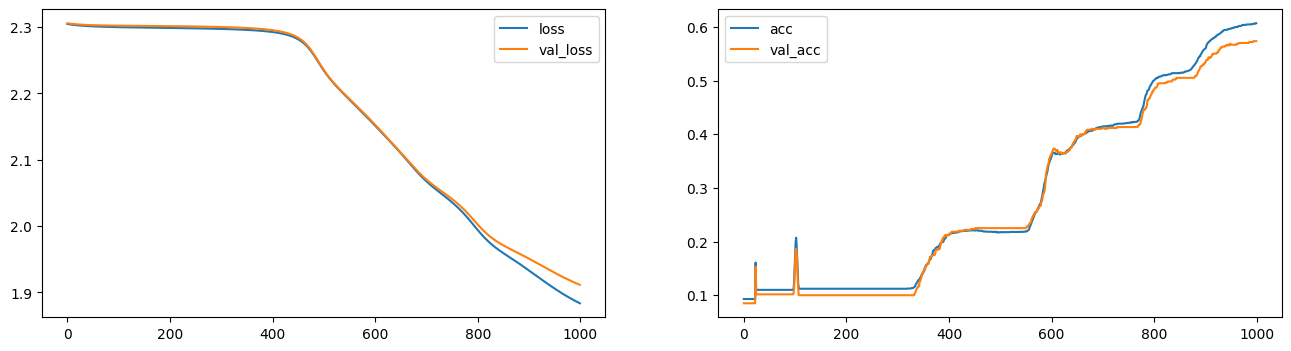

In [154]:
vis_history(acc_train_all_s3000, loss_train_all_s3000, acc_test_all_s3000, loss_test_all_s3000)

# Сигмоида + нормировка

In [272]:
n_epochs = 1000
batch_size = 100
learning_rate = 0.05

X_mn_train = torch.from_numpy(np.array(X_mn_train))
X_mn_test = torch.from_numpy(np.array(X_mn_test))
X_mn_train = X_mn_train.flatten(start_dim=1).float()
X_mn_test = X_mn_test.flatten(start_dim=1).float()
y_mn_train = torch.from_numpy(np.array(y_mn_train))
y_mn_test = torch.from_numpy(np.array(y_mn_test))
print(X_mn_train.size())
print(X_mn_train.size())
D_in = np.array(X_mn_train).shape[1]
print(D_in)
D_out = 10
loss_fn = torch.nn.CrossEntropyLoss()
model_sn = Model_n(D_in,200,20,D_out)
acc_train_all_s3000n, loss_train_all_s3000n, acc_test_all_s3000n, loss_test_all_s3000n = model_sn.train(model_sn,n_epochs, batch_size, learning_rate, X_mn_train, y_mn_train, X_mn_test, y_mn_test)

torch.Size([2400, 720])
torch.Size([2400, 720])
720


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 705.85it/s]


Epoch 0: 
 Accuracy - train: 0.19875 | test: 0.18166666666666667 
 Loss - train: 2.2928273677825928 | test: 2.295144557952881


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 738.29it/s]


Epoch 1: 
 Accuracy - train: 0.22958333333333333 | test: 0.21166666666666667 
 Loss - train: 2.2854602336883545 | test: 2.287832498550415


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 521.74it/s]


Epoch 2: 
 Accuracy - train: 0.25083333333333335 | test: 0.235 
 Loss - train: 2.2811355590820312 | test: 2.283559799194336


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 617.02it/s]

Epoch 3: 
 Accuracy - train: 0.27208333333333334 | test: 0.25666666666666665 
 Loss - train: 2.2781643867492676 | test: 2.2806897163391113

100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 704.39it/s]


Epoch 4: 
 Accuracy - train: 0.28208333333333335 | test: 0.27 
 Loss - train: 2.275784730911255 | test: 2.278430223464966


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 702.51it/s]


Epoch 5: 
 Accuracy - train: 0.28791666666666665 | test: 0.27666666666666667 
 Loss - train: 2.273683786392212 | test: 2.2764687538146973


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 680.74it/s]


Epoch 6: 
 Accuracy - train: 0.2916666666666667 | test: 0.27666666666666667 
 Loss - train: 2.2717154026031494 | test: 2.2746520042419434


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 641.87it/s]


Epoch 7: 
 Accuracy - train: 0.2925 | test: 0.28 
 Loss - train: 2.2698023319244385 | test: 2.27290678024292


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 698.32it/s]


Epoch 8: 
 Accuracy - train: 0.2966666666666667 | test: 0.28 
 Loss - train: 2.267902135848999 | test: 2.271183729171753


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 648.64it/s]


Epoch 9: 
 Accuracy - train: 0.29541666666666666 | test: 0.2733333333333333 
 Loss - train: 2.2660014629364014 | test: 2.2694780826568604


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 701.02it/s]


Epoch 10: 
 Accuracy - train: 0.2945833333333333 | test: 0.2683333333333333 
 Loss - train: 2.264049530029297 | test: 2.267732858657837


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 682.75it/s]


Epoch 11: 
 Accuracy - train: 0.2875 | test: 0.26666666666666666 
 Loss - train: 2.2620370388031006 | test: 2.265944719314575


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 738.07it/s]


Epoch 12: 
 Accuracy - train: 0.28208333333333335 | test: 0.26166666666666666 
 Loss - train: 2.2599525451660156 | test: 2.2640984058380127


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 750.02it/s]


Epoch 13: 
 Accuracy - train: 0.2783333333333333 | test: 0.26 
 Loss - train: 2.257777452468872 | test: 2.262178897857666


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 685.74it/s]


Epoch 14: 
 Accuracy - train: 0.27166666666666667 | test: 0.25166666666666665 
 Loss - train: 2.2555248737335205 | test: 2.260190963745117


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 637.98it/s]


Epoch 15: 
 Accuracy - train: 0.27 | test: 0.245 
 Loss - train: 2.253190279006958 | test: 2.2581374645233154


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 626.11it/s]


Epoch 16: 
 Accuracy - train: 0.2654166666666667 | test: 0.235 
 Loss - train: 2.2507734298706055 | test: 2.256016254425049


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 645.58it/s]


Epoch 17: 
 Accuracy - train: 0.2608333333333333 | test: 0.23 
 Loss - train: 2.248288154602051 | test: 2.253828525543213


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 750.01it/s]


Epoch 18: 
 Accuracy - train: 0.25666666666666665 | test: 0.22666666666666666 
 Loss - train: 2.245757818222046 | test: 2.251601457595825


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 685.62it/s]


Epoch 19: 
 Accuracy - train: 0.2529166666666667 | test: 0.22333333333333333 
 Loss - train: 2.2431893348693848 | test: 2.2493388652801514


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 543.00it/s]


Epoch 20: 
 Accuracy - train: 0.25 | test: 0.22333333333333333 
 Loss - train: 2.240602493286133 | test: 2.247051239013672


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 603.48it/s]


Epoch 21: 
 Accuracy - train: 0.24625 | test: 0.22166666666666668 
 Loss - train: 2.237981081008911 | test: 2.2447280883789062


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 578.21it/s]

Epoch 22: 
 Accuracy - train: 0.24416666666666667 | test: 0.21833333333333332 
 Loss - train: 2.235374689102173 | test: 2.2424097061157227



100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 599.88it/s]


Epoch 23: 
 Accuracy - train: 0.24083333333333334 | test: 0.21833333333333332 
 Loss - train: 2.2327535152435303 | test: 2.240069627761841


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 623.18it/s]


Epoch 24: 
 Accuracy - train: 0.23833333333333334 | test: 0.21666666666666667 
 Loss - train: 2.23014235496521 | test: 2.2377266883850098


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 585.38it/s]

Epoch 25: 
 Accuracy - train: 0.23708333333333334 | test: 0.21666666666666667 
 Loss - train: 2.2275185585021973 | test: 2.2353627681732178

100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 680.89it/s]


Epoch 26: 
 Accuracy - train: 0.23583333333333334 | test: 0.21666666666666667 
 Loss - train: 2.2249040603637695 | test: 2.232997417449951


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 452.82it/s]


Epoch 27: 
 Accuracy - train: 0.23541666666666666 | test: 0.21666666666666667 
 Loss - train: 2.2222912311553955 | test: 2.230635404586792


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 459.03it/s]


Epoch 28: 
 Accuracy - train: 0.23541666666666666 | test: 0.21666666666666667 
 Loss - train: 2.2196884155273438 | test: 2.228256940841675


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 486.70it/s]


Epoch 29: 
 Accuracy - train: 0.23583333333333334 | test: 0.21666666666666667 
 Loss - train: 2.217104911804199 | test: 2.2258849143981934


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 489.61it/s]


Epoch 30: 
 Accuracy - train: 0.23666666666666666 | test: 0.21666666666666667 
 Loss - train: 2.2145297527313232 | test: 2.223524570465088


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 501.12it/s]


Epoch 31: 
 Accuracy - train: 0.23666666666666666 | test: 0.21833333333333332 
 Loss - train: 2.211962938308716 | test: 2.2211666107177734


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 511.87it/s]


Epoch 32: 
 Accuracy - train: 0.2375 | test: 0.21833333333333332 
 Loss - train: 2.2094333171844482 | test: 2.218843698501587


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 541.04it/s]


Epoch 33: 
 Accuracy - train: 0.24 | test: 0.22 
 Loss - train: 2.206928253173828 | test: 2.2165441513061523


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 774.19it/s]


Epoch 34: 
 Accuracy - train: 0.24083333333333334 | test: 0.22166666666666668 
 Loss - train: 2.2044618129730225 | test: 2.2142739295959473


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 772.41it/s]


Epoch 35: 
 Accuracy - train: 0.245 | test: 0.22333333333333333 
 Loss - train: 2.202038526535034 | test: 2.2120354175567627


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 822.92it/s]


Epoch 36: 
 Accuracy - train: 0.2475 | test: 0.225 
 Loss - train: 2.1996562480926514 | test: 2.209820508956909


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 758.97it/s]


Epoch 37: 
 Accuracy - train: 0.25083333333333335 | test: 0.22666666666666666 
 Loss - train: 2.1973226070404053 | test: 2.207660436630249


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 585.59it/s]


Epoch 38: 
 Accuracy - train: 0.25333333333333335 | test: 0.22666666666666666 
 Loss - train: 2.195021390914917 | test: 2.205554246902466


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 545.43it/s]


Epoch 39: 
 Accuracy - train: 0.2604166666666667 | test: 0.23166666666666666 
 Loss - train: 2.192761182785034 | test: 2.203479528427124


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 578.29it/s]


Epoch 40: 
 Accuracy - train: 0.2629166666666667 | test: 0.23666666666666666 
 Loss - train: 2.1905436515808105 | test: 2.2014408111572266


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 705.88it/s]


Epoch 41: 
 Accuracy - train: 0.27 | test: 0.24 
 Loss - train: 2.188337564468384 | test: 2.199387311935425


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 690.77it/s]


Epoch 42: 
 Accuracy - train: 0.27541666666666664 | test: 0.24 
 Loss - train: 2.1861488819122314 | test: 2.1973979473114014


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 675.04it/s]


Epoch 43: 
 Accuracy - train: 0.27791666666666665 | test: 0.24833333333333332 
 Loss - train: 2.1839795112609863 | test: 2.1953787803649902


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 617.93it/s]


Epoch 44: 
 Accuracy - train: 0.28208333333333335 | test: 0.25666666666666665 
 Loss - train: 2.1818032264709473 | test: 2.193378448486328


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 564.57it/s]


Epoch 45: 
 Accuracy - train: 0.28875 | test: 0.26666666666666666 
 Loss - train: 2.179626703262329 | test: 2.191368341445923


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 600.13it/s]


Epoch 46: 
 Accuracy - train: 0.2920833333333333 | test: 0.27 
 Loss - train: 2.177433967590332 | test: 2.1893341541290283


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 612.29it/s]


Epoch 47: 
 Accuracy - train: 0.29375 | test: 0.2733333333333333 
 Loss - train: 2.17521595954895 | test: 2.1872949600219727


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 612.32it/s]


Epoch 48: 
 Accuracy - train: 0.2970833333333333 | test: 0.275 
 Loss - train: 2.1729722023010254 | test: 2.1852223873138428


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 739.88it/s]


Epoch 49: 
 Accuracy - train: 0.2991666666666667 | test: 0.28 
 Loss - train: 2.1706979274749756 | test: 2.183100700378418


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 726.01it/s]


Epoch 50: 
 Accuracy - train: 0.3016666666666667 | test: 0.285 
 Loss - train: 2.1683766841888428 | test: 2.180957555770874


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 701.77it/s]


Epoch 51: 
 Accuracy - train: 0.3045833333333333 | test: 0.2866666666666667 
 Loss - train: 2.1660242080688477 | test: 2.178802013397217


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 761.40it/s]


Epoch 52: 
 Accuracy - train: 0.3075 | test: 0.29 
 Loss - train: 2.1636288166046143 | test: 2.1765639781951904


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 774.46it/s]


Epoch 53: 
 Accuracy - train: 0.31 | test: 0.2916666666666667 
 Loss - train: 2.161184787750244 | test: 2.174347162246704


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 727.20it/s]


Epoch 54: 
 Accuracy - train: 0.3125 | test: 0.295 
 Loss - train: 2.1587088108062744 | test: 2.172015905380249


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 774.43it/s]


Epoch 55: 
 Accuracy - train: 0.315 | test: 0.29833333333333334 
 Loss - train: 2.1562108993530273 | test: 2.169696092605591


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 735.11it/s]


Epoch 56: 
 Accuracy - train: 0.31666666666666665 | test: 0.29833333333333334 
 Loss - train: 2.153674364089966 | test: 2.1673591136932373


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 743.35it/s]


Epoch 57: 
 Accuracy - train: 0.31916666666666665 | test: 0.2966666666666667 
 Loss - train: 2.1511154174804688 | test: 2.1650452613830566


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 687.12it/s]


Epoch 58: 
 Accuracy - train: 0.32208333333333333 | test: 0.30333333333333334 
 Loss - train: 2.1485438346862793 | test: 2.1626009941101074


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 705.85it/s]


Epoch 59: 
 Accuracy - train: 0.325 | test: 0.30666666666666664 
 Loss - train: 2.145983934402466 | test: 2.1602864265441895


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 695.65it/s]


Epoch 60: 
 Accuracy - train: 0.3279166666666667 | test: 0.30666666666666664 
 Loss - train: 2.143422842025757 | test: 2.1579747200012207


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 683.83it/s]


Epoch 61: 
 Accuracy - train: 0.33458333333333334 | test: 0.31 
 Loss - train: 2.1408658027648926 | test: 2.15556263923645


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 600.58it/s]


Epoch 62: 
 Accuracy - train: 0.33625 | test: 0.31666666666666665 
 Loss - train: 2.1383237838745117 | test: 2.1532154083251953


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 648.65it/s]


Epoch 63: 
 Accuracy - train: 0.3408333333333333 | test: 0.32 
 Loss - train: 2.1358044147491455 | test: 2.1509628295898438


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 657.31it/s]


Epoch 64: 
 Accuracy - train: 0.3441666666666667 | test: 0.3233333333333333 
 Loss - train: 2.133289098739624 | test: 2.148538112640381


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 571.44it/s]


Epoch 65: 
 Accuracy - train: 0.34958333333333336 | test: 0.32666666666666666 
 Loss - train: 2.1307990550994873 | test: 2.1461751461029053


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 594.95it/s]


Epoch 66: 
 Accuracy - train: 0.3591666666666667 | test: 0.3333333333333333 
 Loss - train: 2.128314733505249 | test: 2.143897294998169


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 644.81it/s]


Epoch 67: 
 Accuracy - train: 0.36583333333333334 | test: 0.3383333333333333 
 Loss - train: 2.125821590423584 | test: 2.1417410373687744


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 679.17it/s]


Epoch 68: 
 Accuracy - train: 0.37375 | test: 0.3416666666666667 
 Loss - train: 2.12331485748291 | test: 2.139443874359131


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 685.58it/s]


Epoch 69: 
 Accuracy - train: 0.38375 | test: 0.34833333333333333 
 Loss - train: 2.1208090782165527 | test: 2.1371145248413086


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 774.42it/s]


Epoch 70: 
 Accuracy - train: 0.38958333333333334 | test: 0.35333333333333333 
 Loss - train: 2.118257761001587 | test: 2.134798765182495


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 738.18it/s]


Epoch 71: 
 Accuracy - train: 0.39416666666666667 | test: 0.3616666666666667 
 Loss - train: 2.115711212158203 | test: 2.132453680038452


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 630.28it/s]


Epoch 72: 
 Accuracy - train: 0.39875 | test: 0.36666666666666664 
 Loss - train: 2.1130645275115967 | test: 2.1301324367523193


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 660.25it/s]


Epoch 73: 
 Accuracy - train: 0.4008333333333333 | test: 0.37166666666666665 
 Loss - train: 2.110400915145874 | test: 2.127718210220337


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 631.74it/s]


Epoch 74: 
 Accuracy - train: 0.40625 | test: 0.37166666666666665 
 Loss - train: 2.1076607704162598 | test: 2.125262498855591


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 617.95it/s]


Epoch 75: 
 Accuracy - train: 0.4075 | test: 0.37666666666666665 
 Loss - train: 2.1048827171325684 | test: 2.122591972351074


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 716.25it/s]


Epoch 76: 
 Accuracy - train: 0.40875 | test: 0.37666666666666665 
 Loss - train: 2.1020281314849854 | test: 2.120107650756836


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 705.90it/s]


Epoch 77: 
 Accuracy - train: 0.40958333333333335 | test: 0.37666666666666665 
 Loss - train: 2.099069356918335 | test: 2.117414712905884


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 738.19it/s]


Epoch 78: 
 Accuracy - train: 0.41125 | test: 0.38166666666666665 
 Loss - train: 2.096090078353882 | test: 2.1146860122680664


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 750.00it/s]


Epoch 79: 
 Accuracy - train: 0.41291666666666665 | test: 0.385 
 Loss - train: 2.0930960178375244 | test: 2.1119191646575928


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 774.20it/s]


Epoch 80: 
 Accuracy - train: 0.41375 | test: 0.3883333333333333 
 Loss - train: 2.0900232791900635 | test: 2.1093337535858154


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 813.59it/s]

Epoch 81: 
 Accuracy - train: 0.41458333333333336 | test: 0.3883333333333333 
 Loss - train: 2.086977005004883 | test: 2.1064603328704834

100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 791.58it/s]


Epoch 82: 
 Accuracy - train: 0.415 | test: 0.3883333333333333 
 Loss - train: 2.0839362144470215 | test: 2.1038451194763184


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 772.50it/s]


Epoch 83: 
 Accuracy - train: 0.41583333333333333 | test: 0.3883333333333333 
 Loss - train: 2.080932140350342 | test: 2.101099967956543


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 786.93it/s]


Epoch 84: 
 Accuracy - train: 0.41625 | test: 0.3883333333333333 
 Loss - train: 2.077890157699585 | test: 2.098365068435669


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 706.07it/s]


Epoch 85: 
 Accuracy - train: 0.41625 | test: 0.3883333333333333 
 Loss - train: 2.0749666690826416 | test: 2.0958309173583984


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 738.85it/s]


Epoch 86: 
 Accuracy - train: 0.41583333333333333 | test: 0.38666666666666666 
 Loss - train: 2.072164297103882 | test: 2.0932819843292236


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 697.10it/s]


Epoch 87: 
 Accuracy - train: 0.41625 | test: 0.3883333333333333 
 Loss - train: 2.069272756576538 | test: 2.0907530784606934


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 750.00it/s]


Epoch 88: 
 Accuracy - train: 0.4170833333333333 | test: 0.3883333333333333 
 Loss - train: 2.066556453704834 | test: 2.0885236263275146


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 738.28it/s]


Epoch 89: 
 Accuracy - train: 0.4170833333333333 | test: 0.3883333333333333 
 Loss - train: 2.0638539791107178 | test: 2.086047649383545


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 737.84it/s]


Epoch 90: 
 Accuracy - train: 0.4170833333333333 | test: 0.3883333333333333 
 Loss - train: 2.061260938644409 | test: 2.083740711212158


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 750.15it/s]


Epoch 91: 
 Accuracy - train: 0.4175 | test: 0.39 
 Loss - train: 2.058663845062256 | test: 2.0813333988189697


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 753.59it/s]


Epoch 92: 
 Accuracy - train: 0.41791666666666666 | test: 0.39166666666666666 
 Loss - train: 2.0562376976013184 | test: 2.0793192386627197


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 800.25it/s]


Epoch 93: 
 Accuracy - train: 0.42083333333333334 | test: 0.39166666666666666 
 Loss - train: 2.053739070892334 | test: 2.076899528503418


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 813.55it/s]


Epoch 94: 
 Accuracy - train: 0.4245833333333333 | test: 0.39666666666666667 
 Loss - train: 2.0513131618499756 | test: 2.0749475955963135


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 800.00it/s]


Epoch 95: 
 Accuracy - train: 0.4270833333333333 | test: 0.3983333333333333 
 Loss - train: 2.048992156982422 | test: 2.0727362632751465


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 774.20it/s]


Epoch 96: 
 Accuracy - train: 0.4320833333333333 | test: 0.4033333333333333 
 Loss - train: 2.046656608581543 | test: 2.0704967975616455


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 747.22it/s]


Epoch 97: 
 Accuracy - train: 0.43583333333333335 | test: 0.4066666666666667 
 Loss - train: 2.0443029403686523 | test: 2.068632125854492


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 774.19it/s]


Epoch 98: 
 Accuracy - train: 0.4429166666666667 | test: 0.42 
 Loss - train: 2.0419633388519287 | test: 2.0664572715759277


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 715.41it/s]


Epoch 99: 
 Accuracy - train: 0.44666666666666666 | test: 0.4266666666666667 
 Loss - train: 2.0396535396575928 | test: 2.0643396377563477


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 727.68it/s]


Epoch 100: 
 Accuracy - train: 0.45458333333333334 | test: 0.42833333333333334 
 Loss - train: 2.037341833114624 | test: 2.0623788833618164


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 592.17it/s]


Epoch 101: 
 Accuracy - train: 0.46708333333333335 | test: 0.43833333333333335 
 Loss - train: 2.0350465774536133 | test: 2.0597970485687256


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 607.96it/s]


Epoch 102: 
 Accuracy - train: 0.4725 | test: 0.44333333333333336 
 Loss - train: 2.03275203704834 | test: 2.0578103065490723


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 532.79it/s]


Epoch 103: 
 Accuracy - train: 0.4795833333333333 | test: 0.4533333333333333 
 Loss - train: 2.0304625034332275 | test: 2.0562076568603516


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 639.88it/s]


Epoch 104: 
 Accuracy - train: 0.48333333333333334 | test: 0.4633333333333333 
 Loss - train: 2.028088092803955 | test: 2.0536954402923584


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 705.84it/s]


Epoch 105: 
 Accuracy - train: 0.4895833333333333 | test: 0.47 
 Loss - train: 2.0255467891693115 | test: 2.0513224601745605


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 726.35it/s]


Epoch 106: 
 Accuracy - train: 0.49333333333333335 | test: 0.475 
 Loss - train: 2.02317214012146 | test: 2.0490458011627197


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 750.00it/s]


Epoch 107: 
 Accuracy - train: 0.49916666666666665 | test: 0.4816666666666667 
 Loss - train: 2.020676851272583 | test: 2.0467543601989746


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 774.19it/s]


Epoch 108: 
 Accuracy - train: 0.5008333333333334 | test: 0.48333333333333334 
 Loss - train: 2.017976760864258 | test: 2.044154405593872


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 773.59it/s]


Epoch 109: 
 Accuracy - train: 0.5029166666666667 | test: 0.485 
 Loss - train: 2.015409231185913 | test: 2.0419609546661377


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 802.15it/s]


Epoch 110: 
 Accuracy - train: 0.5041666666666667 | test: 0.4866666666666667 
 Loss - train: 2.012782096862793 | test: 2.039565086364746


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 827.84it/s]


Epoch 111: 
 Accuracy - train: 0.5054166666666666 | test: 0.48833333333333334 
 Loss - train: 2.0100929737091064 | test: 2.036644220352173


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 784.57it/s]


Epoch 112: 
 Accuracy - train: 0.5075 | test: 0.48833333333333334 
 Loss - train: 2.007291555404663 | test: 2.0338165760040283


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 779.80it/s]


Epoch 113: 
 Accuracy - train: 0.5079166666666667 | test: 0.49 
 Loss - train: 2.004706621170044 | test: 2.0315237045288086


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 774.36it/s]


Epoch 114: 
 Accuracy - train: 0.50875 | test: 0.49 
 Loss - train: 2.001722812652588 | test: 2.029219627380371


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 761.55it/s]


Epoch 115: 
 Accuracy - train: 0.5095833333333334 | test: 0.49 
 Loss - train: 1.9990266561508179 | test: 2.025902509689331


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 706.08it/s]


Epoch 116: 
 Accuracy - train: 0.5108333333333334 | test: 0.49166666666666664 
 Loss - train: 1.9961752891540527 | test: 2.023886203765869


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 743.84it/s]


Epoch 117: 
 Accuracy - train: 0.51125 | test: 0.49166666666666664 
 Loss - train: 1.9933587312698364 | test: 2.020742654800415


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 710.55it/s]


Epoch 118: 
 Accuracy - train: 0.5116666666666667 | test: 0.49166666666666664 
 Loss - train: 1.990684986114502 | test: 2.0182435512542725


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 727.42it/s]


Epoch 119: 
 Accuracy - train: 0.5133333333333333 | test: 0.49333333333333335 
 Loss - train: 1.988160252571106 | test: 2.0166032314300537


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 743.89it/s]


Epoch 120: 
 Accuracy - train: 0.5133333333333333 | test: 0.49333333333333335 
 Loss - train: 1.985387921333313 | test: 2.0135157108306885


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 749.99it/s]


Epoch 121: 
 Accuracy - train: 0.5145833333333333 | test: 0.49333333333333335 
 Loss - train: 1.9828401803970337 | test: 2.011093854904175


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 774.39it/s]


Epoch 122: 
 Accuracy - train: 0.51375 | test: 0.49333333333333335 
 Loss - train: 1.9804046154022217 | test: 2.0097525119781494


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 695.74it/s]


Epoch 123: 
 Accuracy - train: 0.5141666666666667 | test: 0.49333333333333335 
 Loss - train: 1.9779789447784424 | test: 2.00639009475708


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 827.63it/s]


Epoch 124: 
 Accuracy - train: 0.5145833333333333 | test: 0.495 
 Loss - train: 1.9754681587219238 | test: 2.00454044342041


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 768.32it/s]


Epoch 125: 
 Accuracy - train: 0.5145833333333333 | test: 0.495 
 Loss - train: 1.9732081890106201 | test: 2.0026962757110596


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 774.20it/s]

Epoch 126: 
 Accuracy - train: 0.515 | test: 0.49166666666666664 
 Loss - train: 1.9711427688598633 | test: 2.000601291656494

100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 800.24it/s]


Epoch 127: 
 Accuracy - train: 0.5154166666666666 | test: 0.495 
 Loss - train: 1.968908429145813 | test: 1.9987058639526367


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 787.08it/s]


Epoch 128: 
 Accuracy - train: 0.5154166666666666 | test: 0.49333333333333335 
 Loss - train: 1.9667251110076904 | test: 1.996740460395813


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 737.49it/s]


Epoch 129: 
 Accuracy - train: 0.5154166666666666 | test: 0.49333333333333335 
 Loss - train: 1.964725136756897 | test: 1.9948480129241943


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 774.11it/s]


Epoch 130: 
 Accuracy - train: 0.5158333333333334 | test: 0.495 
 Loss - train: 1.9625877141952515 | test: 1.993475079536438


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 545.36it/s]


Epoch 131: 
 Accuracy - train: 0.5158333333333334 | test: 0.49333333333333335 
 Loss - train: 1.9606256484985352 | test: 1.9925569295883179


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 631.69it/s]


Epoch 132: 
 Accuracy - train: 0.5175 | test: 0.49333333333333335 
 Loss - train: 1.9586702585220337 | test: 1.9897682666778564


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 562.05it/s]


Epoch 133: 
 Accuracy - train: 0.5175 | test: 0.49666666666666665 
 Loss - train: 1.9568268060684204 | test: 1.9890507459640503


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 599.85it/s]


Epoch 134: 
 Accuracy - train: 0.5183333333333333 | test: 0.49166666666666664 
 Loss - train: 1.9548797607421875 | test: 1.987315058708191


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 722.66it/s]


Epoch 135: 
 Accuracy - train: 0.5195833333333333 | test: 0.49333333333333335 
 Loss - train: 1.9530385732650757 | test: 1.9852735996246338


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 752.31it/s]


Epoch 136: 
 Accuracy - train: 0.52125 | test: 0.49166666666666664 
 Loss - train: 1.9511191844940186 | test: 1.983598232269287


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 738.19it/s]


Epoch 137: 
 Accuracy - train: 0.52375 | test: 0.495 
 Loss - train: 1.9492547512054443 | test: 1.982232928276062


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 618.32it/s]


Epoch 138: 
 Accuracy - train: 0.5275 | test: 0.49333333333333335 
 Loss - train: 1.947508692741394 | test: 1.9819152355194092


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 467.94it/s]


Epoch 139: 
 Accuracy - train: 0.53375 | test: 0.5 
 Loss - train: 1.9456714391708374 | test: 1.9788576364517212


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 480.72it/s]


Epoch 140: 
 Accuracy - train: 0.5391666666666667 | test: 0.495 
 Loss - train: 1.9438626766204834 | test: 1.9788113832473755


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 475.15it/s]


Epoch 141: 
 Accuracy - train: 0.5445833333333333 | test: 0.505 
 Loss - train: 1.9419348239898682 | test: 1.9771274328231812


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 552.22it/s]


Epoch 142: 
 Accuracy - train: 0.5508333333333333 | test: 0.5066666666666667 
 Loss - train: 1.9401895999908447 | test: 1.9754384756088257


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 738.20it/s]


Epoch 143: 
 Accuracy - train: 0.5591666666666667 | test: 0.5066666666666667 
 Loss - train: 1.938079595565796 | test: 1.9747369289398193


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 750.21it/s]


Epoch 144: 
 Accuracy - train: 0.5654166666666667 | test: 0.5133333333333333 
 Loss - train: 1.9362581968307495 | test: 1.9726603031158447


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 746.37it/s]


Epoch 145: 
 Accuracy - train: 0.5704166666666667 | test: 0.5233333333333333 
 Loss - train: 1.9340927600860596 | test: 1.9700852632522583


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 699.61it/s]


Epoch 146: 
 Accuracy - train: 0.5795833333333333 | test: 0.5266666666666666 
 Loss - train: 1.9320117235183716 | test: 1.969529390335083


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 727.46it/s]


Epoch 147: 
 Accuracy - train: 0.5845833333333333 | test: 0.5266666666666666 
 Loss - train: 1.9297200441360474 | test: 1.9676398038864136


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 735.97it/s]


Epoch 148: 
 Accuracy - train: 0.5904166666666667 | test: 0.535 
 Loss - train: 1.927869439125061 | test: 1.965999722480774


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 741.98it/s]


Epoch 149: 
 Accuracy - train: 0.5941666666666666 | test: 0.535 
 Loss - train: 1.9255180358886719 | test: 1.9650264978408813


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 727.39it/s]


Epoch 150: 
 Accuracy - train: 0.5991666666666666 | test: 0.54 
 Loss - train: 1.9227714538574219 | test: 1.962641954421997


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 736.61it/s]


Epoch 151: 
 Accuracy - train: 0.6029166666666667 | test: 0.545 
 Loss - train: 1.9205485582351685 | test: 1.9605600833892822


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 757.20it/s]


Epoch 152: 
 Accuracy - train: 0.6070833333333333 | test: 0.5483333333333333 
 Loss - train: 1.9179809093475342 | test: 1.9588786363601685


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 657.50it/s]


Epoch 153: 
 Accuracy - train: 0.6095833333333334 | test: 0.5483333333333333 
 Loss - train: 1.9153355360031128 | test: 1.9574875831604004


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 685.88it/s]


Epoch 154: 
 Accuracy - train: 0.615 | test: 0.5516666666666666 
 Loss - train: 1.9124969244003296 | test: 1.9559231996536255


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 705.83it/s]


Epoch 155: 
 Accuracy - train: 0.615 | test: 0.5533333333333333 
 Loss - train: 1.9095951318740845 | test: 1.9528374671936035


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 695.68it/s]


Epoch 156: 
 Accuracy - train: 0.6175 | test: 0.56 
 Loss - train: 1.9069185256958008 | test: 1.9514015913009644


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 706.05it/s]


Epoch 157: 
 Accuracy - train: 0.6179166666666667 | test: 0.5583333333333333 
 Loss - train: 1.903860092163086 | test: 1.9494194984436035


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 705.83it/s]


Epoch 158: 
 Accuracy - train: 0.6179166666666667 | test: 0.5666666666666667 
 Loss - train: 1.9016941785812378 | test: 1.9473477602005005


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 727.27it/s]


Epoch 159: 
 Accuracy - train: 0.61875 | test: 0.5683333333333334 
 Loss - train: 1.897849678993225 | test: 1.9441266059875488


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 706.03it/s]


Epoch 160: 
 Accuracy - train: 0.6191666666666666 | test: 0.5683333333333334 
 Loss - train: 1.895019292831421 | test: 1.942800521850586


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 716.42it/s]


Epoch 161: 
 Accuracy - train: 0.6191666666666666 | test: 0.5683333333333334 
 Loss - train: 1.8923710584640503 | test: 1.942297339439392


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 686.72it/s]


Epoch 162: 
 Accuracy - train: 0.6191666666666666 | test: 0.5683333333333334 
 Loss - train: 1.8895381689071655 | test: 1.9390932321548462


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 448.83it/s]


Epoch 163: 
 Accuracy - train: 0.6191666666666666 | test: 0.5683333333333334 
 Loss - train: 1.8870028257369995 | test: 1.938517451286316


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 630.79it/s]

Epoch 164: 
 Accuracy - train: 0.6191666666666666 | test: 0.5716666666666667 
 Loss - train: 1.8838319778442383 | test: 1.9354244470596313

100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 665.87it/s]


Epoch 165: 
 Accuracy - train: 0.6195833333333334 | test: 0.5733333333333334 
 Loss - train: 1.8813844919204712 | test: 1.9337230920791626


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 685.95it/s]


Epoch 166: 
 Accuracy - train: 0.6195833333333334 | test: 0.5733333333333334 
 Loss - train: 1.879632592201233 | test: 1.9318867921829224


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 719.48it/s]


Epoch 167: 
 Accuracy - train: 0.6195833333333334 | test: 0.5716666666666667 
 Loss - train: 1.8774330615997314 | test: 1.9307613372802734


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 788.51it/s]


Epoch 168: 
 Accuracy - train: 0.6195833333333334 | test: 0.5716666666666667 
 Loss - train: 1.8753840923309326 | test: 1.9296091794967651


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 815.50it/s]


Epoch 169: 
 Accuracy - train: 0.62 | test: 0.5733333333333334 
 Loss - train: 1.8723970651626587 | test: 1.9276255369186401


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 786.75it/s]


Epoch 170: 
 Accuracy - train: 0.62 | test: 0.5766666666666667 
 Loss - train: 1.871093988418579 | test: 1.9265329837799072


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 676.19it/s]


Epoch 171: 
 Accuracy - train: 0.62 | test: 0.575 
 Loss - train: 1.8686707019805908 | test: 1.9243645668029785


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 685.65it/s]

Epoch 172: 
 Accuracy - train: 0.62 | test: 0.5766666666666667 
 Loss - train: 1.866817593574524 | test: 1.9230409860610962

100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 603.33it/s]


Epoch 173: 
 Accuracy - train: 0.62 | test: 0.5766666666666667 
 Loss - train: 1.8643864393234253 | test: 1.921020269393921


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 727.29it/s]


Epoch 174: 
 Accuracy - train: 0.62 | test: 0.5733333333333334 
 Loss - train: 1.8626703023910522 | test: 1.9206188917160034


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 688.21it/s]


Epoch 175: 
 Accuracy - train: 0.62 | test: 0.5766666666666667 
 Loss - train: 1.8606349229812622 | test: 1.9190295934677124


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 777.12it/s]


Epoch 176: 
 Accuracy - train: 0.62 | test: 0.575 
 Loss - train: 1.859405517578125 | test: 1.9182122945785522


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 749.16it/s]


Epoch 177: 
 Accuracy - train: 0.62 | test: 0.5733333333333334 
 Loss - train: 1.8569914102554321 | test: 1.915977954864502


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 726.32it/s]


Epoch 178: 
 Accuracy - train: 0.62 | test: 0.575 
 Loss - train: 1.855252742767334 | test: 1.9136666059494019


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 752.41it/s]


Epoch 179: 
 Accuracy - train: 0.62 | test: 0.575 
 Loss - train: 1.8536474704742432 | test: 1.9124212265014648


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 842.03it/s]


Epoch 180: 
 Accuracy - train: 0.62 | test: 0.5733333333333334 
 Loss - train: 1.8519123792648315 | test: 1.9111045598983765


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 774.21it/s]


Epoch 181: 
 Accuracy - train: 0.62 | test: 0.5733333333333334 
 Loss - train: 1.8498551845550537 | test: 1.9090250730514526


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 857.15it/s]


Epoch 182: 
 Accuracy - train: 0.6204166666666666 | test: 0.5766666666666667 
 Loss - train: 1.8477354049682617 | test: 1.9076817035675049


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 762.43it/s]


Epoch 183: 
 Accuracy - train: 0.6216666666666667 | test: 0.5766666666666667 
 Loss - train: 1.8460514545440674 | test: 1.9067981243133545


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 749.99it/s]


Epoch 184: 
 Accuracy - train: 0.62625 | test: 0.575 
 Loss - train: 1.8441245555877686 | test: 1.9039723873138428


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 774.24it/s]


Epoch 185: 
 Accuracy - train: 0.6333333333333333 | test: 0.59 
 Loss - train: 1.8420137166976929 | test: 1.9020086526870728


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 738.26it/s]


Epoch 186: 
 Accuracy - train: 0.6295833333333334 | test: 0.5866666666666667 
 Loss - train: 1.8406447172164917 | test: 1.902184247970581


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 727.27it/s]


Epoch 187: 
 Accuracy - train: 0.66375 | test: 0.61 
 Loss - train: 1.8375468254089355 | test: 1.8982425928115845


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 756.51it/s]

Epoch 188: 
 Accuracy - train: 0.67 | test: 0.615 
 Loss - train: 1.8353413343429565 | test: 1.8961517810821533

100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 752.88it/s]


Epoch 189: 
 Accuracy - train: 0.68125 | test: 0.6316666666666667 
 Loss - train: 1.8333293199539185 | test: 1.8933684825897217


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 750.29it/s]


Epoch 190: 
 Accuracy - train: 0.7008333333333333 | test: 0.6566666666666666 
 Loss - train: 1.830894112586975 | test: 1.8912194967269897


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 695.45it/s]


Epoch 191: 
 Accuracy - train: 0.71 | test: 0.6666666666666666 
 Loss - train: 1.8286786079406738 | test: 1.8899184465408325


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 750.31it/s]


Epoch 192: 
 Accuracy - train: 0.7241666666666666 | test: 0.68 
 Loss - train: 1.8255336284637451 | test: 1.8853414058685303


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 748.19it/s]


Epoch 193: 
 Accuracy - train: 0.7266666666666667 | test: 0.685 
 Loss - train: 1.8222235441207886 | test: 1.8839184045791626


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 781.81it/s]


Epoch 194: 
 Accuracy - train: 0.7308333333333333 | test: 0.6916666666666667 
 Loss - train: 1.8191723823547363 | test: 1.8807820081710815


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 745.71it/s]


Epoch 195: 
 Accuracy - train: 0.7308333333333333 | test: 0.6983333333333334 
 Loss - train: 1.8163748979568481 | test: 1.8780008554458618


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 712.82it/s]


Epoch 196: 
 Accuracy - train: 0.74 | test: 0.6966666666666667 
 Loss - train: 1.812400460243225 | test: 1.874664306640625


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 668.02it/s]


Epoch 197: 
 Accuracy - train: 0.7395833333333334 | test: 0.6983333333333334 
 Loss - train: 1.8099092245101929 | test: 1.8710986375808716


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 706.07it/s]


Epoch 198: 
 Accuracy - train: 0.7454166666666666 | test: 0.7 
 Loss - train: 1.8060280084609985 | test: 1.8672267198562622


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 738.33it/s]


Epoch 199: 
 Accuracy - train: 0.7516666666666667 | test: 0.7033333333333334 
 Loss - train: 1.802362084388733 | test: 1.8636763095855713


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 716.15it/s]


Epoch 200: 
 Accuracy - train: 0.7554166666666666 | test: 0.7116666666666667 
 Loss - train: 1.799435019493103 | test: 1.8607721328735352


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 786.90it/s]


Epoch 201: 
 Accuracy - train: 0.75125 | test: 0.7083333333333334 
 Loss - train: 1.7963656187057495 | test: 1.856523871421814


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 727.48it/s]


Epoch 202: 
 Accuracy - train: 0.7583333333333333 | test: 0.7133333333333334 
 Loss - train: 1.792568564414978 | test: 1.8528223037719727


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 768.61it/s]


Epoch 203: 
 Accuracy - train: 0.7666666666666667 | test: 0.7066666666666667 
 Loss - train: 1.7915517091751099 | test: 1.8549413681030273


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 761.60it/s]


Epoch 204: 
 Accuracy - train: 0.775 | test: 0.715 
 Loss - train: 1.786718487739563 | test: 1.8470706939697266


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 750.21it/s]


Epoch 205: 
 Accuracy - train: 0.7741666666666667 | test: 0.7183333333333334 
 Loss - train: 1.783996820449829 | test: 1.8453599214553833


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 774.14it/s]


Epoch 206: 
 Accuracy - train: 0.7833333333333333 | test: 0.72 
 Loss - train: 1.7813047170639038 | test: 1.842394232749939


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 761.92it/s]


Epoch 207: 
 Accuracy - train: 0.7879166666666667 | test: 0.7316666666666667 
 Loss - train: 1.7780280113220215 | test: 1.8396769762039185


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 727.27it/s]


Epoch 208: 
 Accuracy - train: 0.79125 | test: 0.7333333333333333 
 Loss - train: 1.7756500244140625 | test: 1.8373714685440063


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 761.62it/s]


Epoch 209: 
 Accuracy - train: 0.7841666666666667 | test: 0.7283333333333334 
 Loss - train: 1.7752091884613037 | test: 1.8382065296173096


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 800.01it/s]

Epoch 210: 
 Accuracy - train: 0.80125 | test: 0.745 
 Loss - train: 1.7697961330413818 | test: 1.832495927810669



100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 717.24it/s]


Epoch 211: 
 Accuracy - train: 0.8025 | test: 0.7466666666666667 
 Loss - train: 1.7694065570831299 | test: 1.832659125328064


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 738.20it/s]


Epoch 212: 
 Accuracy - train: 0.8083333333333333 | test: 0.7533333333333333 
 Loss - train: 1.7641687393188477 | test: 1.828764796257019


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 800.24it/s]


Epoch 213: 
 Accuracy - train: 0.8091666666666667 | test: 0.75 
 Loss - train: 1.7615227699279785 | test: 1.8259081840515137


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 825.35it/s]


Epoch 214: 
 Accuracy - train: 0.81 | test: 0.755 
 Loss - train: 1.7583503723144531 | test: 1.822594165802002


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 782.32it/s]


Epoch 215: 
 Accuracy - train: 0.8108333333333333 | test: 0.755 
 Loss - train: 1.7583398818969727 | test: 1.820132851600647


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 810.92it/s]


Epoch 216: 
 Accuracy - train: 0.81375 | test: 0.7533333333333333 
 Loss - train: 1.7527164220809937 | test: 1.8168781995773315


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 750.20it/s]


Epoch 217: 
 Accuracy - train: 0.81375 | test: 0.7666666666666667 
 Loss - train: 1.7534159421920776 | test: 1.816572904586792


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 727.28it/s]


Epoch 218: 
 Accuracy - train: 0.8179166666666666 | test: 0.7683333333333333 
 Loss - train: 1.747606635093689 | test: 1.8126729726791382


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 859.23it/s]


Epoch 219: 
 Accuracy - train: 0.8175 | test: 0.7616666666666667 
 Loss - train: 1.744806170463562 | test: 1.8118101358413696


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 813.49it/s]


Epoch 220: 
 Accuracy - train: 0.81875 | test: 0.7683333333333333 
 Loss - train: 1.741088628768921 | test: 1.8074198961257935


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 782.19it/s]


Epoch 221: 
 Accuracy - train: 0.8195833333333333 | test: 0.7633333333333333 
 Loss - train: 1.738434910774231 | test: 1.8060768842697144


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 827.83it/s]

Epoch 222: 
 Accuracy - train: 0.8195833333333333 | test: 0.77 
 Loss - train: 1.7350120544433594 | test: 1.8010644912719727

100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 819.91it/s]


Epoch 223: 
 Accuracy - train: 0.8208333333333333 | test: 0.77 
 Loss - train: 1.7330118417739868 | test: 1.8018674850463867


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 732.71it/s]


Epoch 224: 
 Accuracy - train: 0.82125 | test: 0.7766666666666666 
 Loss - train: 1.7296836376190186 | test: 1.796301007270813


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 800.26it/s]


Epoch 225: 
 Accuracy - train: 0.8216666666666667 | test: 0.7733333333333333 
 Loss - train: 1.7272827625274658 | test: 1.794226050376892


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 813.18it/s]


Epoch 226: 
 Accuracy - train: 0.8216666666666667 | test: 0.775 
 Loss - train: 1.724528193473816 | test: 1.7932765483856201


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 827.83it/s]


Epoch 227: 
 Accuracy - train: 0.8220833333333334 | test: 0.775 
 Loss - train: 1.721557855606079 | test: 1.790099859237671


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 838.90it/s]


Epoch 228: 
 Accuracy - train: 0.8225 | test: 0.775 
 Loss - train: 1.7187796831130981 | test: 1.78758704662323


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 804.39it/s]


Epoch 229: 
 Accuracy - train: 0.8225 | test: 0.7766666666666666 
 Loss - train: 1.7169405221939087 | test: 1.7857470512390137


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 729.15it/s]


Epoch 230: 
 Accuracy - train: 0.8225 | test: 0.7716666666666666 
 Loss - train: 1.7135974168777466 | test: 1.783620834350586


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 815.48it/s]


Epoch 231: 
 Accuracy - train: 0.8225 | test: 0.7766666666666666 
 Loss - train: 1.7112138271331787 | test: 1.7806284427642822


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 800.19it/s]


Epoch 232: 
 Accuracy - train: 0.8225 | test: 0.7766666666666666 
 Loss - train: 1.7094979286193848 | test: 1.7787754535675049


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 685.72it/s]


Epoch 233: 
 Accuracy - train: 0.8225 | test: 0.775 
 Loss - train: 1.7073804140090942 | test: 1.7793166637420654


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 791.16it/s]


Epoch 234: 
 Accuracy - train: 0.8225 | test: 0.78 
 Loss - train: 1.7053794860839844 | test: 1.7757116556167603


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 827.60it/s]

Epoch 235: 
 Accuracy - train: 0.8225 | test: 0.775 
 Loss - train: 1.704940915107727 | test: 1.7780529260635376

100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 857.15it/s]


Epoch 236: 
 Accuracy - train: 0.8225 | test: 0.7733333333333333 
 Loss - train: 1.7015259265899658 | test: 1.7724603414535522


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 813.57it/s]


Epoch 237: 
 Accuracy - train: 0.8225 | test: 0.7766666666666666 
 Loss - train: 1.7004822492599487 | test: 1.770545244216919


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 800.24it/s]


Epoch 238: 
 Accuracy - train: 0.8225 | test: 0.7733333333333333 
 Loss - train: 1.6985527276992798 | test: 1.7706537246704102


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 750.02it/s]


Epoch 239: 
 Accuracy - train: 0.8225 | test: 0.7733333333333333 
 Loss - train: 1.6967406272888184 | test: 1.7692934274673462


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 813.53it/s]


Epoch 240: 
 Accuracy - train: 0.8225 | test: 0.7733333333333333 
 Loss - train: 1.6952282190322876 | test: 1.768662929534912


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 800.00it/s]


Epoch 241: 
 Accuracy - train: 0.8225 | test: 0.7716666666666666 
 Loss - train: 1.6932497024536133 | test: 1.7657651901245117


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 666.62it/s]

Epoch 242: 
 Accuracy - train: 0.8229166666666666 | test: 0.7716666666666666 
 Loss - train: 1.692419409751892 | test: 1.76667320728302

100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 759.27it/s]


Epoch 243: 
 Accuracy - train: 0.8229166666666666 | test: 0.7716666666666666 
 Loss - train: 1.690626859664917 | test: 1.7652941942214966


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 780.81it/s]

Epoch 244: 
 Accuracy - train: 0.8225 | test: 0.7716666666666666 
 Loss - train: 1.6893974542617798 | test: 1.764142632484436

100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 722.68it/s]


Epoch 245: 
 Accuracy - train: 0.8229166666666666 | test: 0.7733333333333333 
 Loss - train: 1.6883866786956787 | test: 1.7619661092758179


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 750.23it/s]


Epoch 246: 
 Accuracy - train: 0.8229166666666666 | test: 0.7733333333333333 
 Loss - train: 1.6866142749786377 | test: 1.7597434520721436


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 774.14it/s]


Epoch 247: 
 Accuracy - train: 0.8229166666666666 | test: 0.775 
 Loss - train: 1.6852178573608398 | test: 1.757731318473816


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 738.26it/s]


Epoch 248: 
 Accuracy - train: 0.8229166666666666 | test: 0.77 
 Loss - train: 1.6840523481369019 | test: 1.7568328380584717


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 808.67it/s]

Epoch 249: 
 Accuracy - train: 0.8225 | test: 0.775 
 Loss - train: 1.6829265356063843 | test: 1.7551411390304565



100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 800.18it/s]


Epoch 250: 
 Accuracy - train: 0.8229166666666666 | test: 0.7716666666666666 
 Loss - train: 1.6817225217819214 | test: 1.755187749862671


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 677.28it/s]

Epoch 251: 
 Accuracy - train: 0.8229166666666666 | test: 0.7733333333333333 
 Loss - train: 1.680937647819519 | test: 1.7539266347885132

100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 750.02it/s]


Epoch 252: 
 Accuracy - train: 0.8229166666666666 | test: 0.77 
 Loss - train: 1.6796469688415527 | test: 1.7545799016952515


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 761.72it/s]


Epoch 253: 
 Accuracy - train: 0.8229166666666666 | test: 0.7683333333333333 
 Loss - train: 1.6793580055236816 | test: 1.7550586462020874


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 706.07it/s]


Epoch 254: 
 Accuracy - train: 0.8229166666666666 | test: 0.7716666666666666 
 Loss - train: 1.6777594089508057 | test: 1.751054286956787


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 748.46it/s]


Epoch 255: 
 Accuracy - train: 0.8229166666666666 | test: 0.7716666666666666 
 Loss - train: 1.6768772602081299 | test: 1.7507047653198242


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 761.71it/s]

Epoch 256: 
 Accuracy - train: 0.8229166666666666 | test: 0.775 
 Loss - train: 1.6762322187423706 | test: 1.7479339838027954

100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 727.17it/s]


Epoch 257: 
 Accuracy - train: 0.8229166666666666 | test: 0.7716666666666666 
 Loss - train: 1.67573082447052 | test: 1.751763939857483


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 716.69it/s]


Epoch 258: 
 Accuracy - train: 0.8229166666666666 | test: 0.7733333333333333 
 Loss - train: 1.674061894416809 | test: 1.7488765716552734


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 736.19it/s]


Epoch 259: 
 Accuracy - train: 0.8229166666666666 | test: 0.7716666666666666 
 Loss - train: 1.6737799644470215 | test: 1.7491707801818848


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 774.40it/s]


Epoch 260: 
 Accuracy - train: 0.8229166666666666 | test: 0.7766666666666666 
 Loss - train: 1.6727298498153687 | test: 1.7451145648956299


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 842.11it/s]


Epoch 261: 
 Accuracy - train: 0.8229166666666666 | test: 0.7733333333333333 
 Loss - train: 1.6720683574676514 | test: 1.7469016313552856


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 800.24it/s]


Epoch 262: 
 Accuracy - train: 0.8229166666666666 | test: 0.7716666666666666 
 Loss - train: 1.6707817316055298 | test: 1.7448750734329224


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 802.21it/s]


Epoch 263: 
 Accuracy - train: 0.8229166666666666 | test: 0.77 
 Loss - train: 1.6703509092330933 | test: 1.7466281652450562


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 771.37it/s]


Epoch 264: 
 Accuracy - train: 0.8229166666666666 | test: 0.7716666666666666 
 Loss - train: 1.6694890260696411 | test: 1.744614839553833


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 680.70it/s]


Epoch 265: 
 Accuracy - train: 0.8229166666666666 | test: 0.7716666666666666 
 Loss - train: 1.668623685836792 | test: 1.7438219785690308


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 827.82it/s]


Epoch 266: 
 Accuracy - train: 0.8229166666666666 | test: 0.7766666666666666 
 Loss - train: 1.6680065393447876 | test: 1.7414711713790894


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 774.20it/s]


Epoch 267: 
 Accuracy - train: 0.8229166666666666 | test: 0.7683333333333333 
 Loss - train: 1.6695365905761719 | test: 1.7466719150543213


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 751.98it/s]


Epoch 268: 
 Accuracy - train: 0.8229166666666666 | test: 0.7716666666666666 
 Loss - train: 1.666685938835144 | test: 1.7408396005630493


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 738.22it/s]


Epoch 269: 
 Accuracy - train: 0.8229166666666666 | test: 0.7733333333333333 
 Loss - train: 1.6659719944000244 | test: 1.7405141592025757


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 730.44it/s]


Epoch 270: 
 Accuracy - train: 0.8229166666666666 | test: 0.7733333333333333 
 Loss - train: 1.6655372381210327 | test: 1.7393072843551636


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 676.01it/s]


Epoch 271: 
 Accuracy - train: 0.8229166666666666 | test: 0.7733333333333333 
 Loss - train: 1.664954423904419 | test: 1.7380462884902954


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 786.60it/s]


Epoch 272: 
 Accuracy - train: 0.8229166666666666 | test: 0.775 
 Loss - train: 1.66414475440979 | test: 1.7376075983047485


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 741.29it/s]


Epoch 273: 
 Accuracy - train: 0.8229166666666666 | test: 0.77 
 Loss - train: 1.6637296676635742 | test: 1.738074541091919


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 786.59it/s]


Epoch 274: 
 Accuracy - train: 0.8229166666666666 | test: 0.7716666666666666 
 Loss - train: 1.6637042760849 | test: 1.740089774131775


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 820.84it/s]


Epoch 275: 
 Accuracy - train: 0.8229166666666666 | test: 0.775 
 Loss - train: 1.6626255512237549 | test: 1.736737847328186


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 832.82it/s]


Epoch 276: 
 Accuracy - train: 0.8229166666666666 | test: 0.7733333333333333 
 Loss - train: 1.6618902683258057 | test: 1.7354620695114136


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 786.81it/s]


Epoch 277: 
 Accuracy - train: 0.8229166666666666 | test: 0.7733333333333333 
 Loss - train: 1.661145567893982 | test: 1.735273003578186


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 599.94it/s]


Epoch 278: 
 Accuracy - train: 0.8229166666666666 | test: 0.7733333333333333 
 Loss - train: 1.6608761548995972 | test: 1.7353386878967285


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 685.70it/s]


Epoch 279: 
 Accuracy - train: 0.8229166666666666 | test: 0.7716666666666666 
 Loss - train: 1.6602925062179565 | test: 1.7340352535247803


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 750.21it/s]


Epoch 280: 
 Accuracy - train: 0.8229166666666666 | test: 0.7733333333333333 
 Loss - train: 1.659975528717041 | test: 1.7351692914962769


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 705.89it/s]


Epoch 281: 
 Accuracy - train: 0.8229166666666666 | test: 0.7716666666666666 
 Loss - train: 1.6596139669418335 | test: 1.7337373495101929


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 766.85it/s]


Epoch 282: 
 Accuracy - train: 0.8229166666666666 | test: 0.775 
 Loss - train: 1.658926010131836 | test: 1.7332651615142822


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 648.84it/s]


Epoch 283: 
 Accuracy - train: 0.8229166666666666 | test: 0.7733333333333333 
 Loss - train: 1.6585098505020142 | test: 1.7325817346572876


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 750.18it/s]


Epoch 284: 
 Accuracy - train: 0.8229166666666666 | test: 0.77 
 Loss - train: 1.6580376625061035 | test: 1.7336505651474


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 759.46it/s]


Epoch 285: 
 Accuracy - train: 0.8229166666666666 | test: 0.7716666666666666 
 Loss - train: 1.657349705696106 | test: 1.7322503328323364


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 666.52it/s]


Epoch 286: 
 Accuracy - train: 0.8229166666666666 | test: 0.7716666666666666 
 Loss - train: 1.657015085220337 | test: 1.7320637702941895


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 623.16it/s]


Epoch 287: 
 Accuracy - train: 0.8229166666666666 | test: 0.7733333333333333 
 Loss - train: 1.6565499305725098 | test: 1.731451392173767


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 685.74it/s]


Epoch 288: 
 Accuracy - train: 0.8229166666666666 | test: 0.7716666666666666 
 Loss - train: 1.6562267541885376 | test: 1.730421781539917


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 695.40it/s]


Epoch 289: 
 Accuracy - train: 0.8229166666666666 | test: 0.7716666666666666 
 Loss - train: 1.655784010887146 | test: 1.7300196886062622


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 727.27it/s]


Epoch 290: 
 Accuracy - train: 0.8229166666666666 | test: 0.7733333333333333 
 Loss - train: 1.6553477048873901 | test: 1.7283377647399902


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 789.92it/s]


Epoch 291: 
 Accuracy - train: 0.8229166666666666 | test: 0.7733333333333333 
 Loss - train: 1.6548935174942017 | test: 1.7296154499053955


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 761.50it/s]


Epoch 292: 
 Accuracy - train: 0.8229166666666666 | test: 0.7733333333333333 
 Loss - train: 1.654685616493225 | test: 1.727841854095459


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 857.41it/s]


Epoch 293: 
 Accuracy - train: 0.8229166666666666 | test: 0.7716666666666666 
 Loss - train: 1.6543874740600586 | test: 1.7284528017044067


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 799.92it/s]


Epoch 294: 
 Accuracy - train: 0.8229166666666666 | test: 0.7716666666666666 
 Loss - train: 1.653932809829712 | test: 1.7279458045959473


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 758.05it/s]


Epoch 295: 
 Accuracy - train: 0.8229166666666666 | test: 0.7683333333333333 
 Loss - train: 1.6534292697906494 | test: 1.7284079790115356


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 727.23it/s]


Epoch 296: 
 Accuracy - train: 0.8229166666666666 | test: 0.77 
 Loss - train: 1.652971863746643 | test: 1.7279562950134277


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 761.82it/s]


Epoch 297: 
 Accuracy - train: 0.8229166666666666 | test: 0.7733333333333333 
 Loss - train: 1.6525708436965942 | test: 1.7263509035110474


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 640.01it/s]


Epoch 298: 
 Accuracy - train: 0.8229166666666666 | test: 0.7716666666666666 
 Loss - train: 1.6522068977355957 | test: 1.7266900539398193


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 666.67it/s]


Epoch 299: 
 Accuracy - train: 0.8229166666666666 | test: 0.77 
 Loss - train: 1.652014136314392 | test: 1.7273778915405273


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 706.78it/s]


Epoch 300: 
 Accuracy - train: 0.8229166666666666 | test: 0.7716666666666666 
 Loss - train: 1.6516220569610596 | test: 1.7262904644012451


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 774.19it/s]


Epoch 301: 
 Accuracy - train: 0.8229166666666666 | test: 0.7716666666666666 
 Loss - train: 1.6511627435684204 | test: 1.7255666255950928


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 661.45it/s]


Epoch 302: 
 Accuracy - train: 0.8229166666666666 | test: 0.77 
 Loss - train: 1.6509426832199097 | test: 1.7274829149246216


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 666.66it/s]


Epoch 303: 
 Accuracy - train: 0.8229166666666666 | test: 0.7683333333333333 
 Loss - train: 1.650665044784546 | test: 1.7264142036437988


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 827.90it/s]


Epoch 304: 
 Accuracy - train: 0.8229166666666666 | test: 0.7733333333333333 
 Loss - train: 1.6502190828323364 | test: 1.723768711090088


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 786.93it/s]


Epoch 305: 
 Accuracy - train: 0.8229166666666666 | test: 0.7716666666666666 
 Loss - train: 1.6498823165893555 | test: 1.7234560251235962


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 750.00it/s]


Epoch 306: 
 Accuracy - train: 0.8229166666666666 | test: 0.7716666666666666 
 Loss - train: 1.6496453285217285 | test: 1.7247412204742432


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 749.95it/s]


Epoch 307: 
 Accuracy - train: 0.8229166666666666 | test: 0.77 
 Loss - train: 1.64932382106781 | test: 1.7248324155807495


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 725.71it/s]


Epoch 308: 
 Accuracy - train: 0.8229166666666666 | test: 0.7716666666666666 
 Loss - train: 1.6490135192871094 | test: 1.7234399318695068


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 770.86it/s]


Epoch 309: 
 Accuracy - train: 0.8229166666666666 | test: 0.7716666666666666 
 Loss - train: 1.648619532585144 | test: 1.7224582433700562


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 738.14it/s]


Epoch 310: 
 Accuracy - train: 0.8229166666666666 | test: 0.77 
 Loss - train: 1.648494005203247 | test: 1.724884271621704


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 748.18it/s]


Epoch 311: 
 Accuracy - train: 0.8229166666666666 | test: 0.7716666666666666 
 Loss - train: 1.6480190753936768 | test: 1.7222827672958374


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 755.66it/s]


Epoch 312: 
 Accuracy - train: 0.8229166666666666 | test: 0.7716666666666666 
 Loss - train: 1.647776484489441 | test: 1.723570704460144


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 611.19it/s]


Epoch 313: 
 Accuracy - train: 0.8229166666666666 | test: 0.7733333333333333 
 Loss - train: 1.6476064920425415 | test: 1.722373604774475


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 827.86it/s]


Epoch 314: 
 Accuracy - train: 0.8229166666666666 | test: 0.77 
 Loss - train: 1.6472314596176147 | test: 1.7221730947494507


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 827.16it/s]


Epoch 315: 
 Accuracy - train: 0.8229166666666666 | test: 0.7716666666666666 
 Loss - train: 1.6469430923461914 | test: 1.7214871644973755


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 799.99it/s]

Epoch 316: 
 Accuracy - train: 0.8229166666666666 | test: 0.7733333333333333 
 Loss - train: 1.6466667652130127 | test: 1.7211920022964478

100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 727.28it/s]


Epoch 317: 
 Accuracy - train: 0.8229166666666666 | test: 0.77 
 Loss - train: 1.6463249921798706 | test: 1.7202059030532837


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 685.26it/s]


Epoch 318: 
 Accuracy - train: 0.8229166666666666 | test: 0.77 
 Loss - train: 1.6461241245269775 | test: 1.720185399055481


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 705.91it/s]


Epoch 319: 
 Accuracy - train: 0.8229166666666666 | test: 0.7716666666666666 
 Loss - train: 1.6458377838134766 | test: 1.7215228080749512


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 614.90it/s]


Epoch 320: 
 Accuracy - train: 0.8229166666666666 | test: 0.7716666666666666 
 Loss - train: 1.6457973718643188 | test: 1.7209688425064087


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 642.11it/s]


Epoch 321: 
 Accuracy - train: 0.8229166666666666 | test: 0.77 
 Loss - train: 1.6452515125274658 | test: 1.7204540967941284


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 562.66it/s]


Epoch 322: 
 Accuracy - train: 0.8229166666666666 | test: 0.77 
 Loss - train: 1.6452230215072632 | test: 1.7206599712371826


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 645.05it/s]


Epoch 323: 
 Accuracy - train: 0.8229166666666666 | test: 0.7716666666666666 
 Loss - train: 1.6448267698287964 | test: 1.71941339969635


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 581.96it/s]


Epoch 324: 
 Accuracy - train: 0.8229166666666666 | test: 0.7716666666666666 
 Loss - train: 1.6445742845535278 | test: 1.7185372114181519


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 675.86it/s]


Epoch 325: 
 Accuracy - train: 0.8229166666666666 | test: 0.7716666666666666 
 Loss - train: 1.644403100013733 | test: 1.7177832126617432


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 727.26it/s]


Epoch 326: 
 Accuracy - train: 0.8229166666666666 | test: 0.7716666666666666 
 Loss - train: 1.6440925598144531 | test: 1.7182928323745728


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 707.87it/s]


Epoch 327: 
 Accuracy - train: 0.8229166666666666 | test: 0.7716666666666666 
 Loss - train: 1.6439439058303833 | test: 1.7177996635437012


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 583.08it/s]


Epoch 328: 
 Accuracy - train: 0.8229166666666666 | test: 0.7733333333333333 
 Loss - train: 1.6435036659240723 | test: 1.7184975147247314


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 727.39it/s]


Epoch 329: 
 Accuracy - train: 0.8229166666666666 | test: 0.7716666666666666 
 Loss - train: 1.643302083015442 | test: 1.7181344032287598


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 750.22it/s]


Epoch 330: 
 Accuracy - train: 0.8229166666666666 | test: 0.7733333333333333 
 Loss - train: 1.6431269645690918 | test: 1.7172025442123413


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 729.97it/s]


Epoch 331: 
 Accuracy - train: 0.8229166666666666 | test: 0.7716666666666666 
 Loss - train: 1.6427334547042847 | test: 1.717274785041809


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 716.18it/s]


Epoch 332: 
 Accuracy - train: 0.8229166666666666 | test: 0.7716666666666666 
 Loss - train: 1.6426068544387817 | test: 1.7178494930267334


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 705.87it/s]


Epoch 333: 
 Accuracy - train: 0.8229166666666666 | test: 0.7716666666666666 
 Loss - train: 1.642464518547058 | test: 1.7169206142425537


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 672.76it/s]


Epoch 334: 
 Accuracy - train: 0.8229166666666666 | test: 0.77 
 Loss - train: 1.6421942710876465 | test: 1.7173750400543213


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 727.27it/s]


Epoch 335: 
 Accuracy - train: 0.8229166666666666 | test: 0.7733333333333333 
 Loss - train: 1.641900658607483 | test: 1.7158393859863281


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 725.56it/s]


Epoch 336: 
 Accuracy - train: 0.8229166666666666 | test: 0.7716666666666666 
 Loss - train: 1.6417821645736694 | test: 1.7155113220214844


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 797.66it/s]


Epoch 337: 
 Accuracy - train: 0.8229166666666666 | test: 0.7716666666666666 
 Loss - train: 1.6414783000946045 | test: 1.7162610292434692


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 800.24it/s]


Epoch 338: 
 Accuracy - train: 0.8229166666666666 | test: 0.7733333333333333 
 Loss - train: 1.6412200927734375 | test: 1.7161810398101807


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 750.01it/s]


Epoch 339: 
 Accuracy - train: 0.8229166666666666 | test: 0.7716666666666666 
 Loss - train: 1.6410480737686157 | test: 1.715773344039917


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 716.84it/s]

Epoch 340: 
 Accuracy - train: 0.8229166666666666 | test: 0.77 
 Loss - train: 1.640883207321167 | test: 1.7152152061462402

100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 774.51it/s]


Epoch 341: 
 Accuracy - train: 0.8229166666666666 | test: 0.7716666666666666 
 Loss - train: 1.6405831575393677 | test: 1.714849829673767


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 774.29it/s]


Epoch 342: 
 Accuracy - train: 0.8229166666666666 | test: 0.7683333333333333 
 Loss - train: 1.6403135061264038 | test: 1.7155739068984985


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 615.42it/s]


Epoch 343: 
 Accuracy - train: 0.8229166666666666 | test: 0.7716666666666666 
 Loss - train: 1.640189290046692 | test: 1.714654803276062


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 774.20it/s]


Epoch 344: 
 Accuracy - train: 0.8229166666666666 | test: 0.7733333333333333 
 Loss - train: 1.6400704383850098 | test: 1.715409517288208


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 675.83it/s]


Epoch 345: 
 Accuracy - train: 0.8229166666666666 | test: 0.7733333333333333 
 Loss - train: 1.6397788524627686 | test: 1.7137339115142822


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 727.47it/s]


Epoch 346: 
 Accuracy - train: 0.8229166666666666 | test: 0.7733333333333333 
 Loss - train: 1.6395586729049683 | test: 1.7139371633529663


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 704.23it/s]


Epoch 347: 
 Accuracy - train: 0.8229166666666666 | test: 0.775 
 Loss - train: 1.6391756534576416 | test: 1.7133307456970215


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 665.54it/s]


Epoch 348: 
 Accuracy - train: 0.8229166666666666 | test: 0.7733333333333333 
 Loss - train: 1.6390591859817505 | test: 1.713045597076416


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 731.35it/s]


Epoch 349: 
 Accuracy - train: 0.8229166666666666 | test: 0.7716666666666666 
 Loss - train: 1.6392656564712524 | test: 1.7150038480758667


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 592.41it/s]


Epoch 350: 
 Accuracy - train: 0.8229166666666666 | test: 0.7733333333333333 
 Loss - train: 1.6385879516601562 | test: 1.7130224704742432


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 774.23it/s]


Epoch 351: 
 Accuracy - train: 0.8229166666666666 | test: 0.7716666666666666 
 Loss - train: 1.638353705406189 | test: 1.7122935056686401


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 774.14it/s]


Epoch 352: 
 Accuracy - train: 0.8229166666666666 | test: 0.7733333333333333 
 Loss - train: 1.6382755041122437 | test: 1.7119299173355103


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 705.66it/s]


Epoch 353: 
 Accuracy - train: 0.8229166666666666 | test: 0.7733333333333333 
 Loss - train: 1.6379334926605225 | test: 1.7120758295059204


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 774.20it/s]


Epoch 354: 
 Accuracy - train: 0.8229166666666666 | test: 0.7716666666666666 
 Loss - train: 1.6380451917648315 | test: 1.7127605676651


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 813.52it/s]

Epoch 355: 
 Accuracy - train: 0.8229166666666666 | test: 0.7733333333333333 
 Loss - train: 1.6376193761825562 | test: 1.712327480316162

100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 800.01it/s]


Epoch 356: 
 Accuracy - train: 0.8229166666666666 | test: 0.7716666666666666 
 Loss - train: 1.6373956203460693 | test: 1.7118406295776367


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 663.56it/s]


Epoch 357: 
 Accuracy - train: 0.8229166666666666 | test: 0.7716666666666666 
 Loss - train: 1.6371212005615234 | test: 1.7116172313690186


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 599.64it/s]


Epoch 358: 
 Accuracy - train: 0.8229166666666666 | test: 0.7733333333333333 
 Loss - train: 1.6369167566299438 | test: 1.7113077640533447


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 665.44it/s]


Epoch 359: 
 Accuracy - train: 0.8229166666666666 | test: 0.7733333333333333 
 Loss - train: 1.6367753744125366 | test: 1.7109127044677734


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 599.24it/s]


Epoch 360: 
 Accuracy - train: 0.8229166666666666 | test: 0.775 
 Loss - train: 1.6365498304367065 | test: 1.7109242677688599


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 673.50it/s]


Epoch 361: 
 Accuracy - train: 0.8229166666666666 | test: 0.7733333333333333 
 Loss - train: 1.6363617181777954 | test: 1.7106319665908813


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 667.33it/s]


Epoch 362: 
 Accuracy - train: 0.8229166666666666 | test: 0.7733333333333333 
 Loss - train: 1.6362369060516357 | test: 1.7109159231185913


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 648.65it/s]


Epoch 363: 
 Accuracy - train: 0.8229166666666666 | test: 0.7733333333333333 
 Loss - train: 1.635994791984558 | test: 1.7098641395568848


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 727.39it/s]


Epoch 364: 
 Accuracy - train: 0.8229166666666666 | test: 0.7733333333333333 
 Loss - train: 1.6358542442321777 | test: 1.7095906734466553


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 716.16it/s]


Epoch 365: 
 Accuracy - train: 0.8229166666666666 | test: 0.7716666666666666 
 Loss - train: 1.635624647140503 | test: 1.709790825843811


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 727.27it/s]


Epoch 366: 
 Accuracy - train: 0.8229166666666666 | test: 0.7716666666666666 
 Loss - train: 1.6354095935821533 | test: 1.7093310356140137


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 698.71it/s]


Epoch 367: 
 Accuracy - train: 0.8229166666666666 | test: 0.7733333333333333 
 Loss - train: 1.6351736783981323 | test: 1.7100040912628174


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 774.19it/s]


Epoch 368: 
 Accuracy - train: 0.8229166666666666 | test: 0.7716666666666666 
 Loss - train: 1.6349737644195557 | test: 1.7101829051971436


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 774.43it/s]


Epoch 369: 
 Accuracy - train: 0.8229166666666666 | test: 0.7733333333333333 
 Loss - train: 1.6347497701644897 | test: 1.7093007564544678


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 786.67it/s]


Epoch 370: 
 Accuracy - train: 0.8229166666666666 | test: 0.7733333333333333 
 Loss - train: 1.6345221996307373 | test: 1.709022879600525


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 774.20it/s]


Epoch 371: 
 Accuracy - train: 0.8229166666666666 | test: 0.7733333333333333 
 Loss - train: 1.6344462633132935 | test: 1.7095288038253784


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 751.43it/s]


Epoch 372: 
 Accuracy - train: 0.8229166666666666 | test: 0.7733333333333333 
 Loss - train: 1.6343730688095093 | test: 1.7093021869659424


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 752.95it/s]


Epoch 373: 
 Accuracy - train: 0.8229166666666666 | test: 0.7683333333333333 
 Loss - train: 1.6339259147644043 | test: 1.7097110748291016


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 561.17it/s]


Epoch 374: 
 Accuracy - train: 0.8229166666666666 | test: 0.7716666666666666 
 Loss - train: 1.633790373802185 | test: 1.7083624601364136


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 675.89it/s]


Epoch 375: 
 Accuracy - train: 0.8229166666666666 | test: 0.7716666666666666 
 Loss - train: 1.6336464881896973 | test: 1.7082332372665405


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 615.39it/s]


Epoch 376: 
 Accuracy - train: 0.8229166666666666 | test: 0.7733333333333333 
 Loss - train: 1.6335428953170776 | test: 1.7083241939544678


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 725.36it/s]


Epoch 377: 
 Accuracy - train: 0.8229166666666666 | test: 0.77 
 Loss - train: 1.6332098245620728 | test: 1.7089288234710693


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 677.11it/s]


Epoch 378: 
 Accuracy - train: 0.8229166666666666 | test: 0.7733333333333333 
 Loss - train: 1.6329344511032104 | test: 1.7089351415634155


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 705.86it/s]


Epoch 379: 
 Accuracy - train: 0.8229166666666666 | test: 0.775 
 Loss - train: 1.6328157186508179 | test: 1.7071627378463745


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 757.93it/s]


Epoch 380: 
 Accuracy - train: 0.8229166666666666 | test: 0.7716666666666666 
 Loss - train: 1.6327027082443237 | test: 1.7086336612701416


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 750.24it/s]


Epoch 381: 
 Accuracy - train: 0.8229166666666666 | test: 0.7733333333333333 
 Loss - train: 1.6323641538619995 | test: 1.7065104246139526


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 786.83it/s]


Epoch 382: 
 Accuracy - train: 0.8229166666666666 | test: 0.7733333333333333 
 Loss - train: 1.6321914196014404 | test: 1.7076059579849243


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 774.42it/s]


Epoch 383: 
 Accuracy - train: 0.8229166666666666 | test: 0.7733333333333333 
 Loss - train: 1.6320040225982666 | test: 1.7075681686401367


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 791.75it/s]


Epoch 384: 
 Accuracy - train: 0.8229166666666666 | test: 0.7733333333333333 
 Loss - train: 1.6318504810333252 | test: 1.705587387084961


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 810.87it/s]


Epoch 385: 
 Accuracy - train: 0.8229166666666666 | test: 0.77 
 Loss - train: 1.6316134929656982 | test: 1.7059705257415771


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 697.89it/s]


Epoch 386: 
 Accuracy - train: 0.8229166666666666 | test: 0.775 
 Loss - train: 1.6314634084701538 | test: 1.7060257196426392


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 685.83it/s]


Epoch 387: 
 Accuracy - train: 0.8229166666666666 | test: 0.775 
 Loss - train: 1.6312897205352783 | test: 1.705968976020813


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 832.46it/s]


Epoch 388: 
 Accuracy - train: 0.8229166666666666 | test: 0.7733333333333333 
 Loss - train: 1.6310641765594482 | test: 1.7051358222961426


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 774.20it/s]


Epoch 389: 
 Accuracy - train: 0.8229166666666666 | test: 0.775 
 Loss - train: 1.6307963132858276 | test: 1.704799771308899


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 761.57it/s]


Epoch 390: 
 Accuracy - train: 0.8229166666666666 | test: 0.7733333333333333 
 Loss - train: 1.630635142326355 | test: 1.704769492149353


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 742.95it/s]


Epoch 391: 
 Accuracy - train: 0.8229166666666666 | test: 0.7716666666666666 
 Loss - train: 1.6304188966751099 | test: 1.7053039073944092


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 636.09it/s]

Epoch 392: 
 Accuracy - train: 0.8229166666666666 | test: 0.7733333333333333 
 Loss - train: 1.6301472187042236 | test: 1.7046271562576294

100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 639.97it/s]


Epoch 393: 
 Accuracy - train: 0.8233333333333334 | test: 0.775 
 Loss - train: 1.6299495697021484 | test: 1.7061967849731445


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 750.01it/s]


Epoch 394: 
 Accuracy - train: 0.8229166666666666 | test: 0.7716666666666666 
 Loss - train: 1.6297156810760498 | test: 1.703803300857544


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 742.79it/s]


Epoch 395: 
 Accuracy - train: 0.8233333333333334 | test: 0.775 
 Loss - train: 1.6296422481536865 | test: 1.7050377130508423


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 728.98it/s]


Epoch 396: 
 Accuracy - train: 0.8245833333333333 | test: 0.7716666666666666 
 Loss - train: 1.6293426752090454 | test: 1.7054812908172607


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 800.24it/s]


Epoch 397: 
 Accuracy - train: 0.8245833333333333 | test: 0.7716666666666666 
 Loss - train: 1.6291104555130005 | test: 1.703710675239563


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 738.45it/s]


Epoch 398: 
 Accuracy - train: 0.82625 | test: 0.775 
 Loss - train: 1.6289647817611694 | test: 1.7037869691848755


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 769.98it/s]


Epoch 399: 
 Accuracy - train: 0.8270833333333333 | test: 0.7716666666666666 
 Loss - train: 1.6287486553192139 | test: 1.7039976119995117


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 755.00it/s]

Epoch 400: 
 Accuracy - train: 0.8329166666666666 | test: 0.7783333333333333 
 Loss - train: 1.6285501718521118 | test: 1.7030339241027832

100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 774.52it/s]


Epoch 401: 
 Accuracy - train: 0.8316666666666667 | test: 0.7766666666666666 
 Loss - train: 1.6282646656036377 | test: 1.7033264636993408


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 800.00it/s]


Epoch 402: 
 Accuracy - train: 0.8295833333333333 | test: 0.775 
 Loss - train: 1.6280320882797241 | test: 1.702099084854126


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 761.82it/s]


Epoch 403: 
 Accuracy - train: 0.8325 | test: 0.7766666666666666 
 Loss - train: 1.627789855003357 | test: 1.7016903162002563


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 640.54it/s]


Epoch 404: 
 Accuracy - train: 0.8375 | test: 0.7783333333333333 
 Loss - train: 1.6277155876159668 | test: 1.7032543420791626


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 761.18it/s]


Epoch 405: 
 Accuracy - train: 0.83875 | test: 0.78 
 Loss - train: 1.627478003501892 | test: 1.7015706300735474


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 738.24it/s]


Epoch 406: 
 Accuracy - train: 0.8366666666666667 | test: 0.78 
 Loss - train: 1.6272282600402832 | test: 1.7011888027191162


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 750.00it/s]


Epoch 407: 
 Accuracy - train: 0.8375 | test: 0.7783333333333333 
 Loss - train: 1.6271156072616577 | test: 1.699776530265808


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 774.14it/s]


Epoch 408: 
 Accuracy - train: 0.8425 | test: 0.78 
 Loss - train: 1.6267189979553223 | test: 1.70171058177948


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 750.00it/s]


Epoch 409: 
 Accuracy - train: 0.8404166666666667 | test: 0.78 
 Loss - train: 1.6267000436782837 | test: 1.7005500793457031


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 727.26it/s]


Epoch 410: 
 Accuracy - train: 0.8491666666666666 | test: 0.7833333333333333 
 Loss - train: 1.626217007637024 | test: 1.7006499767303467


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 738.35it/s]


Epoch 411: 
 Accuracy - train: 0.84625 | test: 0.7833333333333333 
 Loss - train: 1.6262328624725342 | test: 1.7006014585494995


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 797.65it/s]


Epoch 412: 
 Accuracy - train: 0.8466666666666667 | test: 0.7783333333333333 
 Loss - train: 1.6259162425994873 | test: 1.700847864151001


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 800.24it/s]


Epoch 413: 
 Accuracy - train: 0.8554166666666667 | test: 0.7833333333333333 
 Loss - train: 1.6256400346755981 | test: 1.7005867958068848


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 761.93it/s]


Epoch 414: 
 Accuracy - train: 0.8595833333333334 | test: 0.7833333333333333 
 Loss - train: 1.625418782234192 | test: 1.6996147632598877


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 743.68it/s]


Epoch 415: 
 Accuracy - train: 0.8633333333333333 | test: 0.7833333333333333 
 Loss - train: 1.6251014471054077 | test: 1.7001444101333618


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 657.29it/s]


Epoch 416: 
 Accuracy - train: 0.86375 | test: 0.7866666666666666 
 Loss - train: 1.6249080896377563 | test: 1.699203372001648


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 750.00it/s]


Epoch 417: 
 Accuracy - train: 0.8641666666666666 | test: 0.785 
 Loss - train: 1.624659776687622 | test: 1.6992039680480957


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 750.00it/s]


Epoch 418: 
 Accuracy - train: 0.8658333333333333 | test: 0.785 
 Loss - train: 1.6244031190872192 | test: 1.6989957094192505


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 695.59it/s]


Epoch 419: 
 Accuracy - train: 0.8754166666666666 | test: 0.7916666666666666 
 Loss - train: 1.6241124868392944 | test: 1.6983057260513306


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 750.18it/s]


Epoch 420: 
 Accuracy - train: 0.8779166666666667 | test: 0.7866666666666666 
 Loss - train: 1.6238912343978882 | test: 1.697904109954834


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 747.94it/s]


Epoch 421: 
 Accuracy - train: 0.8779166666666667 | test: 0.7916666666666666 
 Loss - train: 1.6235663890838623 | test: 1.697906732559204


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 749.83it/s]


Epoch 422: 
 Accuracy - train: 0.88 | test: 0.7933333333333333 
 Loss - train: 1.6234285831451416 | test: 1.6981711387634277


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 749.99it/s]


Epoch 423: 
 Accuracy - train: 0.88125 | test: 0.7933333333333333 
 Loss - train: 1.6232295036315918 | test: 1.7006416320800781


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 778.81it/s]


Epoch 424: 
 Accuracy - train: 0.8866666666666667 | test: 0.7933333333333333 
 Loss - train: 1.6229369640350342 | test: 1.6980873346328735


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 779.78it/s]


Epoch 425: 
 Accuracy - train: 0.8825 | test: 0.7916666666666666 
 Loss - train: 1.622750997543335 | test: 1.6984992027282715


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 802.78it/s]


Epoch 426: 
 Accuracy - train: 0.8841666666666667 | test: 0.7933333333333333 
 Loss - train: 1.6222857236862183 | test: 1.6970475912094116


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 752.16it/s]


Epoch 427: 
 Accuracy - train: 0.88625 | test: 0.8 
 Loss - train: 1.6220417022705078 | test: 1.6974951028823853


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 727.53it/s]


Epoch 428: 
 Accuracy - train: 0.8879166666666667 | test: 0.7983333333333333 
 Loss - train: 1.6219429969787598 | test: 1.6966410875320435


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 727.41it/s]


Epoch 429: 
 Accuracy - train: 0.895 | test: 0.8083333333333333 
 Loss - train: 1.6214818954467773 | test: 1.6967452764511108


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 607.40it/s]


Epoch 430: 
 Accuracy - train: 0.8908333333333334 | test: 0.8 
 Loss - train: 1.6213316917419434 | test: 1.6954782009124756


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 727.46it/s]


Epoch 431: 
 Accuracy - train: 0.8920833333333333 | test: 0.8033333333333333 
 Loss - train: 1.6210166215896606 | test: 1.6947779655456543


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 688.02it/s]


Epoch 432: 
 Accuracy - train: 0.8958333333333334 | test: 0.805 
 Loss - train: 1.6206119060516357 | test: 1.6952884197235107


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 666.84it/s]


Epoch 433: 
 Accuracy - train: 0.8954166666666666 | test: 0.8066666666666666 
 Loss - train: 1.6204712390899658 | test: 1.6943659782409668


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 761.69it/s]


Epoch 434: 
 Accuracy - train: 0.8983333333333333 | test: 0.81 
 Loss - train: 1.6200199127197266 | test: 1.694397211074829


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 774.18it/s]


Epoch 435: 
 Accuracy - train: 0.895 | test: 0.8133333333333334 
 Loss - train: 1.6198021173477173 | test: 1.696589469909668


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 774.45it/s]


Epoch 436: 
 Accuracy - train: 0.8975 | test: 0.81 
 Loss - train: 1.6193561553955078 | test: 1.6937521696090698


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 786.73it/s]


Epoch 437: 
 Accuracy - train: 0.8958333333333334 | test: 0.8016666666666666 
 Loss - train: 1.6196296215057373 | test: 1.6955949068069458


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 750.23it/s]


Epoch 438: 
 Accuracy - train: 0.8991666666666667 | test: 0.8183333333333334 
 Loss - train: 1.618725061416626 | test: 1.6932798624038696


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 732.82it/s]


Epoch 439: 
 Accuracy - train: 0.9020833333333333 | test: 0.8116666666666666 
 Loss - train: 1.6182914972305298 | test: 1.6944113969802856


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 716.38it/s]


Epoch 440: 
 Accuracy - train: 0.9020833333333333 | test: 0.8166666666666667 
 Loss - train: 1.6180428266525269 | test: 1.6939208507537842


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 743.06it/s]


Epoch 441: 
 Accuracy - train: 0.9025 | test: 0.8183333333333334 
 Loss - train: 1.6175118684768677 | test: 1.6923047304153442


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 686.67it/s]


Epoch 442: 
 Accuracy - train: 0.9033333333333333 | test: 0.8233333333333334 
 Loss - train: 1.6172627210617065 | test: 1.691648006439209


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 685.71it/s]


Epoch 443: 
 Accuracy - train: 0.9041666666666667 | test: 0.8133333333333334 
 Loss - train: 1.6171438694000244 | test: 1.6917670965194702


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 599.96it/s]


Epoch 444: 
 Accuracy - train: 0.90375 | test: 0.825 
 Loss - train: 1.6165803670883179 | test: 1.6923261880874634


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 706.08it/s]


Epoch 445: 
 Accuracy - train: 0.9041666666666667 | test: 0.8216666666666667 
 Loss - train: 1.616492748260498 | test: 1.6911437511444092


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 666.67it/s]


Epoch 446: 
 Accuracy - train: 0.905 | test: 0.8283333333333334 
 Loss - train: 1.6157983541488647 | test: 1.6909021139144897


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 786.59it/s]


Epoch 447: 
 Accuracy - train: 0.9045833333333333 | test: 0.8266666666666667 
 Loss - train: 1.6151630878448486 | test: 1.691308856010437


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 800.01it/s]


Epoch 448: 
 Accuracy - train: 0.9058333333333334 | test: 0.8283333333333334 
 Loss - train: 1.614978313446045 | test: 1.690044641494751


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 827.80it/s]


Epoch 449: 
 Accuracy - train: 0.9054166666666666 | test: 0.8266666666666667 
 Loss - train: 1.6145724058151245 | test: 1.6899584531784058


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 761.93it/s]


Epoch 450: 
 Accuracy - train: 0.9033333333333333 | test: 0.8333333333333334 
 Loss - train: 1.6144839525222778 | test: 1.6892560720443726


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 685.71it/s]


Epoch 451: 
 Accuracy - train: 0.9054166666666666 | test: 0.8333333333333334 
 Loss - train: 1.6138274669647217 | test: 1.6892050504684448


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 729.49it/s]


Epoch 452: 
 Accuracy - train: 0.9066666666666666 | test: 0.8383333333333334 
 Loss - train: 1.613036036491394 | test: 1.6876198053359985


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 703.58it/s]


Epoch 453: 
 Accuracy - train: 0.905 | test: 0.8383333333333334 
 Loss - train: 1.612608551979065 | test: 1.6876667737960815


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 691.02it/s]


Epoch 454: 
 Accuracy - train: 0.9070833333333334 | test: 0.8366666666666667 
 Loss - train: 1.6118497848510742 | test: 1.6867902278900146


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 574.49it/s]


Epoch 455: 
 Accuracy - train: 0.9058333333333334 | test: 0.8366666666666667 
 Loss - train: 1.6115682125091553 | test: 1.6860688924789429


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 653.30it/s]


Epoch 456: 
 Accuracy - train: 0.9066666666666666 | test: 0.8366666666666667 
 Loss - train: 1.6109176874160767 | test: 1.6873490810394287


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 710.35it/s]


Epoch 457: 
 Accuracy - train: 0.9070833333333334 | test: 0.835 
 Loss - train: 1.610392689704895 | test: 1.6852562427520752


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 749.95it/s]


Epoch 458: 
 Accuracy - train: 0.9070833333333334 | test: 0.84 
 Loss - train: 1.6096428632736206 | test: 1.6852954626083374


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 750.15it/s]


Epoch 459: 
 Accuracy - train: 0.9070833333333334 | test: 0.84 
 Loss - train: 1.6089526414871216 | test: 1.6849266290664673


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 716.22it/s]


Epoch 460: 
 Accuracy - train: 0.9075 | test: 0.85 
 Loss - train: 1.6082769632339478 | test: 1.6851919889450073


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 727.47it/s]


Epoch 461: 
 Accuracy - train: 0.9075 | test: 0.8516666666666667 
 Loss - train: 1.608026146888733 | test: 1.6833118200302124


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 657.37it/s]


Epoch 462: 
 Accuracy - train: 0.9075 | test: 0.8416666666666667 
 Loss - train: 1.6063926219940186 | test: 1.681878924369812


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 750.22it/s]


Epoch 463: 
 Accuracy - train: 0.9070833333333334 | test: 0.8533333333333334 
 Loss - train: 1.605864405632019 | test: 1.6808656454086304


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 704.30it/s]


Epoch 464: 
 Accuracy - train: 0.9075 | test: 0.8466666666666667 
 Loss - train: 1.6047484874725342 | test: 1.681815505027771


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 713.23it/s]


Epoch 465: 
 Accuracy - train: 0.9079166666666667 | test: 0.855 
 Loss - train: 1.6034058332443237 | test: 1.6789048910140991


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 750.00it/s]


Epoch 466: 
 Accuracy - train: 0.9079166666666667 | test: 0.8483333333333334 
 Loss - train: 1.6024616956710815 | test: 1.6782007217407227


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 779.69it/s]


Epoch 467: 
 Accuracy - train: 0.9079166666666667 | test: 0.8533333333333334 
 Loss - train: 1.6017032861709595 | test: 1.6768275499343872


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 727.48it/s]


Epoch 468: 
 Accuracy - train: 0.9079166666666667 | test: 0.8616666666666667 
 Loss - train: 1.6004003286361694 | test: 1.675236701965332


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 774.42it/s]


Epoch 469: 
 Accuracy - train: 0.9075 | test: 0.8633333333333333 
 Loss - train: 1.599178433418274 | test: 1.6752631664276123


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 761.68it/s]


Epoch 470: 
 Accuracy - train: 0.9079166666666667 | test: 0.8633333333333333 
 Loss - train: 1.598459005355835 | test: 1.6774441003799438


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 800.01it/s]


Epoch 471: 
 Accuracy - train: 0.9079166666666667 | test: 0.8633333333333333 
 Loss - train: 1.5968124866485596 | test: 1.6730679273605347


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 800.21it/s]


Epoch 472: 
 Accuracy - train: 0.9079166666666667 | test: 0.8633333333333333 
 Loss - train: 1.5958516597747803 | test: 1.6732077598571777


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 786.63it/s]


Epoch 473: 
 Accuracy - train: 0.9079166666666667 | test: 0.8633333333333333 
 Loss - train: 1.5954760313034058 | test: 1.6708848476409912


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 800.01it/s]


Epoch 474: 
 Accuracy - train: 0.9079166666666667 | test: 0.8633333333333333 
 Loss - train: 1.5934697389602661 | test: 1.6719187498092651


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 752.08it/s]


Epoch 475: 
 Accuracy - train: 0.9079166666666667 | test: 0.865 
 Loss - train: 1.591925024986267 | test: 1.66797935962677


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 774.42it/s]


Epoch 476: 
 Accuracy - train: 0.9079166666666667 | test: 0.8683333333333333 
 Loss - train: 1.5909093618392944 | test: 1.667431354522705


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 775.04it/s]


Epoch 477: 
 Accuracy - train: 0.9079166666666667 | test: 0.8683333333333333 
 Loss - train: 1.5897250175476074 | test: 1.6662975549697876


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 613.28it/s]


Epoch 478: 
 Accuracy - train: 0.9079166666666667 | test: 0.8666666666666667 
 Loss - train: 1.5895694494247437 | test: 1.668253779411316


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 640.58it/s]


Epoch 479: 
 Accuracy - train: 0.9079166666666667 | test: 0.8683333333333333 
 Loss - train: 1.589827537536621 | test: 1.6663199663162231


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 675.84it/s]


Epoch 480: 
 Accuracy - train: 0.9079166666666667 | test: 0.8683333333333333 
 Loss - train: 1.5866599082946777 | test: 1.6638028621673584


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 585.49it/s]


Epoch 481: 
 Accuracy - train: 0.9079166666666667 | test: 0.865 
 Loss - train: 1.5862433910369873 | test: 1.6643426418304443


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 648.59it/s]


Epoch 482: 
 Accuracy - train: 0.9079166666666667 | test: 0.8633333333333333 
 Loss - train: 1.5855656862258911 | test: 1.6633696556091309


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 661.78it/s]


Epoch 483: 
 Accuracy - train: 0.9079166666666667 | test: 0.8683333333333333 
 Loss - train: 1.583957314491272 | test: 1.660812497138977


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 666.68it/s]


Epoch 484: 
 Accuracy - train: 0.9079166666666667 | test: 0.865 
 Loss - train: 1.5848758220672607 | test: 1.6625598669052124


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 786.67it/s]


Epoch 485: 
 Accuracy - train: 0.9079166666666667 | test: 0.8683333333333333 
 Loss - train: 1.582483172416687 | test: 1.6584093570709229


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 800.24it/s]


Epoch 486: 
 Accuracy - train: 0.9079166666666667 | test: 0.865 
 Loss - train: 1.5814287662506104 | test: 1.657957911491394


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 799.92it/s]


Epoch 487: 
 Accuracy - train: 0.9079166666666667 | test: 0.865 
 Loss - train: 1.5805376768112183 | test: 1.6581741571426392


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 697.45it/s]

Epoch 488: 
 Accuracy - train: 0.9079166666666667 | test: 0.8683333333333333 
 Loss - train: 1.5797357559204102 | test: 1.6574993133544922

100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 716.07it/s]


Epoch 489: 
 Accuracy - train: 0.9079166666666667 | test: 0.865 
 Loss - train: 1.5791691541671753 | test: 1.6573314666748047


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 759.96it/s]


Epoch 490: 
 Accuracy - train: 0.9079166666666667 | test: 0.865 
 Loss - train: 1.5782086849212646 | test: 1.6545363664627075


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 672.45it/s]


Epoch 491: 
 Accuracy - train: 0.9079166666666667 | test: 0.87 
 Loss - train: 1.5773553848266602 | test: 1.6537290811538696


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 685.67it/s]


Epoch 492: 
 Accuracy - train: 0.9079166666666667 | test: 0.8666666666666667 
 Loss - train: 1.5769898891448975 | test: 1.6552780866622925


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 706.19it/s]


Epoch 493: 
 Accuracy - train: 0.9079166666666667 | test: 0.8666666666666667 
 Loss - train: 1.5762345790863037 | test: 1.6526964902877808


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 706.10it/s]


Epoch 494: 
 Accuracy - train: 0.9079166666666667 | test: 0.865 
 Loss - train: 1.5755689144134521 | test: 1.6517891883850098


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 748.13it/s]


Epoch 495: 
 Accuracy - train: 0.9079166666666667 | test: 0.8683333333333333 
 Loss - train: 1.5747685432434082 | test: 1.6522278785705566


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 685.69it/s]


Epoch 496: 
 Accuracy - train: 0.9079166666666667 | test: 0.87 
 Loss - train: 1.5743199586868286 | test: 1.6505242586135864


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 727.43it/s]


Epoch 497: 
 Accuracy - train: 0.9079166666666667 | test: 0.8666666666666667 
 Loss - train: 1.5732282400131226 | test: 1.6498972177505493


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 566.12it/s]


Epoch 498: 
 Accuracy - train: 0.9079166666666667 | test: 0.8666666666666667 
 Loss - train: 1.5726367235183716 | test: 1.6490912437438965


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 428.55it/s]


Epoch 499: 
 Accuracy - train: 0.9079166666666667 | test: 0.8716666666666667 
 Loss - train: 1.5724278688430786 | test: 1.6490793228149414


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 625.87it/s]


Epoch 500: 
 Accuracy - train: 0.9079166666666667 | test: 0.8683333333333333 
 Loss - train: 1.5720949172973633 | test: 1.648436427116394


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 631.71it/s]


Epoch 501: 
 Accuracy - train: 0.9079166666666667 | test: 0.8683333333333333 
 Loss - train: 1.5709317922592163 | test: 1.6458648443222046


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 700.76it/s]


Epoch 502: 
 Accuracy - train: 0.9079166666666667 | test: 0.8666666666666667 
 Loss - train: 1.5706007480621338 | test: 1.6481212377548218


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 695.49it/s]


Epoch 503: 
 Accuracy - train: 0.90875 | test: 0.865 
 Loss - train: 1.5695666074752808 | test: 1.6464327573776245


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 687.28it/s]


Epoch 504: 
 Accuracy - train: 0.90875 | test: 0.8666666666666667 
 Loss - train: 1.5690505504608154 | test: 1.6456434726715088


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 643.42it/s]


Epoch 505: 
 Accuracy - train: 0.9116666666666666 | test: 0.8683333333333333 
 Loss - train: 1.568342685699463 | test: 1.6456470489501953


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 705.94it/s]


Epoch 506: 
 Accuracy - train: 0.9108333333333334 | test: 0.87 
 Loss - train: 1.568198323249817 | test: 1.6458854675292969


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 657.14it/s]


Epoch 507: 
 Accuracy - train: 0.9145833333333333 | test: 0.87 
 Loss - train: 1.5669455528259277 | test: 1.6435189247131348


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 717.18it/s]


Epoch 508: 
 Accuracy - train: 0.91625 | test: 0.87 
 Loss - train: 1.5660854578018188 | test: 1.6438895463943481


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 676.10it/s]


Epoch 509: 
 Accuracy - train: 0.9266666666666666 | test: 0.8683333333333333 
 Loss - train: 1.5654369592666626 | test: 1.6431777477264404


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 727.51it/s]


Epoch 510: 
 Accuracy - train: 0.9116666666666666 | test: 0.8633333333333333 
 Loss - train: 1.567083716392517 | test: 1.6455599069595337


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 727.44it/s]


Epoch 511: 
 Accuracy - train: 0.9216666666666666 | test: 0.87 
 Loss - train: 1.5647389888763428 | test: 1.6417843103408813


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 725.22it/s]


Epoch 512: 
 Accuracy - train: 0.9458333333333333 | test: 0.8766666666666667 
 Loss - train: 1.563401222229004 | test: 1.638728141784668


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 706.08it/s]


Epoch 513: 
 Accuracy - train: 0.9441666666666667 | test: 0.8633333333333333 
 Loss - train: 1.5629459619522095 | test: 1.6408861875534058


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 665.66it/s]


Epoch 514: 
 Accuracy - train: 0.9416666666666667 | test: 0.8733333333333333 
 Loss - train: 1.5626611709594727 | test: 1.6392992734909058


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 718.17it/s]


Epoch 515: 
 Accuracy - train: 0.9654166666666667 | test: 0.8833333333333333 
 Loss - train: 1.5612118244171143 | test: 1.638643503189087


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 732.07it/s]


Epoch 516: 
 Accuracy - train: 0.93 | test: 0.865 
 Loss - train: 1.563116192817688 | test: 1.643742322921753


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 615.66it/s]


Epoch 517: 
 Accuracy - train: 0.9770833333333333 | test: 0.8966666666666666 
 Loss - train: 1.559111475944519 | test: 1.6358622312545776


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 719.33it/s]


Epoch 518: 
 Accuracy - train: 0.9395833333333333 | test: 0.8833333333333333 
 Loss - train: 1.55950129032135 | test: 1.6352618932724


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 699.02it/s]


Epoch 519: 
 Accuracy - train: 0.9654166666666667 | test: 0.8866666666666667 
 Loss - train: 1.5574580430984497 | test: 1.635633945465088


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 705.62it/s]


Epoch 520: 
 Accuracy - train: 0.975 | test: 0.9033333333333333 
 Loss - train: 1.5563606023788452 | test: 1.6328105926513672


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 690.66it/s]


Epoch 521: 
 Accuracy - train: 0.9804166666666667 | test: 0.9183333333333333 
 Loss - train: 1.5560033321380615 | test: 1.6335517168045044


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 722.43it/s]


Epoch 522: 
 Accuracy - train: 0.9929166666666667 | test: 0.9216666666666666 
 Loss - train: 1.5542181730270386 | test: 1.6295838356018066


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 585.33it/s]


Epoch 523: 
 Accuracy - train: 0.99625 | test: 0.92 
 Loss - train: 1.5525422096252441 | test: 1.6284486055374146


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 695.81it/s]


Epoch 524: 
 Accuracy - train: 0.96625 | test: 0.9033333333333333 
 Loss - train: 1.5546296834945679 | test: 1.6330960988998413


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 727.27it/s]


Epoch 525: 
 Accuracy - train: 0.9779166666666667 | test: 0.91 
 Loss - train: 1.5512819290161133 | test: 1.628983974456787


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 703.86it/s]


Epoch 526: 
 Accuracy - train: 0.9970833333333333 | test: 0.9333333333333333 
 Loss - train: 1.5488150119781494 | test: 1.6265407800674438


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 718.21it/s]


Epoch 527: 
 Accuracy - train: 0.9970833333333333 | test: 0.9366666666666666 
 Loss - train: 1.5495811700820923 | test: 1.6312488317489624


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 648.60it/s]


Epoch 528: 
 Accuracy - train: 0.9966666666666667 | test: 0.9233333333333333 
 Loss - train: 1.5466415882110596 | test: 1.6253682374954224


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 651.95it/s]


Epoch 529: 
 Accuracy - train: 0.9983333333333333 | test: 0.95 
 Loss - train: 1.5450184345245361 | test: 1.6242047548294067


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 705.88it/s]


Epoch 530: 
 Accuracy - train: 0.99875 | test: 0.94 
 Loss - train: 1.5460147857666016 | test: 1.6248893737792969


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 738.36it/s]


Epoch 531: 
 Accuracy - train: 0.99875 | test: 0.9516666666666667 
 Loss - train: 1.5424906015396118 | test: 1.6195862293243408


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 750.20it/s]


Epoch 532: 
 Accuracy - train: 0.9966666666666667 | test: 0.9383333333333334 
 Loss - train: 1.5441538095474243 | test: 1.6227202415466309


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 755.28it/s]


Epoch 533: 
 Accuracy - train: 0.9991666666666666 | test: 0.9483333333333334 
 Loss - train: 1.537750482559204 | test: 1.614617943763733


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 695.35it/s]


Epoch 534: 
 Accuracy - train: 0.9995833333333334 | test: 0.955 
 Loss - train: 1.538762092590332 | test: 1.6163541078567505


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 750.00it/s]


Epoch 535: 
 Accuracy - train: 1.0 | test: 0.96 
 Loss - train: 1.534164309501648 | test: 1.6094456911087036


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 675.81it/s]


Epoch 536: 
 Accuracy - train: 0.9995833333333334 | test: 0.9533333333333334 
 Loss - train: 1.5360703468322754 | test: 1.613578200340271


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 685.89it/s]


Epoch 537: 
 Accuracy - train: 1.0 | test: 0.9566666666666667 
 Loss - train: 1.5309360027313232 | test: 1.6083579063415527


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 664.90it/s]


Epoch 538: 
 Accuracy - train: 1.0 | test: 0.9616666666666667 
 Loss - train: 1.5296905040740967 | test: 1.6079083681106567


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 585.10it/s]


Epoch 539: 
 Accuracy - train: 1.0 | test: 0.96 
 Loss - train: 1.5277758836746216 | test: 1.605953574180603


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 703.98it/s]


Epoch 540: 
 Accuracy - train: 1.0 | test: 0.9633333333333334 
 Loss - train: 1.5266021490097046 | test: 1.6020976305007935


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 720.21it/s]


Epoch 541: 
 Accuracy - train: 1.0 | test: 0.96 
 Loss - train: 1.5266448259353638 | test: 1.6085220575332642


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 599.83it/s]


Epoch 542: 
 Accuracy - train: 1.0 | test: 0.9533333333333334 
 Loss - train: 1.5303153991699219 | test: 1.610874891281128


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 718.93it/s]


Epoch 543: 
 Accuracy - train: 1.0 | test: 0.9666666666666667 
 Loss - train: 1.5216639041900635 | test: 1.597354531288147


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 727.48it/s]


Epoch 544: 
 Accuracy - train: 1.0 | test: 0.9633333333333334 
 Loss - train: 1.5223652124404907 | test: 1.6001206636428833


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 712.67it/s]


Epoch 545: 
 Accuracy - train: 1.0 | test: 0.9666666666666667 
 Loss - train: 1.5206760168075562 | test: 1.5992611646652222


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 675.78it/s]


Epoch 546: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.518024206161499 | test: 1.5984562635421753


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 750.20it/s]


Epoch 547: 
 Accuracy - train: 1.0 | test: 0.9583333333333334 
 Loss - train: 1.5181552171707153 | test: 1.5968433618545532


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 736.60it/s]


Epoch 548: 
 Accuracy - train: 1.0 | test: 0.9683333333333334 
 Loss - train: 1.5161495208740234 | test: 1.592835545539856


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 739.39it/s]


Epoch 549: 
 Accuracy - train: 1.0 | test: 0.9633333333333334 
 Loss - train: 1.515785574913025 | test: 1.5921024084091187


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 689.42it/s]


Epoch 550: 
 Accuracy - train: 1.0 | test: 0.9616666666666667 
 Loss - train: 1.5149136781692505 | test: 1.5924915075302124


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 738.17it/s]


Epoch 551: 
 Accuracy - train: 1.0 | test: 0.9516666666666667 
 Loss - train: 1.518471360206604 | test: 1.6025105714797974


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 697.69it/s]


Epoch 552: 
 Accuracy - train: 1.0 | test: 0.9583333333333334 
 Loss - train: 1.5147284269332886 | test: 1.5936425924301147


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 656.71it/s]


Epoch 553: 
 Accuracy - train: 1.0 | test: 0.9583333333333334 
 Loss - train: 1.5118918418884277 | test: 1.5889167785644531


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 631.55it/s]


Epoch 554: 
 Accuracy - train: 1.0 | test: 0.96 
 Loss - train: 1.5124105215072632 | test: 1.5876753330230713


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 800.22it/s]


Epoch 555: 
 Accuracy - train: 1.0 | test: 0.9616666666666667 
 Loss - train: 1.5119428634643555 | test: 1.5879464149475098


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 800.01it/s]


Epoch 556: 
 Accuracy - train: 1.0 | test: 0.9616666666666667 
 Loss - train: 1.5103458166122437 | test: 1.5880273580551147


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 741.90it/s]


Epoch 557: 
 Accuracy - train: 1.0 | test: 0.9666666666666667 
 Loss - train: 1.5094873905181885 | test: 1.587368369102478


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 786.61it/s]


Epoch 558: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.5083656311035156 | test: 1.5851675271987915


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 750.00it/s]


Epoch 559: 
 Accuracy - train: 1.0 | test: 0.9633333333333334 
 Loss - train: 1.5082780122756958 | test: 1.5857990980148315


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 749.99it/s]


Epoch 560: 
 Accuracy - train: 1.0 | test: 0.9633333333333334 
 Loss - train: 1.5073946714401245 | test: 1.587330937385559


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 738.65it/s]


Epoch 561: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.507548451423645 | test: 1.586982250213623


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 727.44it/s]


Epoch 562: 
 Accuracy - train: 1.0 | test: 0.955 
 Loss - train: 1.506407618522644 | test: 1.5862326622009277


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 749.93it/s]


Epoch 563: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.5061827898025513 | test: 1.5834094285964966


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 705.89it/s]


Epoch 564: 
 Accuracy - train: 1.0 | test: 0.9616666666666667 
 Loss - train: 1.5052814483642578 | test: 1.5832297801971436


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 725.54it/s]


Epoch 565: 
 Accuracy - train: 1.0 | test: 0.9616666666666667 
 Loss - train: 1.5056151151657104 | test: 1.5822235345840454


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 761.22it/s]


Epoch 566: 
 Accuracy - train: 1.0 | test: 0.96 
 Loss - train: 1.5038714408874512 | test: 1.579687237739563


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 684.17it/s]


Epoch 567: 
 Accuracy - train: 1.0 | test: 0.955 
 Loss - train: 1.5038013458251953 | test: 1.5818763971328735


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 664.28it/s]


Epoch 568: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.5028194189071655 | test: 1.5770633220672607


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 666.83it/s]


Epoch 569: 
 Accuracy - train: 1.0 | test: 0.9633333333333334 
 Loss - train: 1.502360224723816 | test: 1.5799314975738525


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 727.28it/s]


Epoch 570: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.5019636154174805 | test: 1.5799051523208618


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 700.36it/s]


Epoch 571: 
 Accuracy - train: 1.0 | test: 0.9633333333333334 
 Loss - train: 1.501094937324524 | test: 1.5783345699310303


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 648.65it/s]


Epoch 572: 
 Accuracy - train: 1.0 | test: 0.9616666666666667 
 Loss - train: 1.5009077787399292 | test: 1.5767390727996826


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 726.60it/s]


Epoch 573: 
 Accuracy - train: 1.0 | test: 0.9616666666666667 
 Loss - train: 1.5013498067855835 | test: 1.5809986591339111


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 705.87it/s]


Epoch 574: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.5003812313079834 | test: 1.5755723714828491


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 705.86it/s]


Epoch 575: 
 Accuracy - train: 1.0 | test: 0.9633333333333334 
 Loss - train: 1.4998596906661987 | test: 1.5748010873794556


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 738.97it/s]


Epoch 576: 
 Accuracy - train: 1.0 | test: 0.9666666666666667 
 Loss - train: 1.5015373229980469 | test: 1.5739444494247437


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 631.73it/s]


Epoch 577: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.4990862607955933 | test: 1.575194001197815


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 682.35it/s]


Epoch 578: 
 Accuracy - train: 1.0 | test: 0.9633333333333334 
 Loss - train: 1.4983971118927002 | test: 1.5731173753738403


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 421.29it/s]


Epoch 579: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.4978796243667603 | test: 1.5709378719329834


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 392.96it/s]


Epoch 580: 
 Accuracy - train: 1.0 | test: 0.9633333333333334 
 Loss - train: 1.4975711107254028 | test: 1.570776104927063


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 666.46it/s]


Epoch 581: 
 Accuracy - train: 1.0 | test: 0.9633333333333334 
 Loss - train: 1.497013807296753 | test: 1.572737455368042


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 714.35it/s]


Epoch 582: 
 Accuracy - train: 1.0 | test: 0.96 
 Loss - train: 1.496782898902893 | test: 1.5732172727584839


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 706.06it/s]


Epoch 583: 
 Accuracy - train: 1.0 | test: 0.96 
 Loss - train: 1.4963070154190063 | test: 1.5720919370651245


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 720.93it/s]


Epoch 584: 
 Accuracy - train: 1.0 | test: 0.9633333333333334 
 Loss - train: 1.4957355260849 | test: 1.5694905519485474


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 728.47it/s]


Epoch 585: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.4955250024795532 | test: 1.5695602893829346


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 667.82it/s]


Epoch 586: 
 Accuracy - train: 1.0 | test: 0.9633333333333334 
 Loss - train: 1.4950997829437256 | test: 1.568723201751709


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 695.46it/s]


Epoch 587: 
 Accuracy - train: 1.0 | test: 0.9633333333333334 
 Loss - train: 1.495432734489441 | test: 1.5713865756988525


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 727.27it/s]


Epoch 588: 
 Accuracy - train: 1.0 | test: 0.96 
 Loss - train: 1.4944597482681274 | test: 1.5693156719207764


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 738.32it/s]


Epoch 589: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.4944136142730713 | test: 1.570094347000122


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 686.04it/s]


Epoch 590: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.493833065032959 | test: 1.5674235820770264


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 703.78it/s]


Epoch 591: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.4936859607696533 | test: 1.5664100646972656


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 585.35it/s]


Epoch 592: 
 Accuracy - train: 1.0 | test: 0.96 
 Loss - train: 1.4939345121383667 | test: 1.5700980424880981


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 685.71it/s]


Epoch 593: 
 Accuracy - train: 1.0 | test: 0.96 
 Loss - train: 1.4930707216262817 | test: 1.5696866512298584


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 770.83it/s]


Epoch 594: 
 Accuracy - train: 1.0 | test: 0.9666666666666667 
 Loss - train: 1.4928319454193115 | test: 1.5673149824142456


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 750.21it/s]


Epoch 595: 
 Accuracy - train: 1.0 | test: 0.9616666666666667 
 Loss - train: 1.492462158203125 | test: 1.5670771598815918


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 750.15it/s]


Epoch 596: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.492019772529602 | test: 1.5635693073272705


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 761.61it/s]


Epoch 597: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.491809606552124 | test: 1.5662357807159424


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 706.04it/s]


Epoch 598: 
 Accuracy - train: 1.0 | test: 0.9633333333333334 
 Loss - train: 1.4914638996124268 | test: 1.5643938779830933


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 716.37it/s]


Epoch 599: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.49142587184906 | test: 1.5653221607208252


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 750.00it/s]


Epoch 600: 
 Accuracy - train: 1.0 | test: 0.9666666666666667 
 Loss - train: 1.4909902811050415 | test: 1.563547968864441


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 774.18it/s]


Epoch 601: 
 Accuracy - train: 1.0 | test: 0.9666666666666667 
 Loss - train: 1.4907724857330322 | test: 1.563936710357666


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 619.22it/s]


Epoch 602: 
 Accuracy - train: 1.0 | test: 0.9666666666666667 
 Loss - train: 1.490423560142517 | test: 1.5634676218032837


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 684.02it/s]


Epoch 603: 
 Accuracy - train: 1.0 | test: 0.9616666666666667 
 Loss - train: 1.4905071258544922 | test: 1.5621107816696167


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 695.65it/s]


Epoch 604: 
 Accuracy - train: 1.0 | test: 0.9633333333333334 
 Loss - train: 1.489795207977295 | test: 1.5632786750793457


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 500.00it/s]


Epoch 605: 
 Accuracy - train: 1.0 | test: 0.9616666666666667 
 Loss - train: 1.4899871349334717 | test: 1.5618400573730469


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 563.38it/s]


Epoch 606: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.489472508430481 | test: 1.5613462924957275


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 553.46it/s]


Epoch 607: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.4892460107803345 | test: 1.5638951063156128


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 505.12it/s]


Epoch 608: 
 Accuracy - train: 1.0 | test: 0.9616666666666667 
 Loss - train: 1.4900288581848145 | test: 1.5648390054702759


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 727.23it/s]


Epoch 609: 
 Accuracy - train: 1.0 | test: 0.9683333333333334 
 Loss - train: 1.488993763923645 | test: 1.5618187189102173


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 724.36it/s]


Epoch 610: 
 Accuracy - train: 1.0 | test: 0.9683333333333334 
 Loss - train: 1.4884082078933716 | test: 1.5611116886138916


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 750.04it/s]


Epoch 611: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.4882885217666626 | test: 1.562143087387085


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 705.89it/s]


Epoch 612: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.487912654876709 | test: 1.560218334197998


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 712.34it/s]


Epoch 613: 
 Accuracy - train: 1.0 | test: 0.9666666666666667 
 Loss - train: 1.4877139329910278 | test: 1.5579917430877686


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 809.73it/s]


Epoch 614: 
 Accuracy - train: 1.0 | test: 0.9633333333333334 
 Loss - train: 1.487457275390625 | test: 1.5596362352371216


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 800.76it/s]

Epoch 615: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.4872510433197021 | test: 1.5586017370224

100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 706.40it/s]


Epoch 616: 
 Accuracy - train: 1.0 | test: 0.9633333333333334 
 Loss - train: 1.487127423286438 | test: 1.5599349737167358


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 799.77it/s]


Epoch 617: 
 Accuracy - train: 1.0 | test: 0.9666666666666667 
 Loss - train: 1.4869561195373535 | test: 1.5581660270690918


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 786.78it/s]


Epoch 618: 
 Accuracy - train: 1.0 | test: 0.9666666666666667 
 Loss - train: 1.4867215156555176 | test: 1.5582036972045898


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 750.00it/s]


Epoch 619: 
 Accuracy - train: 1.0 | test: 0.9683333333333334 
 Loss - train: 1.486430048942566 | test: 1.5568509101867676


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 483.91it/s]


Epoch 620: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.486288070678711 | test: 1.556494116783142


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 417.74it/s]


Epoch 621: 
 Accuracy - train: 1.0 | test: 0.9666666666666667 
 Loss - train: 1.4859647750854492 | test: 1.5578211545944214


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 577.33it/s]


Epoch 622: 
 Accuracy - train: 1.0 | test: 0.9683333333333334 
 Loss - train: 1.4859539270401 | test: 1.5565145015716553


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 505.53it/s]


Epoch 623: 
 Accuracy - train: 1.0 | test: 0.97 
 Loss - train: 1.4858062267303467 | test: 1.5566264390945435


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 523.88it/s]


Epoch 624: 
 Accuracy - train: 1.0 | test: 0.9633333333333334 
 Loss - train: 1.485460638999939 | test: 1.556484341621399


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 424.20it/s]


Epoch 625: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.4852792024612427 | test: 1.5555814504623413


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 521.77it/s]


Epoch 626: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.485219120979309 | test: 1.555031657218933


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 478.26it/s]


Epoch 627: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.4849530458450317 | test: 1.557060956954956


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 331.64it/s]


Epoch 628: 
 Accuracy - train: 1.0 | test: 0.9633333333333334 
 Loss - train: 1.4850457906723022 | test: 1.5576282739639282


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 375.47it/s]


Epoch 629: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.4847782850265503 | test: 1.554486632347107


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 378.31it/s]


Epoch 630: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.4845243692398071 | test: 1.5551323890686035


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 544.23it/s]


Epoch 631: 
 Accuracy - train: 1.0 | test: 0.97 
 Loss - train: 1.484279990196228 | test: 1.5529621839523315


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 477.36it/s]

Epoch 632: 
 Accuracy - train: 1.0 | test: 0.9583333333333334 
 Loss - train: 1.4843891859054565 | test: 1.5561012029647827

100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 502.16it/s]


Epoch 633: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.484283208847046 | test: 1.5549037456512451


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 464.24it/s]


Epoch 634: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.4839872121810913 | test: 1.553375482559204


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 491.97it/s]


Epoch 635: 
 Accuracy - train: 1.0 | test: 0.9666666666666667 
 Loss - train: 1.483575701713562 | test: 1.5525829792022705


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 582.72it/s]


Epoch 636: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.4836376905441284 | test: 1.5548691749572754


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 654.48it/s]


Epoch 637: 
 Accuracy - train: 1.0 | test: 0.9666666666666667 
 Loss - train: 1.4832427501678467 | test: 1.5540393590927124


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 705.89it/s]


Epoch 638: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.4831790924072266 | test: 1.5540543794631958


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 705.84it/s]


Epoch 639: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.4829294681549072 | test: 1.5531105995178223


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 695.49it/s]


Epoch 640: 
 Accuracy - train: 1.0 | test: 0.9616666666666667 
 Loss - train: 1.48282790184021 | test: 1.5527218580245972


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 685.71it/s]


Epoch 641: 
 Accuracy - train: 1.0 | test: 0.9633333333333334 
 Loss - train: 1.4829719066619873 | test: 1.5507588386535645


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 539.35it/s]


Epoch 642: 
 Accuracy - train: 1.0 | test: 0.9616666666666667 
 Loss - train: 1.4828647375106812 | test: 1.5545387268066406


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 714.07it/s]


Epoch 643: 
 Accuracy - train: 1.0 | test: 0.9666666666666667 
 Loss - train: 1.4823284149169922 | test: 1.5515538454055786


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 639.29it/s]


Epoch 644: 
 Accuracy - train: 1.0 | test: 0.9633333333333334 
 Loss - train: 1.4823216199874878 | test: 1.5525819063186646


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 719.52it/s]


Epoch 645: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.482149362564087 | test: 1.5510220527648926


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 750.24it/s]


Epoch 646: 
 Accuracy - train: 1.0 | test: 0.9666666666666667 
 Loss - train: 1.4820573329925537 | test: 1.5513428449630737


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 695.45it/s]


Epoch 647: 
 Accuracy - train: 1.0 | test: 0.9633333333333334 
 Loss - train: 1.482030987739563 | test: 1.5511857271194458


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 797.11it/s]


Epoch 648: 
 Accuracy - train: 1.0 | test: 0.9666666666666667 
 Loss - train: 1.4817277193069458 | test: 1.550294280052185


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 661.73it/s]


Epoch 649: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.4815216064453125 | test: 1.550721526145935


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 685.72it/s]


Epoch 650: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.4813859462738037 | test: 1.5504820346832275


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 646.19it/s]


Epoch 651: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.4812837839126587 | test: 1.5495193004608154


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 695.64it/s]


Epoch 652: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.4811720848083496 | test: 1.5500744581222534


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 727.28it/s]


Epoch 653: 
 Accuracy - train: 1.0 | test: 0.9633333333333334 
 Loss - train: 1.4809976816177368 | test: 1.550560474395752


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 738.40it/s]


Epoch 654: 
 Accuracy - train: 1.0 | test: 0.9666666666666667 
 Loss - train: 1.4808754920959473 | test: 1.5506325960159302


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 685.89it/s]


Epoch 655: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.4807215929031372 | test: 1.5492889881134033


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 715.58it/s]


Epoch 656: 
 Accuracy - train: 1.0 | test: 0.9633333333333334 
 Loss - train: 1.4807381629943848 | test: 1.5502877235412598


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 738.28it/s]


Epoch 657: 
 Accuracy - train: 1.0 | test: 0.9633333333333334 
 Loss - train: 1.4805384874343872 | test: 1.548779845237732


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 708.81it/s]


Epoch 658: 
 Accuracy - train: 1.0 | test: 0.9633333333333334 
 Loss - train: 1.4804211854934692 | test: 1.5489909648895264


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 726.88it/s]


Epoch 659: 
 Accuracy - train: 1.0 | test: 0.9616666666666667 
 Loss - train: 1.4802963733673096 | test: 1.5474648475646973


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 727.48it/s]


Epoch 660: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.4801231622695923 | test: 1.5482280254364014


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 750.21it/s]


Epoch 661: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.4800673723220825 | test: 1.5490539073944092


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 747.27it/s]


Epoch 662: 
 Accuracy - train: 1.0 | test: 0.9633333333333334 
 Loss - train: 1.4799773693084717 | test: 1.549678921699524


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 705.87it/s]


Epoch 663: 
 Accuracy - train: 1.0 | test: 0.9683333333333334 
 Loss - train: 1.4799426794052124 | test: 1.5463718175888062


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 705.99it/s]


Epoch 664: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.4798893928527832 | test: 1.547582745552063


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 670.30it/s]


Epoch 665: 
 Accuracy - train: 1.0 | test: 0.9666666666666667 
 Loss - train: 1.4796326160430908 | test: 1.548532247543335


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 712.61it/s]


Epoch 666: 
 Accuracy - train: 1.0 | test: 0.9633333333333334 
 Loss - train: 1.4795336723327637 | test: 1.5489426851272583


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 647.66it/s]


Epoch 667: 
 Accuracy - train: 1.0 | test: 0.9633333333333334 
 Loss - train: 1.4793832302093506 | test: 1.5475126504898071


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 727.27it/s]


Epoch 668: 
 Accuracy - train: 1.0 | test: 0.9633333333333334 
 Loss - train: 1.4792402982711792 | test: 1.5479788780212402


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 646.92it/s]


Epoch 669: 
 Accuracy - train: 1.0 | test: 0.9666666666666667 
 Loss - train: 1.4791736602783203 | test: 1.546425700187683


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 806.45it/s]


Epoch 670: 
 Accuracy - train: 1.0 | test: 0.9633333333333334 
 Loss - train: 1.4791998863220215 | test: 1.5483331680297852


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 750.23it/s]


Epoch 671: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.4789983034133911 | test: 1.5462515354156494


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 716.15it/s]


Epoch 672: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.4789776802062988 | test: 1.5471491813659668


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 685.90it/s]


Epoch 673: 
 Accuracy - train: 1.0 | test: 0.9666666666666667 
 Loss - train: 1.4787726402282715 | test: 1.5465394258499146


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 695.66it/s]


Epoch 674: 
 Accuracy - train: 1.0 | test: 0.9633333333333334 
 Loss - train: 1.4787877798080444 | test: 1.5466439723968506


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 716.10it/s]


Epoch 675: 
 Accuracy - train: 1.0 | test: 0.9633333333333334 
 Loss - train: 1.4785460233688354 | test: 1.5467056035995483


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 749.99it/s]


Epoch 676: 
 Accuracy - train: 1.0 | test: 0.9666666666666667 
 Loss - train: 1.4785038232803345 | test: 1.5464868545532227


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 639.91it/s]


Epoch 677: 
 Accuracy - train: 1.0 | test: 0.9666666666666667 
 Loss - train: 1.4783867597579956 | test: 1.5452520847320557


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 685.72it/s]


Epoch 678: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.4783203601837158 | test: 1.5455378293991089


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 749.94it/s]


Epoch 679: 
 Accuracy - train: 1.0 | test: 0.9666666666666667 
 Loss - train: 1.4781899452209473 | test: 1.5459070205688477


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 685.73it/s]


Epoch 680: 
 Accuracy - train: 1.0 | test: 0.9666666666666667 
 Loss - train: 1.4780460596084595 | test: 1.544273853302002


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 532.27it/s]


Epoch 681: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.4780471324920654 | test: 1.5464023351669312


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 607.07it/s]


Epoch 682: 
 Accuracy - train: 1.0 | test: 0.9683333333333334 
 Loss - train: 1.4779704809188843 | test: 1.5445332527160645


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 549.45it/s]

Epoch 683: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.4777947664260864 | test: 1.5450201034545898

100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 623.39it/s]


Epoch 684: 
 Accuracy - train: 1.0 | test: 0.9616666666666667 
 Loss - train: 1.4776767492294312 | test: 1.5452960729599


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 585.49it/s]

Epoch 685: 
 Accuracy - train: 1.0 | test: 0.9666666666666667 
 Loss - train: 1.4776650667190552 | test: 1.5439482927322388

100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 620.94it/s]


Epoch 686: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.4779328107833862 | test: 1.5448782444000244


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 727.27it/s]


Epoch 687: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.4775266647338867 | test: 1.5434917211532593


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 682.07it/s]


Epoch 688: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.4773417711257935 | test: 1.543868064880371


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 519.14it/s]


Epoch 689: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.4773306846618652 | test: 1.5451269149780273


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 666.66it/s]


Epoch 690: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.4772014617919922 | test: 1.5440878868103027


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 604.80it/s]


Epoch 691: 
 Accuracy - train: 1.0 | test: 0.9633333333333334 
 Loss - train: 1.4771454334259033 | test: 1.5449535846710205


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 647.29it/s]


Epoch 692: 
 Accuracy - train: 1.0 | test: 0.9666666666666667 
 Loss - train: 1.4770280122756958 | test: 1.543524146080017


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 648.34it/s]


Epoch 693: 
 Accuracy - train: 1.0 | test: 0.9633333333333334 
 Loss - train: 1.4769492149353027 | test: 1.544084906578064


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 710.84it/s]


Epoch 694: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.4768718481063843 | test: 1.5441431999206543


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 637.02it/s]


Epoch 695: 
 Accuracy - train: 1.0 | test: 0.9633333333333334 
 Loss - train: 1.4767931699752808 | test: 1.543068289756775


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 676.27it/s]


Epoch 696: 
 Accuracy - train: 1.0 | test: 0.9633333333333334 
 Loss - train: 1.4766842126846313 | test: 1.5425454378128052


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 727.21it/s]


Epoch 697: 
 Accuracy - train: 1.0 | test: 0.9666666666666667 
 Loss - train: 1.4766037464141846 | test: 1.5441821813583374


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 725.64it/s]


Epoch 698: 
 Accuracy - train: 1.0 | test: 0.9633333333333334 
 Loss - train: 1.4765793085098267 | test: 1.5427922010421753


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 558.28it/s]


Epoch 699: 
 Accuracy - train: 1.0 | test: 0.9666666666666667 
 Loss - train: 1.476502537727356 | test: 1.5421041250228882


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 539.21it/s]


Epoch 700: 
 Accuracy - train: 1.0 | test: 0.9633333333333334 
 Loss - train: 1.4763970375061035 | test: 1.5429655313491821


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 705.88it/s]


Epoch 701: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.476396918296814 | test: 1.5414643287658691


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 695.61it/s]


Epoch 702: 
 Accuracy - train: 1.0 | test: 0.9633333333333334 
 Loss - train: 1.4762386083602905 | test: 1.5421035289764404


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 727.49it/s]


Epoch 703: 
 Accuracy - train: 1.0 | test: 0.9633333333333334 
 Loss - train: 1.4762190580368042 | test: 1.542194128036499


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 763.73it/s]


Epoch 704: 
 Accuracy - train: 1.0 | test: 0.9666666666666667 
 Loss - train: 1.4761539697647095 | test: 1.5421357154846191


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 687.37it/s]


Epoch 705: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.4760441780090332 | test: 1.541792631149292


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 705.88it/s]


Epoch 706: 
 Accuracy - train: 1.0 | test: 0.9633333333333334 
 Loss - train: 1.4760090112686157 | test: 1.5428614616394043


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 740.25it/s]


Epoch 707: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.47588312625885 | test: 1.5404683351516724


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 774.20it/s]


Epoch 708: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.475858211517334 | test: 1.5413144826889038


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 774.42it/s]


Epoch 709: 
 Accuracy - train: 1.0 | test: 0.9633333333333334 
 Loss - train: 1.4757418632507324 | test: 1.5420902967453003


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 761.93it/s]


Epoch 710: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.475663185119629 | test: 1.54025399684906


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 750.19it/s]


Epoch 711: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.475581407546997 | test: 1.540619969367981


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 774.35it/s]


Epoch 712: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.475598931312561 | test: 1.5425658226013184


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 749.84it/s]

Epoch 713: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.475523829460144 | test: 1.5409877300262451

100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 727.27it/s]


Epoch 714: 
 Accuracy - train: 1.0 | test: 0.9683333333333334 
 Loss - train: 1.4754353761672974 | test: 1.5402119159698486


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 670.70it/s]


Epoch 715: 
 Accuracy - train: 1.0 | test: 0.9666666666666667 
 Loss - train: 1.4753456115722656 | test: 1.5401949882507324


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 727.28it/s]


Epoch 716: 
 Accuracy - train: 1.0 | test: 0.9633333333333334 
 Loss - train: 1.4752559661865234 | test: 1.5400992631912231


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 515.98it/s]


Epoch 717: 
 Accuracy - train: 1.0 | test: 0.9666666666666667 
 Loss - train: 1.4752012491226196 | test: 1.5402500629425049


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 648.67it/s]


Epoch 718: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.4752451181411743 | test: 1.5410395860671997


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 675.20it/s]


Epoch 719: 
 Accuracy - train: 1.0 | test: 0.9633333333333334 
 Loss - train: 1.4751132726669312 | test: 1.5400174856185913


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 749.96it/s]


Epoch 720: 
 Accuracy - train: 1.0 | test: 0.9666666666666667 
 Loss - train: 1.4749926328659058 | test: 1.538870096206665


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 750.22it/s]


Epoch 721: 
 Accuracy - train: 1.0 | test: 0.9666666666666667 
 Loss - train: 1.475017786026001 | test: 1.540853500366211


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 743.91it/s]


Epoch 722: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.4748634099960327 | test: 1.5400543212890625


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 717.33it/s]


Epoch 723: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.4748371839523315 | test: 1.5394558906555176


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 631.42it/s]


Epoch 724: 
 Accuracy - train: 1.0 | test: 0.9666666666666667 
 Loss - train: 1.47474205493927 | test: 1.538771390914917


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 716.16it/s]


Epoch 725: 
 Accuracy - train: 1.0 | test: 0.9666666666666667 
 Loss - train: 1.4747127294540405 | test: 1.5376853942871094


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 720.03it/s]


Epoch 726: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.474660873413086 | test: 1.539143443107605


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 692.43it/s]


Epoch 727: 
 Accuracy - train: 1.0 | test: 0.9633333333333334 
 Loss - train: 1.4745897054672241 | test: 1.5394461154937744


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 705.88it/s]


Epoch 728: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.4745197296142578 | test: 1.5389485359191895


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 705.82it/s]


Epoch 729: 
 Accuracy - train: 1.0 | test: 0.9666666666666667 
 Loss - train: 1.474496841430664 | test: 1.5400105714797974


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 753.24it/s]


Epoch 730: 
 Accuracy - train: 1.0 | test: 0.9683333333333334 
 Loss - train: 1.4744457006454468 | test: 1.5382052659988403


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 685.89it/s]


Epoch 731: 
 Accuracy - train: 1.0 | test: 0.9666666666666667 
 Loss - train: 1.4743692874908447 | test: 1.5393928289413452


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 749.60it/s]


Epoch 732: 
 Accuracy - train: 1.0 | test: 0.9666666666666667 
 Loss - train: 1.4743071794509888 | test: 1.5384271144866943


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 693.00it/s]


Epoch 733: 
 Accuracy - train: 1.0 | test: 0.9666666666666667 
 Loss - train: 1.4743163585662842 | test: 1.5375087261199951


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 706.01it/s]


Epoch 734: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.4741950035095215 | test: 1.5392301082611084


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 721.77it/s]


Epoch 735: 
 Accuracy - train: 1.0 | test: 0.9683333333333334 
 Loss - train: 1.4741443395614624 | test: 1.539139986038208


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 750.26it/s]


Epoch 736: 
 Accuracy - train: 1.0 | test: 0.9683333333333334 
 Loss - train: 1.4740893840789795 | test: 1.5371860265731812


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 708.83it/s]


Epoch 737: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.4740673303604126 | test: 1.538374423980713


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 648.67it/s]


Epoch 738: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.4739930629730225 | test: 1.5391429662704468


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 666.63it/s]


Epoch 739: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.4739189147949219 | test: 1.5382635593414307


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 566.76it/s]


Epoch 740: 
 Accuracy - train: 1.0 | test: 0.9666666666666667 
 Loss - train: 1.4739165306091309 | test: 1.5376344919204712


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 685.72it/s]


Epoch 741: 
 Accuracy - train: 1.0 | test: 0.9633333333333334 
 Loss - train: 1.4738233089447021 | test: 1.5373718738555908


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 714.20it/s]


Epoch 742: 
 Accuracy - train: 1.0 | test: 0.9683333333333334 
 Loss - train: 1.4737597703933716 | test: 1.5377658605575562


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 648.54it/s]


Epoch 743: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.473702073097229 | test: 1.5375813245773315


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 648.97it/s]


Epoch 744: 
 Accuracy - train: 1.0 | test: 0.9633333333333334 
 Loss - train: 1.473689317703247 | test: 1.5378975868225098


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 706.07it/s]


Epoch 745: 
 Accuracy - train: 1.0 | test: 0.96 
 Loss - train: 1.4737021923065186 | test: 1.5391772985458374


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 666.63it/s]


Epoch 746: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.4735695123672485 | test: 1.5378130674362183


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 685.66it/s]


Epoch 747: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.4735082387924194 | test: 1.537294864654541


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 674.28it/s]


Epoch 748: 
 Accuracy - train: 1.0 | test: 0.9633333333333334 
 Loss - train: 1.4734429121017456 | test: 1.5379905700683594


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 716.16it/s]


Epoch 749: 
 Accuracy - train: 1.0 | test: 0.9616666666666667 
 Loss - train: 1.4734083414077759 | test: 1.5377776622772217


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 749.99it/s]


Epoch 750: 
 Accuracy - train: 1.0 | test: 0.9666666666666667 
 Loss - train: 1.473405361175537 | test: 1.5362982749938965


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 685.67it/s]


Epoch 751: 
 Accuracy - train: 1.0 | test: 0.9633333333333334 
 Loss - train: 1.4733027219772339 | test: 1.537086009979248


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 648.60it/s]


Epoch 752: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.4732675552368164 | test: 1.5369062423706055


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 749.99it/s]


Epoch 753: 
 Accuracy - train: 1.0 | test: 0.9666666666666667 
 Loss - train: 1.473211407661438 | test: 1.5354291200637817


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 738.40it/s]


Epoch 754: 
 Accuracy - train: 1.0 | test: 0.9633333333333334 
 Loss - train: 1.4731684923171997 | test: 1.5364534854888916


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 711.21it/s]


Epoch 755: 
 Accuracy - train: 1.0 | test: 0.9666666666666667 
 Loss - train: 1.4731338024139404 | test: 1.535462737083435


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 615.33it/s]


Epoch 756: 
 Accuracy - train: 1.0 | test: 0.9633333333333334 
 Loss - train: 1.473075270652771 | test: 1.536644697189331


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 657.14it/s]


Epoch 757: 
 Accuracy - train: 1.0 | test: 0.9683333333333334 
 Loss - train: 1.4730616807937622 | test: 1.5356303453445435


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 701.28it/s]


Epoch 758: 
 Accuracy - train: 1.0 | test: 0.96 
 Loss - train: 1.4729788303375244 | test: 1.5369154214859009


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 607.43it/s]


Epoch 759: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.4729492664337158 | test: 1.5370290279388428


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 727.46it/s]


Epoch 760: 
 Accuracy - train: 1.0 | test: 0.9633333333333334 
 Loss - train: 1.4729191064834595 | test: 1.5364196300506592


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 695.43it/s]


Epoch 761: 
 Accuracy - train: 1.0 | test: 0.9666666666666667 
 Loss - train: 1.4728517532348633 | test: 1.5361055135726929


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 705.88it/s]


Epoch 762: 
 Accuracy - train: 1.0 | test: 0.9733333333333334 
 Loss - train: 1.4728089570999146 | test: 1.534055471420288


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 727.23it/s]


Epoch 763: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.4727668762207031 | test: 1.5357215404510498


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 623.24it/s]


Epoch 764: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.4726992845535278 | test: 1.535997986793518


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 499.00it/s]


Epoch 765: 
 Accuracy - train: 1.0 | test: 0.9666666666666667 
 Loss - train: 1.4727085828781128 | test: 1.5348782539367676


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 676.06it/s]


Epoch 766: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.4726184606552124 | test: 1.5355554819107056


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 680.99it/s]


Epoch 767: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.4726171493530273 | test: 1.5348259210586548


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 677.58it/s]

Epoch 768: 
 Accuracy - train: 1.0 | test: 0.9666666666666667 
 Loss - train: 1.4725420475006104 | test: 1.535390019416809



100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 664.10it/s]


Epoch 769: 
 Accuracy - train: 1.0 | test: 0.9633333333333334 
 Loss - train: 1.4724949598312378 | test: 1.5358158349990845


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 706.02it/s]


Epoch 770: 
 Accuracy - train: 1.0 | test: 0.9633333333333334 
 Loss - train: 1.4724551439285278 | test: 1.5353293418884277


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 727.13it/s]


Epoch 771: 
 Accuracy - train: 1.0 | test: 0.9666666666666667 
 Loss - train: 1.4724340438842773 | test: 1.5351189374923706


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 724.95it/s]


Epoch 772: 
 Accuracy - train: 1.0 | test: 0.97 
 Loss - train: 1.4723918437957764 | test: 1.533719539642334


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 782.18it/s]


Epoch 773: 
 Accuracy - train: 1.0 | test: 0.9633333333333334 
 Loss - train: 1.4723310470581055 | test: 1.5361149311065674


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 631.72it/s]


Epoch 774: 
 Accuracy - train: 1.0 | test: 0.9633333333333334 
 Loss - train: 1.4723149538040161 | test: 1.5350956916809082


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 774.12it/s]


Epoch 775: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.4722564220428467 | test: 1.5358043909072876


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 738.45it/s]


Epoch 776: 
 Accuracy - train: 1.0 | test: 0.9633333333333334 
 Loss - train: 1.472221851348877 | test: 1.5353398323059082


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 705.88it/s]


Epoch 777: 
 Accuracy - train: 1.0 | test: 0.9666666666666667 
 Loss - train: 1.4721561670303345 | test: 1.5343420505523682


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 564.66it/s]


Epoch 778: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.4721498489379883 | test: 1.53434157371521


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 659.52it/s]


Epoch 779: 
 Accuracy - train: 1.0 | test: 0.9633333333333334 
 Loss - train: 1.4720982313156128 | test: 1.5348010063171387


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 716.75it/s]


Epoch 780: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.4720453023910522 | test: 1.5350425243377686


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 715.65it/s]


Epoch 781: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.4720083475112915 | test: 1.5352075099945068


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 725.37it/s]


Epoch 782: 
 Accuracy - train: 1.0 | test: 0.9616666666666667 
 Loss - train: 1.4720007181167603 | test: 1.5351686477661133


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 693.46it/s]


Epoch 783: 
 Accuracy - train: 1.0 | test: 0.9666666666666667 
 Loss - train: 1.47195303440094 | test: 1.5342953205108643


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 666.68it/s]


Epoch 784: 
 Accuracy - train: 1.0 | test: 0.9666666666666667 
 Loss - train: 1.471892237663269 | test: 1.534321904182434


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 640.80it/s]


Epoch 785: 
 Accuracy - train: 1.0 | test: 0.9683333333333334 
 Loss - train: 1.471851110458374 | test: 1.5335571765899658


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 664.05it/s]


Epoch 786: 
 Accuracy - train: 1.0 | test: 0.9666666666666667 
 Loss - train: 1.4718456268310547 | test: 1.5345631837844849


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 714.01it/s]


Epoch 787: 
 Accuracy - train: 1.0 | test: 0.9666666666666667 
 Loss - train: 1.4718436002731323 | test: 1.5329669713974


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 650.14it/s]


Epoch 788: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.4717516899108887 | test: 1.5340840816497803


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 722.84it/s]


Epoch 789: 
 Accuracy - train: 1.0 | test: 0.9633333333333334 
 Loss - train: 1.4717305898666382 | test: 1.5340055227279663


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 773.36it/s]


Epoch 790: 
 Accuracy - train: 1.0 | test: 0.9633333333333334 
 Loss - train: 1.4716750383377075 | test: 1.5343587398529053


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 772.28it/s]


Epoch 791: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.4716620445251465 | test: 1.533507227897644


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 744.31it/s]


Epoch 792: 
 Accuracy - train: 1.0 | test: 0.9633333333333334 
 Loss - train: 1.471635103225708 | test: 1.533759593963623


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 802.30it/s]


Epoch 793: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.4716060161590576 | test: 1.5340880155563354


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 764.93it/s]


Epoch 794: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.47153902053833 | test: 1.533298373222351


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 774.37it/s]


Epoch 795: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.4714912176132202 | test: 1.5334289073944092


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 705.88it/s]

Epoch 796: 
 Accuracy - train: 1.0 | test: 0.9616666666666667 
 Loss - train: 1.4714996814727783 | test: 1.5340142250061035

100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 727.48it/s]


Epoch 797: 
 Accuracy - train: 1.0 | test: 0.9683333333333334 
 Loss - train: 1.4714430570602417 | test: 1.5330015420913696


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 751.19it/s]


Epoch 798: 
 Accuracy - train: 1.0 | test: 0.9666666666666667 
 Loss - train: 1.4714179039001465 | test: 1.5329948663711548


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 774.18it/s]


Epoch 799: 
 Accuracy - train: 1.0 | test: 0.9616666666666667 
 Loss - train: 1.4713813066482544 | test: 1.5340077877044678


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 750.06it/s]


Epoch 800: 
 Accuracy - train: 1.0 | test: 0.9633333333333334 
 Loss - train: 1.4713337421417236 | test: 1.5341997146606445


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 761.71it/s]


Epoch 801: 
 Accuracy - train: 1.0 | test: 0.96 
 Loss - train: 1.471320390701294 | test: 1.5334612131118774


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 750.00it/s]


Epoch 802: 
 Accuracy - train: 1.0 | test: 0.9666666666666667 
 Loss - train: 1.4712601900100708 | test: 1.5334241390228271


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 738.89it/s]


Epoch 803: 
 Accuracy - train: 1.0 | test: 0.96 
 Loss - train: 1.4712636470794678 | test: 1.5348528623580933


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 750.21it/s]


Epoch 804: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.471224069595337 | test: 1.534472107887268


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 772.27it/s]


Epoch 805: 
 Accuracy - train: 1.0 | test: 0.96 
 Loss - train: 1.4711971282958984 | test: 1.533663272857666


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 747.53it/s]


Epoch 806: 
 Accuracy - train: 1.0 | test: 0.9633333333333334 
 Loss - train: 1.4711289405822754 | test: 1.5332536697387695


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 725.92it/s]


Epoch 807: 
 Accuracy - train: 1.0 | test: 0.9666666666666667 
 Loss - train: 1.4711480140686035 | test: 1.532273769378662


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 760.14it/s]

Epoch 808: 
 Accuracy - train: 1.0 | test: 0.9616666666666667 
 Loss - train: 1.4710721969604492 | test: 1.5327330827713013

100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 738.43it/s]


Epoch 809: 
 Accuracy - train: 1.0 | test: 0.9633333333333334 
 Loss - train: 1.471046805381775 | test: 1.5327246189117432


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 750.00it/s]


Epoch 810: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.4709972143173218 | test: 1.5329488515853882


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 738.18it/s]


Epoch 811: 
 Accuracy - train: 1.0 | test: 0.9633333333333334 
 Loss - train: 1.4709782600402832 | test: 1.5329350233078003


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 727.46it/s]


Epoch 812: 
 Accuracy - train: 1.0 | test: 0.9616666666666667 
 Loss - train: 1.470943808555603 | test: 1.5327644348144531


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 750.21it/s]


Epoch 813: 
 Accuracy - train: 1.0 | test: 0.9666666666666667 
 Loss - train: 1.4709217548370361 | test: 1.5322555303573608


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 579.71it/s]


Epoch 814: 
 Accuracy - train: 1.0 | test: 0.9666666666666667 
 Loss - train: 1.4708828926086426 | test: 1.5315684080123901


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 727.27it/s]


Epoch 815: 
 Accuracy - train: 1.0 | test: 0.9666666666666667 
 Loss - train: 1.4708387851715088 | test: 1.5315682888031006


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 738.41it/s]


Epoch 816: 
 Accuracy - train: 1.0 | test: 0.9616666666666667 
 Loss - train: 1.4708106517791748 | test: 1.5330586433410645


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 750.00it/s]


Epoch 817: 
 Accuracy - train: 1.0 | test: 0.9666666666666667 
 Loss - train: 1.470856785774231 | test: 1.5321367979049683


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 736.16it/s]


Epoch 818: 
 Accuracy - train: 1.0 | test: 0.9666666666666667 
 Loss - train: 1.4707529544830322 | test: 1.5320327281951904


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 738.27it/s]


Epoch 819: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.470710277557373 | test: 1.5313841104507446


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 784.61it/s]


Epoch 820: 
 Accuracy - train: 1.0 | test: 0.9633333333333334 
 Loss - train: 1.4707082509994507 | test: 1.531783103942871


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 734.22it/s]


Epoch 821: 
 Accuracy - train: 1.0 | test: 0.9633333333333334 
 Loss - train: 1.4706833362579346 | test: 1.5319263935089111


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 679.12it/s]


Epoch 822: 
 Accuracy - train: 1.0 | test: 0.9616666666666667 
 Loss - train: 1.4706486463546753 | test: 1.5315924882888794


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 727.48it/s]


Epoch 823: 
 Accuracy - train: 1.0 | test: 0.9633333333333334 
 Loss - train: 1.4706131219863892 | test: 1.5312572717666626


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 761.69it/s]


Epoch 824: 
 Accuracy - train: 1.0 | test: 0.9683333333333334 
 Loss - train: 1.4705852270126343 | test: 1.5301967859268188


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 741.97it/s]


Epoch 825: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.4705549478530884 | test: 1.53156316280365


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 774.13it/s]


Epoch 826: 
 Accuracy - train: 1.0 | test: 0.9633333333333334 
 Loss - train: 1.4705379009246826 | test: 1.5311373472213745


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 738.23it/s]


Epoch 827: 
 Accuracy - train: 1.0 | test: 0.9566666666666667 
 Loss - train: 1.4705431461334229 | test: 1.5334309339523315


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 666.67it/s]


Epoch 828: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.4704737663269043 | test: 1.530991554260254


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 600.83it/s]


Epoch 829: 
 Accuracy - train: 1.0 | test: 0.9633333333333334 
 Loss - train: 1.4704571962356567 | test: 1.5313756465911865


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 706.08it/s]


Epoch 830: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.4704123735427856 | test: 1.530600666999817


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 629.67it/s]


Epoch 831: 
 Accuracy - train: 1.0 | test: 0.9683333333333334 
 Loss - train: 1.4703792333602905 | test: 1.5313258171081543


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 705.88it/s]


Epoch 832: 
 Accuracy - train: 1.0 | test: 0.9633333333333334 
 Loss - train: 1.4703586101531982 | test: 1.5310312509536743


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 709.40it/s]


Epoch 833: 
 Accuracy - train: 1.0 | test: 0.9633333333333334 
 Loss - train: 1.4703342914581299 | test: 1.5307170152664185


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 749.33it/s]


Epoch 834: 
 Accuracy - train: 1.0 | test: 0.9666666666666667 
 Loss - train: 1.4703261852264404 | test: 1.5305981636047363


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 727.49it/s]


Epoch 835: 
 Accuracy - train: 1.0 | test: 0.9666666666666667 
 Loss - train: 1.4702686071395874 | test: 1.530145525932312


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 659.07it/s]


Epoch 836: 
 Accuracy - train: 1.0 | test: 0.9666666666666667 
 Loss - train: 1.4702643156051636 | test: 1.530373215675354


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 749.95it/s]


Epoch 837: 
 Accuracy - train: 1.0 | test: 0.9633333333333334 
 Loss - train: 1.4702167510986328 | test: 1.532529354095459


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 666.66it/s]


Epoch 838: 
 Accuracy - train: 1.0 | test: 0.9633333333333334 
 Loss - train: 1.470184564590454 | test: 1.5308425426483154


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 617.29it/s]


Epoch 839: 
 Accuracy - train: 1.0 | test: 0.96 
 Loss - train: 1.4701542854309082 | test: 1.5311110019683838


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 774.41it/s]


Epoch 840: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.4701554775238037 | test: 1.5294476747512817


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 577.01it/s]


Epoch 841: 
 Accuracy - train: 1.0 | test: 0.9616666666666667 
 Loss - train: 1.4701132774353027 | test: 1.5305989980697632


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 685.73it/s]


Epoch 842: 
 Accuracy - train: 1.0 | test: 0.96 
 Loss - train: 1.4701114892959595 | test: 1.5301047563552856


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 672.92it/s]


Epoch 843: 
 Accuracy - train: 1.0 | test: 0.9666666666666667 
 Loss - train: 1.4701322317123413 | test: 1.53025221824646


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 658.52it/s]


Epoch 844: 
 Accuracy - train: 1.0 | test: 0.9633333333333334 
 Loss - train: 1.4700459241867065 | test: 1.5298997163772583


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 676.65it/s]


Epoch 845: 
 Accuracy - train: 1.0 | test: 0.9683333333333334 
 Loss - train: 1.4700210094451904 | test: 1.530279278755188


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 587.34it/s]


Epoch 846: 
 Accuracy - train: 1.0 | test: 0.9616666666666667 
 Loss - train: 1.4699863195419312 | test: 1.5300034284591675


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 705.88it/s]


Epoch 847: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.469954490661621 | test: 1.5302516222000122


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 716.18it/s]


Epoch 848: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.4699410200119019 | test: 1.5305664539337158


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 724.82it/s]


Epoch 849: 
 Accuracy - train: 1.0 | test: 0.9666666666666667 
 Loss - train: 1.4699149131774902 | test: 1.529379963874817


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 727.09it/s]


Epoch 850: 
 Accuracy - train: 1.0 | test: 0.9666666666666667 
 Loss - train: 1.4698882102966309 | test: 1.530146598815918


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 716.25it/s]


Epoch 851: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.4698809385299683 | test: 1.5301189422607422


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 765.37it/s]


Epoch 852: 
 Accuracy - train: 1.0 | test: 0.9666666666666667 
 Loss - train: 1.4698429107666016 | test: 1.5292117595672607


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 710.63it/s]


Epoch 853: 
 Accuracy - train: 1.0 | test: 0.9666666666666667 
 Loss - train: 1.469822645187378 | test: 1.531144142150879


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 706.10it/s]


Epoch 854: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.4697976112365723 | test: 1.530086636543274


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 705.87it/s]


Epoch 855: 
 Accuracy - train: 1.0 | test: 0.9666666666666667 
 Loss - train: 1.4697808027267456 | test: 1.529607892036438


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 777.33it/s]


Epoch 856: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.4697604179382324 | test: 1.5296809673309326


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 750.19it/s]


Epoch 857: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.4697108268737793 | test: 1.5300277471542358


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 632.57it/s]


Epoch 858: 
 Accuracy - train: 1.0 | test: 0.9616666666666667 
 Loss - train: 1.469689130783081 | test: 1.5299099683761597


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 765.84it/s]


Epoch 859: 
 Accuracy - train: 1.0 | test: 0.9666666666666667 
 Loss - train: 1.4696533679962158 | test: 1.5293302536010742


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 772.28it/s]


Epoch 860: 
 Accuracy - train: 1.0 | test: 0.9633333333333334 
 Loss - train: 1.4696468114852905 | test: 1.5298374891281128


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 761.87it/s]


Epoch 861: 
 Accuracy - train: 1.0 | test: 0.9633333333333334 
 Loss - train: 1.4696228504180908 | test: 1.5287457704544067


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 727.47it/s]


Epoch 862: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.4695937633514404 | test: 1.5294760465621948


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 727.22it/s]


Epoch 863: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.46958327293396 | test: 1.5293360948562622


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 672.39it/s]


Epoch 864: 
 Accuracy - train: 1.0 | test: 0.9666666666666667 
 Loss - train: 1.4696019887924194 | test: 1.52864670753479


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 774.39it/s]


Epoch 865: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.4695320129394531 | test: 1.5292106866836548


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 813.34it/s]


Epoch 866: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.4695032835006714 | test: 1.528732419013977


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 685.72it/s]


Epoch 867: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.4694889783859253 | test: 1.5280929803848267


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 727.21it/s]


Epoch 868: 
 Accuracy - train: 1.0 | test: 0.9666666666666667 
 Loss - train: 1.4694554805755615 | test: 1.5293538570404053


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 724.45it/s]


Epoch 869: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.469433307647705 | test: 1.5298203229904175


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 774.42it/s]


Epoch 870: 
 Accuracy - train: 1.0 | test: 0.9616666666666667 
 Loss - train: 1.469421625137329 | test: 1.5297784805297852


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 770.89it/s]


Epoch 871: 
 Accuracy - train: 1.0 | test: 0.9633333333333334 
 Loss - train: 1.4693889617919922 | test: 1.5288009643554688


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 666.82it/s]


Epoch 872: 
 Accuracy - train: 1.0 | test: 0.9616666666666667 
 Loss - train: 1.4693794250488281 | test: 1.5303759574890137


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 750.21it/s]


Epoch 873: 
 Accuracy - train: 1.0 | test: 0.9633333333333334 
 Loss - train: 1.4693464040756226 | test: 1.5290946960449219


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 761.71it/s]


Epoch 874: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.4693336486816406 | test: 1.5287725925445557


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 705.39it/s]


Epoch 875: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.469313144683838 | test: 1.5290634632110596


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 738.22it/s]


Epoch 876: 
 Accuracy - train: 1.0 | test: 0.9633333333333334 
 Loss - train: 1.4693176746368408 | test: 1.5295653343200684


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 750.00it/s]


Epoch 877: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.4692639112472534 | test: 1.5292333364486694


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 727.47it/s]


Epoch 878: 
 Accuracy - train: 1.0 | test: 0.9683333333333334 
 Loss - train: 1.4692319631576538 | test: 1.528444766998291


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 738.81it/s]


Epoch 879: 
 Accuracy - train: 1.0 | test: 0.9666666666666667 
 Loss - train: 1.4692106246948242 | test: 1.5288162231445312


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 750.19it/s]


Epoch 880: 
 Accuracy - train: 1.0 | test: 0.9683333333333334 
 Loss - train: 1.4692068099975586 | test: 1.527940034866333


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 774.34it/s]


Epoch 881: 
 Accuracy - train: 1.0 | test: 0.9666666666666667 
 Loss - train: 1.469175100326538 | test: 1.528652548789978


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 739.88it/s]


Epoch 882: 
 Accuracy - train: 1.0 | test: 0.9666666666666667 
 Loss - train: 1.4691479206085205 | test: 1.5285052061080933


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 685.91it/s]


Epoch 883: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.469151258468628 | test: 1.5277867317199707


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 594.24it/s]


Epoch 884: 
 Accuracy - train: 1.0 | test: 0.9633333333333334 
 Loss - train: 1.4691191911697388 | test: 1.5289933681488037


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 653.81it/s]


Epoch 885: 
 Accuracy - train: 1.0 | test: 0.9633333333333334 
 Loss - train: 1.4690953493118286 | test: 1.5294626951217651


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 695.40it/s]


Epoch 886: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.4690815210342407 | test: 1.5301593542099


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 685.91it/s]


Epoch 887: 
 Accuracy - train: 1.0 | test: 0.9633333333333334 
 Loss - train: 1.4690591096878052 | test: 1.5287939310073853


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 774.19it/s]


Epoch 888: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.469037652015686 | test: 1.529383659362793


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 667.37it/s]


Epoch 889: 
 Accuracy - train: 1.0 | test: 0.9683333333333334 
 Loss - train: 1.4690290689468384 | test: 1.528207540512085


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 750.21it/s]


Epoch 890: 
 Accuracy - train: 1.0 | test: 0.9616666666666667 
 Loss - train: 1.4689922332763672 | test: 1.5284496545791626


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 667.83it/s]


Epoch 891: 
 Accuracy - train: 1.0 | test: 0.9666666666666667 
 Loss - train: 1.4690101146697998 | test: 1.5273704528808594


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 750.00it/s]


Epoch 892: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.4689632654190063 | test: 1.5272324085235596


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 727.47it/s]


Epoch 893: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.4689303636550903 | test: 1.5277522802352905


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 736.36it/s]


Epoch 894: 
 Accuracy - train: 1.0 | test: 0.9666666666666667 
 Loss - train: 1.4689339399337769 | test: 1.5282624959945679


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 742.17it/s]


Epoch 895: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.4688972234725952 | test: 1.5278664827346802


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 750.14it/s]


Epoch 896: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.4688735008239746 | test: 1.5282104015350342


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 734.08it/s]


Epoch 897: 
 Accuracy - train: 1.0 | test: 0.9633333333333334 
 Loss - train: 1.4688785076141357 | test: 1.5279560089111328


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 706.06it/s]


Epoch 898: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.4688433408737183 | test: 1.527461051940918


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 738.42it/s]


Epoch 899: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.4688233137130737 | test: 1.5271778106689453


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 727.27it/s]


Epoch 900: 
 Accuracy - train: 1.0 | test: 0.9633333333333334 
 Loss - train: 1.468804955482483 | test: 1.5281577110290527


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 713.82it/s]


Epoch 901: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.4687786102294922 | test: 1.5284309387207031


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 738.26it/s]


Epoch 902: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.4687676429748535 | test: 1.5277281999588013


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 648.65it/s]


Epoch 903: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.4687520265579224 | test: 1.527350902557373


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 675.82it/s]


Epoch 904: 
 Accuracy - train: 1.0 | test: 0.9683333333333334 
 Loss - train: 1.4687472581863403 | test: 1.526906967163086


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 685.71it/s]


Epoch 905: 
 Accuracy - train: 1.0 | test: 0.9616666666666667 
 Loss - train: 1.468717336654663 | test: 1.5282249450683594


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 657.34it/s]


Epoch 906: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.468684434890747 | test: 1.5277962684631348


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 703.83it/s]


Epoch 907: 
 Accuracy - train: 1.0 | test: 0.9633333333333334 
 Loss - train: 1.4686799049377441 | test: 1.5264486074447632


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 685.67it/s]


Epoch 908: 
 Accuracy - train: 1.0 | test: 0.9633333333333334 
 Loss - train: 1.4686577320098877 | test: 1.5283725261688232


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 714.38it/s]


Epoch 909: 
 Accuracy - train: 1.0 | test: 0.9633333333333334 
 Loss - train: 1.4686251878738403 | test: 1.5270636081695557


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 658.04it/s]


Epoch 910: 
 Accuracy - train: 1.0 | test: 0.9633333333333334 
 Loss - train: 1.4686293601989746 | test: 1.5283743143081665


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 610.55it/s]


Epoch 911: 
 Accuracy - train: 1.0 | test: 0.9616666666666667 
 Loss - train: 1.4685986042022705 | test: 1.527583360671997


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 666.67it/s]


Epoch 912: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.468571424484253 | test: 1.5273314714431763


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 685.66it/s]


Epoch 913: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.4685606956481934 | test: 1.5271562337875366


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 631.59it/s]


Epoch 914: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.4685413837432861 | test: 1.5275824069976807


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 663.42it/s]


Epoch 915: 
 Accuracy - train: 1.0 | test: 0.9666666666666667 
 Loss - train: 1.4685258865356445 | test: 1.5279399156570435


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 643.47it/s]


Epoch 916: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.4685053825378418 | test: 1.5264239311218262


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 705.89it/s]


Epoch 917: 
 Accuracy - train: 1.0 | test: 0.9666666666666667 
 Loss - train: 1.4684916734695435 | test: 1.5268521308898926


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 705.41it/s]


Epoch 918: 
 Accuracy - train: 1.0 | test: 0.9666666666666667 
 Loss - train: 1.4684662818908691 | test: 1.5269259214401245


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 669.66it/s]


Epoch 919: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.4684624671936035 | test: 1.5267611742019653


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 774.36it/s]


Epoch 920: 
 Accuracy - train: 1.0 | test: 0.9633333333333334 
 Loss - train: 1.4684466123580933 | test: 1.5280681848526


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 747.10it/s]


Epoch 921: 
 Accuracy - train: 1.0 | test: 0.9666666666666667 
 Loss - train: 1.4684343338012695 | test: 1.5264583826065063


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 727.28it/s]


Epoch 922: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.4684078693389893 | test: 1.5273836851119995


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 766.89it/s]


Epoch 923: 
 Accuracy - train: 1.0 | test: 0.9666666666666667 
 Loss - train: 1.468389630317688 | test: 1.5262565612792969


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 727.27it/s]


Epoch 924: 
 Accuracy - train: 1.0 | test: 0.9666666666666667 
 Loss - train: 1.468386173248291 | test: 1.5263811349868774


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 704.27it/s]


Epoch 925: 
 Accuracy - train: 1.0 | test: 0.9633333333333334 
 Loss - train: 1.4683592319488525 | test: 1.5274968147277832


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 707.62it/s]


Epoch 926: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.4683418273925781 | test: 1.5272629261016846


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 571.64it/s]


Epoch 927: 
 Accuracy - train: 1.0 | test: 0.9633333333333334 
 Loss - train: 1.4683279991149902 | test: 1.5264562368392944


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 675.78it/s]


Epoch 928: 
 Accuracy - train: 1.0 | test: 0.9616666666666667 
 Loss - train: 1.468301773071289 | test: 1.526281476020813


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 705.88it/s]


Epoch 929: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.468284249305725 | test: 1.5267305374145508


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 563.21it/s]


Epoch 930: 
 Accuracy - train: 1.0 | test: 0.9666666666666667 
 Loss - train: 1.4682796001434326 | test: 1.5260835886001587


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 597.86it/s]


Epoch 931: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.4682482481002808 | test: 1.5266302824020386


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 677.18it/s]


Epoch 932: 
 Accuracy - train: 1.0 | test: 0.9666666666666667 
 Loss - train: 1.468238115310669 | test: 1.5262914896011353


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 664.88it/s]


Epoch 933: 
 Accuracy - train: 1.0 | test: 0.9666666666666667 
 Loss - train: 1.4682260751724243 | test: 1.5261512994766235


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 760.47it/s]


Epoch 934: 
 Accuracy - train: 1.0 | test: 0.9683333333333334 
 Loss - train: 1.4682081937789917 | test: 1.526520848274231


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 798.81it/s]


Epoch 935: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.4681870937347412 | test: 1.5265252590179443


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 799.98it/s]


Epoch 936: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.4681768417358398 | test: 1.5261656045913696


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 754.62it/s]


Epoch 937: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.468164086341858 | test: 1.5266448259353638


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 634.35it/s]


Epoch 938: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.468146562576294 | test: 1.5258889198303223


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 800.02it/s]


Epoch 939: 
 Accuracy - train: 1.0 | test: 0.9666666666666667 
 Loss - train: 1.4681267738342285 | test: 1.5255866050720215


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 725.45it/s]


Epoch 940: 
 Accuracy - train: 1.0 | test: 0.9666666666666667 
 Loss - train: 1.4681185483932495 | test: 1.526718258857727


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 774.37it/s]


Epoch 941: 
 Accuracy - train: 1.0 | test: 0.9666666666666667 
 Loss - train: 1.4680900573730469 | test: 1.5259710550308228


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 774.42it/s]


Epoch 942: 
 Accuracy - train: 1.0 | test: 0.9666666666666667 
 Loss - train: 1.4680817127227783 | test: 1.5264958143234253


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 761.94it/s]


Epoch 943: 
 Accuracy - train: 1.0 | test: 0.9666666666666667 
 Loss - train: 1.4680700302124023 | test: 1.526322364807129


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 704.29it/s]


Epoch 944: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.4680452346801758 | test: 1.52601158618927


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 713.32it/s]


Epoch 945: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.4680359363555908 | test: 1.5270888805389404


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 297.19it/s]


Epoch 946: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.468015432357788 | test: 1.526904582977295


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 543.30it/s]


Epoch 947: 
 Accuracy - train: 1.0 | test: 0.9666666666666667 
 Loss - train: 1.4680049419403076 | test: 1.5258049964904785


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 558.50it/s]


Epoch 948: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.467983603477478 | test: 1.525964617729187


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 584.57it/s]


Epoch 949: 
 Accuracy - train: 1.0 | test: 0.9683333333333334 
 Loss - train: 1.4679687023162842 | test: 1.5258281230926514


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 614.16it/s]


Epoch 950: 
 Accuracy - train: 1.0 | test: 0.9666666666666667 
 Loss - train: 1.4679672718048096 | test: 1.5253407955169678


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 657.37it/s]


Epoch 951: 
 Accuracy - train: 1.0 | test: 0.9683333333333334 
 Loss - train: 1.467954397201538 | test: 1.5250602960586548


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 681.96it/s]


Epoch 952: 
 Accuracy - train: 1.0 | test: 0.9666666666666667 
 Loss - train: 1.4679374694824219 | test: 1.525884985923767


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 684.39it/s]


Epoch 953: 
 Accuracy - train: 1.0 | test: 0.9683333333333334 
 Loss - train: 1.4679070711135864 | test: 1.5260324478149414


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 727.49it/s]


Epoch 954: 
 Accuracy - train: 1.0 | test: 0.9666666666666667 
 Loss - train: 1.4679012298583984 | test: 1.5253695249557495


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 551.82it/s]


Epoch 955: 
 Accuracy - train: 1.0 | test: 0.9666666666666667 
 Loss - train: 1.4678914546966553 | test: 1.5257549285888672


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 411.56it/s]


Epoch 956: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.467883586883545 | test: 1.5241739749908447


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 441.70it/s]


Epoch 957: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.4678500890731812 | test: 1.5259881019592285


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 452.76it/s]


Epoch 958: 
 Accuracy - train: 1.0 | test: 0.9666666666666667 
 Loss - train: 1.4678348302841187 | test: 1.5252035856246948


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 373.08it/s]


Epoch 959: 
 Accuracy - train: 1.0 | test: 0.9666666666666667 
 Loss - train: 1.4678186178207397 | test: 1.52521550655365


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 398.79it/s]


Epoch 960: 
 Accuracy - train: 1.0 | test: 0.9666666666666667 
 Loss - train: 1.4678112268447876 | test: 1.5251221656799316


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 348.77it/s]


Epoch 961: 
 Accuracy - train: 1.0 | test: 0.9666666666666667 
 Loss - train: 1.4678001403808594 | test: 1.5265827178955078


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 489.07it/s]


Epoch 962: 
 Accuracy - train: 1.0 | test: 0.9666666666666667 
 Loss - train: 1.4677897691726685 | test: 1.52583646774292


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 478.14it/s]


Epoch 963: 
 Accuracy - train: 1.0 | test: 0.9666666666666667 
 Loss - train: 1.4677683115005493 | test: 1.5253022909164429


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 495.85it/s]


Epoch 964: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.4677598476409912 | test: 1.524980068206787


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 494.15it/s]


Epoch 965: 
 Accuracy - train: 1.0 | test: 0.9666666666666667 
 Loss - train: 1.467743158340454 | test: 1.5261541604995728


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 370.80it/s]


Epoch 966: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.4677314758300781 | test: 1.52628755569458


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 454.97it/s]


Epoch 967: 
 Accuracy - train: 1.0 | test: 0.9683333333333334 
 Loss - train: 1.467721700668335 | test: 1.5247466564178467


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 553.23it/s]


Epoch 968: 
 Accuracy - train: 1.0 | test: 0.9666666666666667 
 Loss - train: 1.467698097229004 | test: 1.5253758430480957


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 524.21it/s]


Epoch 969: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.4676802158355713 | test: 1.5252472162246704


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 460.31it/s]


Epoch 970: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.4676719903945923 | test: 1.5251224040985107


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 541.52it/s]


Epoch 971: 
 Accuracy - train: 1.0 | test: 0.9633333333333334 
 Loss - train: 1.467653512954712 | test: 1.5250858068466187


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 429.24it/s]


Epoch 972: 
 Accuracy - train: 1.0 | test: 0.9683333333333334 
 Loss - train: 1.4676469564437866 | test: 1.5245848894119263


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 456.91it/s]


Epoch 973: 
 Accuracy - train: 1.0 | test: 0.9666666666666667 
 Loss - train: 1.467638373374939 | test: 1.5251476764678955


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 507.21it/s]


Epoch 974: 
 Accuracy - train: 1.0 | test: 0.9666666666666667 
 Loss - train: 1.467639684677124 | test: 1.524151086807251


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 439.35it/s]


Epoch 975: 
 Accuracy - train: 1.0 | test: 0.9666666666666667 
 Loss - train: 1.4676074981689453 | test: 1.5248545408248901


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 416.99it/s]


Epoch 976: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.4675960540771484 | test: 1.5245579481124878


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 509.77it/s]


Epoch 977: 
 Accuracy - train: 1.0 | test: 0.9666666666666667 
 Loss - train: 1.4675981998443604 | test: 1.52479887008667


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 445.06it/s]


Epoch 978: 
 Accuracy - train: 1.0 | test: 0.9666666666666667 
 Loss - train: 1.467596173286438 | test: 1.5246273279190063


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 551.29it/s]


Epoch 979: 
 Accuracy - train: 1.0 | test: 0.9683333333333334 
 Loss - train: 1.4675471782684326 | test: 1.5249829292297363


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 470.07it/s]


Epoch 980: 
 Accuracy - train: 1.0 | test: 0.9666666666666667 
 Loss - train: 1.4675390720367432 | test: 1.524122714996338


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 548.02it/s]


Epoch 981: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.4675348997116089 | test: 1.524560570716858


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 490.52it/s]


Epoch 982: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.4675294160842896 | test: 1.5256870985031128


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 585.19it/s]


Epoch 983: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.467496633529663 | test: 1.5248520374298096


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 514.78it/s]


Epoch 984: 
 Accuracy - train: 1.0 | test: 0.9683333333333334 
 Loss - train: 1.4674826860427856 | test: 1.524830937385559


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 556.95it/s]


Epoch 985: 
 Accuracy - train: 1.0 | test: 0.9666666666666667 
 Loss - train: 1.4674687385559082 | test: 1.5249098539352417


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 465.99it/s]


Epoch 986: 
 Accuracy - train: 1.0 | test: 0.9633333333333334 
 Loss - train: 1.4674760103225708 | test: 1.5245779752731323


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 415.51it/s]


Epoch 987: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.4674620628356934 | test: 1.5237830877304077


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 391.02it/s]


Epoch 988: 
 Accuracy - train: 1.0 | test: 0.9633333333333334 
 Loss - train: 1.4674348831176758 | test: 1.5248360633850098


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 487.32it/s]


Epoch 989: 
 Accuracy - train: 1.0 | test: 0.9666666666666667 
 Loss - train: 1.4674257040023804 | test: 1.5245295763015747


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 585.31it/s]


Epoch 990: 
 Accuracy - train: 1.0 | test: 0.965 
 Loss - train: 1.467415452003479 | test: 1.5243314504623413


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 544.34it/s]


Epoch 991: 
 Accuracy - train: 1.0 | test: 0.9666666666666667 
 Loss - train: 1.4674054384231567 | test: 1.524816632270813


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 571.25it/s]


Epoch 992: 
 Accuracy - train: 1.0 | test: 0.9666666666666667 
 Loss - train: 1.4673810005187988 | test: 1.5238544940948486


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 545.44it/s]


Epoch 993: 
 Accuracy - train: 1.0 | test: 0.9666666666666667 
 Loss - train: 1.4673770666122437 | test: 1.5240697860717773


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 631.55it/s]


Epoch 994: 
 Accuracy - train: 1.0 | test: 0.9666666666666667 
 Loss - train: 1.4673758745193481 | test: 1.5239827632904053


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 623.22it/s]


Epoch 995: 
 Accuracy - train: 1.0 | test: 0.9683333333333334 
 Loss - train: 1.4673399925231934 | test: 1.5236741304397583


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 648.65it/s]


Epoch 996: 
 Accuracy - train: 1.0 | test: 0.9683333333333334 
 Loss - train: 1.4673291444778442 | test: 1.524418592453003


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 592.47it/s]


Epoch 997: 
 Accuracy - train: 1.0 | test: 0.97 
 Loss - train: 1.4673329591751099 | test: 1.5243349075317383


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 558.12it/s]


Epoch 998: 
 Accuracy - train: 1.0 | test: 0.9666666666666667 
 Loss - train: 1.4673246145248413 | test: 1.5235260725021362


100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 387.79it/s]


Epoch 999: 
 Accuracy - train: 1.0 | test: 0.9666666666666667 
 Loss - train: 1.46729576587677 | test: 1.524560809135437


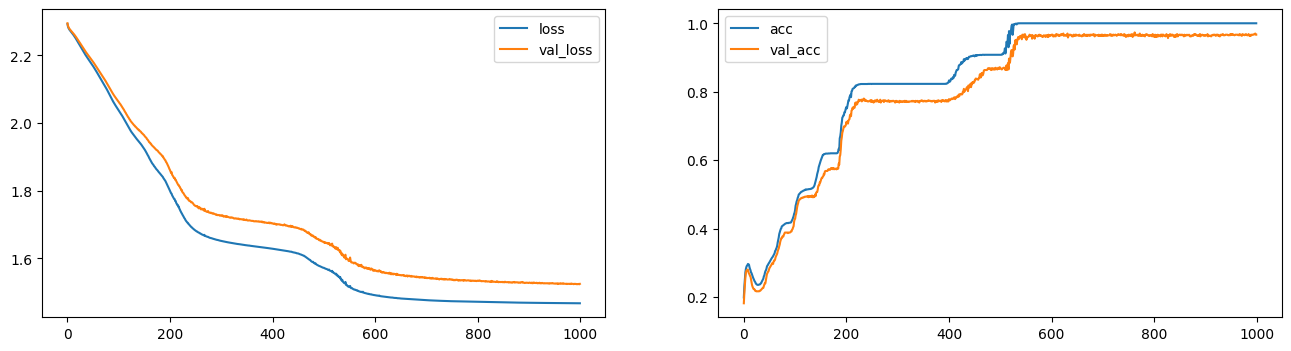

In [273]:
vis_history(acc_train_all_s3000n, loss_train_all_s3000n, acc_test_all_s3000n, loss_test_all_s3000n)